In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [297]:
df = pd.read_excel('Potential datasets for recruitment.xlsx',sheet_name='Dataset 1')

In [298]:
df.head()

User country  Nr. reviews  Nr. hotel reviews  Helpful votes  Score  \
0          USA           11                  4             13      5   
1          USA          119                 21             75      3   
2          USA           36                  9             25      5   
3           UK           14                  7             14      4   
4       Canada            5                  5              2      4   

  Period of stay Traveler type Swimming Pool Exercise Room Basketball Court  \
0        Dec-Feb       Friends            NO           YES               NO   
1        Dec-Feb      Business            NO           YES               NO   
2        Mar-May      Families            NO           YES               NO   
3        Mar-May       Friends            NO           YES               NO   
4        Mar-May          Solo            NO           YES               NO   

  Yoga Classes Club Free Wifi                              Hotel name  \
0           NO  YES       YES  Circus Circus Hotel & Casino Las Vegas   
1           NO  YES       YES  Circus Circus Hotel & Casino Las Vegas   
2           NO  YES       YES  Circus Circus Hotel & Casino Las Vegas   
3           NO  YES       YES  Circus Circus Hotel & Casino Las Vegas   
4           NO  YES       YES  Circus Circus Hotel & Casino Las Vegas   

  Hotel stars  Nr. rooms User continent  Member years Review month  \
0           3       3773  North America             9      January   
1           3       3773  North America             3      January   
2           3       3773  North America             2     February   
3           3       3773         Europe             6     February   
4           3       3773  North America             7        March   

  Review weekday  
0       Thursday  
1         Friday  
2       Saturday  
3         Friday  
4        Tuesday

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
User country         504 non-null object
Nr. reviews          504 non-null int64
Nr. hotel reviews    504 non-null int64
Helpful votes        504 non-null int64
Score                504 non-null int64
Period of stay       504 non-null object
Traveler type        504 non-null object
Swimming Pool        504 non-null object
Exercise Room        504 non-null object
Basketball Court     504 non-null object
Yoga Classes         504 non-null object
Club                 504 non-null object
Free Wifi            504 non-null object
Hotel name           504 non-null object
Hotel stars          504 non-null object
Nr. rooms            504 non-null int64
User continent       504 non-null object
Member years         504 non-null int64
Review month         504 non-null object
Review weekday       504 non-null object
dtypes: int64(6), object(14)
memory usage: 78.8+ KB


In [300]:
df.describe()

Nr. reviews  Nr. hotel reviews  Helpful votes       Score    Nr. rooms  \
count   504.000000         504.000000     504.000000  504.000000   504.000000   
mean     48.130952          16.023810      31.751984    4.123016  2196.380952   
std      74.996426          23.957953      48.520783    1.007302  1285.476807   
min       1.000000           0.000000       0.000000    1.000000   188.000000   
25%      12.000000           5.000000       8.000000    4.000000   826.000000   
50%      23.500000           9.000000      16.000000    4.000000  2700.000000   
75%      54.250000          18.000000      35.000000    5.000000  3025.000000   
max     775.000000         263.000000     365.000000    5.000000  4027.000000   

       Member years  
count    504.000000  
mean       0.767857  
std       80.692897  
min    -1806.000000  
25%        2.000000  
50%        4.000000  
75%        6.000000  
max       13.000000

In [301]:
# As we know member years cannot be less than 0 so,
df=df[df['Member years']>=0]

In [302]:
df.describe()

Nr. reviews  Nr. hotel reviews  Helpful votes       Score    Nr. rooms  \
count   503.000000         503.000000     503.000000  503.000000   503.000000   
mean     48.192843          16.037773      31.783300    4.121272  2195.013917   
std      75.058202          23.979751      48.563988    1.007544  1286.389759   
min       1.000000           0.000000       0.000000    1.000000   188.000000   
25%      12.000000           5.000000       8.000000    4.000000   826.000000   
50%      24.000000           9.000000      16.000000    4.000000  2700.000000   
75%      54.500000          18.000000      35.000000    5.000000  3025.000000   
max     775.000000         263.000000     365.000000    5.000000  4027.000000   

       Member years  
count    503.000000  
mean       4.359841  
std        2.928725  
min        0.000000  
25%        2.000000  
50%        4.000000  
75%        6.000000  
max       13.000000

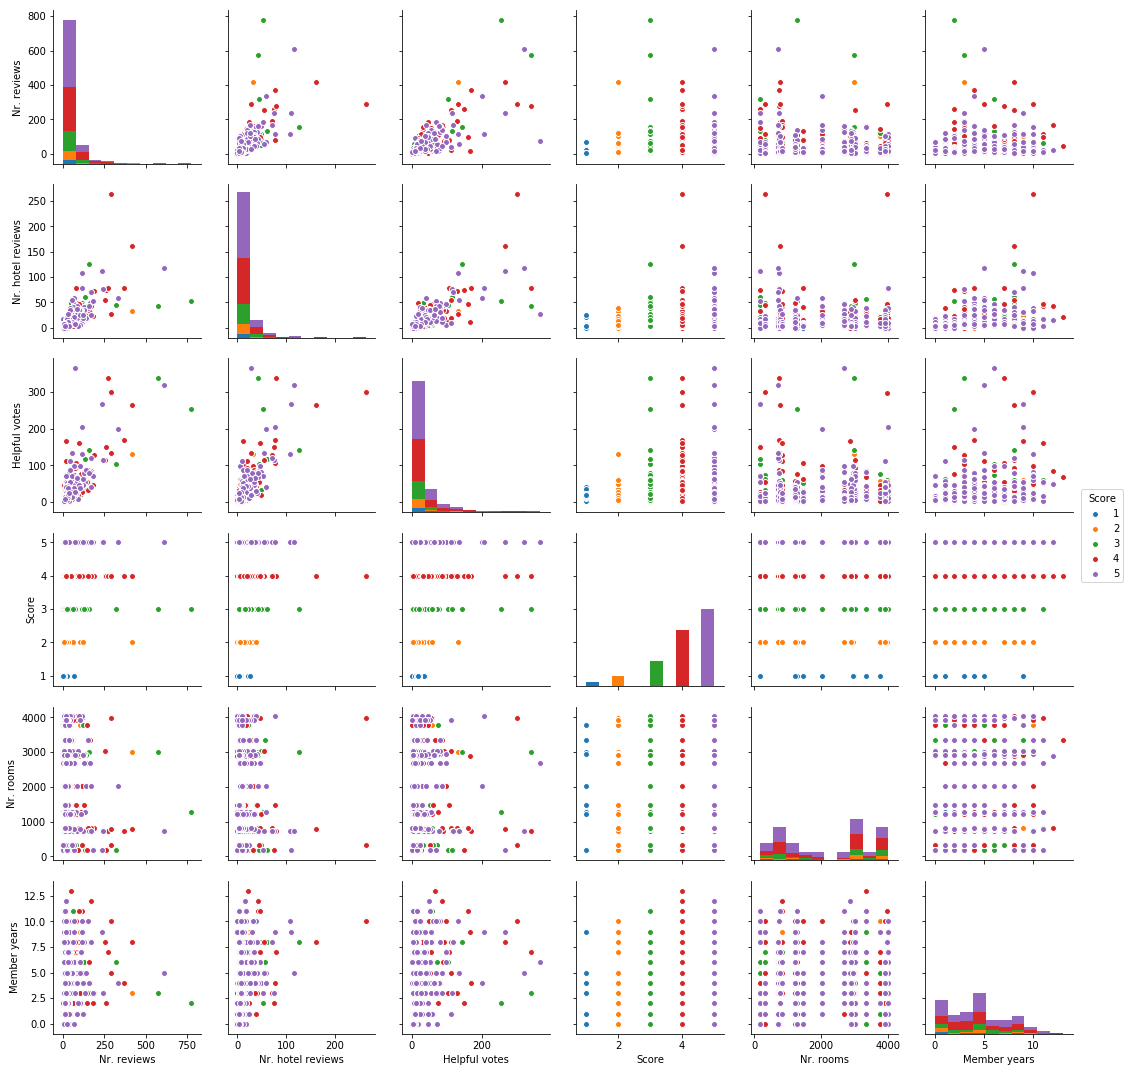

In [303]:
sns.pairplot(df, hue='Score',size=2.5);

In [304]:
y=df.Score
X=df.drop(['Score','Hotel name'],axis=1)

In [305]:
categorical = X.select_dtypes(include=['object'])

In [306]:
cat_values=categorical.columns.values

In [307]:
X['Period of stay'] = X['Period of stay'].map({'Dec-Feb':'Winter', 'Mar-May':'Spring', 'Jun-Aug' :'Summer','Sep-Nov':'Autumn'})

In [308]:
for i in range(len(cat_values)):
    print('For the column "',cat_values[i],'" the unique values are')
    print(X[cat_values[i]].unique())

For the column " User country " the unique values are
['USA' 'UK' 'Canada' 'India' 'Australia' 'New Zeland' 'Ireland' 'Egypt'
 'Finland' 'Kenya' 'Jordan' 'Netherlands' 'Syria' 'Scotland'
 'South Africa' 'Swiss' 'United Arab Emirates' 'Hungary' 'China' 'Greece'
 'Mexico' 'Croatia' 'Germany' 'Malaysia' 'Thailand' 'Phillippines'
 'Israel' 'India ' 'Belgium' 'Puerto Rico' 'Switzerland' 'Norway' 'France'
 'Spain' 'Singapore' 'Brazil' 'Costa Rica' 'Iran' 'Saudi Arabia'
 'Honduras' 'Denmark' 'Taiwan' 'Hawaii' 'Kuwait' 'Czech Republic' 'Japan'
 'Korea' 'Italy']
For the column " Period of stay " the unique values are
['Winter' 'Spring' 'Summer' 'Autumn']
For the column " Traveler type " the unique values are
['Friends' 'Business' 'Families' 'Solo' 'Couples']
For the column " Swimming Pool " the unique values are
['NO' 'YES']
For the column " Exercise Room " the unique values are
['YES' 'NO']
For the column " Basketball Court " the unique values are
['NO' 'YES']
For the column " Yoga Classes " t

In [309]:
from catboost import CatBoostClassifier,CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from itertools import product,chain

In [310]:
X_train, X_validation, y_train, y_validation = train_test_split(X,y, test_size=0.3, random_state=1234)

In [311]:
categorical.columns

Index(['User country', 'Period of stay', 'Traveler type', 'Swimming Pool',
       'Exercise Room', 'Basketball Court', 'Yoga Classes', 'Club',
       'Free Wifi', 'Hotel stars', 'User continent', 'Review month',
       'Review weekday'],
      dtype='object')

In [312]:
categorical_features_indices = np.where(X.dtypes == np.object)[0]

In [313]:
X_train.head()

User country  Nr. reviews  Nr. hotel reviews  Helpful votes  \
103       India            88                 15            103   
415    Australia           22                 13             26   
303           UK           48                 21             19   
102      Ireland           19                  9             28   
167          USA            7                  3              8   

    Period of stay Traveler type Swimming Pool Exercise Room Basketball Court  \
103         Spring      Business           YES           YES              YES   
415         Spring       Couples           YES           YES               NO   
303         Summer      Families           YES           YES               NO   
102         Spring       Couples           YES           YES              YES   
167         Winter      Families           YES           YES               NO   

    Yoga Classes Club Free Wifi Hotel stars  Nr. rooms User continent  \
103          YES  YES       YES           4       1467           Asia   
415          YES  YES       YES           5       4027        Oceania   
303          YES  YES       YES         3,5       1228         Europe   
102          YES  YES       YES           4       1467         Europe   
167          YES  YES       YES           5       2959  North America   

     Member years Review month Review weekday  
103             3        April         Monday  
415             2        April         Friday  
303             4       August         Friday  
102             3        April         Friday  
167             5     December         Sunday

In [314]:
from sortedcontainers import SortedList
import copy
import collections
import numpy as np
from itertools import product,chain
import pandas
from sklearn.model_selection import KFold
import catboost as cb

''' a class for doing grid search on a set of parameters provided in a dict. 'pdict' should be a dictionary like the following:
pdict = {'depth':[1,2], 'iterations':[250,100,500], 'thread_count':4}

when grid_search is called it will return an iterator that provides samples from the dictionary e.g.
{'depth':1, 'iterations':250, 'thread_count':4}
{'depth':2, 'iterations':250, 'thread_count':4}
{'depth':1, 'iterations':100, 'thread_count':4}
etc.
after calling an iteration of grid_search, you need to test the classifier and run 'register_result'
This will update the internal list of results, so that the next call to grid_search will use the best
parameters for all the parameters not currently being updated.

grid_search can be provided a list e.g. grid_search(['depth']) this will use the current best parameters for all
the other arguments and only search over 'depth'. You can then call e.g. grid_search(['iterations']) and it will use
the best depth found previously and cycle through all the 'iterations'. Searching incrementally can be much faster
than doing a full grid search, but may miss the global optimum. '''
class paramsearch:
    def __init__(self,pdict):    
        self.pdict = {}
        # if something is not passed in as a sequence, make it a sequence with 1 element
        #   don't treat strings as sequences
        for a,b in pdict.items():
            if isinstance(b, collections.Sequence) and not isinstance(b, str): self.pdict[a] = b
            else: self.pdict[a] = [b]
        # our results are a sorted list, so the best score is always the final element
        self.results = SortedList()       
                    
    def grid_search(self,keys=None):
        # do grid search on only the keys listed. If none provided, do all
        if keys==None: keylist = self.pdict.keys()
        else: keylist = keys
 
        listoflists = [] # this will be list of lists of key,value pairs
        for key in keylist: listoflists.append([(key,i) for i in self.pdict[key]])
        for p in product(*listoflists):
            # do any changes to the current best parameter set
            if len(self.results)>0: template = self.results[-1][1]
            else: template = {a:b[0] for a,b in self.pdict.items()}
            # if our updates are the same as current best, don't bother
            if self.equaldict(dict(p),template): continue
            # take the current best and update just the ones to change
            yield self.overwritedict(dict(p),template)
                              
    def equaldict(self,a,b):
        for key in a.keys(): 
            if a[key] != b[key]: return False
        return True            
                              
    def overwritedict(self,new,old):
        old = copy.deepcopy(old)
        for key in new.keys(): old[key] = new[key]
        return old            
    
    # save a (score,params) pair to results. Since 'results' is a sorted list,
    #   the best score is always the final element. A small amount of noise is added
    #   because sorted lists don't like it when two scores are exactly the same    
    def register_result(self,result,params):
        self.results.add((result+np.random.randn()*1e-10,params))    
        
    def bestscore(self):
        return self.results[-1][0]
        
    def bestparam(self):
        return self.results[-1][1]

In [315]:
params = {'depth':[2,3,4,5],
          'iterations':[250,300,400],
          'learning_rate':[0.03,0.02,0.04], 
          'l2_leaf_reg':[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24],
          'border_count':[ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99,100],
          'thread_count':[4,5,6,3,2]}
def crossvaltest(params,train_set,train_label,cat_dims,n_splits=3):
    kf = KFold(n_splits=n_splits,shuffle=True) 
    res = []
    for train_index, test_index in kf.split(train_set):
        train = train_set.iloc[train_index,:]
        test = train_set.iloc[test_index,:]

        labels = train_label.loc[train_index]
        test_labels = train_label.loc[test_index]

        clf = cb.CatBoostClassifier(**params)
        clf.fit(train, np.ravel(labels), cat_features=cat_dims)

        res.append(np.mean(clf.predict(test)==np.ravel(test_labels)))
    return np.mean(res)
def catboost_param_tune(params,train_set,train_label,cat_dims=None,n_splits=3):
    ps = paramsearch(params)
    # search 'border_count', 'l2_leaf_reg' etc. individually 
    #   but 'iterations','learning_rate' together
    for prms in chain(ps.grid_search(['border_count']),
                      ps.grid_search(['l2_leaf_reg']),
                      ps.grid_search(['iterations','learning_rate']),
                      ps.grid_search(['depth'])):
        res = crossvaltest(prms,train_set,train_label,cat_dims,n_splits)
        # save the crossvalidation result so that future iterations can reuse the best parameters
        ps.register_result(res,prms)
        print(res,prms,'best:',ps.bestscore(),ps.bestparam())
    return ps.bestparam()

bestparams = catboost_param_tune(params,X_train,y_train,categorical_features_indices)

/home/khandalaryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/home/khandalaryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


0:	learn: 0.6872108	total: 9.77ms	remaining: 2.43s
1:	learn: 0.6813540	total: 18.8ms	remaining: 2.33s
2:	learn: 0.6759584	total: 28ms	remaining: 2.3s
3:	learn: 0.6703035	total: 43ms	remaining: 2.65s
4:	learn: 0.6657468	total: 57ms	remaining: 2.79s
5:	learn: 0.6613700	total: 89.7ms	remaining: 3.65s
6:	learn: 0.6572867	total: 111ms	remaining: 3.87s
7:	learn: 0.6536029	total: 125ms	remaining: 3.79s
8:	learn: 0.6501235	total: 161ms	remaining: 4.31s
9:	learn: 0.6464691	total: 197ms	remaining: 4.72s
10:	learn: 0.6427026	total: 234ms	remaining: 5.08s
11:	learn: 0.6397052	total: 252ms	remaining: 4.99s
12:	learn: 0.6369730	total: 286ms	remaining: 5.21s
13:	learn: 0.6344614	total: 299ms	remaining: 5.04s
14:	learn: 0.6318563	total: 309ms	remaining: 4.85s
15:	learn: 0.6290532	total: 330ms	remaining: 4.83s
16:	learn: 0.6269798	total: 351ms	remaining: 4.81s
17:	learn: 0.6246441	total: 366ms	remaining: 4.71s
18:	learn: 0.6224782	total: 376ms	remaining: 4.58s
19:	learn: 0.6207668	total: 389ms	remainin

164:	learn: 0.5568067	total: 1.46s	remaining: 752ms
165:	learn: 0.5567466	total: 1.47s	remaining: 741ms
166:	learn: 0.5562506	total: 1.47s	remaining: 731ms
167:	learn: 0.5545439	total: 1.48s	remaining: 721ms
168:	learn: 0.5545010	total: 1.49s	remaining: 712ms
169:	learn: 0.5543903	total: 1.49s	remaining: 702ms
170:	learn: 0.5543638	total: 1.49s	remaining: 691ms
171:	learn: 0.5543265	total: 1.5s	remaining: 681ms
172:	learn: 0.5543227	total: 1.5s	remaining: 670ms
173:	learn: 0.5543015	total: 1.51s	remaining: 661ms
174:	learn: 0.5536122	total: 1.52s	remaining: 650ms
175:	learn: 0.5527115	total: 1.52s	remaining: 639ms
176:	learn: 0.5521189	total: 1.52s	remaining: 629ms
177:	learn: 0.5521030	total: 1.53s	remaining: 618ms
178:	learn: 0.5519605	total: 1.53s	remaining: 608ms
179:	learn: 0.5519553	total: 1.54s	remaining: 598ms
180:	learn: 0.5515077	total: 1.54s	remaining: 588ms
181:	learn: 0.5514715	total: 1.55s	remaining: 578ms
182:	learn: 0.5514655	total: 1.55s	remaining: 568ms
183:	learn: 0.

115:	learn: 0.5635243	total: 647ms	remaining: 748ms
116:	learn: 0.5635136	total: 653ms	remaining: 743ms
117:	learn: 0.5634989	total: 661ms	remaining: 740ms
118:	learn: 0.5630938	total: 667ms	remaining: 734ms
119:	learn: 0.5629678	total: 675ms	remaining: 731ms
120:	learn: 0.5629670	total: 678ms	remaining: 723ms
121:	learn: 0.5629662	total: 681ms	remaining: 715ms
122:	learn: 0.5629654	total: 688ms	remaining: 710ms
123:	learn: 0.5620042	total: 691ms	remaining: 703ms
124:	learn: 0.5618861	total: 695ms	remaining: 695ms
125:	learn: 0.5610333	total: 699ms	remaining: 688ms
126:	learn: 0.5605698	total: 703ms	remaining: 681ms
127:	learn: 0.5602871	total: 706ms	remaining: 673ms
128:	learn: 0.5602651	total: 710ms	remaining: 666ms
129:	learn: 0.5600263	total: 714ms	remaining: 659ms
130:	learn: 0.5595525	total: 719ms	remaining: 654ms
131:	learn: 0.5595515	total: 723ms	remaining: 646ms
132:	learn: 0.5588557	total: 727ms	remaining: 639ms
133:	learn: 0.5587654	total: 731ms	remaining: 633ms
134:	learn: 

27:	learn: 0.6252361	total: 431ms	remaining: 3.42s
28:	learn: 0.6243823	total: 451ms	remaining: 3.44s
29:	learn: 0.6236116	total: 469ms	remaining: 3.44s
30:	learn: 0.6230167	total: 482ms	remaining: 3.41s
31:	learn: 0.6221149	total: 499ms	remaining: 3.4s
32:	learn: 0.6210702	total: 512ms	remaining: 3.37s
33:	learn: 0.6194289	total: 526ms	remaining: 3.34s
34:	learn: 0.6186166	total: 541ms	remaining: 3.33s
35:	learn: 0.6167697	total: 553ms	remaining: 3.29s
36:	learn: 0.6154414	total: 568ms	remaining: 3.27s
37:	learn: 0.6150693	total: 584ms	remaining: 3.26s
38:	learn: 0.6146371	total: 602ms	remaining: 3.25s
39:	learn: 0.6141913	total: 618ms	remaining: 3.25s
40:	learn: 0.6129878	total: 634ms	remaining: 3.23s
41:	learn: 0.6121295	total: 649ms	remaining: 3.21s
42:	learn: 0.6116764	total: 655ms	remaining: 3.15s
43:	learn: 0.6112031	total: 665ms	remaining: 3.11s
44:	learn: 0.6108734	total: 672ms	remaining: 3.06s
45:	learn: 0.6105989	total: 683ms	remaining: 3.03s
46:	learn: 0.6094518	total: 691m

200:	learn: 0.5576651	total: 2.07s	remaining: 505ms
201:	learn: 0.5570768	total: 2.08s	remaining: 494ms
202:	learn: 0.5569356	total: 2.09s	remaining: 483ms
203:	learn: 0.5566738	total: 2.1s	remaining: 472ms
204:	learn: 0.5556939	total: 2.1s	remaining: 461ms
205:	learn: 0.5548526	total: 2.11s	remaining: 451ms
206:	learn: 0.5547911	total: 2.12s	remaining: 440ms
207:	learn: 0.5544173	total: 2.12s	remaining: 429ms
208:	learn: 0.5543787	total: 2.13s	remaining: 418ms
209:	learn: 0.5540272	total: 2.14s	remaining: 407ms
210:	learn: 0.5535369	total: 2.15s	remaining: 397ms
211:	learn: 0.5534417	total: 2.17s	remaining: 388ms
212:	learn: 0.5524442	total: 2.18s	remaining: 379ms
213:	learn: 0.5515284	total: 2.2s	remaining: 369ms
214:	learn: 0.5513558	total: 2.21s	remaining: 359ms
215:	learn: 0.5510626	total: 2.22s	remaining: 349ms
216:	learn: 0.5508333	total: 2.23s	remaining: 339ms
217:	learn: 0.5505017	total: 2.24s	remaining: 329ms
218:	learn: 0.5503040	total: 2.25s	remaining: 318ms
219:	learn: 0.5

137:	learn: 0.5666329	total: 758ms	remaining: 616ms
138:	learn: 0.5663060	total: 766ms	remaining: 612ms
139:	learn: 0.5659354	total: 771ms	remaining: 605ms
140:	learn: 0.5658903	total: 775ms	remaining: 599ms
141:	learn: 0.5651391	total: 782ms	remaining: 595ms
142:	learn: 0.5650500	total: 788ms	remaining: 589ms
143:	learn: 0.5649670	total: 792ms	remaining: 583ms
144:	learn: 0.5646938	total: 796ms	remaining: 577ms
145:	learn: 0.5644425	total: 801ms	remaining: 571ms
146:	learn: 0.5644425	total: 805ms	remaining: 564ms
147:	learn: 0.5642121	total: 809ms	remaining: 558ms
148:	learn: 0.5636971	total: 814ms	remaining: 552ms
149:	learn: 0.5632650	total: 818ms	remaining: 545ms
150:	learn: 0.5631470	total: 823ms	remaining: 540ms
151:	learn: 0.5630028	total: 829ms	remaining: 534ms
152:	learn: 0.5626911	total: 834ms	remaining: 529ms
153:	learn: 0.5623366	total: 838ms	remaining: 523ms
154:	learn: 0.5620431	total: 842ms	remaining: 516ms
155:	learn: 0.5620111	total: 847ms	remaining: 510ms
156:	learn: 

56:	learn: 0.5901452	total: 423ms	remaining: 1.43s
57:	learn: 0.5879466	total: 429ms	remaining: 1.42s
58:	learn: 0.5877790	total: 435ms	remaining: 1.41s
59:	learn: 0.5852942	total: 442ms	remaining: 1.4s
60:	learn: 0.5848278	total: 447ms	remaining: 1.39s
61:	learn: 0.5846588	total: 452ms	remaining: 1.37s
62:	learn: 0.5844434	total: 456ms	remaining: 1.35s
63:	learn: 0.5840828	total: 460ms	remaining: 1.34s
64:	learn: 0.5835922	total: 464ms	remaining: 1.32s
65:	learn: 0.5832226	total: 469ms	remaining: 1.31s
66:	learn: 0.5821816	total: 474ms	remaining: 1.29s
67:	learn: 0.5815584	total: 479ms	remaining: 1.28s
68:	learn: 0.5814732	total: 486ms	remaining: 1.27s
69:	learn: 0.5805788	total: 492ms	remaining: 1.26s
70:	learn: 0.5796309	total: 498ms	remaining: 1.26s
71:	learn: 0.5790484	total: 506ms	remaining: 1.25s
72:	learn: 0.5785517	total: 513ms	remaining: 1.24s
73:	learn: 0.5784253	total: 519ms	remaining: 1.24s
74:	learn: 0.5775628	total: 525ms	remaining: 1.23s
75:	learn: 0.5765815	total: 534m

231:	learn: 0.5185525	total: 1.42s	remaining: 110ms
232:	learn: 0.5181917	total: 1.43s	remaining: 104ms
233:	learn: 0.5181428	total: 1.43s	remaining: 98.1ms
234:	learn: 0.5179366	total: 1.44s	remaining: 91.9ms
235:	learn: 0.5177151	total: 1.45s	remaining: 85.8ms
236:	learn: 0.5170864	total: 1.45s	remaining: 79.8ms
237:	learn: 0.5170370	total: 1.46s	remaining: 73.5ms
238:	learn: 0.5170342	total: 1.46s	remaining: 67.3ms
239:	learn: 0.5169336	total: 1.47s	remaining: 61.1ms
240:	learn: 0.5167204	total: 1.47s	remaining: 54.9ms
241:	learn: 0.5165016	total: 1.47s	remaining: 48.7ms
242:	learn: 0.5163388	total: 1.48s	remaining: 42.6ms
243:	learn: 0.5161667	total: 1.48s	remaining: 36.4ms
244:	learn: 0.5161584	total: 1.49s	remaining: 30.3ms
245:	learn: 0.5161340	total: 1.49s	remaining: 24.2ms
246:	learn: 0.5158704	total: 1.49s	remaining: 18.1ms
247:	learn: 0.5152814	total: 1.5s	remaining: 12.1ms
248:	learn: 0.5152283	total: 1.5s	remaining: 6.03ms
249:	learn: 0.5150692	total: 1.5s	remaining: 0us
0

143:	learn: 0.5397953	total: 816ms	remaining: 601ms
144:	learn: 0.5397765	total: 823ms	remaining: 596ms
145:	learn: 0.5395335	total: 829ms	remaining: 591ms
146:	learn: 0.5389041	total: 835ms	remaining: 585ms
147:	learn: 0.5389024	total: 844ms	remaining: 581ms
148:	learn: 0.5384101	total: 849ms	remaining: 575ms
149:	learn: 0.5377977	total: 854ms	remaining: 569ms
150:	learn: 0.5372974	total: 858ms	remaining: 562ms
151:	learn: 0.5369245	total: 862ms	remaining: 556ms
152:	learn: 0.5368986	total: 866ms	remaining: 549ms
153:	learn: 0.5368947	total: 871ms	remaining: 543ms
154:	learn: 0.5363421	total: 876ms	remaining: 537ms
155:	learn: 0.5360255	total: 880ms	remaining: 530ms
156:	learn: 0.5358897	total: 886ms	remaining: 525ms
157:	learn: 0.5358889	total: 889ms	remaining: 518ms
158:	learn: 0.5358889	total: 894ms	remaining: 512ms
159:	learn: 0.5358888	total: 899ms	remaining: 506ms
160:	learn: 0.5357908	total: 905ms	remaining: 500ms
161:	learn: 0.5357908	total: 908ms	remaining: 493ms
162:	learn: 

73:	learn: 0.5738241	total: 564ms	remaining: 1.34s
74:	learn: 0.5728256	total: 570ms	remaining: 1.33s
75:	learn: 0.5720726	total: 579ms	remaining: 1.32s
76:	learn: 0.5717766	total: 585ms	remaining: 1.31s
77:	learn: 0.5711310	total: 592ms	remaining: 1.3s
78:	learn: 0.5710697	total: 596ms	remaining: 1.29s
79:	learn: 0.5707912	total: 600ms	remaining: 1.27s
80:	learn: 0.5705832	total: 607ms	remaining: 1.26s
81:	learn: 0.5699698	total: 617ms	remaining: 1.26s
82:	learn: 0.5695153	total: 629ms	remaining: 1.26s
83:	learn: 0.5694831	total: 639ms	remaining: 1.26s
84:	learn: 0.5694055	total: 651ms	remaining: 1.26s
85:	learn: 0.5692033	total: 660ms	remaining: 1.26s
86:	learn: 0.5691333	total: 667ms	remaining: 1.25s
87:	learn: 0.5687338	total: 677ms	remaining: 1.25s
88:	learn: 0.5687090	total: 690ms	remaining: 1.25s
89:	learn: 0.5681317	total: 699ms	remaining: 1.24s
90:	learn: 0.5679682	total: 710ms	remaining: 1.24s
91:	learn: 0.5675628	total: 719ms	remaining: 1.23s
92:	learn: 0.5675018	total: 733m

0:	learn: 0.6866061	total: 13ms	remaining: 3.25s
1:	learn: 0.6820084	total: 24.9ms	remaining: 3.09s
2:	learn: 0.6767456	total: 47.2ms	remaining: 3.89s
3:	learn: 0.6718593	total: 67.8ms	remaining: 4.17s
4:	learn: 0.6669456	total: 80.8ms	remaining: 3.96s
5:	learn: 0.6633856	total: 99.1ms	remaining: 4.03s
6:	learn: 0.6599545	total: 109ms	remaining: 3.78s
7:	learn: 0.6563201	total: 120ms	remaining: 3.63s
8:	learn: 0.6529973	total: 128ms	remaining: 3.42s
9:	learn: 0.6500286	total: 137ms	remaining: 3.28s
10:	learn: 0.6472916	total: 144ms	remaining: 3.13s
11:	learn: 0.6447451	total: 155ms	remaining: 3.08s
12:	learn: 0.6424617	total: 162ms	remaining: 2.96s
13:	learn: 0.6400848	total: 170ms	remaining: 2.87s
14:	learn: 0.6380695	total: 181ms	remaining: 2.84s
15:	learn: 0.6361286	total: 190ms	remaining: 2.77s
16:	learn: 0.6343495	total: 198ms	remaining: 2.71s
17:	learn: 0.6313165	total: 206ms	remaining: 2.66s
18:	learn: 0.6292556	total: 215ms	remaining: 2.62s
19:	learn: 0.6270472	total: 223ms	rem

165:	learn: 0.5635635	total: 1.86s	remaining: 944ms
166:	learn: 0.5634012	total: 1.88s	remaining: 936ms
167:	learn: 0.5632854	total: 1.9s	remaining: 927ms
168:	learn: 0.5629376	total: 1.92s	remaining: 918ms
169:	learn: 0.5623904	total: 1.93s	remaining: 910ms
170:	learn: 0.5622855	total: 1.95s	remaining: 902ms
171:	learn: 0.5615870	total: 1.97s	remaining: 895ms
172:	learn: 0.5615870	total: 1.99s	remaining: 886ms
173:	learn: 0.5613941	total: 2.01s	remaining: 878ms
174:	learn: 0.5610294	total: 2.03s	remaining: 870ms
175:	learn: 0.5610294	total: 2.05s	remaining: 860ms
176:	learn: 0.5609625	total: 2.07s	remaining: 854ms
177:	learn: 0.5609625	total: 2.08s	remaining: 844ms
178:	learn: 0.5602924	total: 2.1s	remaining: 833ms
179:	learn: 0.5593571	total: 2.11s	remaining: 819ms
180:	learn: 0.5590719	total: 2.11s	remaining: 806ms
181:	learn: 0.5589102	total: 2.12s	remaining: 793ms
182:	learn: 0.5581104	total: 2.13s	remaining: 781ms
183:	learn: 0.5576157	total: 2.14s	remaining: 767ms
184:	learn: 0.

80:	learn: 0.5778799	total: 822ms	remaining: 1.72s
81:	learn: 0.5778622	total: 845ms	remaining: 1.73s
82:	learn: 0.5774339	total: 856ms	remaining: 1.72s
83:	learn: 0.5765994	total: 865ms	remaining: 1.71s
84:	learn: 0.5765282	total: 873ms	remaining: 1.69s
85:	learn: 0.5762932	total: 893ms	remaining: 1.7s
86:	learn: 0.5753999	total: 906ms	remaining: 1.7s
87:	learn: 0.5748354	total: 925ms	remaining: 1.7s
88:	learn: 0.5736818	total: 932ms	remaining: 1.69s
89:	learn: 0.5733828	total: 939ms	remaining: 1.67s
90:	learn: 0.5730541	total: 950ms	remaining: 1.66s
91:	learn: 0.5728827	total: 957ms	remaining: 1.64s
92:	learn: 0.5723187	total: 964ms	remaining: 1.63s
93:	learn: 0.5723117	total: 973ms	remaining: 1.61s
94:	learn: 0.5722897	total: 984ms	remaining: 1.6s
95:	learn: 0.5717614	total: 991ms	remaining: 1.59s
96:	learn: 0.5709116	total: 998ms	remaining: 1.57s
97:	learn: 0.5708656	total: 1s	remaining: 1.56s
98:	learn: 0.5701220	total: 1.02s	remaining: 1.55s
99:	learn: 0.5684775	total: 1.03s	rema

248:	learn: 0.5202854	total: 2.04s	remaining: 8.18ms
249:	learn: 0.5198241	total: 2.04s	remaining: 0us
0.02276787870008209 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 7, 'thread_count': 4} best: 0.02276787871848994 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 7, 'thread_count': 4}
0:	learn: 0.6855224	total: 16.7ms	remaining: 4.16s
1:	learn: 0.6788849	total: 36.7ms	remaining: 4.55s
2:	learn: 0.6726567	total: 52.6ms	remaining: 4.33s
3:	learn: 0.6668131	total: 66.1ms	remaining: 4.07s
4:	learn: 0.6610465	total: 81.5ms	remaining: 3.99s
5:	learn: 0.6559061	total: 98.1ms	remaining: 3.99s
6:	learn: 0.6510224	total: 115ms	remaining: 3.98s
7:	learn: 0.6461355	total: 132ms	remaining: 3.98s
8:	learn: 0.6414761	total: 145ms	remaining: 3.89s
9:	learn: 0.6373721	total: 163ms	remaining: 3.9s
10:	learn: 0.6336459	total: 182ms	remaining: 3.96s
11:	learn: 0.6286434	total: 197ms	remaining: 3.9s
12:	learn: 0.6253760	to

181:	learn: 0.5125239	total: 1.37s	remaining: 511ms
182:	learn: 0.5122735	total: 1.37s	remaining: 503ms
183:	learn: 0.5120395	total: 1.38s	remaining: 495ms
184:	learn: 0.5118509	total: 1.39s	remaining: 487ms
185:	learn: 0.5116381	total: 1.39s	remaining: 480ms
186:	learn: 0.5114379	total: 1.4s	remaining: 471ms
187:	learn: 0.5113873	total: 1.4s	remaining: 462ms
188:	learn: 0.5110783	total: 1.41s	remaining: 454ms
189:	learn: 0.5108948	total: 1.41s	remaining: 445ms
190:	learn: 0.5102486	total: 1.41s	remaining: 437ms
191:	learn: 0.5102443	total: 1.42s	remaining: 429ms
192:	learn: 0.5098246	total: 1.42s	remaining: 420ms
193:	learn: 0.5096235	total: 1.43s	remaining: 412ms
194:	learn: 0.5091181	total: 1.43s	remaining: 404ms
195:	learn: 0.5090505	total: 1.43s	remaining: 395ms
196:	learn: 0.5085293	total: 1.44s	remaining: 387ms
197:	learn: 0.5081085	total: 1.44s	remaining: 379ms
198:	learn: 0.5081083	total: 1.45s	remaining: 371ms
199:	learn: 0.5078909	total: 1.45s	remaining: 363ms
200:	learn: 0.

104:	learn: 0.6028975	total: 1.04s	remaining: 1.43s
105:	learn: 0.6023341	total: 1.05s	remaining: 1.43s
106:	learn: 0.6018149	total: 1.06s	remaining: 1.42s
107:	learn: 0.6016765	total: 1.08s	remaining: 1.42s
108:	learn: 0.6012372	total: 1.09s	remaining: 1.41s
109:	learn: 0.6003331	total: 1.1s	remaining: 1.4s
110:	learn: 0.5987985	total: 1.11s	remaining: 1.39s
111:	learn: 0.5983278	total: 1.12s	remaining: 1.38s
112:	learn: 0.5973252	total: 1.13s	remaining: 1.37s
113:	learn: 0.5970301	total: 1.14s	remaining: 1.36s
114:	learn: 0.5964132	total: 1.15s	remaining: 1.35s
115:	learn: 0.5956392	total: 1.16s	remaining: 1.33s
116:	learn: 0.5953807	total: 1.16s	remaining: 1.32s
117:	learn: 0.5952344	total: 1.16s	remaining: 1.3s
118:	learn: 0.5948572	total: 1.17s	remaining: 1.28s
119:	learn: 0.5947888	total: 1.17s	remaining: 1.27s
120:	learn: 0.5946911	total: 1.17s	remaining: 1.25s
121:	learn: 0.5938817	total: 1.18s	remaining: 1.24s
122:	learn: 0.5938153	total: 1.18s	remaining: 1.22s
123:	learn: 0.5

24:	learn: 0.6194059	total: 453ms	remaining: 4.08s
25:	learn: 0.6177467	total: 470ms	remaining: 4.05s
26:	learn: 0.6161468	total: 480ms	remaining: 3.96s
27:	learn: 0.6147885	total: 487ms	remaining: 3.86s
28:	learn: 0.6131943	total: 501ms	remaining: 3.82s
29:	learn: 0.6120937	total: 509ms	remaining: 3.74s
30:	learn: 0.6104579	total: 517ms	remaining: 3.65s
31:	learn: 0.6095547	total: 524ms	remaining: 3.57s
32:	learn: 0.6084713	total: 537ms	remaining: 3.53s
33:	learn: 0.6077708	total: 545ms	remaining: 3.46s
34:	learn: 0.6065511	total: 551ms	remaining: 3.39s
35:	learn: 0.6056940	total: 568ms	remaining: 3.38s
36:	learn: 0.6051607	total: 592ms	remaining: 3.41s
37:	learn: 0.6046773	total: 610ms	remaining: 3.4s
38:	learn: 0.6042231	total: 623ms	remaining: 3.37s
39:	learn: 0.6034131	total: 641ms	remaining: 3.36s
40:	learn: 0.6029926	total: 655ms	remaining: 3.34s
41:	learn: 0.6021807	total: 675ms	remaining: 3.34s
42:	learn: 0.6013824	total: 685ms	remaining: 3.3s
43:	learn: 0.6004729	total: 700ms

192:	learn: 0.5463697	total: 1.65s	remaining: 488ms
193:	learn: 0.5457705	total: 1.66s	remaining: 480ms
194:	learn: 0.5453970	total: 1.67s	remaining: 472ms
195:	learn: 0.5452270	total: 1.69s	remaining: 465ms
196:	learn: 0.5443981	total: 1.71s	remaining: 459ms
197:	learn: 0.5439574	total: 1.72s	remaining: 452ms
198:	learn: 0.5431065	total: 1.73s	remaining: 444ms
199:	learn: 0.5428658	total: 1.74s	remaining: 434ms
200:	learn: 0.5428640	total: 1.74s	remaining: 424ms
201:	learn: 0.5426091	total: 1.75s	remaining: 415ms
202:	learn: 0.5426087	total: 1.75s	remaining: 405ms
203:	learn: 0.5420123	total: 1.75s	remaining: 396ms
204:	learn: 0.5415512	total: 1.76s	remaining: 386ms
205:	learn: 0.5415507	total: 1.76s	remaining: 376ms
206:	learn: 0.5412383	total: 1.76s	remaining: 367ms
207:	learn: 0.5409599	total: 1.77s	remaining: 357ms
208:	learn: 0.5407419	total: 1.77s	remaining: 348ms
209:	learn: 0.5406916	total: 1.78s	remaining: 339ms
210:	learn: 0.5397177	total: 1.78s	remaining: 329ms
211:	learn: 

134:	learn: 0.5909230	total: 1.17s	remaining: 998ms
135:	learn: 0.5908156	total: 1.18s	remaining: 989ms
136:	learn: 0.5903446	total: 1.18s	remaining: 977ms
137:	learn: 0.5901542	total: 1.19s	remaining: 965ms
138:	learn: 0.5901541	total: 1.19s	remaining: 952ms
139:	learn: 0.5898346	total: 1.2s	remaining: 943ms
140:	learn: 0.5891331	total: 1.21s	remaining: 933ms
141:	learn: 0.5891327	total: 1.21s	remaining: 922ms
142:	learn: 0.5887671	total: 1.22s	remaining: 912ms
143:	learn: 0.5885397	total: 1.23s	remaining: 905ms
144:	learn: 0.5883551	total: 1.24s	remaining: 899ms
145:	learn: 0.5883396	total: 1.25s	remaining: 890ms
146:	learn: 0.5878076	total: 1.27s	remaining: 887ms
147:	learn: 0.5878046	total: 1.28s	remaining: 884ms
148:	learn: 0.5875300	total: 1.3s	remaining: 884ms
149:	learn: 0.5873898	total: 1.32s	remaining: 882ms
150:	learn: 0.5871605	total: 1.34s	remaining: 879ms
151:	learn: 0.5869287	total: 1.36s	remaining: 876ms
152:	learn: 0.5861777	total: 1.37s	remaining: 870ms
153:	learn: 0.

44:	learn: 0.5948581	total: 625ms	remaining: 2.85s
45:	learn: 0.5945787	total: 638ms	remaining: 2.83s
46:	learn: 0.5932591	total: 648ms	remaining: 2.8s
47:	learn: 0.5923865	total: 654ms	remaining: 2.75s
48:	learn: 0.5916650	total: 665ms	remaining: 2.73s
49:	learn: 0.5902210	total: 682ms	remaining: 2.73s
50:	learn: 0.5890363	total: 693ms	remaining: 2.71s
51:	learn: 0.5888469	total: 709ms	remaining: 2.7s
52:	learn: 0.5884181	total: 726ms	remaining: 2.7s
53:	learn: 0.5871943	total: 731ms	remaining: 2.65s
54:	learn: 0.5870408	total: 745ms	remaining: 2.64s
55:	learn: 0.5864387	total: 755ms	remaining: 2.61s
56:	learn: 0.5860023	total: 766ms	remaining: 2.59s
57:	learn: 0.5858722	total: 777ms	remaining: 2.57s
58:	learn: 0.5853244	total: 789ms	remaining: 2.55s
59:	learn: 0.5840381	total: 805ms	remaining: 2.55s
60:	learn: 0.5834126	total: 828ms	remaining: 2.56s
61:	learn: 0.5830221	total: 840ms	remaining: 2.55s
62:	learn: 0.5823032	total: 857ms	remaining: 2.54s
63:	learn: 0.5818865	total: 873ms	

230:	learn: 0.5214251	total: 2.05s	remaining: 169ms
231:	learn: 0.5214108	total: 2.06s	remaining: 160ms
232:	learn: 0.5212031	total: 2.06s	remaining: 150ms
233:	learn: 0.5210983	total: 2.07s	remaining: 141ms
234:	learn: 0.5202993	total: 2.07s	remaining: 132ms
235:	learn: 0.5201316	total: 2.08s	remaining: 123ms
236:	learn: 0.5197063	total: 2.08s	remaining: 114ms
237:	learn: 0.5195140	total: 2.08s	remaining: 105ms
238:	learn: 0.5194710	total: 2.09s	remaining: 96.4ms
239:	learn: 0.5194644	total: 2.1s	remaining: 87.6ms
240:	learn: 0.5186523	total: 2.11s	remaining: 78.9ms
241:	learn: 0.5170769	total: 2.12s	remaining: 70ms
242:	learn: 0.5157297	total: 2.13s	remaining: 61.5ms
243:	learn: 0.5154283	total: 2.15s	remaining: 52.8ms
244:	learn: 0.5153378	total: 2.16s	remaining: 44.2ms
245:	learn: 0.5149192	total: 2.17s	remaining: 35.3ms
246:	learn: 0.5144354	total: 2.19s	remaining: 26.6ms
247:	learn: 0.5141850	total: 2.2s	remaining: 17.7ms
248:	learn: 0.5139633	total: 2.21s	remaining: 8.86ms
249:	

176:	learn: 0.5148797	total: 1.43s	remaining: 591ms
177:	learn: 0.5141943	total: 1.44s	remaining: 582ms
178:	learn: 0.5129968	total: 1.44s	remaining: 573ms
179:	learn: 0.5127601	total: 1.45s	remaining: 564ms
180:	learn: 0.5127081	total: 1.46s	remaining: 556ms
181:	learn: 0.5125769	total: 1.46s	remaining: 547ms
182:	learn: 0.5123685	total: 1.47s	remaining: 538ms
183:	learn: 0.5121083	total: 1.47s	remaining: 528ms
184:	learn: 0.5113537	total: 1.48s	remaining: 519ms
185:	learn: 0.5105721	total: 1.48s	remaining: 509ms
186:	learn: 0.5102824	total: 1.49s	remaining: 500ms
187:	learn: 0.5100990	total: 1.49s	remaining: 491ms
188:	learn: 0.5095399	total: 1.49s	remaining: 482ms
189:	learn: 0.5088915	total: 1.5s	remaining: 473ms
190:	learn: 0.5087254	total: 1.5s	remaining: 463ms
191:	learn: 0.5086834	total: 1.5s	remaining: 454ms
192:	learn: 0.5084342	total: 1.51s	remaining: 445ms
193:	learn: 0.5084335	total: 1.51s	remaining: 436ms
194:	learn: 0.5081986	total: 1.51s	remaining: 428ms
195:	learn: 0.5

86:	learn: 0.5777555	total: 779ms	remaining: 1.46s
87:	learn: 0.5769880	total: 784ms	remaining: 1.44s
88:	learn: 0.5767904	total: 790ms	remaining: 1.43s
89:	learn: 0.5767788	total: 795ms	remaining: 1.41s
90:	learn: 0.5767356	total: 800ms	remaining: 1.4s
91:	learn: 0.5757794	total: 805ms	remaining: 1.38s
92:	learn: 0.5757360	total: 810ms	remaining: 1.37s
93:	learn: 0.5753691	total: 814ms	remaining: 1.35s
94:	learn: 0.5750017	total: 818ms	remaining: 1.33s
95:	learn: 0.5745542	total: 822ms	remaining: 1.32s
96:	learn: 0.5743494	total: 826ms	remaining: 1.3s
97:	learn: 0.5743201	total: 829ms	remaining: 1.29s
98:	learn: 0.5740493	total: 833ms	remaining: 1.27s
99:	learn: 0.5740120	total: 837ms	remaining: 1.25s
100:	learn: 0.5736050	total: 841ms	remaining: 1.24s
101:	learn: 0.5736002	total: 845ms	remaining: 1.23s
102:	learn: 0.5734476	total: 849ms	remaining: 1.21s
103:	learn: 0.5730332	total: 853ms	remaining: 1.2s
104:	learn: 0.5729722	total: 857ms	remaining: 1.18s
105:	learn: 0.5729245	total: 

0:	learn: 0.6882563	total: 10.9ms	remaining: 2.71s
1:	learn: 0.6831256	total: 35.1ms	remaining: 4.35s
2:	learn: 0.6786324	total: 60.6ms	remaining: 4.99s
3:	learn: 0.6740476	total: 86.3ms	remaining: 5.31s
4:	learn: 0.6702497	total: 109ms	remaining: 5.36s
5:	learn: 0.6661829	total: 151ms	remaining: 6.13s
6:	learn: 0.6628268	total: 187ms	remaining: 6.48s
7:	learn: 0.6595308	total: 221ms	remaining: 6.7s
8:	learn: 0.6563517	total: 247ms	remaining: 6.61s
9:	learn: 0.6533261	total: 266ms	remaining: 6.38s
10:	learn: 0.6504597	total: 284ms	remaining: 6.17s
11:	learn: 0.6466114	total: 300ms	remaining: 5.95s
12:	learn: 0.6442832	total: 317ms	remaining: 5.78s
13:	learn: 0.6416582	total: 334ms	remaining: 5.63s
14:	learn: 0.6396559	total: 351ms	remaining: 5.49s
15:	learn: 0.6376884	total: 369ms	remaining: 5.39s
16:	learn: 0.6358621	total: 386ms	remaining: 5.29s
17:	learn: 0.6338591	total: 396ms	remaining: 5.11s
18:	learn: 0.6323048	total: 405ms	remaining: 4.92s
19:	learn: 0.6307543	total: 414ms	rema

165:	learn: 0.5643642	total: 1.23s	remaining: 622ms
166:	learn: 0.5639688	total: 1.23s	remaining: 614ms
167:	learn: 0.5632319	total: 1.24s	remaining: 605ms
168:	learn: 0.5628273	total: 1.25s	remaining: 599ms
169:	learn: 0.5626926	total: 1.25s	remaining: 590ms
170:	learn: 0.5626204	total: 1.26s	remaining: 581ms
171:	learn: 0.5625731	total: 1.26s	remaining: 572ms
172:	learn: 0.5624050	total: 1.26s	remaining: 563ms
173:	learn: 0.5624049	total: 1.27s	remaining: 554ms
174:	learn: 0.5621122	total: 1.27s	remaining: 546ms
175:	learn: 0.5620852	total: 1.28s	remaining: 537ms
176:	learn: 0.5615657	total: 1.28s	remaining: 528ms
177:	learn: 0.5613411	total: 1.28s	remaining: 520ms
178:	learn: 0.5613125	total: 1.29s	remaining: 511ms
179:	learn: 0.5613069	total: 1.29s	remaining: 503ms
180:	learn: 0.5610423	total: 1.3s	remaining: 494ms
181:	learn: 0.5608594	total: 1.3s	remaining: 486ms
182:	learn: 0.5602616	total: 1.3s	remaining: 478ms
183:	learn: 0.5599992	total: 1.31s	remaining: 469ms
184:	learn: 0.5

85:	learn: 0.5755486	total: 627ms	remaining: 1.2s
86:	learn: 0.5750369	total: 633ms	remaining: 1.19s
87:	learn: 0.5741863	total: 639ms	remaining: 1.18s
88:	learn: 0.5741710	total: 645ms	remaining: 1.17s
89:	learn: 0.5741433	total: 651ms	remaining: 1.16s
90:	learn: 0.5741298	total: 655ms	remaining: 1.15s
91:	learn: 0.5737166	total: 660ms	remaining: 1.13s
92:	learn: 0.5731432	total: 664ms	remaining: 1.12s
93:	learn: 0.5728939	total: 668ms	remaining: 1.11s
94:	learn: 0.5728834	total: 671ms	remaining: 1.09s
95:	learn: 0.5724352	total: 675ms	remaining: 1.08s
96:	learn: 0.5711994	total: 679ms	remaining: 1.07s
97:	learn: 0.5709695	total: 682ms	remaining: 1.06s
98:	learn: 0.5708379	total: 686ms	remaining: 1.05s
99:	learn: 0.5704348	total: 690ms	remaining: 1.03s
100:	learn: 0.5703354	total: 693ms	remaining: 1.02s
101:	learn: 0.5703245	total: 697ms	remaining: 1.01s
102:	learn: 0.5702268	total: 701ms	remaining: 1s
103:	learn: 0.5699768	total: 704ms	remaining: 989ms
104:	learn: 0.5697656	total: 70

0.02274373460814139 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 13, 'thread_count': 4} best: 0.022767878720094767 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 9, 'thread_count': 4}
0:	learn: 0.6865414	total: 9.16ms	remaining: 2.28s
1:	learn: 0.6800703	total: 17.8ms	remaining: 2.21s
2:	learn: 0.6733292	total: 27.3ms	remaining: 2.25s
3:	learn: 0.6669363	total: 35.9ms	remaining: 2.21s
4:	learn: 0.6616458	total: 44.7ms	remaining: 2.19s
5:	learn: 0.6564647	total: 53.8ms	remaining: 2.19s
6:	learn: 0.6520246	total: 62.2ms	remaining: 2.16s
7:	learn: 0.6475581	total: 71.6ms	remaining: 2.17s
8:	learn: 0.6436465	total: 80.1ms	remaining: 2.14s
9:	learn: 0.6395263	total: 89ms	remaining: 2.14s
10:	learn: 0.6357945	total: 97.6ms	remaining: 2.12s
11:	learn: 0.6320979	total: 107ms	remaining: 2.11s
12:	learn: 0.6290864	total: 114ms	remaining: 2.08s
13:	learn: 0.6255890	total: 123ms	remaining: 2.07s
14:	learn: 0.6222

175:	learn: 0.5288789	total: 931ms	remaining: 392ms
176:	learn: 0.5275045	total: 936ms	remaining: 386ms
177:	learn: 0.5270379	total: 941ms	remaining: 381ms
178:	learn: 0.5265245	total: 945ms	remaining: 375ms
179:	learn: 0.5262236	total: 956ms	remaining: 372ms
180:	learn: 0.5257956	total: 960ms	remaining: 366ms
181:	learn: 0.5257953	total: 963ms	remaining: 360ms
182:	learn: 0.5255368	total: 968ms	remaining: 354ms
183:	learn: 0.5253853	total: 972ms	remaining: 349ms
184:	learn: 0.5249606	total: 976ms	remaining: 343ms
185:	learn: 0.5242914	total: 980ms	remaining: 337ms
186:	learn: 0.5240561	total: 984ms	remaining: 332ms
187:	learn: 0.5236684	total: 988ms	remaining: 326ms
188:	learn: 0.5235477	total: 992ms	remaining: 320ms
189:	learn: 0.5228359	total: 996ms	remaining: 314ms
190:	learn: 0.5228157	total: 1000ms	remaining: 309ms
191:	learn: 0.5224743	total: 1s	remaining: 303ms
192:	learn: 0.5223664	total: 1.01s	remaining: 298ms
193:	learn: 0.5223502	total: 1.01s	remaining: 292ms
194:	learn: 0.

89:	learn: 0.5912616	total: 607ms	remaining: 1.08s
90:	learn: 0.5907726	total: 613ms	remaining: 1.07s
91:	learn: 0.5902710	total: 619ms	remaining: 1.06s
92:	learn: 0.5898427	total: 628ms	remaining: 1.06s
93:	learn: 0.5896791	total: 635ms	remaining: 1.05s
94:	learn: 0.5896718	total: 641ms	remaining: 1.04s
95:	learn: 0.5886779	total: 645ms	remaining: 1.03s
96:	learn: 0.5884715	total: 650ms	remaining: 1.02s
97:	learn: 0.5884644	total: 654ms	remaining: 1.01s
98:	learn: 0.5882904	total: 658ms	remaining: 1s
99:	learn: 0.5878533	total: 662ms	remaining: 993ms
100:	learn: 0.5875885	total: 666ms	remaining: 983ms
101:	learn: 0.5875828	total: 672ms	remaining: 975ms
102:	learn: 0.5870655	total: 676ms	remaining: 965ms
103:	learn: 0.5864358	total: 680ms	remaining: 955ms
104:	learn: 0.5859739	total: 684ms	remaining: 945ms
105:	learn: 0.5859713	total: 689ms	remaining: 936ms
106:	learn: 0.5859492	total: 695ms	remaining: 928ms
107:	learn: 0.5858916	total: 700ms	remaining: 920ms
108:	learn: 0.5856565	tota

0:	learn: 0.6881587	total: 10.9ms	remaining: 2.71s
1:	learn: 0.6833371	total: 23.1ms	remaining: 2.86s
2:	learn: 0.6785172	total: 33.3ms	remaining: 2.74s
3:	learn: 0.6734357	total: 44.8ms	remaining: 2.76s
4:	learn: 0.6696373	total: 53.2ms	remaining: 2.61s
5:	learn: 0.6658780	total: 62.5ms	remaining: 2.54s
6:	learn: 0.6625381	total: 70.4ms	remaining: 2.44s
7:	learn: 0.6593077	total: 81.5ms	remaining: 2.46s
8:	learn: 0.6557159	total: 91ms	remaining: 2.44s
9:	learn: 0.6527315	total: 101ms	remaining: 2.43s
10:	learn: 0.6490831	total: 110ms	remaining: 2.4s
11:	learn: 0.6453410	total: 119ms	remaining: 2.36s
12:	learn: 0.6425614	total: 129ms	remaining: 2.36s
13:	learn: 0.6384464	total: 140ms	remaining: 2.35s
14:	learn: 0.6364619	total: 153ms	remaining: 2.4s
15:	learn: 0.6344316	total: 163ms	remaining: 2.38s
16:	learn: 0.6326821	total: 171ms	remaining: 2.35s
17:	learn: 0.6310396	total: 179ms	remaining: 2.31s
18:	learn: 0.6291418	total: 189ms	remaining: 2.3s
19:	learn: 0.6264820	total: 197ms	rem

190:	learn: 0.5368512	total: 1s	remaining: 310ms
191:	learn: 0.5364529	total: 1.01s	remaining: 305ms
192:	learn: 0.5363799	total: 1.02s	remaining: 301ms
193:	learn: 0.5357737	total: 1.02s	remaining: 295ms
194:	learn: 0.5354982	total: 1.03s	remaining: 292ms
195:	learn: 0.5349406	total: 1.04s	remaining: 286ms
196:	learn: 0.5349107	total: 1.04s	remaining: 281ms
197:	learn: 0.5347568	total: 1.05s	remaining: 276ms
198:	learn: 0.5344217	total: 1.05s	remaining: 270ms
199:	learn: 0.5343224	total: 1.06s	remaining: 264ms
200:	learn: 0.5340751	total: 1.06s	remaining: 259ms
201:	learn: 0.5336968	total: 1.06s	remaining: 253ms
202:	learn: 0.5335298	total: 1.07s	remaining: 248ms
203:	learn: 0.5332867	total: 1.07s	remaining: 242ms
204:	learn: 0.5328682	total: 1.08s	remaining: 237ms
205:	learn: 0.5321244	total: 1.08s	remaining: 231ms
206:	learn: 0.5318813	total: 1.09s	remaining: 226ms
207:	learn: 0.5316128	total: 1.09s	remaining: 220ms
208:	learn: 0.5312598	total: 1.09s	remaining: 215ms
209:	learn: 0.5

100:	learn: 0.5409747	total: 763ms	remaining: 1.13s
101:	learn: 0.5409697	total: 771ms	remaining: 1.12s
102:	learn: 0.5405917	total: 778ms	remaining: 1.11s
103:	learn: 0.5402117	total: 786ms	remaining: 1.1s
104:	learn: 0.5392309	total: 793ms	remaining: 1.09s
105:	learn: 0.5392128	total: 797ms	remaining: 1.08s
106:	learn: 0.5383907	total: 802ms	remaining: 1.07s
107:	learn: 0.5373437	total: 807ms	remaining: 1.06s
108:	learn: 0.5367807	total: 810ms	remaining: 1.05s
109:	learn: 0.5359524	total: 815ms	remaining: 1.04s
110:	learn: 0.5357804	total: 820ms	remaining: 1.03s
111:	learn: 0.5336154	total: 824ms	remaining: 1.01s
112:	learn: 0.5335998	total: 828ms	remaining: 1s
113:	learn: 0.5335871	total: 832ms	remaining: 993ms
114:	learn: 0.5329083	total: 836ms	remaining: 982ms
115:	learn: 0.5323580	total: 840ms	remaining: 970ms
116:	learn: 0.5320391	total: 845ms	remaining: 961ms
117:	learn: 0.5311640	total: 849ms	remaining: 950ms
118:	learn: 0.5307827	total: 853ms	remaining: 939ms
119:	learn: 0.53

10:	learn: 0.6489206	total: 218ms	remaining: 4.73s
11:	learn: 0.6458818	total: 244ms	remaining: 4.83s
12:	learn: 0.6432378	total: 261ms	remaining: 4.76s
13:	learn: 0.6400115	total: 274ms	remaining: 4.62s
14:	learn: 0.6377337	total: 285ms	remaining: 4.47s
15:	learn: 0.6346456	total: 293ms	remaining: 4.29s
16:	learn: 0.6326225	total: 299ms	remaining: 4.09s
17:	learn: 0.6290611	total: 303ms	remaining: 3.9s
18:	learn: 0.6269578	total: 307ms	remaining: 3.73s
19:	learn: 0.6236280	total: 316ms	remaining: 3.64s
20:	learn: 0.6220044	total: 322ms	remaining: 3.51s
21:	learn: 0.6206758	total: 327ms	remaining: 3.38s
22:	learn: 0.6193571	total: 331ms	remaining: 3.27s
23:	learn: 0.6180156	total: 335ms	remaining: 3.15s
24:	learn: 0.6160932	total: 339ms	remaining: 3.05s
25:	learn: 0.6150343	total: 343ms	remaining: 2.96s
26:	learn: 0.6134563	total: 349ms	remaining: 2.88s
27:	learn: 0.6122823	total: 353ms	remaining: 2.8s
28:	learn: 0.6110232	total: 359ms	remaining: 2.74s
29:	learn: 0.6100758	total: 363ms

173:	learn: 0.5586165	total: 1s	remaining: 439ms
174:	learn: 0.5583491	total: 1.01s	remaining: 433ms
175:	learn: 0.5583018	total: 1.01s	remaining: 426ms
176:	learn: 0.5581695	total: 1.02s	remaining: 420ms
177:	learn: 0.5579920	total: 1.02s	remaining: 415ms
178:	learn: 0.5578653	total: 1.03s	remaining: 409ms
179:	learn: 0.5574049	total: 1.04s	remaining: 404ms
180:	learn: 0.5561112	total: 1.04s	remaining: 397ms
181:	learn: 0.5560602	total: 1.05s	remaining: 391ms
182:	learn: 0.5557921	total: 1.05s	remaining: 385ms
183:	learn: 0.5556243	total: 1.05s	remaining: 378ms
184:	learn: 0.5554021	total: 1.06s	remaining: 372ms
185:	learn: 0.5552149	total: 1.06s	remaining: 365ms
186:	learn: 0.5552136	total: 1.07s	remaining: 359ms
187:	learn: 0.5545033	total: 1.07s	remaining: 353ms
188:	learn: 0.5545012	total: 1.07s	remaining: 346ms
189:	learn: 0.5543246	total: 1.08s	remaining: 340ms
190:	learn: 0.5543245	total: 1.08s	remaining: 334ms
191:	learn: 0.5541738	total: 1.08s	remaining: 328ms
192:	learn: 0.5

118:	learn: 0.5824589	total: 813ms	remaining: 895ms
119:	learn: 0.5816826	total: 825ms	remaining: 894ms
120:	learn: 0.5813650	total: 832ms	remaining: 887ms
121:	learn: 0.5807452	total: 840ms	remaining: 882ms
122:	learn: 0.5806870	total: 844ms	remaining: 872ms
123:	learn: 0.5804319	total: 848ms	remaining: 862ms
124:	learn: 0.5802660	total: 853ms	remaining: 853ms
125:	learn: 0.5802629	total: 857ms	remaining: 844ms
126:	learn: 0.5797796	total: 861ms	remaining: 834ms
127:	learn: 0.5794660	total: 865ms	remaining: 825ms
128:	learn: 0.5794305	total: 869ms	remaining: 815ms
129:	learn: 0.5787924	total: 873ms	remaining: 806ms
130:	learn: 0.5786186	total: 876ms	remaining: 796ms
131:	learn: 0.5782353	total: 880ms	remaining: 787ms
132:	learn: 0.5779421	total: 885ms	remaining: 779ms
133:	learn: 0.5776924	total: 889ms	remaining: 770ms
134:	learn: 0.5775849	total: 893ms	remaining: 761ms
135:	learn: 0.5774636	total: 897ms	remaining: 752ms
136:	learn: 0.5771366	total: 901ms	remaining: 743ms
137:	learn: 

33:	learn: 0.6121234	total: 347ms	remaining: 2.2s
34:	learn: 0.6110176	total: 356ms	remaining: 2.19s
35:	learn: 0.6105233	total: 365ms	remaining: 2.17s
36:	learn: 0.6099941	total: 380ms	remaining: 2.19s
37:	learn: 0.6088692	total: 391ms	remaining: 2.18s
38:	learn: 0.6084711	total: 398ms	remaining: 2.15s
39:	learn: 0.6080923	total: 404ms	remaining: 2.12s
40:	learn: 0.6066970	total: 412ms	remaining: 2.1s
41:	learn: 0.6063205	total: 417ms	remaining: 2.07s
42:	learn: 0.6058330	total: 423ms	remaining: 2.04s
43:	learn: 0.6050006	total: 429ms	remaining: 2.01s
44:	learn: 0.6041375	total: 437ms	remaining: 1.99s
45:	learn: 0.6030721	total: 444ms	remaining: 1.97s
46:	learn: 0.6025045	total: 451ms	remaining: 1.95s
47:	learn: 0.6020972	total: 456ms	remaining: 1.92s
48:	learn: 0.6016898	total: 462ms	remaining: 1.89s
49:	learn: 0.6011027	total: 469ms	remaining: 1.87s
50:	learn: 0.6009183	total: 474ms	remaining: 1.85s
51:	learn: 0.5997150	total: 480ms	remaining: 1.82s
52:	learn: 0.5992127	total: 486ms

200:	learn: 0.5518250	total: 1.13s	remaining: 275ms
201:	learn: 0.5515939	total: 1.14s	remaining: 270ms
202:	learn: 0.5507895	total: 1.14s	remaining: 264ms
203:	learn: 0.5507270	total: 1.15s	remaining: 259ms
204:	learn: 0.5505721	total: 1.16s	remaining: 254ms
205:	learn: 0.5503819	total: 1.16s	remaining: 248ms
206:	learn: 0.5492995	total: 1.17s	remaining: 242ms
207:	learn: 0.5490962	total: 1.17s	remaining: 236ms
208:	learn: 0.5486434	total: 1.18s	remaining: 231ms
209:	learn: 0.5480641	total: 1.18s	remaining: 225ms
210:	learn: 0.5476368	total: 1.19s	remaining: 219ms
211:	learn: 0.5474027	total: 1.19s	remaining: 213ms
212:	learn: 0.5468911	total: 1.19s	remaining: 207ms
213:	learn: 0.5465762	total: 1.2s	remaining: 201ms
214:	learn: 0.5457087	total: 1.2s	remaining: 196ms
215:	learn: 0.5456982	total: 1.21s	remaining: 190ms
216:	learn: 0.5453866	total: 1.21s	remaining: 184ms
217:	learn: 0.5450159	total: 1.21s	remaining: 178ms
218:	learn: 0.5448682	total: 1.22s	remaining: 172ms
219:	learn: 0.

138:	learn: 0.5508860	total: 808ms	remaining: 646ms
139:	learn: 0.5499007	total: 814ms	remaining: 639ms
140:	learn: 0.5496664	total: 818ms	remaining: 632ms
141:	learn: 0.5490498	total: 822ms	remaining: 625ms
142:	learn: 0.5487602	total: 829ms	remaining: 620ms
143:	learn: 0.5480852	total: 834ms	remaining: 614ms
144:	learn: 0.5475453	total: 840ms	remaining: 608ms
145:	learn: 0.5474411	total: 846ms	remaining: 602ms
146:	learn: 0.5469176	total: 849ms	remaining: 595ms
147:	learn: 0.5469176	total: 855ms	remaining: 589ms
148:	learn: 0.5466772	total: 861ms	remaining: 584ms
149:	learn: 0.5466497	total: 866ms	remaining: 577ms
150:	learn: 0.5465710	total: 870ms	remaining: 570ms
151:	learn: 0.5462863	total: 873ms	remaining: 563ms
152:	learn: 0.5461012	total: 878ms	remaining: 557ms
153:	learn: 0.5453868	total: 882ms	remaining: 550ms
154:	learn: 0.5451812	total: 886ms	remaining: 543ms
155:	learn: 0.5450089	total: 891ms	remaining: 537ms
156:	learn: 0.5443490	total: 896ms	remaining: 531ms
157:	learn: 

57:	learn: 0.5870936	total: 413ms	remaining: 1.36s
58:	learn: 0.5850063	total: 417ms	remaining: 1.35s
59:	learn: 0.5842182	total: 421ms	remaining: 1.33s
60:	learn: 0.5823695	total: 426ms	remaining: 1.32s
61:	learn: 0.5817974	total: 431ms	remaining: 1.31s
62:	learn: 0.5815034	total: 437ms	remaining: 1.3s
63:	learn: 0.5809096	total: 442ms	remaining: 1.28s
64:	learn: 0.5807749	total: 447ms	remaining: 1.27s
65:	learn: 0.5805348	total: 453ms	remaining: 1.26s
66:	learn: 0.5803651	total: 457ms	remaining: 1.25s
67:	learn: 0.5800377	total: 464ms	remaining: 1.24s
68:	learn: 0.5799376	total: 469ms	remaining: 1.23s
69:	learn: 0.5795074	total: 473ms	remaining: 1.22s
70:	learn: 0.5790494	total: 477ms	remaining: 1.2s
71:	learn: 0.5780219	total: 481ms	remaining: 1.19s
72:	learn: 0.5776804	total: 485ms	remaining: 1.18s
73:	learn: 0.5774480	total: 489ms	remaining: 1.16s
74:	learn: 0.5772732	total: 492ms	remaining: 1.15s
75:	learn: 0.5771949	total: 496ms	remaining: 1.14s
76:	learn: 0.5761559	total: 500ms

240:	learn: 0.5279304	total: 1.19s	remaining: 44.6ms
241:	learn: 0.5274481	total: 1.2s	remaining: 39.7ms
242:	learn: 0.5266620	total: 1.21s	remaining: 34.9ms
243:	learn: 0.5264948	total: 1.22s	remaining: 29.9ms
244:	learn: 0.5263581	total: 1.23s	remaining: 25ms
245:	learn: 0.5260430	total: 1.23s	remaining: 20ms
246:	learn: 0.5258336	total: 1.24s	remaining: 15ms
247:	learn: 0.5254685	total: 1.24s	remaining: 10ms
248:	learn: 0.5254308	total: 1.24s	remaining: 4.99ms
249:	learn: 0.5254228	total: 1.25s	remaining: 0us
0.022695446424259982 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 19, 'thread_count': 4} best: 0.022767878720094767 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 9, 'thread_count': 4}
0:	learn: 0.6895428	total: 9.34ms	remaining: 2.32s
1:	learn: 0.6861109	total: 18ms	remaining: 2.24s
2:	learn: 0.6828994	total: 27.3ms	remaining: 2.25s
3:	learn: 0.6797803	total: 37.7ms	remaining: 2.32s
4:	learn:

160:	learn: 0.5748635	total: 946ms	remaining: 523ms
161:	learn: 0.5747780	total: 960ms	remaining: 521ms
162:	learn: 0.5746090	total: 966ms	remaining: 515ms
163:	learn: 0.5737739	total: 973ms	remaining: 510ms
164:	learn: 0.5736334	total: 977ms	remaining: 503ms
165:	learn: 0.5736063	total: 981ms	remaining: 497ms
166:	learn: 0.5735714	total: 986ms	remaining: 490ms
167:	learn: 0.5732241	total: 991ms	remaining: 484ms
168:	learn: 0.5729586	total: 995ms	remaining: 477ms
169:	learn: 0.5728529	total: 999ms	remaining: 470ms
170:	learn: 0.5726485	total: 1s	remaining: 463ms
171:	learn: 0.5725426	total: 1.01s	remaining: 457ms
172:	learn: 0.5717526	total: 1.01s	remaining: 450ms
173:	learn: 0.5706737	total: 1.01s	remaining: 444ms
174:	learn: 0.5706269	total: 1.02s	remaining: 437ms
175:	learn: 0.5696882	total: 1.02s	remaining: 431ms
176:	learn: 0.5682920	total: 1.03s	remaining: 425ms
177:	learn: 0.5679897	total: 1.03s	remaining: 419ms
178:	learn: 0.5679091	total: 1.04s	remaining: 412ms
179:	learn: 0.5

79:	learn: 0.5538573	total: 633ms	remaining: 1.34s
80:	learn: 0.5538221	total: 638ms	remaining: 1.33s
81:	learn: 0.5535611	total: 644ms	remaining: 1.32s
82:	learn: 0.5533770	total: 649ms	remaining: 1.31s
83:	learn: 0.5528686	total: 656ms	remaining: 1.3s
84:	learn: 0.5525921	total: 663ms	remaining: 1.29s
85:	learn: 0.5519850	total: 667ms	remaining: 1.27s
86:	learn: 0.5512042	total: 676ms	remaining: 1.27s
87:	learn: 0.5508163	total: 680ms	remaining: 1.25s
88:	learn: 0.5502201	total: 684ms	remaining: 1.24s
89:	learn: 0.5497581	total: 688ms	remaining: 1.22s
90:	learn: 0.5490615	total: 692ms	remaining: 1.21s
91:	learn: 0.5482379	total: 697ms	remaining: 1.2s
92:	learn: 0.5482236	total: 702ms	remaining: 1.18s
93:	learn: 0.5474817	total: 706ms	remaining: 1.17s
94:	learn: 0.5473047	total: 711ms	remaining: 1.16s
95:	learn: 0.5471130	total: 716ms	remaining: 1.15s
96:	learn: 0.5469680	total: 720ms	remaining: 1.14s
97:	learn: 0.5466928	total: 724ms	remaining: 1.12s
98:	learn: 0.5464876	total: 730ms

0:	learn: 0.6876755	total: 9.12ms	remaining: 2.27s
1:	learn: 0.6828004	total: 18.1ms	remaining: 2.25s
2:	learn: 0.6781849	total: 28.1ms	remaining: 2.31s
3:	learn: 0.6738992	total: 38.7ms	remaining: 2.38s
4:	learn: 0.6699257	total: 48.8ms	remaining: 2.39s
5:	learn: 0.6661947	total: 58.1ms	remaining: 2.36s
6:	learn: 0.6626906	total: 66.6ms	remaining: 2.31s
7:	learn: 0.6592932	total: 75.7ms	remaining: 2.29s
8:	learn: 0.6555235	total: 84.6ms	remaining: 2.26s
9:	learn: 0.6524093	total: 93.8ms	remaining: 2.25s
10:	learn: 0.6496942	total: 101ms	remaining: 2.21s
11:	learn: 0.6471366	total: 112ms	remaining: 2.23s
12:	learn: 0.6437639	total: 122ms	remaining: 2.23s
13:	learn: 0.6405643	total: 133ms	remaining: 2.25s
14:	learn: 0.6384454	total: 142ms	remaining: 2.23s
15:	learn: 0.6364728	total: 154ms	remaining: 2.26s
16:	learn: 0.6345912	total: 163ms	remaining: 2.23s
17:	learn: 0.6321272	total: 173ms	remaining: 2.23s
18:	learn: 0.6302781	total: 181ms	remaining: 2.2s
19:	learn: 0.6278160	total: 191m

186:	learn: 0.5504919	total: 999ms	remaining: 337ms
187:	learn: 0.5498529	total: 1s	remaining: 332ms
188:	learn: 0.5488195	total: 1.01s	remaining: 326ms
189:	learn: 0.5488193	total: 1.02s	remaining: 321ms
190:	learn: 0.5486553	total: 1.02s	remaining: 317ms
191:	learn: 0.5484337	total: 1.03s	remaining: 312ms
192:	learn: 0.5484028	total: 1.04s	remaining: 307ms
193:	learn: 0.5483071	total: 1.04s	remaining: 301ms
194:	learn: 0.5478010	total: 1.05s	remaining: 295ms
195:	learn: 0.5476755	total: 1.05s	remaining: 289ms
196:	learn: 0.5476753	total: 1.05s	remaining: 284ms
197:	learn: 0.5476751	total: 1.06s	remaining: 278ms
198:	learn: 0.5476469	total: 1.06s	remaining: 272ms
199:	learn: 0.5473847	total: 1.07s	remaining: 267ms
200:	learn: 0.5471462	total: 1.07s	remaining: 261ms
201:	learn: 0.5471460	total: 1.07s	remaining: 255ms
202:	learn: 0.5471109	total: 1.08s	remaining: 250ms
203:	learn: 0.5471107	total: 1.08s	remaining: 244ms
204:	learn: 0.5471105	total: 1.09s	remaining: 239ms
205:	learn: 0.5

125:	learn: 0.5667979	total: 732ms	remaining: 720ms
126:	learn: 0.5667869	total: 737ms	remaining: 714ms
127:	learn: 0.5661823	total: 743ms	remaining: 709ms
128:	learn: 0.5661593	total: 749ms	remaining: 702ms
129:	learn: 0.5660487	total: 755ms	remaining: 697ms
130:	learn: 0.5647629	total: 762ms	remaining: 692ms
131:	learn: 0.5647627	total: 767ms	remaining: 685ms
132:	learn: 0.5643275	total: 774ms	remaining: 681ms
133:	learn: 0.5637481	total: 779ms	remaining: 675ms
134:	learn: 0.5637089	total: 783ms	remaining: 667ms
135:	learn: 0.5637072	total: 787ms	remaining: 660ms
136:	learn: 0.5631640	total: 791ms	remaining: 653ms
137:	learn: 0.5626872	total: 795ms	remaining: 645ms
138:	learn: 0.5622550	total: 799ms	remaining: 638ms
139:	learn: 0.5622549	total: 803ms	remaining: 631ms
140:	learn: 0.5622299	total: 807ms	remaining: 624ms
141:	learn: 0.5621186	total: 812ms	remaining: 618ms
142:	learn: 0.5618420	total: 817ms	remaining: 611ms
143:	learn: 0.5606811	total: 820ms	remaining: 604ms
144:	learn: 

37:	learn: 0.6108005	total: 421ms	remaining: 2.35s
38:	learn: 0.6097545	total: 431ms	remaining: 2.33s
39:	learn: 0.6091610	total: 439ms	remaining: 2.3s
40:	learn: 0.6081876	total: 461ms	remaining: 2.35s
41:	learn: 0.6078115	total: 473ms	remaining: 2.34s
42:	learn: 0.6071563	total: 494ms	remaining: 2.38s
43:	learn: 0.6067254	total: 515ms	remaining: 2.41s
44:	learn: 0.6055580	total: 534ms	remaining: 2.43s
45:	learn: 0.6052661	total: 577ms	remaining: 2.56s
46:	learn: 0.6049003	total: 594ms	remaining: 2.57s
47:	learn: 0.6036523	total: 625ms	remaining: 2.63s
48:	learn: 0.6019193	total: 660ms	remaining: 2.71s
49:	learn: 0.6016370	total: 688ms	remaining: 2.75s
50:	learn: 0.6007802	total: 714ms	remaining: 2.79s
51:	learn: 0.6005844	total: 734ms	remaining: 2.79s
52:	learn: 0.5991625	total: 744ms	remaining: 2.76s
53:	learn: 0.5984891	total: 754ms	remaining: 2.74s
54:	learn: 0.5982312	total: 778ms	remaining: 2.76s
55:	learn: 0.5973465	total: 793ms	remaining: 2.75s
56:	learn: 0.5968025	total: 808m

198:	learn: 0.5491153	total: 2.5s	remaining: 641ms
199:	learn: 0.5487220	total: 2.52s	remaining: 630ms
200:	learn: 0.5480878	total: 2.54s	remaining: 620ms
201:	learn: 0.5480727	total: 2.56s	remaining: 608ms
202:	learn: 0.5478322	total: 2.58s	remaining: 598ms
203:	learn: 0.5472285	total: 2.6s	remaining: 585ms
204:	learn: 0.5467011	total: 2.61s	remaining: 573ms
205:	learn: 0.5466980	total: 2.63s	remaining: 561ms
206:	learn: 0.5463082	total: 2.65s	remaining: 550ms
207:	learn: 0.5462393	total: 2.66s	remaining: 538ms
208:	learn: 0.5462350	total: 2.68s	remaining: 527ms
209:	learn: 0.5459328	total: 2.71s	remaining: 516ms
210:	learn: 0.5457131	total: 2.74s	remaining: 506ms
211:	learn: 0.5453826	total: 2.77s	remaining: 496ms
212:	learn: 0.5448409	total: 2.78s	remaining: 484ms
213:	learn: 0.5444683	total: 2.81s	remaining: 472ms
214:	learn: 0.5443287	total: 2.83s	remaining: 461ms
215:	learn: 0.5442774	total: 2.88s	remaining: 453ms
216:	learn: 0.5439373	total: 2.9s	remaining: 440ms
217:	learn: 0.5

125:	learn: 0.5329593	total: 1.3s	remaining: 1.28s
126:	learn: 0.5323566	total: 1.31s	remaining: 1.27s
127:	learn: 0.5313121	total: 1.33s	remaining: 1.26s
128:	learn: 0.5308671	total: 1.34s	remaining: 1.25s
129:	learn: 0.5296272	total: 1.35s	remaining: 1.25s
130:	learn: 0.5290652	total: 1.36s	remaining: 1.24s
131:	learn: 0.5277955	total: 1.38s	remaining: 1.23s
132:	learn: 0.5271952	total: 1.38s	remaining: 1.22s
133:	learn: 0.5266881	total: 1.39s	remaining: 1.2s
134:	learn: 0.5260294	total: 1.4s	remaining: 1.19s
135:	learn: 0.5256930	total: 1.4s	remaining: 1.17s
136:	learn: 0.5256929	total: 1.41s	remaining: 1.16s
137:	learn: 0.5256143	total: 1.41s	remaining: 1.14s
138:	learn: 0.5256142	total: 1.41s	remaining: 1.13s
139:	learn: 0.5244374	total: 1.42s	remaining: 1.11s
140:	learn: 0.5242841	total: 1.42s	remaining: 1.1s
141:	learn: 0.5237343	total: 1.43s	remaining: 1.08s
142:	learn: 0.5236298	total: 1.43s	remaining: 1.07s
143:	learn: 0.5231930	total: 1.43s	remaining: 1.06s
144:	learn: 0.523

34:	learn: 0.6095732	total: 203ms	remaining: 1.25s
35:	learn: 0.6088192	total: 214ms	remaining: 1.27s
36:	learn: 0.6072470	total: 225ms	remaining: 1.29s
37:	learn: 0.6061475	total: 234ms	remaining: 1.31s
38:	learn: 0.6054259	total: 241ms	remaining: 1.3s
39:	learn: 0.6043799	total: 247ms	remaining: 1.29s
40:	learn: 0.6035652	total: 252ms	remaining: 1.28s
41:	learn: 0.6031800	total: 258ms	remaining: 1.28s
42:	learn: 0.6017712	total: 266ms	remaining: 1.28s
43:	learn: 0.6009309	total: 271ms	remaining: 1.27s
44:	learn: 0.5998889	total: 276ms	remaining: 1.26s
45:	learn: 0.5996293	total: 281ms	remaining: 1.25s
46:	learn: 0.5993814	total: 287ms	remaining: 1.24s
47:	learn: 0.5989328	total: 292ms	remaining: 1.23s
48:	learn: 0.5982857	total: 297ms	remaining: 1.22s
49:	learn: 0.5978549	total: 302ms	remaining: 1.21s
50:	learn: 0.5976637	total: 307ms	remaining: 1.2s
51:	learn: 0.5968172	total: 312ms	remaining: 1.19s
52:	learn: 0.5965354	total: 317ms	remaining: 1.18s
53:	learn: 0.5951947	total: 323ms

196:	learn: 0.5437228	total: 1.86s	remaining: 501ms
197:	learn: 0.5435782	total: 1.88s	remaining: 495ms
198:	learn: 0.5433459	total: 1.9s	remaining: 488ms
199:	learn: 0.5433352	total: 1.94s	remaining: 484ms
200:	learn: 0.5432702	total: 1.96s	remaining: 477ms
201:	learn: 0.5429022	total: 1.97s	remaining: 469ms
202:	learn: 0.5427901	total: 1.99s	remaining: 461ms
203:	learn: 0.5423094	total: 2.01s	remaining: 453ms
204:	learn: 0.5421390	total: 2.02s	remaining: 445ms
205:	learn: 0.5417342	total: 2.04s	remaining: 436ms
206:	learn: 0.5410488	total: 2.07s	remaining: 430ms
207:	learn: 0.5408306	total: 2.08s	remaining: 421ms
208:	learn: 0.5406086	total: 2.11s	remaining: 413ms
209:	learn: 0.5403217	total: 2.13s	remaining: 405ms
210:	learn: 0.5402614	total: 2.15s	remaining: 397ms
211:	learn: 0.5397388	total: 2.16s	remaining: 388ms
212:	learn: 0.5396047	total: 2.18s	remaining: 379ms
213:	learn: 0.5395868	total: 2.2s	remaining: 370ms
214:	learn: 0.5392478	total: 2.21s	remaining: 360ms
215:	learn: 0.

114:	learn: 0.5688289	total: 1.05s	remaining: 1.24s
115:	learn: 0.5680432	total: 1.08s	remaining: 1.24s
116:	learn: 0.5674510	total: 1.08s	remaining: 1.23s
117:	learn: 0.5673549	total: 1.09s	remaining: 1.22s
118:	learn: 0.5671847	total: 1.1s	remaining: 1.21s
119:	learn: 0.5670098	total: 1.1s	remaining: 1.2s
120:	learn: 0.5667610	total: 1.11s	remaining: 1.18s
121:	learn: 0.5666462	total: 1.11s	remaining: 1.17s
122:	learn: 0.5663457	total: 1.12s	remaining: 1.16s
123:	learn: 0.5660791	total: 1.13s	remaining: 1.15s
124:	learn: 0.5655124	total: 1.14s	remaining: 1.14s
125:	learn: 0.5655113	total: 1.14s	remaining: 1.12s
126:	learn: 0.5645028	total: 1.15s	remaining: 1.11s
127:	learn: 0.5644461	total: 1.16s	remaining: 1.1s
128:	learn: 0.5640973	total: 1.16s	remaining: 1.09s
129:	learn: 0.5638155	total: 1.17s	remaining: 1.08s
130:	learn: 0.5631245	total: 1.18s	remaining: 1.07s
131:	learn: 0.5631240	total: 1.18s	remaining: 1.06s
132:	learn: 0.5623155	total: 1.19s	remaining: 1.05s
133:	learn: 0.56

35:	learn: 0.6130443	total: 414ms	remaining: 2.46s
36:	learn: 0.6117966	total: 434ms	remaining: 2.5s
37:	learn: 0.6109165	total: 443ms	remaining: 2.47s
38:	learn: 0.6097195	total: 451ms	remaining: 2.44s
39:	learn: 0.6088425	total: 461ms	remaining: 2.42s
40:	learn: 0.6082728	total: 466ms	remaining: 2.38s
41:	learn: 0.6078864	total: 472ms	remaining: 2.34s
42:	learn: 0.6073445	total: 480ms	remaining: 2.31s
43:	learn: 0.6050543	total: 487ms	remaining: 2.28s
44:	learn: 0.6043580	total: 493ms	remaining: 2.24s
45:	learn: 0.6033497	total: 498ms	remaining: 2.21s
46:	learn: 0.6022457	total: 506ms	remaining: 2.19s
47:	learn: 0.6018067	total: 513ms	remaining: 2.16s
48:	learn: 0.6015610	total: 520ms	remaining: 2.13s
49:	learn: 0.6008847	total: 529ms	remaining: 2.11s
50:	learn: 0.6005110	total: 535ms	remaining: 2.09s
51:	learn: 0.5996823	total: 543ms	remaining: 2.07s
52:	learn: 0.5989590	total: 551ms	remaining: 2.05s
53:	learn: 0.5986650	total: 559ms	remaining: 2.03s
54:	learn: 0.5979959	total: 565m

204:	learn: 0.5431788	total: 1.84s	remaining: 404ms
205:	learn: 0.5430463	total: 1.85s	remaining: 396ms
206:	learn: 0.5425579	total: 1.86s	remaining: 387ms
207:	learn: 0.5424233	total: 1.87s	remaining: 378ms
208:	learn: 0.5419187	total: 1.88s	remaining: 369ms
209:	learn: 0.5414895	total: 1.89s	remaining: 360ms
210:	learn: 0.5411038	total: 1.9s	remaining: 350ms
211:	learn: 0.5407228	total: 1.9s	remaining: 341ms
212:	learn: 0.5404040	total: 1.91s	remaining: 332ms
213:	learn: 0.5398952	total: 1.92s	remaining: 323ms
214:	learn: 0.5389931	total: 1.93s	remaining: 314ms
215:	learn: 0.5386415	total: 1.93s	remaining: 305ms
216:	learn: 0.5383052	total: 1.94s	remaining: 295ms
217:	learn: 0.5382514	total: 1.95s	remaining: 286ms
218:	learn: 0.5381152	total: 1.95s	remaining: 277ms
219:	learn: 0.5374568	total: 1.96s	remaining: 267ms
220:	learn: 0.5369540	total: 1.97s	remaining: 258ms
221:	learn: 0.5367283	total: 1.98s	remaining: 249ms
222:	learn: 0.5363531	total: 1.98s	remaining: 240ms
223:	learn: 0.

125:	learn: 0.5873289	total: 1.37s	remaining: 1.35s
126:	learn: 0.5869308	total: 1.39s	remaining: 1.34s
127:	learn: 0.5867444	total: 1.4s	remaining: 1.34s
128:	learn: 0.5867252	total: 1.41s	remaining: 1.32s
129:	learn: 0.5867246	total: 1.42s	remaining: 1.31s
130:	learn: 0.5865153	total: 1.43s	remaining: 1.3s
131:	learn: 0.5863170	total: 1.44s	remaining: 1.28s
132:	learn: 0.5863166	total: 1.45s	remaining: 1.27s
133:	learn: 0.5863162	total: 1.45s	remaining: 1.26s
134:	learn: 0.5858091	total: 1.46s	remaining: 1.24s
135:	learn: 0.5854716	total: 1.47s	remaining: 1.23s
136:	learn: 0.5853526	total: 1.47s	remaining: 1.22s
137:	learn: 0.5850416	total: 1.48s	remaining: 1.2s
138:	learn: 0.5850413	total: 1.49s	remaining: 1.19s
139:	learn: 0.5844835	total: 1.5s	remaining: 1.18s
140:	learn: 0.5843637	total: 1.51s	remaining: 1.16s
141:	learn: 0.5831930	total: 1.52s	remaining: 1.15s
142:	learn: 0.5829178	total: 1.52s	remaining: 1.14s
143:	learn: 0.5827243	total: 1.53s	remaining: 1.13s
144:	learn: 0.58

45:	learn: 0.5941821	total: 411ms	remaining: 1.82s
46:	learn: 0.5927637	total: 422ms	remaining: 1.82s
47:	learn: 0.5913231	total: 432ms	remaining: 1.82s
48:	learn: 0.5907186	total: 442ms	remaining: 1.81s
49:	learn: 0.5903274	total: 449ms	remaining: 1.79s
50:	learn: 0.5901283	total: 454ms	remaining: 1.77s
51:	learn: 0.5896367	total: 460ms	remaining: 1.75s
52:	learn: 0.5889845	total: 464ms	remaining: 1.73s
53:	learn: 0.5887821	total: 468ms	remaining: 1.7s
54:	learn: 0.5878078	total: 472ms	remaining: 1.67s
55:	learn: 0.5865138	total: 476ms	remaining: 1.65s
56:	learn: 0.5859807	total: 480ms	remaining: 1.62s
57:	learn: 0.5858565	total: 483ms	remaining: 1.6s
58:	learn: 0.5854417	total: 487ms	remaining: 1.58s
59:	learn: 0.5853017	total: 491ms	remaining: 1.55s
60:	learn: 0.5849819	total: 495ms	remaining: 1.53s
61:	learn: 0.5848192	total: 499ms	remaining: 1.51s
62:	learn: 0.5847288	total: 502ms	remaining: 1.49s
63:	learn: 0.5844501	total: 506ms	remaining: 1.47s
64:	learn: 0.5841461	total: 509ms

207:	learn: 0.5365823	total: 1.21s	remaining: 243ms
208:	learn: 0.5364872	total: 1.21s	remaining: 238ms
209:	learn: 0.5363396	total: 1.22s	remaining: 232ms
210:	learn: 0.5361703	total: 1.22s	remaining: 226ms
211:	learn: 0.5359056	total: 1.23s	remaining: 221ms
212:	learn: 0.5355364	total: 1.24s	remaining: 215ms
213:	learn: 0.5345517	total: 1.25s	remaining: 210ms
214:	learn: 0.5345510	total: 1.25s	remaining: 203ms
215:	learn: 0.5344913	total: 1.25s	remaining: 197ms
216:	learn: 0.5342321	total: 1.26s	remaining: 191ms
217:	learn: 0.5341930	total: 1.26s	remaining: 185ms
218:	learn: 0.5340881	total: 1.26s	remaining: 179ms
219:	learn: 0.5340612	total: 1.27s	remaining: 173ms
220:	learn: 0.5340251	total: 1.27s	remaining: 167ms
221:	learn: 0.5333809	total: 1.28s	remaining: 161ms
222:	learn: 0.5331879	total: 1.28s	remaining: 155ms
223:	learn: 0.5328072	total: 1.28s	remaining: 149ms
224:	learn: 0.5326483	total: 1.29s	remaining: 143ms
225:	learn: 0.5323117	total: 1.29s	remaining: 137ms
226:	learn: 

138:	learn: 0.5560503	total: 788ms	remaining: 629ms
139:	learn: 0.5558799	total: 797ms	remaining: 627ms
140:	learn: 0.5558632	total: 804ms	remaining: 622ms
141:	learn: 0.5555818	total: 811ms	remaining: 617ms
142:	learn: 0.5553673	total: 819ms	remaining: 613ms
143:	learn: 0.5553113	total: 836ms	remaining: 615ms
144:	learn: 0.5538033	total: 850ms	remaining: 616ms
145:	learn: 0.5527428	total: 856ms	remaining: 610ms
146:	learn: 0.5526677	total: 860ms	remaining: 603ms
147:	learn: 0.5525356	total: 865ms	remaining: 596ms
148:	learn: 0.5524030	total: 869ms	remaining: 589ms
149:	learn: 0.5517548	total: 873ms	remaining: 582ms
150:	learn: 0.5517543	total: 877ms	remaining: 575ms
151:	learn: 0.5515350	total: 882ms	remaining: 569ms
152:	learn: 0.5513625	total: 888ms	remaining: 563ms
153:	learn: 0.5513594	total: 894ms	remaining: 557ms
154:	learn: 0.5513594	total: 899ms	remaining: 551ms
155:	learn: 0.5513594	total: 904ms	remaining: 545ms
156:	learn: 0.5510076	total: 909ms	remaining: 538ms
157:	learn: 

80:	learn: 0.5804396	total: 545ms	remaining: 1.14s
81:	learn: 0.5797652	total: 554ms	remaining: 1.13s
82:	learn: 0.5789044	total: 559ms	remaining: 1.13s
83:	learn: 0.5784200	total: 565ms	remaining: 1.12s
84:	learn: 0.5782907	total: 571ms	remaining: 1.11s
85:	learn: 0.5779116	total: 578ms	remaining: 1.1s
86:	learn: 0.5778059	total: 585ms	remaining: 1.1s
87:	learn: 0.5765648	total: 590ms	remaining: 1.08s
88:	learn: 0.5764327	total: 594ms	remaining: 1.07s
89:	learn: 0.5754883	total: 598ms	remaining: 1.06s
90:	learn: 0.5753934	total: 604ms	remaining: 1.05s
91:	learn: 0.5753828	total: 609ms	remaining: 1.04s
92:	learn: 0.5751014	total: 612ms	remaining: 1.03s
93:	learn: 0.5750516	total: 617ms	remaining: 1.02s
94:	learn: 0.5743046	total: 621ms	remaining: 1.01s
95:	learn: 0.5741702	total: 625ms	remaining: 1s
96:	learn: 0.5741627	total: 629ms	remaining: 992ms
97:	learn: 0.5740818	total: 639ms	remaining: 991ms
98:	learn: 0.5740471	total: 644ms	remaining: 982ms
99:	learn: 0.5737147	total: 647ms	re

243:	learn: 0.5420917	total: 1.33s	remaining: 32.7ms
244:	learn: 0.5418860	total: 1.34s	remaining: 27.3ms
245:	learn: 0.5418610	total: 1.34s	remaining: 21.9ms
246:	learn: 0.5418546	total: 1.35s	remaining: 16.4ms
247:	learn: 0.5417927	total: 1.36s	remaining: 11ms
248:	learn: 0.5416531	total: 1.36s	remaining: 5.48ms
249:	learn: 0.5416288	total: 1.37s	remaining: 0us
0:	learn: 0.6878641	total: 9.45ms	remaining: 2.35s
1:	learn: 0.6829715	total: 18.6ms	remaining: 2.31s
2:	learn: 0.6777197	total: 27.4ms	remaining: 2.26s
3:	learn: 0.6734936	total: 37.4ms	remaining: 2.3s
4:	learn: 0.6685185	total: 49.5ms	remaining: 2.42s
5:	learn: 0.6644587	total: 58.6ms	remaining: 2.38s
6:	learn: 0.6607883	total: 70.7ms	remaining: 2.45s
7:	learn: 0.6572898	total: 81ms	remaining: 2.45s
8:	learn: 0.6542196	total: 88.8ms	remaining: 2.38s
9:	learn: 0.6513083	total: 102ms	remaining: 2.45s
10:	learn: 0.6485012	total: 110ms	remaining: 2.4s
11:	learn: 0.6458951	total: 123ms	remaining: 2.43s
12:	learn: 0.6434856	total:

169:	learn: 0.5518017	total: 996ms	remaining: 469ms
170:	learn: 0.5517433	total: 1.01s	remaining: 468ms
171:	learn: 0.5507765	total: 1.02s	remaining: 463ms
172:	learn: 0.5505788	total: 1.02s	remaining: 456ms
173:	learn: 0.5504833	total: 1.03s	remaining: 449ms
174:	learn: 0.5502348	total: 1.03s	remaining: 443ms
175:	learn: 0.5502235	total: 1.04s	remaining: 436ms
176:	learn: 0.5501089	total: 1.04s	remaining: 430ms
177:	learn: 0.5500512	total: 1.04s	remaining: 423ms
178:	learn: 0.5496478	total: 1.05s	remaining: 416ms
179:	learn: 0.5495584	total: 1.05s	remaining: 410ms
180:	learn: 0.5493159	total: 1.06s	remaining: 403ms
181:	learn: 0.5491805	total: 1.06s	remaining: 397ms
182:	learn: 0.5490521	total: 1.07s	remaining: 390ms
183:	learn: 0.5487364	total: 1.07s	remaining: 384ms
184:	learn: 0.5487256	total: 1.07s	remaining: 378ms
185:	learn: 0.5485440	total: 1.08s	remaining: 371ms
186:	learn: 0.5484337	total: 1.08s	remaining: 365ms
187:	learn: 0.5482907	total: 1.08s	remaining: 358ms
188:	learn: 

116:	learn: 0.5683884	total: 829ms	remaining: 942ms
117:	learn: 0.5683589	total: 848ms	remaining: 948ms
118:	learn: 0.5682782	total: 855ms	remaining: 941ms
119:	learn: 0.5680370	total: 860ms	remaining: 931ms
120:	learn: 0.5676717	total: 864ms	remaining: 922ms
121:	learn: 0.5669124	total: 868ms	remaining: 911ms
122:	learn: 0.5668050	total: 872ms	remaining: 901ms
123:	learn: 0.5661224	total: 876ms	remaining: 890ms
124:	learn: 0.5658341	total: 882ms	remaining: 882ms
125:	learn: 0.5658243	total: 885ms	remaining: 871ms
126:	learn: 0.5654310	total: 889ms	remaining: 861ms
127:	learn: 0.5648636	total: 895ms	remaining: 853ms
128:	learn: 0.5645196	total: 899ms	remaining: 843ms
129:	learn: 0.5639558	total: 902ms	remaining: 833ms
130:	learn: 0.5635313	total: 906ms	remaining: 823ms
131:	learn: 0.5632110	total: 910ms	remaining: 814ms
132:	learn: 0.5624871	total: 915ms	remaining: 805ms
133:	learn: 0.5615723	total: 919ms	remaining: 795ms
134:	learn: 0.5615406	total: 922ms	remaining: 786ms
135:	learn: 

21:	learn: 0.6319939	total: 214ms	remaining: 2.22s
22:	learn: 0.6308846	total: 229ms	remaining: 2.26s
23:	learn: 0.6290524	total: 245ms	remaining: 2.3s
24:	learn: 0.6277691	total: 258ms	remaining: 2.32s
25:	learn: 0.6256820	total: 278ms	remaining: 2.39s
26:	learn: 0.6243198	total: 286ms	remaining: 2.36s
27:	learn: 0.6232700	total: 292ms	remaining: 2.32s
28:	learn: 0.6225203	total: 297ms	remaining: 2.26s
29:	learn: 0.6208536	total: 303ms	remaining: 2.22s
30:	learn: 0.6194649	total: 307ms	remaining: 2.17s
31:	learn: 0.6186947	total: 311ms	remaining: 2.12s
32:	learn: 0.6181286	total: 315ms	remaining: 2.07s
33:	learn: 0.6172280	total: 318ms	remaining: 2.02s
34:	learn: 0.6159338	total: 323ms	remaining: 1.98s
35:	learn: 0.6153007	total: 326ms	remaining: 1.94s
36:	learn: 0.6148370	total: 330ms	remaining: 1.9s
37:	learn: 0.6144259	total: 335ms	remaining: 1.87s
38:	learn: 0.6132054	total: 339ms	remaining: 1.83s
39:	learn: 0.6123660	total: 343ms	remaining: 1.8s
40:	learn: 0.6117532	total: 346ms	

185:	learn: 0.5555639	total: 999ms	remaining: 344ms
186:	learn: 0.5554203	total: 1.01s	remaining: 339ms
187:	learn: 0.5552527	total: 1.01s	remaining: 334ms
188:	learn: 0.5541102	total: 1.02s	remaining: 329ms
189:	learn: 0.5540816	total: 1.03s	remaining: 324ms
190:	learn: 0.5535569	total: 1.03s	remaining: 319ms
191:	learn: 0.5535057	total: 1.03s	remaining: 313ms
192:	learn: 0.5515701	total: 1.04s	remaining: 307ms
193:	learn: 0.5511912	total: 1.05s	remaining: 302ms
194:	learn: 0.5511910	total: 1.05s	remaining: 296ms
195:	learn: 0.5500060	total: 1.05s	remaining: 291ms
196:	learn: 0.5500057	total: 1.06s	remaining: 285ms
197:	learn: 0.5495105	total: 1.06s	remaining: 280ms
198:	learn: 0.5488057	total: 1.07s	remaining: 274ms
199:	learn: 0.5482547	total: 1.07s	remaining: 268ms
200:	learn: 0.5482543	total: 1.07s	remaining: 262ms
201:	learn: 0.5481933	total: 1.08s	remaining: 257ms
202:	learn: 0.5481718	total: 1.08s	remaining: 251ms
203:	learn: 0.5473062	total: 1.09s	remaining: 245ms
204:	learn: 

97:	learn: 0.5557199	total: 602ms	remaining: 934ms
98:	learn: 0.5557110	total: 607ms	remaining: 926ms
99:	learn: 0.5551757	total: 612ms	remaining: 917ms
100:	learn: 0.5547294	total: 618ms	remaining: 912ms
101:	learn: 0.5539275	total: 625ms	remaining: 907ms
102:	learn: 0.5538328	total: 631ms	remaining: 901ms
103:	learn: 0.5537675	total: 635ms	remaining: 892ms
104:	learn: 0.5537338	total: 641ms	remaining: 885ms
105:	learn: 0.5533417	total: 645ms	remaining: 876ms
106:	learn: 0.5527953	total: 649ms	remaining: 868ms
107:	learn: 0.5520834	total: 653ms	remaining: 859ms
108:	learn: 0.5515720	total: 657ms	remaining: 850ms
109:	learn: 0.5506892	total: 662ms	remaining: 843ms
110:	learn: 0.5506102	total: 666ms	remaining: 834ms
111:	learn: 0.5492272	total: 670ms	remaining: 826ms
112:	learn: 0.5483227	total: 675ms	remaining: 819ms
113:	learn: 0.5479598	total: 683ms	remaining: 814ms
114:	learn: 0.5469916	total: 687ms	remaining: 806ms
115:	learn: 0.5468267	total: 691ms	remaining: 798ms
116:	learn: 0.5

22:	learn: 0.6319143	total: 212ms	remaining: 2.09s
23:	learn: 0.6304787	total: 232ms	remaining: 2.19s
24:	learn: 0.6284633	total: 247ms	remaining: 2.22s
25:	learn: 0.6274027	total: 267ms	remaining: 2.3s
26:	learn: 0.6265552	total: 276ms	remaining: 2.28s
27:	learn: 0.6256755	total: 289ms	remaining: 2.29s
28:	learn: 0.6249278	total: 296ms	remaining: 2.25s
29:	learn: 0.6235564	total: 303ms	remaining: 2.22s
30:	learn: 0.6220979	total: 308ms	remaining: 2.18s
31:	learn: 0.6214830	total: 312ms	remaining: 2.13s
32:	learn: 0.6203140	total: 317ms	remaining: 2.08s
33:	learn: 0.6194979	total: 322ms	remaining: 2.04s
34:	learn: 0.6189385	total: 326ms	remaining: 2s
35:	learn: 0.6182451	total: 329ms	remaining: 1.96s
36:	learn: 0.6173675	total: 334ms	remaining: 1.92s
37:	learn: 0.6155926	total: 337ms	remaining: 1.88s
38:	learn: 0.6146928	total: 341ms	remaining: 1.84s
39:	learn: 0.6132891	total: 346ms	remaining: 1.82s
40:	learn: 0.6118188	total: 350ms	remaining: 1.78s
41:	learn: 0.6112744	total: 354ms	r

182:	learn: 0.5475309	total: 998ms	remaining: 365ms
183:	learn: 0.5473523	total: 1s	remaining: 361ms
184:	learn: 0.5468132	total: 1.02s	remaining: 358ms
185:	learn: 0.5468108	total: 1.03s	remaining: 354ms
186:	learn: 0.5459488	total: 1.03s	remaining: 348ms
187:	learn: 0.5456950	total: 1.04s	remaining: 343ms
188:	learn: 0.5456797	total: 1.04s	remaining: 337ms
189:	learn: 0.5453238	total: 1.05s	remaining: 332ms
190:	learn: 0.5448222	total: 1.05s	remaining: 326ms
191:	learn: 0.5444439	total: 1.06s	remaining: 321ms
192:	learn: 0.5444433	total: 1.07s	remaining: 315ms
193:	learn: 0.5440887	total: 1.07s	remaining: 309ms
194:	learn: 0.5435174	total: 1.08s	remaining: 304ms
195:	learn: 0.5433000	total: 1.08s	remaining: 298ms
196:	learn: 0.5429712	total: 1.08s	remaining: 292ms
197:	learn: 0.5426672	total: 1.09s	remaining: 286ms
198:	learn: 0.5425857	total: 1.09s	remaining: 281ms
199:	learn: 0.5419566	total: 1.1s	remaining: 275ms
200:	learn: 0.5411715	total: 1.1s	remaining: 269ms
201:	learn: 0.541

94:	learn: 0.5813266	total: 1.39s	remaining: 2.27s
95:	learn: 0.5812870	total: 1.41s	remaining: 2.27s
96:	learn: 0.5811756	total: 1.43s	remaining: 2.26s
97:	learn: 0.5811545	total: 1.44s	remaining: 2.23s
98:	learn: 0.5810984	total: 1.46s	remaining: 2.22s
99:	learn: 0.5808950	total: 1.47s	remaining: 2.21s
100:	learn: 0.5808895	total: 1.48s	remaining: 2.18s
101:	learn: 0.5808612	total: 1.48s	remaining: 2.15s
102:	learn: 0.5803556	total: 1.5s	remaining: 2.14s
103:	learn: 0.5802896	total: 1.51s	remaining: 2.12s
104:	learn: 0.5799519	total: 1.52s	remaining: 2.11s
105:	learn: 0.5798636	total: 1.53s	remaining: 2.08s
106:	learn: 0.5794366	total: 1.54s	remaining: 2.06s
107:	learn: 0.5794332	total: 1.55s	remaining: 2.04s
108:	learn: 0.5794256	total: 1.56s	remaining: 2.02s
109:	learn: 0.5787118	total: 1.57s	remaining: 2s
110:	learn: 0.5786209	total: 1.59s	remaining: 1.99s
111:	learn: 0.5780865	total: 1.59s	remaining: 1.96s
112:	learn: 0.5780844	total: 1.61s	remaining: 1.95s
113:	learn: 0.5779973	

7:	learn: 0.6610552	total: 220ms	remaining: 6.66s
8:	learn: 0.6581120	total: 227ms	remaining: 6.07s
9:	learn: 0.6552918	total: 234ms	remaining: 5.62s
10:	learn: 0.6523883	total: 242ms	remaining: 5.25s
11:	learn: 0.6501737	total: 248ms	remaining: 4.92s
12:	learn: 0.6480937	total: 252ms	remaining: 4.59s
13:	learn: 0.6453909	total: 256ms	remaining: 4.31s
14:	learn: 0.6433707	total: 261ms	remaining: 4.08s
15:	learn: 0.6415683	total: 274ms	remaining: 4s
16:	learn: 0.6391813	total: 279ms	remaining: 3.82s
17:	learn: 0.6376708	total: 284ms	remaining: 3.66s
18:	learn: 0.6358566	total: 288ms	remaining: 3.51s
19:	learn: 0.6343798	total: 294ms	remaining: 3.38s
20:	learn: 0.6331292	total: 298ms	remaining: 3.25s
21:	learn: 0.6309936	total: 302ms	remaining: 3.13s
22:	learn: 0.6298932	total: 305ms	remaining: 3.01s
23:	learn: 0.6283508	total: 309ms	remaining: 2.91s
24:	learn: 0.6272182	total: 314ms	remaining: 2.82s
25:	learn: 0.6263092	total: 318ms	remaining: 2.74s
26:	learn: 0.6251941	total: 323ms	rem

208:	learn: 0.5577095	total: 1.64s	remaining: 321ms
209:	learn: 0.5577094	total: 1.64s	remaining: 313ms
210:	learn: 0.5572202	total: 1.65s	remaining: 304ms
211:	learn: 0.5571583	total: 1.65s	remaining: 296ms
212:	learn: 0.5570838	total: 1.66s	remaining: 288ms
213:	learn: 0.5567500	total: 1.67s	remaining: 281ms
214:	learn: 0.5561980	total: 1.67s	remaining: 273ms
215:	learn: 0.5556924	total: 1.68s	remaining: 264ms
216:	learn: 0.5533585	total: 1.68s	remaining: 256ms
217:	learn: 0.5532677	total: 1.69s	remaining: 248ms
218:	learn: 0.5531885	total: 1.69s	remaining: 240ms
219:	learn: 0.5523306	total: 1.7s	remaining: 231ms
220:	learn: 0.5521965	total: 1.7s	remaining: 223ms
221:	learn: 0.5500725	total: 1.71s	remaining: 215ms
222:	learn: 0.5500339	total: 1.71s	remaining: 207ms
223:	learn: 0.5500337	total: 1.71s	remaining: 199ms
224:	learn: 0.5495799	total: 1.72s	remaining: 191ms
225:	learn: 0.5495081	total: 1.72s	remaining: 183ms
226:	learn: 0.5491917	total: 1.73s	remaining: 175ms
227:	learn: 0.

153:	learn: 0.5343058	total: 1.45s	remaining: 903ms
154:	learn: 0.5342399	total: 1.45s	remaining: 891ms
155:	learn: 0.5342310	total: 1.46s	remaining: 881ms
156:	learn: 0.5340311	total: 1.47s	remaining: 870ms
157:	learn: 0.5336589	total: 1.47s	remaining: 859ms
158:	learn: 0.5334385	total: 1.48s	remaining: 846ms
159:	learn: 0.5334363	total: 1.48s	remaining: 835ms
160:	learn: 0.5322035	total: 1.49s	remaining: 823ms
161:	learn: 0.5321056	total: 1.49s	remaining: 812ms
162:	learn: 0.5317729	total: 1.5s	remaining: 800ms
163:	learn: 0.5316015	total: 1.5s	remaining: 789ms
164:	learn: 0.5312818	total: 1.51s	remaining: 778ms
165:	learn: 0.5306683	total: 1.51s	remaining: 766ms
166:	learn: 0.5306657	total: 1.52s	remaining: 755ms
167:	learn: 0.5296731	total: 1.53s	remaining: 745ms
168:	learn: 0.5296054	total: 1.53s	remaining: 735ms
169:	learn: 0.5293765	total: 1.54s	remaining: 724ms
170:	learn: 0.5289551	total: 1.54s	remaining: 713ms
171:	learn: 0.5287475	total: 1.55s	remaining: 703ms
172:	learn: 0.

76:	learn: 0.5890015	total: 563ms	remaining: 1.26s
77:	learn: 0.5889661	total: 581ms	remaining: 1.28s
78:	learn: 0.5889284	total: 600ms	remaining: 1.3s
79:	learn: 0.5879705	total: 616ms	remaining: 1.31s
80:	learn: 0.5879447	total: 631ms	remaining: 1.32s
81:	learn: 0.5878502	total: 647ms	remaining: 1.32s
82:	learn: 0.5876659	total: 663ms	remaining: 1.33s
83:	learn: 0.5871693	total: 678ms	remaining: 1.34s
84:	learn: 0.5870916	total: 693ms	remaining: 1.34s
85:	learn: 0.5869782	total: 709ms	remaining: 1.35s
86:	learn: 0.5869192	total: 725ms	remaining: 1.36s
87:	learn: 0.5859207	total: 741ms	remaining: 1.36s
88:	learn: 0.5854311	total: 749ms	remaining: 1.35s
89:	learn: 0.5843072	total: 756ms	remaining: 1.34s
90:	learn: 0.5841279	total: 765ms	remaining: 1.34s
91:	learn: 0.5837651	total: 782ms	remaining: 1.34s
92:	learn: 0.5836797	total: 790ms	remaining: 1.33s
93:	learn: 0.5833173	total: 803ms	remaining: 1.33s
94:	learn: 0.5832443	total: 815ms	remaining: 1.33s
95:	learn: 0.5826884	total: 832m

238:	learn: 0.5356004	total: 1.56s	remaining: 71.9ms
239:	learn: 0.5354317	total: 1.57s	remaining: 65.4ms
240:	learn: 0.5347285	total: 1.57s	remaining: 58.8ms
241:	learn: 0.5342789	total: 1.58s	remaining: 52.2ms
242:	learn: 0.5340677	total: 1.59s	remaining: 45.8ms
243:	learn: 0.5336469	total: 1.59s	remaining: 39.2ms
244:	learn: 0.5335764	total: 1.6s	remaining: 32.6ms
245:	learn: 0.5328431	total: 1.6s	remaining: 26ms
246:	learn: 0.5324907	total: 1.6s	remaining: 19.5ms
247:	learn: 0.5323641	total: 1.61s	remaining: 13ms
248:	learn: 0.5321440	total: 1.61s	remaining: 6.47ms
249:	learn: 0.5320439	total: 1.62s	remaining: 0us
0:	learn: 0.6872430	total: 12.5ms	remaining: 3.12s
1:	learn: 0.6822226	total: 21.7ms	remaining: 2.69s
2:	learn: 0.6770209	total: 30.9ms	remaining: 2.55s
3:	learn: 0.6723049	total: 39.4ms	remaining: 2.42s
4:	learn: 0.6675693	total: 48.1ms	remaining: 2.36s
5:	learn: 0.6633969	total: 56.2ms	remaining: 2.29s
6:	learn: 0.6594999	total: 68.3ms	remaining: 2.37s
7:	learn: 0.65570

161:	learn: 0.5515307	total: 1.02s	remaining: 556ms
162:	learn: 0.5513443	total: 1.03s	remaining: 550ms
163:	learn: 0.5512703	total: 1.04s	remaining: 546ms
164:	learn: 0.5512697	total: 1.05s	remaining: 539ms
165:	learn: 0.5509873	total: 1.05s	remaining: 531ms
166:	learn: 0.5507312	total: 1.05s	remaining: 524ms
167:	learn: 0.5503885	total: 1.06s	remaining: 517ms
168:	learn: 0.5503632	total: 1.06s	remaining: 510ms
169:	learn: 0.5501032	total: 1.07s	remaining: 503ms
170:	learn: 0.5500645	total: 1.07s	remaining: 496ms
171:	learn: 0.5500177	total: 1.08s	remaining: 488ms
172:	learn: 0.5497965	total: 1.08s	remaining: 481ms
173:	learn: 0.5496271	total: 1.08s	remaining: 474ms
174:	learn: 0.5495951	total: 1.09s	remaining: 466ms
175:	learn: 0.5491394	total: 1.09s	remaining: 459ms
176:	learn: 0.5487963	total: 1.1s	remaining: 452ms
177:	learn: 0.5487667	total: 1.1s	remaining: 445ms
178:	learn: 0.5484885	total: 1.1s	remaining: 438ms
179:	learn: 0.5484821	total: 1.11s	remaining: 431ms
180:	learn: 0.5

84:	learn: 0.5758366	total: 622ms	remaining: 1.21s
85:	learn: 0.5757329	total: 627ms	remaining: 1.2s
86:	learn: 0.5752663	total: 631ms	remaining: 1.18s
87:	learn: 0.5751832	total: 636ms	remaining: 1.17s
88:	learn: 0.5751393	total: 639ms	remaining: 1.16s
89:	learn: 0.5751264	total: 644ms	remaining: 1.14s
90:	learn: 0.5744489	total: 648ms	remaining: 1.13s
91:	learn: 0.5744374	total: 651ms	remaining: 1.12s
92:	learn: 0.5739708	total: 655ms	remaining: 1.1s
93:	learn: 0.5734963	total: 659ms	remaining: 1.09s
94:	learn: 0.5729355	total: 663ms	remaining: 1.08s
95:	learn: 0.5726825	total: 667ms	remaining: 1.07s
96:	learn: 0.5721333	total: 670ms	remaining: 1.06s
97:	learn: 0.5718677	total: 676ms	remaining: 1.05s
98:	learn: 0.5717834	total: 680ms	remaining: 1.04s
99:	learn: 0.5716321	total: 683ms	remaining: 1.02s
100:	learn: 0.5700850	total: 687ms	remaining: 1.01s
101:	learn: 0.5697209	total: 693ms	remaining: 1s
102:	learn: 0.5693870	total: 697ms	remaining: 994ms
103:	learn: 0.5691725	total: 701m

0.019846443575257135 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 35, 'thread_count': 4} best: 0.022767878742219718 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 27, 'thread_count': 4}
0:	learn: 0.6868865	total: 8.83ms	remaining: 2.2s
1:	learn: 0.6817146	total: 16.3ms	remaining: 2.02s
2:	learn: 0.6749097	total: 25.7ms	remaining: 2.12s
3:	learn: 0.6693210	total: 34.2ms	remaining: 2.1s
4:	learn: 0.6650630	total: 43.9ms	remaining: 2.15s
5:	learn: 0.6610654	total: 51ms	remaining: 2.07s
6:	learn: 0.6563079	total: 64.4ms	remaining: 2.24s
7:	learn: 0.6520218	total: 73.2ms	remaining: 2.21s
8:	learn: 0.6480154	total: 81.6ms	remaining: 2.18s
9:	learn: 0.6442261	total: 91.2ms	remaining: 2.19s
10:	learn: 0.6406115	total: 99.8ms	remaining: 2.17s
11:	learn: 0.6379012	total: 108ms	remaining: 2.14s
12:	learn: 0.6350957	total: 116ms	remaining: 2.12s
13:	learn: 0.6322070	total: 125ms	remaining: 2.11s
14:	learn: 0.6292

176:	learn: 0.5378072	total: 947ms	remaining: 390ms
177:	learn: 0.5374603	total: 952ms	remaining: 385ms
178:	learn: 0.5370266	total: 957ms	remaining: 380ms
179:	learn: 0.5370195	total: 963ms	remaining: 374ms
180:	learn: 0.5369956	total: 969ms	remaining: 370ms
181:	learn: 0.5362548	total: 975ms	remaining: 364ms
182:	learn: 0.5362141	total: 980ms	remaining: 359ms
183:	learn: 0.5360033	total: 984ms	remaining: 353ms
184:	learn: 0.5358349	total: 988ms	remaining: 347ms
185:	learn: 0.5346777	total: 992ms	remaining: 341ms
186:	learn: 0.5346777	total: 996ms	remaining: 335ms
187:	learn: 0.5346047	total: 1000ms	remaining: 330ms
188:	learn: 0.5341794	total: 1s	remaining: 324ms
189:	learn: 0.5341716	total: 1.01s	remaining: 318ms
190:	learn: 0.5341690	total: 1.01s	remaining: 312ms
191:	learn: 0.5341012	total: 1.01s	remaining: 307ms
192:	learn: 0.5337698	total: 1.02s	remaining: 301ms
193:	learn: 0.5337485	total: 1.02s	remaining: 295ms
194:	learn: 0.5333906	total: 1.03s	remaining: 290ms
195:	learn: 0.

106:	learn: 0.5753178	total: 807ms	remaining: 1.08s
107:	learn: 0.5747961	total: 811ms	remaining: 1.07s
108:	learn: 0.5747060	total: 816ms	remaining: 1.05s
109:	learn: 0.5747032	total: 820ms	remaining: 1.04s
110:	learn: 0.5739487	total: 830ms	remaining: 1.04s
111:	learn: 0.5738863	total: 836ms	remaining: 1.03s
112:	learn: 0.5733164	total: 840ms	remaining: 1.02s
113:	learn: 0.5730287	total: 844ms	remaining: 1.01s
114:	learn: 0.5724396	total: 851ms	remaining: 999ms
115:	learn: 0.5719424	total: 855ms	remaining: 988ms
116:	learn: 0.5704274	total: 859ms	remaining: 976ms
117:	learn: 0.5700918	total: 863ms	remaining: 965ms
118:	learn: 0.5692972	total: 867ms	remaining: 954ms
119:	learn: 0.5692965	total: 870ms	remaining: 943ms
120:	learn: 0.5691105	total: 874ms	remaining: 931ms
121:	learn: 0.5689256	total: 878ms	remaining: 921ms
122:	learn: 0.5687826	total: 881ms	remaining: 910ms
123:	learn: 0.5686812	total: 885ms	remaining: 899ms
124:	learn: 0.5683987	total: 889ms	remaining: 889ms
125:	learn: 

50:	learn: 0.5924291	total: 414ms	remaining: 1.61s
51:	learn: 0.5918037	total: 421ms	remaining: 1.6s
52:	learn: 0.5911295	total: 427ms	remaining: 1.59s
53:	learn: 0.5909544	total: 433ms	remaining: 1.57s
54:	learn: 0.5906925	total: 439ms	remaining: 1.55s
55:	learn: 0.5905443	total: 445ms	remaining: 1.54s
56:	learn: 0.5896038	total: 449ms	remaining: 1.52s
57:	learn: 0.5894707	total: 453ms	remaining: 1.5s
58:	learn: 0.5887636	total: 458ms	remaining: 1.48s
59:	learn: 0.5877095	total: 462ms	remaining: 1.46s
60:	learn: 0.5870159	total: 466ms	remaining: 1.44s
61:	learn: 0.5868301	total: 470ms	remaining: 1.43s
62:	learn: 0.5862218	total: 474ms	remaining: 1.41s
63:	learn: 0.5860882	total: 478ms	remaining: 1.39s
64:	learn: 0.5860102	total: 482ms	remaining: 1.37s
65:	learn: 0.5855617	total: 486ms	remaining: 1.35s
66:	learn: 0.5850056	total: 490ms	remaining: 1.34s
67:	learn: 0.5844449	total: 494ms	remaining: 1.32s
68:	learn: 0.5837193	total: 498ms	remaining: 1.31s
69:	learn: 0.5836138	total: 502ms

222:	learn: 0.5279060	total: 1.2s	remaining: 145ms
223:	learn: 0.5277852	total: 1.21s	remaining: 140ms
224:	learn: 0.5275773	total: 1.21s	remaining: 135ms
225:	learn: 0.5269863	total: 1.22s	remaining: 130ms
226:	learn: 0.5266132	total: 1.23s	remaining: 125ms
227:	learn: 0.5262363	total: 1.25s	remaining: 120ms
228:	learn: 0.5260980	total: 1.26s	remaining: 116ms
229:	learn: 0.5251142	total: 1.27s	remaining: 111ms
230:	learn: 0.5247218	total: 1.29s	remaining: 106ms
231:	learn: 0.5242606	total: 1.29s	remaining: 101ms
232:	learn: 0.5235364	total: 1.3s	remaining: 95.3ms
233:	learn: 0.5229409	total: 1.32s	remaining: 90.3ms
234:	learn: 0.5227012	total: 1.33s	remaining: 85.1ms
235:	learn: 0.5222931	total: 1.34s	remaining: 79.8ms
236:	learn: 0.5222213	total: 1.35s	remaining: 74.1ms
237:	learn: 0.5214352	total: 1.36s	remaining: 68.5ms
238:	learn: 0.5211448	total: 1.37s	remaining: 63ms
239:	learn: 0.5209484	total: 1.38s	remaining: 57.6ms
240:	learn: 0.5206099	total: 1.39s	remaining: 51.9ms
241:	le

143:	learn: 0.5307695	total: 737ms	remaining: 543ms
144:	learn: 0.5305042	total: 747ms	remaining: 541ms
145:	learn: 0.5302831	total: 752ms	remaining: 536ms
146:	learn: 0.5297748	total: 759ms	remaining: 531ms
147:	learn: 0.5294610	total: 766ms	remaining: 528ms
148:	learn: 0.5294584	total: 773ms	remaining: 524ms
149:	learn: 0.5289992	total: 777ms	remaining: 518ms
150:	learn: 0.5285138	total: 781ms	remaining: 512ms
151:	learn: 0.5285138	total: 785ms	remaining: 506ms
152:	learn: 0.5280999	total: 790ms	remaining: 501ms
153:	learn: 0.5279243	total: 795ms	remaining: 496ms
154:	learn: 0.5272543	total: 799ms	remaining: 490ms
155:	learn: 0.5268531	total: 803ms	remaining: 484ms
156:	learn: 0.5266681	total: 807ms	remaining: 478ms
157:	learn: 0.5266661	total: 812ms	remaining: 473ms
158:	learn: 0.5266639	total: 815ms	remaining: 467ms
159:	learn: 0.5255235	total: 819ms	remaining: 461ms
160:	learn: 0.5250655	total: 823ms	remaining: 455ms
161:	learn: 0.5249981	total: 827ms	remaining: 449ms
162:	learn: 

60:	learn: 0.6098874	total: 635ms	remaining: 1.97s
61:	learn: 0.6091548	total: 652ms	remaining: 1.98s
62:	learn: 0.6088593	total: 665ms	remaining: 1.97s
63:	learn: 0.6081093	total: 672ms	remaining: 1.95s
64:	learn: 0.6077493	total: 681ms	remaining: 1.94s
65:	learn: 0.6076150	total: 689ms	remaining: 1.92s
66:	learn: 0.6070302	total: 699ms	remaining: 1.91s
67:	learn: 0.6069818	total: 705ms	remaining: 1.89s
68:	learn: 0.6062939	total: 716ms	remaining: 1.88s
69:	learn: 0.6062516	total: 720ms	remaining: 1.85s
70:	learn: 0.6045002	total: 727ms	remaining: 1.83s
71:	learn: 0.6042431	total: 732ms	remaining: 1.81s
72:	learn: 0.6041796	total: 738ms	remaining: 1.79s
73:	learn: 0.6038663	total: 743ms	remaining: 1.77s
74:	learn: 0.6033362	total: 748ms	remaining: 1.74s
75:	learn: 0.6032056	total: 751ms	remaining: 1.72s
76:	learn: 0.6025179	total: 755ms	remaining: 1.7s
77:	learn: 0.6021696	total: 759ms	remaining: 1.67s
78:	learn: 0.6017232	total: 763ms	remaining: 1.65s
79:	learn: 0.6015410	total: 766m

242:	learn: 0.5522327	total: 1.42s	remaining: 40.9ms
243:	learn: 0.5520045	total: 1.43s	remaining: 35.1ms
244:	learn: 0.5516644	total: 1.43s	remaining: 29.2ms
245:	learn: 0.5513131	total: 1.44s	remaining: 23.4ms
246:	learn: 0.5505616	total: 1.44s	remaining: 17.5ms
247:	learn: 0.5504411	total: 1.45s	remaining: 11.7ms
248:	learn: 0.5496378	total: 1.45s	remaining: 5.83ms
249:	learn: 0.5494159	total: 1.46s	remaining: 0us
0:	learn: 0.6887880	total: 9.3ms	remaining: 2.31s
1:	learn: 0.6847134	total: 18.8ms	remaining: 2.33s
2:	learn: 0.6805694	total: 27.7ms	remaining: 2.28s
3:	learn: 0.6760485	total: 40ms	remaining: 2.46s
4:	learn: 0.6726888	total: 49.5ms	remaining: 2.42s
5:	learn: 0.6691558	total: 57.8ms	remaining: 2.35s
6:	learn: 0.6656791	total: 66.7ms	remaining: 2.32s
7:	learn: 0.6627564	total: 75.5ms	remaining: 2.29s
8:	learn: 0.6598080	total: 87.2ms	remaining: 2.33s
9:	learn: 0.6573941	total: 96.5ms	remaining: 2.32s
10:	learn: 0.6551342	total: 104ms	remaining: 2.26s
11:	learn: 0.6530114	

162:	learn: 0.5699904	total: 1s	remaining: 535ms
163:	learn: 0.5699831	total: 1.01s	remaining: 529ms
164:	learn: 0.5697121	total: 1.01s	remaining: 522ms
165:	learn: 0.5689964	total: 1.02s	remaining: 516ms
166:	learn: 0.5689350	total: 1.03s	remaining: 511ms
167:	learn: 0.5687730	total: 1.03s	remaining: 504ms
168:	learn: 0.5687720	total: 1.03s	remaining: 496ms
169:	learn: 0.5687378	total: 1.04s	remaining: 489ms
170:	learn: 0.5675810	total: 1.04s	remaining: 483ms
171:	learn: 0.5672882	total: 1.05s	remaining: 476ms
172:	learn: 0.5672523	total: 1.06s	remaining: 471ms
173:	learn: 0.5671600	total: 1.06s	remaining: 465ms
174:	learn: 0.5667079	total: 1.07s	remaining: 458ms
175:	learn: 0.5664932	total: 1.07s	remaining: 451ms
176:	learn: 0.5663506	total: 1.08s	remaining: 444ms
177:	learn: 0.5663506	total: 1.08s	remaining: 437ms
178:	learn: 0.5661972	total: 1.08s	remaining: 430ms
179:	learn: 0.5654740	total: 1.09s	remaining: 422ms
180:	learn: 0.5651261	total: 1.09s	remaining: 416ms
181:	learn: 0.5

93:	learn: 0.5817310	total: 525ms	remaining: 872ms
94:	learn: 0.5815402	total: 534ms	remaining: 871ms
95:	learn: 0.5815332	total: 539ms	remaining: 865ms
96:	learn: 0.5813759	total: 545ms	remaining: 860ms
97:	learn: 0.5803721	total: 556ms	remaining: 862ms
98:	learn: 0.5802077	total: 560ms	remaining: 854ms
99:	learn: 0.5797618	total: 563ms	remaining: 845ms
100:	learn: 0.5791540	total: 567ms	remaining: 837ms
101:	learn: 0.5791105	total: 572ms	remaining: 831ms
102:	learn: 0.5787637	total: 576ms	remaining: 822ms
103:	learn: 0.5784309	total: 581ms	remaining: 815ms
104:	learn: 0.5771030	total: 588ms	remaining: 811ms
105:	learn: 0.5763418	total: 591ms	remaining: 803ms
106:	learn: 0.5762865	total: 595ms	remaining: 795ms
107:	learn: 0.5759245	total: 599ms	remaining: 787ms
108:	learn: 0.5754074	total: 605ms	remaining: 782ms
109:	learn: 0.5749321	total: 608ms	remaining: 774ms
110:	learn: 0.5747870	total: 612ms	remaining: 766ms
111:	learn: 0.5746639	total: 616ms	remaining: 759ms
112:	learn: 0.57463

25:	learn: 0.6147533	total: 223ms	remaining: 1.92s
26:	learn: 0.6135090	total: 243ms	remaining: 2s
27:	learn: 0.6126025	total: 253ms	remaining: 2s
28:	learn: 0.6116513	total: 268ms	remaining: 2.04s
29:	learn: 0.6098787	total: 280ms	remaining: 2.05s
30:	learn: 0.6081087	total: 287ms	remaining: 2.03s
31:	learn: 0.6072027	total: 297ms	remaining: 2.03s
32:	learn: 0.6050202	total: 306ms	remaining: 2.01s
33:	learn: 0.6038569	total: 311ms	remaining: 1.98s
34:	learn: 0.6029149	total: 316ms	remaining: 1.94s
35:	learn: 0.6015492	total: 321ms	remaining: 1.91s
36:	learn: 0.6005668	total: 325ms	remaining: 1.87s
37:	learn: 0.5997340	total: 329ms	remaining: 1.83s
38:	learn: 0.5992925	total: 333ms	remaining: 1.8s
39:	learn: 0.5987243	total: 337ms	remaining: 1.77s
40:	learn: 0.5982979	total: 340ms	remaining: 1.73s
41:	learn: 0.5971540	total: 344ms	remaining: 1.7s
42:	learn: 0.5963293	total: 347ms	remaining: 1.67s
43:	learn: 0.5952007	total: 351ms	remaining: 1.64s
44:	learn: 0.5940319	total: 356ms	remai

205:	learn: 0.5342991	total: 1.01s	remaining: 215ms
206:	learn: 0.5342209	total: 1.01s	remaining: 211ms
207:	learn: 0.5340689	total: 1.02s	remaining: 206ms
208:	learn: 0.5340445	total: 1.03s	remaining: 202ms
209:	learn: 0.5340118	total: 1.03s	remaining: 197ms
210:	learn: 0.5336338	total: 1.04s	remaining: 192ms
211:	learn: 0.5334032	total: 1.04s	remaining: 187ms
212:	learn: 0.5329515	total: 1.04s	remaining: 182ms
213:	learn: 0.5327815	total: 1.05s	remaining: 177ms
214:	learn: 0.5325850	total: 1.05s	remaining: 172ms
215:	learn: 0.5325847	total: 1.06s	remaining: 167ms
216:	learn: 0.5325219	total: 1.06s	remaining: 162ms
217:	learn: 0.5322815	total: 1.07s	remaining: 157ms
218:	learn: 0.5321492	total: 1.07s	remaining: 152ms
219:	learn: 0.5320019	total: 1.07s	remaining: 147ms
220:	learn: 0.5319307	total: 1.08s	remaining: 141ms
221:	learn: 0.5313000	total: 1.08s	remaining: 136ms
222:	learn: 0.5312504	total: 1.08s	remaining: 131ms
223:	learn: 0.5310089	total: 1.09s	remaining: 126ms
224:	learn: 

126:	learn: 0.5667434	total: 820ms	remaining: 794ms
127:	learn: 0.5665247	total: 827ms	remaining: 788ms
128:	learn: 0.5664652	total: 834ms	remaining: 782ms
129:	learn: 0.5664420	total: 843ms	remaining: 778ms
130:	learn: 0.5664040	total: 849ms	remaining: 772ms
131:	learn: 0.5661316	total: 854ms	remaining: 764ms
132:	learn: 0.5657446	total: 859ms	remaining: 755ms
133:	learn: 0.5657368	total: 864ms	remaining: 748ms
134:	learn: 0.5657011	total: 868ms	remaining: 740ms
135:	learn: 0.5656703	total: 873ms	remaining: 731ms
136:	learn: 0.5654557	total: 877ms	remaining: 723ms
137:	learn: 0.5654555	total: 881ms	remaining: 715ms
138:	learn: 0.5654474	total: 886ms	remaining: 707ms
139:	learn: 0.5652937	total: 890ms	remaining: 700ms
140:	learn: 0.5649295	total: 895ms	remaining: 692ms
141:	learn: 0.5647492	total: 899ms	remaining: 684ms
142:	learn: 0.5645115	total: 904ms	remaining: 676ms
143:	learn: 0.5644175	total: 908ms	remaining: 669ms
144:	learn: 0.5643007	total: 913ms	remaining: 661ms
145:	learn: 

41:	learn: 0.5955883	total: 340ms	remaining: 1.69s
42:	learn: 0.5937288	total: 346ms	remaining: 1.67s
43:	learn: 0.5921347	total: 351ms	remaining: 1.64s
44:	learn: 0.5915153	total: 360ms	remaining: 1.64s
45:	learn: 0.5902151	total: 367ms	remaining: 1.63s
46:	learn: 0.5898824	total: 372ms	remaining: 1.61s
47:	learn: 0.5891730	total: 376ms	remaining: 1.58s
48:	learn: 0.5879462	total: 380ms	remaining: 1.56s
49:	learn: 0.5877065	total: 384ms	remaining: 1.54s
50:	learn: 0.5875237	total: 388ms	remaining: 1.51s
51:	learn: 0.5868835	total: 392ms	remaining: 1.49s
52:	learn: 0.5854235	total: 395ms	remaining: 1.47s
53:	learn: 0.5850280	total: 399ms	remaining: 1.45s
54:	learn: 0.5848907	total: 402ms	remaining: 1.43s
55:	learn: 0.5842570	total: 407ms	remaining: 1.41s
56:	learn: 0.5839884	total: 411ms	remaining: 1.39s
57:	learn: 0.5834232	total: 415ms	remaining: 1.37s
58:	learn: 0.5828547	total: 420ms	remaining: 1.36s
59:	learn: 0.5821034	total: 425ms	remaining: 1.34s
60:	learn: 0.5818883	total: 429

231:	learn: 0.5181633	total: 1.32s	remaining: 102ms
232:	learn: 0.5175621	total: 1.33s	remaining: 96.8ms
233:	learn: 0.5172894	total: 1.33s	remaining: 91.1ms
234:	learn: 0.5165787	total: 1.34s	remaining: 85.4ms
235:	learn: 0.5149796	total: 1.34s	remaining: 79.7ms
236:	learn: 0.5131611	total: 1.35s	remaining: 74.2ms
237:	learn: 0.5129663	total: 1.36s	remaining: 68.4ms
238:	learn: 0.5127044	total: 1.36s	remaining: 62.6ms
239:	learn: 0.5124035	total: 1.36s	remaining: 56.9ms
240:	learn: 0.5122588	total: 1.37s	remaining: 51.1ms
241:	learn: 0.5117862	total: 1.37s	remaining: 45.4ms
242:	learn: 0.5116642	total: 1.38s	remaining: 39.7ms
243:	learn: 0.5114113	total: 1.4s	remaining: 34.5ms
244:	learn: 0.5114106	total: 1.41s	remaining: 28.8ms
245:	learn: 0.5108690	total: 1.43s	remaining: 23.2ms
246:	learn: 0.5105761	total: 1.44s	remaining: 17.4ms
247:	learn: 0.5102656	total: 1.44s	remaining: 11.6ms
248:	learn: 0.5102331	total: 1.45s	remaining: 5.83ms
249:	learn: 0.5099188	total: 1.46s	remaining: 0u

180:	learn: 0.5612366	total: 1.03s	remaining: 392ms
181:	learn: 0.5612366	total: 1.03s	remaining: 385ms
182:	learn: 0.5611845	total: 1.03s	remaining: 379ms
183:	learn: 0.5611482	total: 1.04s	remaining: 373ms
184:	learn: 0.5611063	total: 1.04s	remaining: 367ms
185:	learn: 0.5610194	total: 1.05s	remaining: 362ms
186:	learn: 0.5599923	total: 1.05s	remaining: 356ms
187:	learn: 0.5596344	total: 1.06s	remaining: 350ms
188:	learn: 0.5596343	total: 1.06s	remaining: 343ms
189:	learn: 0.5594582	total: 1.07s	remaining: 337ms
190:	learn: 0.5594581	total: 1.07s	remaining: 331ms
191:	learn: 0.5592912	total: 1.07s	remaining: 325ms
192:	learn: 0.5591084	total: 1.08s	remaining: 319ms
193:	learn: 0.5590015	total: 1.08s	remaining: 313ms
194:	learn: 0.5590014	total: 1.09s	remaining: 306ms
195:	learn: 0.5589303	total: 1.09s	remaining: 300ms
196:	learn: 0.5585810	total: 1.09s	remaining: 294ms
197:	learn: 0.5585810	total: 1.1s	remaining: 288ms
198:	learn: 0.5583635	total: 1.1s	remaining: 282ms
199:	learn: 0.

123:	learn: 0.5582425	total: 826ms	remaining: 839ms
124:	learn: 0.5582418	total: 832ms	remaining: 832ms
125:	learn: 0.5580486	total: 838ms	remaining: 825ms
126:	learn: 0.5580480	total: 846ms	remaining: 819ms
127:	learn: 0.5578349	total: 860ms	remaining: 820ms
128:	learn: 0.5572571	total: 864ms	remaining: 811ms
129:	learn: 0.5572544	total: 869ms	remaining: 802ms
130:	learn: 0.5572416	total: 873ms	remaining: 793ms
131:	learn: 0.5570966	total: 877ms	remaining: 784ms
132:	learn: 0.5564703	total: 880ms	remaining: 774ms
133:	learn: 0.5564700	total: 884ms	remaining: 765ms
134:	learn: 0.5560313	total: 888ms	remaining: 756ms
135:	learn: 0.5560291	total: 892ms	remaining: 747ms
136:	learn: 0.5560145	total: 895ms	remaining: 738ms
137:	learn: 0.5553040	total: 899ms	remaining: 730ms
138:	learn: 0.5549902	total: 903ms	remaining: 721ms
139:	learn: 0.5544388	total: 907ms	remaining: 712ms
140:	learn: 0.5531020	total: 910ms	remaining: 704ms
141:	learn: 0.5525148	total: 914ms	remaining: 695ms
142:	learn: 

43:	learn: 0.6066015	total: 353ms	remaining: 1.65s
44:	learn: 0.6057675	total: 359ms	remaining: 1.64s
45:	learn: 0.6045100	total: 365ms	remaining: 1.62s
46:	learn: 0.6042595	total: 370ms	remaining: 1.6s
47:	learn: 0.6038753	total: 376ms	remaining: 1.58s
48:	learn: 0.6035150	total: 381ms	remaining: 1.56s
49:	learn: 0.6031444	total: 385ms	remaining: 1.54s
50:	learn: 0.6010162	total: 389ms	remaining: 1.52s
51:	learn: 0.6003647	total: 393ms	remaining: 1.5s
52:	learn: 0.6001007	total: 397ms	remaining: 1.48s
53:	learn: 0.5996384	total: 401ms	remaining: 1.46s
54:	learn: 0.5992857	total: 405ms	remaining: 1.44s
55:	learn: 0.5988397	total: 409ms	remaining: 1.42s
56:	learn: 0.5982215	total: 413ms	remaining: 1.4s
57:	learn: 0.5976785	total: 417ms	remaining: 1.38s
58:	learn: 0.5972450	total: 421ms	remaining: 1.36s
59:	learn: 0.5968943	total: 425ms	remaining: 1.34s
60:	learn: 0.5967961	total: 428ms	remaining: 1.33s
61:	learn: 0.5962764	total: 432ms	remaining: 1.31s
62:	learn: 0.5958654	total: 442ms	

228:	learn: 0.5445981	total: 1.14s	remaining: 105ms
229:	learn: 0.5445190	total: 1.15s	remaining: 99.6ms
230:	learn: 0.5443347	total: 1.15s	remaining: 94.6ms
231:	learn: 0.5443308	total: 1.16s	remaining: 89.7ms
232:	learn: 0.5443073	total: 1.16s	remaining: 84.9ms
233:	learn: 0.5432770	total: 1.17s	remaining: 79.8ms
234:	learn: 0.5430726	total: 1.17s	remaining: 74.8ms
235:	learn: 0.5418734	total: 1.18s	remaining: 69.8ms
236:	learn: 0.5417846	total: 1.18s	remaining: 64.7ms
237:	learn: 0.5410167	total: 1.18s	remaining: 59.7ms
238:	learn: 0.5404316	total: 1.19s	remaining: 54.7ms
239:	learn: 0.5393643	total: 1.19s	remaining: 49.7ms
240:	learn: 0.5392522	total: 1.2s	remaining: 44.6ms
241:	learn: 0.5391650	total: 1.2s	remaining: 39.6ms
242:	learn: 0.5389591	total: 1.2s	remaining: 34.6ms
243:	learn: 0.5387898	total: 1.21s	remaining: 29.7ms
244:	learn: 0.5386336	total: 1.21s	remaining: 24.7ms
245:	learn: 0.5383413	total: 1.21s	remaining: 19.7ms
246:	learn: 0.5379389	total: 1.22s	remaining: 14.8

142:	learn: 0.5579041	total: 821ms	remaining: 614ms
143:	learn: 0.5578922	total: 827ms	remaining: 609ms
144:	learn: 0.5577463	total: 835ms	remaining: 605ms
145:	learn: 0.5573431	total: 842ms	remaining: 600ms
146:	learn: 0.5572628	total: 848ms	remaining: 594ms
147:	learn: 0.5572628	total: 851ms	remaining: 587ms
148:	learn: 0.5569315	total: 855ms	remaining: 579ms
149:	learn: 0.5568343	total: 859ms	remaining: 573ms
150:	learn: 0.5567579	total: 863ms	remaining: 566ms
151:	learn: 0.5566866	total: 867ms	remaining: 559ms
152:	learn: 0.5563973	total: 871ms	remaining: 552ms
153:	learn: 0.5563973	total: 874ms	remaining: 545ms
154:	learn: 0.5563972	total: 878ms	remaining: 538ms
155:	learn: 0.5550073	total: 882ms	remaining: 531ms
156:	learn: 0.5547995	total: 885ms	remaining: 524ms
157:	learn: 0.5545782	total: 889ms	remaining: 518ms
158:	learn: 0.5542696	total: 893ms	remaining: 511ms
159:	learn: 0.5534360	total: 897ms	remaining: 505ms
160:	learn: 0.5527163	total: 901ms	remaining: 498ms
161:	learn: 

54:	learn: 0.6050437	total: 438ms	remaining: 1.55s
55:	learn: 0.6040783	total: 444ms	remaining: 1.54s
56:	learn: 0.6039059	total: 450ms	remaining: 1.52s
57:	learn: 0.6037044	total: 456ms	remaining: 1.51s
58:	learn: 0.6031676	total: 461ms	remaining: 1.49s
59:	learn: 0.6028664	total: 468ms	remaining: 1.48s
60:	learn: 0.6026095	total: 474ms	remaining: 1.47s
61:	learn: 0.6019434	total: 478ms	remaining: 1.45s
62:	learn: 0.6018430	total: 482ms	remaining: 1.43s
63:	learn: 0.6015438	total: 487ms	remaining: 1.41s
64:	learn: 0.6009465	total: 490ms	remaining: 1.4s
65:	learn: 0.6005940	total: 494ms	remaining: 1.38s
66:	learn: 0.5992234	total: 498ms	remaining: 1.36s
67:	learn: 0.5985573	total: 502ms	remaining: 1.34s
68:	learn: 0.5982514	total: 506ms	remaining: 1.33s
69:	learn: 0.5978668	total: 510ms	remaining: 1.31s
70:	learn: 0.5977222	total: 514ms	remaining: 1.29s
71:	learn: 0.5970824	total: 519ms	remaining: 1.28s
72:	learn: 0.5958043	total: 524ms	remaining: 1.27s
73:	learn: 0.5952674	total: 530m

242:	learn: 0.5368379	total: 1.22s	remaining: 35ms
243:	learn: 0.5367384	total: 1.22s	remaining: 30ms
244:	learn: 0.5366066	total: 1.23s	remaining: 25ms
245:	learn: 0.5362596	total: 1.24s	remaining: 20.1ms
246:	learn: 0.5362091	total: 1.25s	remaining: 15.2ms
247:	learn: 0.5360609	total: 1.25s	remaining: 10.1ms
248:	learn: 0.5354402	total: 1.26s	remaining: 5.06ms
249:	learn: 0.5351886	total: 1.26s	remaining: 0us
0.02274373460814139 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 45, 'thread_count': 4} best: 0.02276787875904642 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 41, 'thread_count': 4}
0:	learn: 0.6873680	total: 8.45ms	remaining: 2.1s
1:	learn: 0.6823286	total: 18.4ms	remaining: 2.29s
2:	learn: 0.6777274	total: 27ms	remaining: 2.22s
3:	learn: 0.6736747	total: 36ms	remaining: 2.21s
4:	learn: 0.6690641	total: 47.2ms	remaining: 2.31s
5:	learn: 0.6648692	total: 58.4ms	remaining: 2.37s
6:	learn: 0.66

149:	learn: 0.5486077	total: 1.02s	remaining: 683ms
150:	learn: 0.5477175	total: 1.03s	remaining: 679ms
151:	learn: 0.5463244	total: 1.05s	remaining: 676ms
152:	learn: 0.5458084	total: 1.05s	remaining: 669ms
153:	learn: 0.5457049	total: 1.06s	remaining: 661ms
154:	learn: 0.5455060	total: 1.07s	remaining: 655ms
155:	learn: 0.5455047	total: 1.07s	remaining: 646ms
156:	learn: 0.5452341	total: 1.08s	remaining: 638ms
157:	learn: 0.5447469	total: 1.08s	remaining: 629ms
158:	learn: 0.5445274	total: 1.08s	remaining: 621ms
159:	learn: 0.5440644	total: 1.09s	remaining: 613ms
160:	learn: 0.5429555	total: 1.09s	remaining: 605ms
161:	learn: 0.5425157	total: 1.1s	remaining: 596ms
162:	learn: 0.5424077	total: 1.1s	remaining: 588ms
163:	learn: 0.5421605	total: 1.1s	remaining: 580ms
164:	learn: 0.5416802	total: 1.11s	remaining: 572ms
165:	learn: 0.5415966	total: 1.11s	remaining: 564ms
166:	learn: 0.5412566	total: 1.12s	remaining: 556ms
167:	learn: 0.5409295	total: 1.12s	remaining: 548ms
168:	learn: 0.5

69:	learn: 0.5687774	total: 617ms	remaining: 1.59s
70:	learn: 0.5687161	total: 623ms	remaining: 1.57s
71:	learn: 0.5684744	total: 631ms	remaining: 1.56s
72:	learn: 0.5676774	total: 640ms	remaining: 1.55s
73:	learn: 0.5672711	total: 646ms	remaining: 1.54s
74:	learn: 0.5671490	total: 650ms	remaining: 1.52s
75:	learn: 0.5661521	total: 655ms	remaining: 1.5s
76:	learn: 0.5654301	total: 659ms	remaining: 1.48s
77:	learn: 0.5649700	total: 666ms	remaining: 1.47s
78:	learn: 0.5646195	total: 676ms	remaining: 1.46s
79:	learn: 0.5638512	total: 681ms	remaining: 1.45s
80:	learn: 0.5634118	total: 693ms	remaining: 1.45s
81:	learn: 0.5629657	total: 700ms	remaining: 1.43s
82:	learn: 0.5625781	total: 708ms	remaining: 1.42s
83:	learn: 0.5624163	total: 717ms	remaining: 1.42s
84:	learn: 0.5623246	total: 724ms	remaining: 1.41s
85:	learn: 0.5616683	total: 730ms	remaining: 1.39s
86:	learn: 0.5613771	total: 738ms	remaining: 1.38s
87:	learn: 0.5613590	total: 744ms	remaining: 1.37s
88:	learn: 0.5612586	total: 752m

228:	learn: 0.5240438	total: 2.29s	remaining: 210ms
229:	learn: 0.5238762	total: 2.31s	remaining: 201ms
230:	learn: 0.5238361	total: 2.33s	remaining: 192ms
231:	learn: 0.5237781	total: 2.35s	remaining: 182ms
232:	learn: 0.5237237	total: 2.37s	remaining: 173ms
233:	learn: 0.5232491	total: 2.39s	remaining: 163ms
234:	learn: 0.5230646	total: 2.4s	remaining: 154ms
235:	learn: 0.5230490	total: 2.42s	remaining: 144ms
236:	learn: 0.5229155	total: 2.44s	remaining: 134ms
237:	learn: 0.5226531	total: 2.44s	remaining: 123ms
238:	learn: 0.5225825	total: 2.45s	remaining: 113ms
239:	learn: 0.5224478	total: 2.46s	remaining: 103ms
240:	learn: 0.5218035	total: 2.47s	remaining: 92.1ms
241:	learn: 0.5205440	total: 2.48s	remaining: 82.2ms
242:	learn: 0.5202775	total: 2.5s	remaining: 72.1ms
243:	learn: 0.5198054	total: 2.52s	remaining: 62ms
244:	learn: 0.5194762	total: 2.54s	remaining: 51.8ms
245:	learn: 0.5194120	total: 2.56s	remaining: 41.7ms
246:	learn: 0.5193170	total: 2.59s	remaining: 31.4ms
247:	lear

145:	learn: 0.5791193	total: 2.55s	remaining: 1.82s
146:	learn: 0.5791183	total: 2.56s	remaining: 1.79s
147:	learn: 0.5787423	total: 2.58s	remaining: 1.78s
148:	learn: 0.5780303	total: 2.6s	remaining: 1.76s
149:	learn: 0.5780303	total: 2.62s	remaining: 1.75s
150:	learn: 0.5779658	total: 2.63s	remaining: 1.73s
151:	learn: 0.5773547	total: 2.65s	remaining: 1.71s
152:	learn: 0.5767394	total: 2.67s	remaining: 1.69s
153:	learn: 0.5767394	total: 2.69s	remaining: 1.68s
154:	learn: 0.5760377	total: 2.71s	remaining: 1.66s
155:	learn: 0.5750437	total: 2.72s	remaining: 1.64s
156:	learn: 0.5750374	total: 2.74s	remaining: 1.63s
157:	learn: 0.5749073	total: 2.77s	remaining: 1.61s
158:	learn: 0.5742765	total: 2.78s	remaining: 1.59s
159:	learn: 0.5739326	total: 2.79s	remaining: 1.57s
160:	learn: 0.5737023	total: 2.81s	remaining: 1.55s
161:	learn: 0.5737023	total: 2.83s	remaining: 1.54s
162:	learn: 0.5734798	total: 2.85s	remaining: 1.52s
163:	learn: 0.5729967	total: 2.87s	remaining: 1.5s
164:	learn: 0.

65:	learn: 0.5742992	total: 564ms	remaining: 1.57s
66:	learn: 0.5736709	total: 575ms	remaining: 1.57s
67:	learn: 0.5733023	total: 580ms	remaining: 1.55s
68:	learn: 0.5732455	total: 586ms	remaining: 1.54s
69:	learn: 0.5727599	total: 591ms	remaining: 1.52s
70:	learn: 0.5723376	total: 597ms	remaining: 1.5s
71:	learn: 0.5720989	total: 604ms	remaining: 1.49s
72:	learn: 0.5720154	total: 611ms	remaining: 1.48s
73:	learn: 0.5715482	total: 615ms	remaining: 1.46s
74:	learn: 0.5714320	total: 621ms	remaining: 1.45s
75:	learn: 0.5712529	total: 624ms	remaining: 1.43s
76:	learn: 0.5705505	total: 629ms	remaining: 1.41s
77:	learn: 0.5699051	total: 635ms	remaining: 1.4s
78:	learn: 0.5698510	total: 641ms	remaining: 1.39s
79:	learn: 0.5694452	total: 645ms	remaining: 1.37s
80:	learn: 0.5687401	total: 650ms	remaining: 1.36s
81:	learn: 0.5676457	total: 655ms	remaining: 1.34s
82:	learn: 0.5672191	total: 659ms	remaining: 1.33s
83:	learn: 0.5665590	total: 666ms	remaining: 1.31s
84:	learn: 0.5657840	total: 670ms

238:	learn: 0.5117521	total: 1.57s	remaining: 72.3ms
239:	learn: 0.5109366	total: 1.58s	remaining: 65.7ms
240:	learn: 0.5105579	total: 1.58s	remaining: 59.2ms
241:	learn: 0.5098731	total: 1.6s	remaining: 52.8ms
242:	learn: 0.5096419	total: 1.6s	remaining: 46.2ms
243:	learn: 0.5091917	total: 1.61s	remaining: 39.5ms
244:	learn: 0.5089374	total: 1.61s	remaining: 32.9ms
245:	learn: 0.5089353	total: 1.62s	remaining: 26.3ms
246:	learn: 0.5087395	total: 1.62s	remaining: 19.7ms
247:	learn: 0.5083557	total: 1.62s	remaining: 13.1ms
248:	learn: 0.5077567	total: 1.63s	remaining: 6.54ms
249:	learn: 0.5074107	total: 1.63s	remaining: 0us
0:	learn: 0.6880090	total: 11.3ms	remaining: 2.81s
1:	learn: 0.6815725	total: 23.1ms	remaining: 2.87s
2:	learn: 0.6761043	total: 35ms	remaining: 2.88s
3:	learn: 0.6717061	total: 46.4ms	remaining: 2.85s
4:	learn: 0.6672722	total: 59.3ms	remaining: 2.9s
5:	learn: 0.6630167	total: 73.3ms	remaining: 2.98s
6:	learn: 0.6589258	total: 81.1ms	remaining: 2.81s
7:	learn: 0.655

182:	learn: 0.5419236	total: 995ms	remaining: 364ms
183:	learn: 0.5417119	total: 1s	remaining: 359ms
184:	learn: 0.5416346	total: 1.01s	remaining: 354ms
185:	learn: 0.5413474	total: 1.01s	remaining: 349ms
186:	learn: 0.5413473	total: 1.02s	remaining: 344ms
187:	learn: 0.5413301	total: 1.02s	remaining: 338ms
188:	learn: 0.5409744	total: 1.03s	remaining: 332ms
189:	learn: 0.5406259	total: 1.03s	remaining: 326ms
190:	learn: 0.5400236	total: 1.04s	remaining: 320ms
191:	learn: 0.5396920	total: 1.04s	remaining: 314ms
192:	learn: 0.5396833	total: 1.04s	remaining: 309ms
193:	learn: 0.5388297	total: 1.05s	remaining: 303ms
194:	learn: 0.5387164	total: 1.05s	remaining: 297ms
195:	learn: 0.5387144	total: 1.06s	remaining: 291ms
196:	learn: 0.5386153	total: 1.06s	remaining: 285ms
197:	learn: 0.5386151	total: 1.06s	remaining: 279ms
198:	learn: 0.5386150	total: 1.07s	remaining: 274ms
199:	learn: 0.5385152	total: 1.07s	remaining: 268ms
200:	learn: 0.5385049	total: 1.07s	remaining: 262ms
201:	learn: 0.5

125:	learn: 0.5767501	total: 800ms	remaining: 787ms
126:	learn: 0.5765057	total: 810ms	remaining: 784ms
127:	learn: 0.5759537	total: 816ms	remaining: 777ms
128:	learn: 0.5759536	total: 821ms	remaining: 770ms
129:	learn: 0.5757906	total: 830ms	remaining: 766ms
130:	learn: 0.5755297	total: 834ms	remaining: 757ms
131:	learn: 0.5749099	total: 838ms	remaining: 749ms
132:	learn: 0.5745159	total: 842ms	remaining: 741ms
133:	learn: 0.5740453	total: 853ms	remaining: 739ms
134:	learn: 0.5731753	total: 860ms	remaining: 733ms
135:	learn: 0.5731522	total: 866ms	remaining: 726ms
136:	learn: 0.5731014	total: 873ms	remaining: 720ms
137:	learn: 0.5725530	total: 879ms	remaining: 713ms
138:	learn: 0.5723991	total: 882ms	remaining: 705ms
139:	learn: 0.5722493	total: 886ms	remaining: 696ms
140:	learn: 0.5718867	total: 890ms	remaining: 688ms
141:	learn: 0.5716034	total: 894ms	remaining: 680ms
142:	learn: 0.5713726	total: 898ms	remaining: 672ms
143:	learn: 0.5713013	total: 902ms	remaining: 664ms
144:	learn: 

43:	learn: 0.5943758	total: 354ms	remaining: 1.66s
44:	learn: 0.5938864	total: 359ms	remaining: 1.64s
45:	learn: 0.5934290	total: 365ms	remaining: 1.62s
46:	learn: 0.5930250	total: 372ms	remaining: 1.61s
47:	learn: 0.5920938	total: 379ms	remaining: 1.59s
48:	learn: 0.5914648	total: 383ms	remaining: 1.57s
49:	learn: 0.5904709	total: 387ms	remaining: 1.55s
50:	learn: 0.5898725	total: 391ms	remaining: 1.52s
51:	learn: 0.5894673	total: 395ms	remaining: 1.5s
52:	learn: 0.5886935	total: 399ms	remaining: 1.48s
53:	learn: 0.5879633	total: 404ms	remaining: 1.47s
54:	learn: 0.5877929	total: 409ms	remaining: 1.45s
55:	learn: 0.5876265	total: 413ms	remaining: 1.43s
56:	learn: 0.5874760	total: 417ms	remaining: 1.41s
57:	learn: 0.5870504	total: 420ms	remaining: 1.39s
58:	learn: 0.5869180	total: 424ms	remaining: 1.37s
59:	learn: 0.5864401	total: 427ms	remaining: 1.35s
60:	learn: 0.5862255	total: 431ms	remaining: 1.33s
61:	learn: 0.5859946	total: 435ms	remaining: 1.32s
62:	learn: 0.5858918	total: 438m

230:	learn: 0.5193689	total: 1.15s	remaining: 94.3ms
231:	learn: 0.5183536	total: 1.15s	remaining: 89.5ms
232:	learn: 0.5182687	total: 1.16s	remaining: 84.6ms
233:	learn: 0.5180891	total: 1.16s	remaining: 79.7ms
234:	learn: 0.5174524	total: 1.17s	remaining: 74.8ms
235:	learn: 0.5169829	total: 1.18s	remaining: 69.9ms
236:	learn: 0.5166838	total: 1.18s	remaining: 64.8ms
237:	learn: 0.5166266	total: 1.19s	remaining: 59.8ms
238:	learn: 0.5166192	total: 1.19s	remaining: 54.7ms
239:	learn: 0.5155597	total: 1.19s	remaining: 49.7ms
240:	learn: 0.5147361	total: 1.2s	remaining: 44.7ms
241:	learn: 0.5140199	total: 1.2s	remaining: 39.7ms
242:	learn: 0.5127052	total: 1.2s	remaining: 34.7ms
243:	learn: 0.5126185	total: 1.21s	remaining: 29.7ms
244:	learn: 0.5119023	total: 1.21s	remaining: 24.7ms
245:	learn: 0.5117117	total: 1.22s	remaining: 19.8ms
246:	learn: 0.5113972	total: 1.22s	remaining: 14.8ms
247:	learn: 0.5110466	total: 1.22s	remaining: 9.87ms
248:	learn: 0.5107515	total: 1.23s	remaining: 4.9

142:	learn: 0.5554927	total: 801ms	remaining: 599ms
143:	learn: 0.5554657	total: 806ms	remaining: 593ms
144:	learn: 0.5551511	total: 812ms	remaining: 588ms
145:	learn: 0.5551393	total: 818ms	remaining: 583ms
146:	learn: 0.5549195	total: 825ms	remaining: 578ms
147:	learn: 0.5549176	total: 835ms	remaining: 576ms
148:	learn: 0.5544611	total: 839ms	remaining: 569ms
149:	learn: 0.5541816	total: 842ms	remaining: 562ms
150:	learn: 0.5540667	total: 846ms	remaining: 555ms
151:	learn: 0.5533290	total: 850ms	remaining: 548ms
152:	learn: 0.5533004	total: 854ms	remaining: 542ms
153:	learn: 0.5530106	total: 858ms	remaining: 535ms
154:	learn: 0.5528355	total: 863ms	remaining: 529ms
155:	learn: 0.5526174	total: 866ms	remaining: 522ms
156:	learn: 0.5523892	total: 870ms	remaining: 515ms
157:	learn: 0.5520558	total: 874ms	remaining: 509ms
158:	learn: 0.5518325	total: 878ms	remaining: 502ms
159:	learn: 0.5514453	total: 882ms	remaining: 496ms
160:	learn: 0.5508958	total: 885ms	remaining: 489ms
161:	learn: 

84:	learn: 0.5708810	total: 612ms	remaining: 1.19s
85:	learn: 0.5707902	total: 617ms	remaining: 1.18s
86:	learn: 0.5703117	total: 623ms	remaining: 1.17s
87:	learn: 0.5695864	total: 628ms	remaining: 1.16s
88:	learn: 0.5693825	total: 634ms	remaining: 1.15s
89:	learn: 0.5685238	total: 640ms	remaining: 1.14s
90:	learn: 0.5678841	total: 645ms	remaining: 1.13s
91:	learn: 0.5678643	total: 649ms	remaining: 1.11s
92:	learn: 0.5670217	total: 653ms	remaining: 1.1s
93:	learn: 0.5669142	total: 656ms	remaining: 1.09s
94:	learn: 0.5668762	total: 660ms	remaining: 1.08s
95:	learn: 0.5666804	total: 664ms	remaining: 1.06s
96:	learn: 0.5661741	total: 668ms	remaining: 1.05s
97:	learn: 0.5658259	total: 671ms	remaining: 1.04s
98:	learn: 0.5658118	total: 675ms	remaining: 1.03s
99:	learn: 0.5655731	total: 679ms	remaining: 1.02s
100:	learn: 0.5648765	total: 682ms	remaining: 1.01s
101:	learn: 0.5648526	total: 687ms	remaining: 997ms
102:	learn: 0.5636926	total: 691ms	remaining: 986ms
103:	learn: 0.5634543	total: 

0.022743734608141386 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 51, 'thread_count': 4} best: 0.02276787875904642 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 41, 'thread_count': 4}
0:	learn: 0.6873645	total: 9.38ms	remaining: 2.33s
1:	learn: 0.6808038	total: 17.8ms	remaining: 2.21s
2:	learn: 0.6770110	total: 28.9ms	remaining: 2.38s
3:	learn: 0.6735454	total: 38.1ms	remaining: 2.34s
4:	learn: 0.6702900	total: 45.5ms	remaining: 2.23s
5:	learn: 0.6666961	total: 54.6ms	remaining: 2.22s
6:	learn: 0.6637141	total: 63.1ms	remaining: 2.19s
7:	learn: 0.6604540	total: 71.8ms	remaining: 2.17s
8:	learn: 0.6575931	total: 80.2ms	remaining: 2.15s
9:	learn: 0.6546451	total: 89.1ms	remaining: 2.14s
10:	learn: 0.6521391	total: 97.4ms	remaining: 2.12s
11:	learn: 0.6495228	total: 107ms	remaining: 2.12s
12:	learn: 0.6467776	total: 115ms	remaining: 2.1s
13:	learn: 0.6447464	total: 124ms	remaining: 2.1s
14:	learn: 0.642

169:	learn: 0.5621758	total: 938ms	remaining: 441ms
170:	learn: 0.5619729	total: 942ms	remaining: 435ms
171:	learn: 0.5617057	total: 947ms	remaining: 429ms
172:	learn: 0.5613246	total: 951ms	remaining: 423ms
173:	learn: 0.5612607	total: 958ms	remaining: 418ms
174:	learn: 0.5608472	total: 965ms	remaining: 414ms
175:	learn: 0.5606472	total: 971ms	remaining: 408ms
176:	learn: 0.5603138	total: 975ms	remaining: 402ms
177:	learn: 0.5599402	total: 979ms	remaining: 396ms
178:	learn: 0.5597980	total: 983ms	remaining: 390ms
179:	learn: 0.5595044	total: 987ms	remaining: 384ms
180:	learn: 0.5594928	total: 991ms	remaining: 378ms
181:	learn: 0.5593582	total: 995ms	remaining: 372ms
182:	learn: 0.5592429	total: 999ms	remaining: 366ms
183:	learn: 0.5591179	total: 1s	remaining: 360ms
184:	learn: 0.5588588	total: 1.01s	remaining: 354ms
185:	learn: 0.5586439	total: 1.01s	remaining: 348ms
186:	learn: 0.5585254	total: 1.01s	remaining: 342ms
187:	learn: 0.5583512	total: 1.02s	remaining: 336ms
188:	learn: 0.5

103:	learn: 0.5417944	total: 597ms	remaining: 839ms
104:	learn: 0.5415963	total: 603ms	remaining: 832ms
105:	learn: 0.5409326	total: 608ms	remaining: 826ms
106:	learn: 0.5397372	total: 613ms	remaining: 820ms
107:	learn: 0.5393560	total: 619ms	remaining: 814ms
108:	learn: 0.5387248	total: 624ms	remaining: 807ms
109:	learn: 0.5379666	total: 628ms	remaining: 799ms
110:	learn: 0.5375611	total: 632ms	remaining: 791ms
111:	learn: 0.5373767	total: 635ms	remaining: 783ms
112:	learn: 0.5365074	total: 639ms	remaining: 775ms
113:	learn: 0.5364119	total: 643ms	remaining: 767ms
114:	learn: 0.5357291	total: 647ms	remaining: 759ms
115:	learn: 0.5351719	total: 651ms	remaining: 752ms
116:	learn: 0.5351711	total: 655ms	remaining: 744ms
117:	learn: 0.5339665	total: 659ms	remaining: 737ms
118:	learn: 0.5338300	total: 662ms	remaining: 729ms
119:	learn: 0.5338297	total: 666ms	remaining: 721ms
120:	learn: 0.5336196	total: 670ms	remaining: 714ms
121:	learn: 0.5330822	total: 675ms	remaining: 708ms
122:	learn: 

21:	learn: 0.6229965	total: 222ms	remaining: 2.3s
22:	learn: 0.6216917	total: 235ms	remaining: 2.31s
23:	learn: 0.6202524	total: 246ms	remaining: 2.32s
24:	learn: 0.6185737	total: 259ms	remaining: 2.33s
25:	learn: 0.6169878	total: 271ms	remaining: 2.33s
26:	learn: 0.6154953	total: 280ms	remaining: 2.31s
27:	learn: 0.6137190	total: 287ms	remaining: 2.28s
28:	learn: 0.6128643	total: 296ms	remaining: 2.25s
29:	learn: 0.6109546	total: 303ms	remaining: 2.22s
30:	learn: 0.6102046	total: 310ms	remaining: 2.19s
31:	learn: 0.6088284	total: 318ms	remaining: 2.16s
32:	learn: 0.6077719	total: 326ms	remaining: 2.14s
33:	learn: 0.6066510	total: 334ms	remaining: 2.12s
34:	learn: 0.6058906	total: 342ms	remaining: 2.1s
35:	learn: 0.6051756	total: 350ms	remaining: 2.08s
36:	learn: 0.6044264	total: 358ms	remaining: 2.06s
37:	learn: 0.6036671	total: 366ms	remaining: 2.04s
38:	learn: 0.6031863	total: 377ms	remaining: 2.04s
39:	learn: 0.6017983	total: 385ms	remaining: 2.02s
40:	learn: 0.6010585	total: 393ms

198:	learn: 0.5478009	total: 1.22s	remaining: 312ms
199:	learn: 0.5476620	total: 1.23s	remaining: 307ms
200:	learn: 0.5473124	total: 1.23s	remaining: 300ms
201:	learn: 0.5471905	total: 1.24s	remaining: 294ms
202:	learn: 0.5470775	total: 1.25s	remaining: 288ms
203:	learn: 0.5470217	total: 1.25s	remaining: 282ms
204:	learn: 0.5469760	total: 1.26s	remaining: 276ms
205:	learn: 0.5466842	total: 1.26s	remaining: 269ms
206:	learn: 0.5465779	total: 1.26s	remaining: 263ms
207:	learn: 0.5465778	total: 1.27s	remaining: 256ms
208:	learn: 0.5462592	total: 1.27s	remaining: 250ms
209:	learn: 0.5462409	total: 1.28s	remaining: 243ms
210:	learn: 0.5458394	total: 1.28s	remaining: 237ms
211:	learn: 0.5455426	total: 1.28s	remaining: 230ms
212:	learn: 0.5449792	total: 1.29s	remaining: 224ms
213:	learn: 0.5448633	total: 1.29s	remaining: 217ms
214:	learn: 0.5444937	total: 1.29s	remaining: 211ms
215:	learn: 0.5443216	total: 1.3s	remaining: 205ms
216:	learn: 0.5439512	total: 1.3s	remaining: 198ms
217:	learn: 0.

143:	learn: 0.5684731	total: 800ms	remaining: 589ms
144:	learn: 0.5684536	total: 805ms	remaining: 583ms
145:	learn: 0.5677041	total: 811ms	remaining: 578ms
146:	learn: 0.5672623	total: 817ms	remaining: 572ms
147:	learn: 0.5669711	total: 826ms	remaining: 569ms
148:	learn: 0.5667144	total: 830ms	remaining: 563ms
149:	learn: 0.5659502	total: 834ms	remaining: 556ms
150:	learn: 0.5651425	total: 838ms	remaining: 549ms
151:	learn: 0.5648393	total: 842ms	remaining: 543ms
152:	learn: 0.5647116	total: 845ms	remaining: 536ms
153:	learn: 0.5644843	total: 851ms	remaining: 530ms
154:	learn: 0.5643602	total: 859ms	remaining: 527ms
155:	learn: 0.5640289	total: 863ms	remaining: 520ms
156:	learn: 0.5638505	total: 867ms	remaining: 514ms
157:	learn: 0.5636307	total: 871ms	remaining: 507ms
158:	learn: 0.5632186	total: 875ms	remaining: 501ms
159:	learn: 0.5627229	total: 878ms	remaining: 494ms
160:	learn: 0.5623045	total: 882ms	remaining: 488ms
161:	learn: 0.5622484	total: 886ms	remaining: 481ms
162:	learn: 

79:	learn: 0.5551273	total: 632ms	remaining: 1.34s
80:	learn: 0.5548987	total: 636ms	remaining: 1.33s
81:	learn: 0.5530006	total: 641ms	remaining: 1.31s
82:	learn: 0.5529392	total: 645ms	remaining: 1.3s
83:	learn: 0.5524820	total: 653ms	remaining: 1.29s
84:	learn: 0.5520174	total: 658ms	remaining: 1.28s
85:	learn: 0.5516704	total: 661ms	remaining: 1.26s
86:	learn: 0.5512258	total: 666ms	remaining: 1.25s
87:	learn: 0.5508631	total: 670ms	remaining: 1.23s
88:	learn: 0.5503184	total: 673ms	remaining: 1.22s
89:	learn: 0.5503071	total: 677ms	remaining: 1.2s
90:	learn: 0.5502606	total: 680ms	remaining: 1.19s
91:	learn: 0.5494619	total: 684ms	remaining: 1.17s
92:	learn: 0.5488518	total: 688ms	remaining: 1.16s
93:	learn: 0.5480219	total: 692ms	remaining: 1.15s
94:	learn: 0.5477155	total: 695ms	remaining: 1.13s
95:	learn: 0.5470259	total: 699ms	remaining: 1.12s
96:	learn: 0.5465190	total: 703ms	remaining: 1.11s
97:	learn: 0.5455116	total: 706ms	remaining: 1.09s
98:	learn: 0.5454151	total: 710ms

0:	learn: 0.6878288	total: 8.45ms	remaining: 2.1s
1:	learn: 0.6831450	total: 18.5ms	remaining: 2.29s
2:	learn: 0.6788344	total: 27.2ms	remaining: 2.24s
3:	learn: 0.6740693	total: 35.7ms	remaining: 2.2s
4:	learn: 0.6702687	total: 43.7ms	remaining: 2.14s
5:	learn: 0.6660343	total: 52.2ms	remaining: 2.12s
6:	learn: 0.6605763	total: 61.3ms	remaining: 2.13s
7:	learn: 0.6573269	total: 69.7ms	remaining: 2.11s
8:	learn: 0.6544034	total: 80.7ms	remaining: 2.16s
9:	learn: 0.6508950	total: 89.2ms	remaining: 2.14s
10:	learn: 0.6479778	total: 99.9ms	remaining: 2.17s
11:	learn: 0.6455672	total: 108ms	remaining: 2.14s
12:	learn: 0.6432064	total: 116ms	remaining: 2.12s
13:	learn: 0.6410813	total: 124ms	remaining: 2.09s
14:	learn: 0.6382385	total: 132ms	remaining: 2.08s
15:	learn: 0.6363004	total: 142ms	remaining: 2.07s
16:	learn: 0.6338476	total: 150ms	remaining: 2.06s
17:	learn: 0.6321407	total: 159ms	remaining: 2.04s
18:	learn: 0.6300673	total: 167ms	remaining: 2.03s
19:	learn: 0.6286195	total: 175m

170:	learn: 0.5491494	total: 1.23s	remaining: 569ms
171:	learn: 0.5481039	total: 1.24s	remaining: 563ms
172:	learn: 0.5471530	total: 1.25s	remaining: 555ms
173:	learn: 0.5470123	total: 1.25s	remaining: 547ms
174:	learn: 0.5465021	total: 1.26s	remaining: 539ms
175:	learn: 0.5463633	total: 1.26s	remaining: 531ms
176:	learn: 0.5462473	total: 1.26s	remaining: 522ms
177:	learn: 0.5459964	total: 1.27s	remaining: 514ms
178:	learn: 0.5456974	total: 1.27s	remaining: 506ms
179:	learn: 0.5455062	total: 1.28s	remaining: 497ms
180:	learn: 0.5454710	total: 1.28s	remaining: 489ms
181:	learn: 0.5454156	total: 1.29s	remaining: 481ms
182:	learn: 0.5452593	total: 1.29s	remaining: 473ms
183:	learn: 0.5450544	total: 1.29s	remaining: 465ms
184:	learn: 0.5450530	total: 1.3s	remaining: 456ms
185:	learn: 0.5447376	total: 1.3s	remaining: 448ms
186:	learn: 0.5440914	total: 1.31s	remaining: 440ms
187:	learn: 0.5440882	total: 1.31s	remaining: 432ms
188:	learn: 0.5433396	total: 1.31s	remaining: 424ms
189:	learn: 0.

78:	learn: 0.5798705	total: 543ms	remaining: 1.17s
79:	learn: 0.5795447	total: 548ms	remaining: 1.16s
80:	learn: 0.5793573	total: 553ms	remaining: 1.15s
81:	learn: 0.5789808	total: 560ms	remaining: 1.15s
82:	learn: 0.5787412	total: 566ms	remaining: 1.14s
83:	learn: 0.5783615	total: 570ms	remaining: 1.13s
84:	learn: 0.5782924	total: 576ms	remaining: 1.12s
85:	learn: 0.5764670	total: 581ms	remaining: 1.11s
86:	learn: 0.5760662	total: 586ms	remaining: 1.1s
87:	learn: 0.5755484	total: 591ms	remaining: 1.09s
88:	learn: 0.5749570	total: 596ms	remaining: 1.08s
89:	learn: 0.5747337	total: 601ms	remaining: 1.07s
90:	learn: 0.5742776	total: 606ms	remaining: 1.06s
91:	learn: 0.5736003	total: 611ms	remaining: 1.05s
92:	learn: 0.5732627	total: 616ms	remaining: 1.04s
93:	learn: 0.5727765	total: 621ms	remaining: 1.03s
94:	learn: 0.5726838	total: 626ms	remaining: 1.02s
95:	learn: 0.5726213	total: 631ms	remaining: 1.01s
96:	learn: 0.5724485	total: 636ms	remaining: 1s
97:	learn: 0.5709517	total: 641ms	r

0:	learn: 0.6865985	total: 8.56ms	remaining: 2.13s
1:	learn: 0.6805490	total: 17.7ms	remaining: 2.19s
2:	learn: 0.6754261	total: 26ms	remaining: 2.14s
3:	learn: 0.6705763	total: 35.3ms	remaining: 2.17s
4:	learn: 0.6660181	total: 44ms	remaining: 2.15s
5:	learn: 0.6605925	total: 53.1ms	remaining: 2.16s
6:	learn: 0.6564913	total: 61.6ms	remaining: 2.14s
7:	learn: 0.6521669	total: 70.8ms	remaining: 2.14s
8:	learn: 0.6474994	total: 79.9ms	remaining: 2.14s
9:	learn: 0.6432246	total: 87.5ms	remaining: 2.1s
10:	learn: 0.6395265	total: 95.4ms	remaining: 2.07s
11:	learn: 0.6355950	total: 105ms	remaining: 2.08s
12:	learn: 0.6328348	total: 113ms	remaining: 2.06s
13:	learn: 0.6299592	total: 123ms	remaining: 2.07s
14:	learn: 0.6267608	total: 131ms	remaining: 2.05s
15:	learn: 0.6244294	total: 138ms	remaining: 2.02s
16:	learn: 0.6223223	total: 147ms	remaining: 2.01s
17:	learn: 0.6186171	total: 154ms	remaining: 1.99s
18:	learn: 0.6160710	total: 162ms	remaining: 1.97s
19:	learn: 0.6138487	total: 170ms	r

191:	learn: 0.5190205	total: 1.2s	remaining: 362ms
192:	learn: 0.5188086	total: 1.21s	remaining: 357ms
193:	learn: 0.5186473	total: 1.22s	remaining: 351ms
194:	learn: 0.5185473	total: 1.22s	remaining: 344ms
195:	learn: 0.5185229	total: 1.23s	remaining: 338ms
196:	learn: 0.5183112	total: 1.23s	remaining: 332ms
197:	learn: 0.5179936	total: 1.24s	remaining: 325ms
198:	learn: 0.5179933	total: 1.24s	remaining: 318ms
199:	learn: 0.5175207	total: 1.24s	remaining: 311ms
200:	learn: 0.5174019	total: 1.25s	remaining: 304ms
201:	learn: 0.5170104	total: 1.25s	remaining: 297ms
202:	learn: 0.5168669	total: 1.25s	remaining: 291ms
203:	learn: 0.5168561	total: 1.26s	remaining: 284ms
204:	learn: 0.5168468	total: 1.26s	remaining: 277ms
205:	learn: 0.5164385	total: 1.27s	remaining: 270ms
206:	learn: 0.5154113	total: 1.27s	remaining: 264ms
207:	learn: 0.5149197	total: 1.27s	remaining: 257ms
208:	learn: 0.5147588	total: 1.28s	remaining: 251ms
209:	learn: 0.5140879	total: 1.28s	remaining: 244ms
210:	learn: 0

144:	learn: 0.5733304	total: 813ms	remaining: 589ms
145:	learn: 0.5728091	total: 820ms	remaining: 584ms
146:	learn: 0.5721714	total: 825ms	remaining: 578ms
147:	learn: 0.5716492	total: 831ms	remaining: 573ms
148:	learn: 0.5712974	total: 840ms	remaining: 570ms
149:	learn: 0.5710682	total: 844ms	remaining: 563ms
150:	learn: 0.5710358	total: 848ms	remaining: 556ms
151:	learn: 0.5707223	total: 852ms	remaining: 549ms
152:	learn: 0.5702043	total: 856ms	remaining: 543ms
153:	learn: 0.5701069	total: 860ms	remaining: 536ms
154:	learn: 0.5699544	total: 864ms	remaining: 529ms
155:	learn: 0.5698704	total: 867ms	remaining: 523ms
156:	learn: 0.5694996	total: 871ms	remaining: 516ms
157:	learn: 0.5693776	total: 875ms	remaining: 509ms
158:	learn: 0.5691660	total: 879ms	remaining: 503ms
159:	learn: 0.5689171	total: 882ms	remaining: 496ms
160:	learn: 0.5687829	total: 886ms	remaining: 490ms
161:	learn: 0.5679063	total: 890ms	remaining: 483ms
162:	learn: 0.5674656	total: 893ms	remaining: 477ms
163:	learn: 

85:	learn: 0.5849181	total: 556ms	remaining: 1.06s
86:	learn: 0.5848505	total: 561ms	remaining: 1.05s
87:	learn: 0.5848346	total: 566ms	remaining: 1.04s
88:	learn: 0.5845946	total: 570ms	remaining: 1.03s
89:	learn: 0.5845656	total: 581ms	remaining: 1.03s
90:	learn: 0.5844032	total: 587ms	remaining: 1.02s
91:	learn: 0.5840529	total: 590ms	remaining: 1.01s
92:	learn: 0.5838346	total: 594ms	remaining: 1s
93:	learn: 0.5820843	total: 599ms	remaining: 994ms
94:	learn: 0.5814573	total: 603ms	remaining: 983ms
95:	learn: 0.5812879	total: 606ms	remaining: 973ms
96:	learn: 0.5809159	total: 610ms	remaining: 963ms
97:	learn: 0.5807940	total: 615ms	remaining: 953ms
98:	learn: 0.5798400	total: 619ms	remaining: 943ms
99:	learn: 0.5797931	total: 622ms	remaining: 933ms
100:	learn: 0.5795185	total: 626ms	remaining: 924ms
101:	learn: 0.5791739	total: 630ms	remaining: 914ms
102:	learn: 0.5786297	total: 634ms	remaining: 905ms
103:	learn: 0.5780662	total: 638ms	remaining: 895ms
104:	learn: 0.5780613	total: 6

0:	learn: 0.6873159	total: 19.5ms	remaining: 4.85s
1:	learn: 0.6802986	total: 45.2ms	remaining: 5.6s
2:	learn: 0.6747670	total: 62.7ms	remaining: 5.16s
3:	learn: 0.6693822	total: 86.5ms	remaining: 5.32s
4:	learn: 0.6642445	total: 107ms	remaining: 5.26s
5:	learn: 0.6597112	total: 130ms	remaining: 5.27s
6:	learn: 0.6550717	total: 150ms	remaining: 5.21s
7:	learn: 0.6510693	total: 177ms	remaining: 5.34s
8:	learn: 0.6469979	total: 209ms	remaining: 5.59s
9:	learn: 0.6435912	total: 228ms	remaining: 5.47s
10:	learn: 0.6405290	total: 243ms	remaining: 5.27s
11:	learn: 0.6371426	total: 260ms	remaining: 5.16s
12:	learn: 0.6344205	total: 280ms	remaining: 5.1s
13:	learn: 0.6318909	total: 295ms	remaining: 4.97s
14:	learn: 0.6290032	total: 308ms	remaining: 4.83s
15:	learn: 0.6267776	total: 325ms	remaining: 4.75s
16:	learn: 0.6246883	total: 339ms	remaining: 4.64s
17:	learn: 0.6227270	total: 348ms	remaining: 4.49s
18:	learn: 0.6204502	total: 355ms	remaining: 4.32s
19:	learn: 0.6177299	total: 363ms	remai

166:	learn: 0.5306381	total: 2.11s	remaining: 1.05s
167:	learn: 0.5301372	total: 2.13s	remaining: 1.04s
168:	learn: 0.5294914	total: 2.14s	remaining: 1.02s
169:	learn: 0.5294064	total: 2.15s	remaining: 1.01s
170:	learn: 0.5291839	total: 2.17s	remaining: 1s
171:	learn: 0.5291835	total: 2.19s	remaining: 991ms
172:	learn: 0.5285410	total: 2.2s	remaining: 978ms
173:	learn: 0.5280305	total: 2.2s	remaining: 962ms
174:	learn: 0.5279559	total: 2.21s	remaining: 949ms
175:	learn: 0.5279555	total: 2.22s	remaining: 934ms
176:	learn: 0.5278561	total: 2.23s	remaining: 921ms
177:	learn: 0.5275939	total: 2.24s	remaining: 907ms
178:	learn: 0.5275826	total: 2.25s	remaining: 892ms
179:	learn: 0.5271513	total: 2.25s	remaining: 876ms
180:	learn: 0.5267617	total: 2.27s	remaining: 864ms
181:	learn: 0.5262441	total: 2.28s	remaining: 853ms
182:	learn: 0.5262437	total: 2.3s	remaining: 841ms
183:	learn: 0.5253192	total: 2.32s	remaining: 831ms
184:	learn: 0.5244454	total: 2.34s	remaining: 822ms
185:	learn: 0.5244

97:	learn: 0.5792958	total: 862ms	remaining: 1.34s
98:	learn: 0.5786340	total: 886ms	remaining: 1.35s
99:	learn: 0.5786275	total: 892ms	remaining: 1.34s
100:	learn: 0.5775960	total: 899ms	remaining: 1.33s
101:	learn: 0.5775897	total: 908ms	remaining: 1.32s
102:	learn: 0.5774275	total: 918ms	remaining: 1.31s
103:	learn: 0.5772148	total: 930ms	remaining: 1.3s
104:	learn: 0.5769392	total: 948ms	remaining: 1.31s
105:	learn: 0.5766887	total: 960ms	remaining: 1.3s
106:	learn: 0.5756612	total: 980ms	remaining: 1.31s
107:	learn: 0.5756581	total: 1s	remaining: 1.32s
108:	learn: 0.5756493	total: 1.02s	remaining: 1.32s
109:	learn: 0.5753691	total: 1.05s	remaining: 1.34s
110:	learn: 0.5753567	total: 1.09s	remaining: 1.36s
111:	learn: 0.5753313	total: 1.1s	remaining: 1.36s
112:	learn: 0.5749584	total: 1.12s	remaining: 1.35s
113:	learn: 0.5749563	total: 1.13s	remaining: 1.35s
114:	learn: 0.5739400	total: 1.14s	remaining: 1.34s
115:	learn: 0.5735943	total: 1.15s	remaining: 1.33s
116:	learn: 0.5735467

11:	learn: 0.6449981	total: 155ms	remaining: 3.06s
12:	learn: 0.6422845	total: 179ms	remaining: 3.26s
13:	learn: 0.6394102	total: 199ms	remaining: 3.36s
14:	learn: 0.6371030	total: 219ms	remaining: 3.42s
15:	learn: 0.6347765	total: 232ms	remaining: 3.39s
16:	learn: 0.6323259	total: 238ms	remaining: 3.27s
17:	learn: 0.6295818	total: 246ms	remaining: 3.17s
18:	learn: 0.6264790	total: 252ms	remaining: 3.07s
19:	learn: 0.6240868	total: 272ms	remaining: 3.13s
20:	learn: 0.6228176	total: 285ms	remaining: 3.11s
21:	learn: 0.6211183	total: 309ms	remaining: 3.21s
22:	learn: 0.6173448	total: 317ms	remaining: 3.13s
23:	learn: 0.6163131	total: 323ms	remaining: 3.04s
24:	learn: 0.6151801	total: 329ms	remaining: 2.96s
25:	learn: 0.6142704	total: 334ms	remaining: 2.88s
26:	learn: 0.6103125	total: 341ms	remaining: 2.82s
27:	learn: 0.6095204	total: 348ms	remaining: 2.76s
28:	learn: 0.6079166	total: 364ms	remaining: 2.78s
29:	learn: 0.6048212	total: 399ms	remaining: 2.93s
30:	learn: 0.6023922	total: 410

175:	learn: 0.5211943	total: 2.42s	remaining: 1.02s
176:	learn: 0.5206860	total: 2.44s	remaining: 1.01s
177:	learn: 0.5206338	total: 2.47s	remaining: 998ms
178:	learn: 0.5203087	total: 2.49s	remaining: 989ms
179:	learn: 0.5198189	total: 2.5s	remaining: 974ms
180:	learn: 0.5189327	total: 2.52s	remaining: 963ms
181:	learn: 0.5188156	total: 2.54s	remaining: 949ms
182:	learn: 0.5184942	total: 2.55s	remaining: 933ms
183:	learn: 0.5180644	total: 2.56s	remaining: 916ms
184:	learn: 0.5177070	total: 2.57s	remaining: 902ms
185:	learn: 0.5172646	total: 2.58s	remaining: 890ms
186:	learn: 0.5169141	total: 2.6s	remaining: 878ms
187:	learn: 0.5163941	total: 2.63s	remaining: 867ms
188:	learn: 0.5162652	total: 2.65s	remaining: 854ms
189:	learn: 0.5159458	total: 2.66s	remaining: 840ms
190:	learn: 0.5154803	total: 2.67s	remaining: 826ms
191:	learn: 0.5152044	total: 2.7s	remaining: 816ms
192:	learn: 0.5151164	total: 2.72s	remaining: 803ms
193:	learn: 0.5147019	total: 2.73s	remaining: 789ms
194:	learn: 0.5

89:	learn: 0.5666448	total: 1.47s	remaining: 2.61s
90:	learn: 0.5663412	total: 1.48s	remaining: 2.58s
91:	learn: 0.5660296	total: 1.5s	remaining: 2.58s
92:	learn: 0.5658494	total: 1.52s	remaining: 2.57s
93:	learn: 0.5657165	total: 1.53s	remaining: 2.55s
94:	learn: 0.5654747	total: 1.55s	remaining: 2.53s
95:	learn: 0.5652181	total: 1.57s	remaining: 2.53s
96:	learn: 0.5649361	total: 1.59s	remaining: 2.51s
97:	learn: 0.5647996	total: 1.62s	remaining: 2.51s
98:	learn: 0.5646215	total: 1.63s	remaining: 2.49s
99:	learn: 0.5642925	total: 1.65s	remaining: 2.47s
100:	learn: 0.5638555	total: 1.66s	remaining: 2.45s
101:	learn: 0.5637333	total: 1.68s	remaining: 2.43s
102:	learn: 0.5632750	total: 1.69s	remaining: 2.41s
103:	learn: 0.5626228	total: 1.71s	remaining: 2.4s
104:	learn: 0.5621961	total: 1.72s	remaining: 2.38s
105:	learn: 0.5617585	total: 1.73s	remaining: 2.35s
106:	learn: 0.5607813	total: 1.75s	remaining: 2.34s
107:	learn: 0.5602678	total: 1.76s	remaining: 2.31s
108:	learn: 0.5601143	tot

0:	learn: 0.6884762	total: 14.3ms	remaining: 3.57s
1:	learn: 0.6836778	total: 38.2ms	remaining: 4.74s
2:	learn: 0.6795606	total: 52.6ms	remaining: 4.33s
3:	learn: 0.6755857	total: 62.5ms	remaining: 3.84s
4:	learn: 0.6719547	total: 75.9ms	remaining: 3.72s
5:	learn: 0.6680552	total: 83.2ms	remaining: 3.38s
6:	learn: 0.6648576	total: 92.6ms	remaining: 3.21s
7:	learn: 0.6608581	total: 100ms	remaining: 3.04s
8:	learn: 0.6577864	total: 129ms	remaining: 3.45s
9:	learn: 0.6551392	total: 145ms	remaining: 3.47s
10:	learn: 0.6518887	total: 164ms	remaining: 3.56s
11:	learn: 0.6495641	total: 179ms	remaining: 3.56s
12:	learn: 0.6473751	total: 194ms	remaining: 3.53s
13:	learn: 0.6453249	total: 211ms	remaining: 3.55s
14:	learn: 0.6433414	total: 230ms	remaining: 3.6s
15:	learn: 0.6411940	total: 246ms	remaining: 3.59s
16:	learn: 0.6387234	total: 266ms	remaining: 3.65s
17:	learn: 0.6366928	total: 278ms	remaining: 3.59s
18:	learn: 0.6348998	total: 300ms	remaining: 3.64s
19:	learn: 0.6330667	total: 312ms	r

188:	learn: 0.5578289	total: 2.11s	remaining: 681ms
189:	learn: 0.5576951	total: 2.12s	remaining: 668ms
190:	learn: 0.5575048	total: 2.12s	remaining: 656ms
191:	learn: 0.5573758	total: 2.13s	remaining: 644ms
192:	learn: 0.5570073	total: 2.14s	remaining: 632ms
193:	learn: 0.5569638	total: 2.15s	remaining: 622ms
194:	learn: 0.5561999	total: 2.16s	remaining: 610ms
195:	learn: 0.5560570	total: 2.17s	remaining: 598ms
196:	learn: 0.5558581	total: 2.18s	remaining: 586ms
197:	learn: 0.5557962	total: 2.19s	remaining: 574ms
198:	learn: 0.5555317	total: 2.19s	remaining: 562ms
199:	learn: 0.5555295	total: 2.2s	remaining: 550ms
200:	learn: 0.5553449	total: 2.21s	remaining: 539ms
201:	learn: 0.5551985	total: 2.22s	remaining: 528ms
202:	learn: 0.5549079	total: 2.23s	remaining: 517ms
203:	learn: 0.5547867	total: 2.24s	remaining: 506ms
204:	learn: 0.5543831	total: 2.25s	remaining: 493ms
205:	learn: 0.5543691	total: 2.25s	remaining: 481ms
206:	learn: 0.5539929	total: 2.26s	remaining: 470ms
207:	learn: 0

95:	learn: 0.5580695	total: 965ms	remaining: 1.55s
96:	learn: 0.5574846	total: 971ms	remaining: 1.53s
97:	learn: 0.5569101	total: 978ms	remaining: 1.52s
98:	learn: 0.5567008	total: 984ms	remaining: 1.5s
99:	learn: 0.5566238	total: 994ms	remaining: 1.49s
100:	learn: 0.5561233	total: 1000ms	remaining: 1.48s
101:	learn: 0.5551402	total: 1.01s	remaining: 1.46s
102:	learn: 0.5551327	total: 1.01s	remaining: 1.45s
103:	learn: 0.5542253	total: 1.02s	remaining: 1.43s
104:	learn: 0.5536237	total: 1.02s	remaining: 1.41s
105:	learn: 0.5529502	total: 1.03s	remaining: 1.4s
106:	learn: 0.5526638	total: 1.03s	remaining: 1.38s
107:	learn: 0.5521617	total: 1.04s	remaining: 1.36s
108:	learn: 0.5519160	total: 1.04s	remaining: 1.35s
109:	learn: 0.5519129	total: 1.05s	remaining: 1.33s
110:	learn: 0.5515119	total: 1.05s	remaining: 1.32s
111:	learn: 0.5514354	total: 1.06s	remaining: 1.3s
112:	learn: 0.5500498	total: 1.06s	remaining: 1.29s
113:	learn: 0.5492741	total: 1.07s	remaining: 1.27s
114:	learn: 0.54927

18:	learn: 0.6415201	total: 235ms	remaining: 2.85s
19:	learn: 0.6400378	total: 241ms	remaining: 2.77s
20:	learn: 0.6387298	total: 250ms	remaining: 2.73s
21:	learn: 0.6372385	total: 257ms	remaining: 2.67s
22:	learn: 0.6361074	total: 271ms	remaining: 2.67s
23:	learn: 0.6347361	total: 282ms	remaining: 2.66s
24:	learn: 0.6333639	total: 287ms	remaining: 2.58s
25:	learn: 0.6325328	total: 292ms	remaining: 2.51s
26:	learn: 0.6317169	total: 297ms	remaining: 2.45s
27:	learn: 0.6306549	total: 304ms	remaining: 2.41s
28:	learn: 0.6293028	total: 309ms	remaining: 2.35s
29:	learn: 0.6282919	total: 317ms	remaining: 2.32s
30:	learn: 0.6276863	total: 321ms	remaining: 2.27s
31:	learn: 0.6257394	total: 325ms	remaining: 2.21s
32:	learn: 0.6251364	total: 330ms	remaining: 2.17s
33:	learn: 0.6241130	total: 336ms	remaining: 2.14s
34:	learn: 0.6228975	total: 346ms	remaining: 2.13s
35:	learn: 0.6224593	total: 350ms	remaining: 2.08s
36:	learn: 0.6218940	total: 358ms	remaining: 2.06s
37:	learn: 0.6211471	total: 364

202:	learn: 0.5674103	total: 1.66s	remaining: 383ms
203:	learn: 0.5672012	total: 1.66s	remaining: 375ms
204:	learn: 0.5671970	total: 1.67s	remaining: 366ms
205:	learn: 0.5669853	total: 1.68s	remaining: 359ms
206:	learn: 0.5666214	total: 1.7s	remaining: 353ms
207:	learn: 0.5665827	total: 1.7s	remaining: 344ms
208:	learn: 0.5661969	total: 1.71s	remaining: 336ms
209:	learn: 0.5661382	total: 1.72s	remaining: 327ms
210:	learn: 0.5654050	total: 1.73s	remaining: 319ms
211:	learn: 0.5653573	total: 1.73s	remaining: 310ms
212:	learn: 0.5653570	total: 1.74s	remaining: 302ms
213:	learn: 0.5650927	total: 1.74s	remaining: 293ms
214:	learn: 0.5645896	total: 1.75s	remaining: 285ms
215:	learn: 0.5645107	total: 1.76s	remaining: 277ms
216:	learn: 0.5645092	total: 1.76s	remaining: 268ms
217:	learn: 0.5643202	total: 1.77s	remaining: 259ms
218:	learn: 0.5642646	total: 1.77s	remaining: 251ms
219:	learn: 0.5642059	total: 1.78s	remaining: 243ms
220:	learn: 0.5642057	total: 1.78s	remaining: 234ms
221:	learn: 0.

121:	learn: 0.5748162	total: 1.7s	remaining: 1.79s
122:	learn: 0.5747114	total: 1.71s	remaining: 1.76s
123:	learn: 0.5729414	total: 1.72s	remaining: 1.75s
124:	learn: 0.5725351	total: 1.74s	remaining: 1.74s
125:	learn: 0.5724707	total: 1.74s	remaining: 1.72s
126:	learn: 0.5718645	total: 1.75s	remaining: 1.7s
127:	learn: 0.5714442	total: 1.76s	remaining: 1.68s
128:	learn: 0.5712428	total: 1.76s	remaining: 1.66s
129:	learn: 0.5705794	total: 1.77s	remaining: 1.64s
130:	learn: 0.5700423	total: 1.78s	remaining: 1.61s
131:	learn: 0.5700151	total: 1.78s	remaining: 1.59s
132:	learn: 0.5696772	total: 1.79s	remaining: 1.58s
133:	learn: 0.5696445	total: 1.8s	remaining: 1.56s
134:	learn: 0.5694933	total: 1.8s	remaining: 1.53s
135:	learn: 0.5689491	total: 1.81s	remaining: 1.51s
136:	learn: 0.5687829	total: 1.83s	remaining: 1.51s
137:	learn: 0.5687828	total: 1.84s	remaining: 1.49s
138:	learn: 0.5684498	total: 1.85s	remaining: 1.48s
139:	learn: 0.5683435	total: 1.86s	remaining: 1.46s
140:	learn: 0.56

55:	learn: 0.5883052	total: 530ms	remaining: 1.83s
56:	learn: 0.5873119	total: 542ms	remaining: 1.83s
57:	learn: 0.5871034	total: 554ms	remaining: 1.83s
58:	learn: 0.5863870	total: 561ms	remaining: 1.81s
59:	learn: 0.5857519	total: 571ms	remaining: 1.81s
60:	learn: 0.5853525	total: 581ms	remaining: 1.8s
61:	learn: 0.5848330	total: 592ms	remaining: 1.79s
62:	learn: 0.5841947	total: 597ms	remaining: 1.77s
63:	learn: 0.5840027	total: 604ms	remaining: 1.76s
64:	learn: 0.5835742	total: 609ms	remaining: 1.73s
65:	learn: 0.5834990	total: 613ms	remaining: 1.71s
66:	learn: 0.5834283	total: 617ms	remaining: 1.69s
67:	learn: 0.5833618	total: 623ms	remaining: 1.67s
68:	learn: 0.5831661	total: 628ms	remaining: 1.65s
69:	learn: 0.5819568	total: 632ms	remaining: 1.63s
70:	learn: 0.5815999	total: 638ms	remaining: 1.61s
71:	learn: 0.5810404	total: 644ms	remaining: 1.59s
72:	learn: 0.5805344	total: 648ms	remaining: 1.57s
73:	learn: 0.5799911	total: 652ms	remaining: 1.55s
74:	learn: 0.5788040	total: 656m

234:	learn: 0.5262701	total: 1.72s	remaining: 110ms
235:	learn: 0.5261989	total: 1.73s	remaining: 103ms
236:	learn: 0.5258789	total: 1.74s	remaining: 95.2ms
237:	learn: 0.5257380	total: 1.75s	remaining: 88.1ms
238:	learn: 0.5256645	total: 1.76s	remaining: 80.8ms
239:	learn: 0.5256520	total: 1.76s	remaining: 73.5ms
240:	learn: 0.5253129	total: 1.77s	remaining: 66.1ms
241:	learn: 0.5252195	total: 1.77s	remaining: 58.7ms
242:	learn: 0.5251315	total: 1.78s	remaining: 51.3ms
243:	learn: 0.5250488	total: 1.79s	remaining: 43.9ms
244:	learn: 0.5245276	total: 1.79s	remaining: 36.5ms
245:	learn: 0.5243340	total: 1.79s	remaining: 29.2ms
246:	learn: 0.5243179	total: 1.8s	remaining: 21.9ms
247:	learn: 0.5238317	total: 1.8s	remaining: 14.6ms
248:	learn: 0.5238183	total: 1.81s	remaining: 7.27ms
249:	learn: 0.5237417	total: 1.81s	remaining: 0us
0:	learn: 0.6884762	total: 8.44ms	remaining: 2.1s
1:	learn: 0.6825833	total: 20.5ms	remaining: 2.54s
2:	learn: 0.6778405	total: 32ms	remaining: 2.64s
3:	learn:

159:	learn: 0.5572963	total: 1.85s	remaining: 1.04s
160:	learn: 0.5572431	total: 1.86s	remaining: 1.03s
161:	learn: 0.5572310	total: 1.87s	remaining: 1.01s
162:	learn: 0.5568794	total: 1.88s	remaining: 1s
163:	learn: 0.5567995	total: 1.88s	remaining: 988ms
164:	learn: 0.5567255	total: 1.9s	remaining: 977ms
165:	learn: 0.5565111	total: 1.91s	remaining: 968ms
166:	learn: 0.5562908	total: 1.93s	remaining: 959ms
167:	learn: 0.5558738	total: 1.95s	remaining: 950ms
168:	learn: 0.5558729	total: 1.97s	remaining: 942ms
169:	learn: 0.5557663	total: 1.98s	remaining: 933ms
170:	learn: 0.5551020	total: 2s	remaining: 924ms
171:	learn: 0.5546422	total: 2.01s	remaining: 912ms
172:	learn: 0.5540465	total: 2.03s	remaining: 905ms
173:	learn: 0.5540465	total: 2.05s	remaining: 895ms
174:	learn: 0.5540366	total: 2.06s	remaining: 885ms
175:	learn: 0.5539860	total: 2.08s	remaining: 874ms
176:	learn: 0.5538134	total: 2.09s	remaining: 864ms
177:	learn: 0.5536270	total: 2.11s	remaining: 855ms
178:	learn: 0.55328

76:	learn: 0.5876160	total: 1.29s	remaining: 2.9s
77:	learn: 0.5875426	total: 1.3s	remaining: 2.88s
78:	learn: 0.5870464	total: 1.32s	remaining: 2.86s
79:	learn: 0.5865394	total: 1.34s	remaining: 2.85s
80:	learn: 0.5858481	total: 1.35s	remaining: 2.81s
81:	learn: 0.5847358	total: 1.36s	remaining: 2.79s
82:	learn: 0.5840817	total: 1.38s	remaining: 2.77s
83:	learn: 0.5837039	total: 1.39s	remaining: 2.75s
84:	learn: 0.5834103	total: 1.41s	remaining: 2.73s
85:	learn: 0.5831087	total: 1.42s	remaining: 2.7s
86:	learn: 0.5827176	total: 1.43s	remaining: 2.68s
87:	learn: 0.5825881	total: 1.44s	remaining: 2.65s
88:	learn: 0.5822278	total: 1.46s	remaining: 2.63s
89:	learn: 0.5816746	total: 1.48s	remaining: 2.62s
90:	learn: 0.5811252	total: 1.5s	remaining: 2.62s
91:	learn: 0.5807691	total: 1.53s	remaining: 2.62s
92:	learn: 0.5807032	total: 1.55s	remaining: 2.61s
93:	learn: 0.5805699	total: 1.57s	remaining: 2.61s
94:	learn: 0.5804923	total: 1.59s	remaining: 2.6s
95:	learn: 0.5803022	total: 1.61s	re

248:	learn: 0.5228837	total: 3.81s	remaining: 15.3ms
249:	learn: 0.5226354	total: 3.82s	remaining: 0us
0.02276787870008209 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 65, 'thread_count': 4} best: 0.02276787875904642 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 41, 'thread_count': 4}
0:	learn: 0.6880561	total: 14.6ms	remaining: 3.62s
1:	learn: 0.6829303	total: 32.4ms	remaining: 4.01s
2:	learn: 0.6786791	total: 47.1ms	remaining: 3.88s
3:	learn: 0.6740994	total: 67.1ms	remaining: 4.13s
4:	learn: 0.6695665	total: 85.8ms	remaining: 4.2s
5:	learn: 0.6660517	total: 117ms	remaining: 4.74s
6:	learn: 0.6622027	total: 160ms	remaining: 5.57s
7:	learn: 0.6591092	total: 195ms	remaining: 5.9s
8:	learn: 0.6562043	total: 217ms	remaining: 5.8s
9:	learn: 0.6530469	total: 231ms	remaining: 5.55s
10:	learn: 0.6504892	total: 251ms	remaining: 5.44s
11:	learn: 0.6479124	total: 275ms	remaining: 5.45s
12:	learn: 0.6453288	to

155:	learn: 0.5562422	total: 1.85s	remaining: 1.11s
156:	learn: 0.5557276	total: 1.86s	remaining: 1.1s
157:	learn: 0.5549712	total: 1.87s	remaining: 1.09s
158:	learn: 0.5549072	total: 1.88s	remaining: 1.08s
159:	learn: 0.5545533	total: 1.9s	remaining: 1.07s
160:	learn: 0.5539950	total: 1.92s	remaining: 1.06s
161:	learn: 0.5538192	total: 1.95s	remaining: 1.06s
162:	learn: 0.5536335	total: 1.97s	remaining: 1.05s
163:	learn: 0.5532489	total: 1.99s	remaining: 1.04s
164:	learn: 0.5531027	total: 2s	remaining: 1.03s
165:	learn: 0.5526446	total: 2.01s	remaining: 1.02s
166:	learn: 0.5525306	total: 2.02s	remaining: 1s
167:	learn: 0.5519596	total: 2.03s	remaining: 991ms
168:	learn: 0.5516694	total: 2.04s	remaining: 976ms
169:	learn: 0.5514296	total: 2.04s	remaining: 962ms
170:	learn: 0.5512724	total: 2.05s	remaining: 947ms
171:	learn: 0.5508336	total: 2.06s	remaining: 932ms
172:	learn: 0.5504342	total: 2.06s	remaining: 918ms
173:	learn: 0.5500022	total: 2.07s	remaining: 904ms
174:	learn: 0.549309

74:	learn: 0.5845329	total: 1.04s	remaining: 2.43s
75:	learn: 0.5839928	total: 1.05s	remaining: 2.41s
76:	learn: 0.5835331	total: 1.06s	remaining: 2.38s
77:	learn: 0.5828689	total: 1.07s	remaining: 2.36s
78:	learn: 0.5824505	total: 1.07s	remaining: 2.33s
79:	learn: 0.5815379	total: 1.09s	remaining: 2.31s
80:	learn: 0.5814060	total: 1.1s	remaining: 2.3s
81:	learn: 0.5806435	total: 1.11s	remaining: 2.27s
82:	learn: 0.5801524	total: 1.11s	remaining: 2.24s
83:	learn: 0.5800147	total: 1.12s	remaining: 2.21s
84:	learn: 0.5792457	total: 1.12s	remaining: 2.18s
85:	learn: 0.5781842	total: 1.13s	remaining: 2.15s
86:	learn: 0.5776519	total: 1.14s	remaining: 2.13s
87:	learn: 0.5773755	total: 1.14s	remaining: 2.1s
88:	learn: 0.5768890	total: 1.15s	remaining: 2.07s
89:	learn: 0.5768603	total: 1.15s	remaining: 2.05s
90:	learn: 0.5763975	total: 1.16s	remaining: 2.03s
91:	learn: 0.5750221	total: 1.17s	remaining: 2s
92:	learn: 0.5746610	total: 1.17s	remaining: 1.98s
93:	learn: 0.5741980	total: 1.18s	rem

0:	learn: 0.6869680	total: 9.27ms	remaining: 2.31s
1:	learn: 0.6813950	total: 21.8ms	remaining: 2.71s
2:	learn: 0.6759493	total: 38.4ms	remaining: 3.16s
3:	learn: 0.6711301	total: 47.1ms	remaining: 2.9s
4:	learn: 0.6661179	total: 64.8ms	remaining: 3.17s
5:	learn: 0.6609137	total: 73.5ms	remaining: 2.99s
6:	learn: 0.6561983	total: 87.4ms	remaining: 3.04s
7:	learn: 0.6524689	total: 108ms	remaining: 3.25s
8:	learn: 0.6484996	total: 119ms	remaining: 3.2s
9:	learn: 0.6447366	total: 129ms	remaining: 3.08s
10:	learn: 0.6410459	total: 142ms	remaining: 3.08s
11:	learn: 0.6377921	total: 150ms	remaining: 2.97s
12:	learn: 0.6344108	total: 162ms	remaining: 2.94s
13:	learn: 0.6318340	total: 169ms	remaining: 2.85s
14:	learn: 0.6294547	total: 178ms	remaining: 2.78s
15:	learn: 0.6272211	total: 184ms	remaining: 2.7s
16:	learn: 0.6251245	total: 192ms	remaining: 2.63s
17:	learn: 0.6231562	total: 204ms	remaining: 2.63s
18:	learn: 0.6206632	total: 219ms	remaining: 2.67s
19:	learn: 0.6189288	total: 232ms	rem

180:	learn: 0.5381481	total: 1.42s	remaining: 542ms
181:	learn: 0.5380102	total: 1.43s	remaining: 536ms
182:	learn: 0.5377918	total: 1.44s	remaining: 528ms
183:	learn: 0.5377488	total: 1.46s	remaining: 523ms
184:	learn: 0.5373364	total: 1.46s	remaining: 514ms
185:	learn: 0.5371227	total: 1.47s	remaining: 506ms
186:	learn: 0.5369794	total: 1.48s	remaining: 497ms
187:	learn: 0.5367185	total: 1.48s	remaining: 488ms
188:	learn: 0.5363909	total: 1.48s	remaining: 479ms
189:	learn: 0.5362285	total: 1.49s	remaining: 471ms
190:	learn: 0.5359129	total: 1.5s	remaining: 463ms
191:	learn: 0.5357789	total: 1.51s	remaining: 455ms
192:	learn: 0.5351017	total: 1.51s	remaining: 446ms
193:	learn: 0.5350246	total: 1.51s	remaining: 437ms
194:	learn: 0.5348815	total: 1.52s	remaining: 429ms
195:	learn: 0.5344910	total: 1.52s	remaining: 420ms
196:	learn: 0.5342954	total: 1.53s	remaining: 412ms
197:	learn: 0.5340560	total: 1.54s	remaining: 404ms
198:	learn: 0.5338953	total: 1.55s	remaining: 396ms
199:	learn: 0

95:	learn: 0.6014042	total: 754ms	remaining: 1.21s
96:	learn: 0.6013059	total: 768ms	remaining: 1.21s
97:	learn: 0.6007379	total: 775ms	remaining: 1.2s
98:	learn: 0.6005268	total: 785ms	remaining: 1.2s
99:	learn: 0.6000555	total: 790ms	remaining: 1.19s
100:	learn: 0.5998273	total: 798ms	remaining: 1.18s
101:	learn: 0.5995496	total: 804ms	remaining: 1.17s
102:	learn: 0.5995457	total: 808ms	remaining: 1.15s
103:	learn: 0.5994281	total: 817ms	remaining: 1.15s
104:	learn: 0.5984954	total: 824ms	remaining: 1.14s
105:	learn: 0.5983236	total: 840ms	remaining: 1.14s
106:	learn: 0.5973721	total: 845ms	remaining: 1.13s
107:	learn: 0.5973237	total: 849ms	remaining: 1.12s
108:	learn: 0.5972778	total: 857ms	remaining: 1.11s
109:	learn: 0.5972086	total: 861ms	remaining: 1.1s
110:	learn: 0.5969469	total: 866ms	remaining: 1.08s
111:	learn: 0.5961207	total: 870ms	remaining: 1.07s
112:	learn: 0.5959603	total: 878ms	remaining: 1.06s
113:	learn: 0.5959433	total: 883ms	remaining: 1.05s
114:	learn: 0.595941

11:	learn: 0.6270544	total: 239ms	remaining: 4.73s
12:	learn: 0.6236164	total: 264ms	remaining: 4.82s
13:	learn: 0.6203639	total: 286ms	remaining: 4.82s
14:	learn: 0.6170127	total: 298ms	remaining: 4.67s
15:	learn: 0.6140459	total: 304ms	remaining: 4.45s
16:	learn: 0.6110776	total: 313ms	remaining: 4.29s
17:	learn: 0.6074976	total: 321ms	remaining: 4.13s
18:	learn: 0.6051726	total: 325ms	remaining: 3.94s
19:	learn: 0.6028988	total: 336ms	remaining: 3.86s
20:	learn: 0.6007283	total: 343ms	remaining: 3.73s
21:	learn: 0.5983451	total: 348ms	remaining: 3.6s
22:	learn: 0.5965481	total: 358ms	remaining: 3.53s
23:	learn: 0.5932904	total: 364ms	remaining: 3.42s
24:	learn: 0.5912630	total: 372ms	remaining: 3.35s
25:	learn: 0.5895655	total: 382ms	remaining: 3.29s
26:	learn: 0.5881941	total: 386ms	remaining: 3.19s
27:	learn: 0.5866431	total: 390ms	remaining: 3.09s
28:	learn: 0.5846305	total: 395ms	remaining: 3.01s
29:	learn: 0.5828535	total: 399ms	remaining: 2.92s
30:	learn: 0.5814027	total: 407m

187:	learn: 0.5177211	total: 1.64s	remaining: 539ms
188:	learn: 0.5176710	total: 1.64s	remaining: 530ms
189:	learn: 0.5164430	total: 1.66s	remaining: 523ms
190:	learn: 0.5162857	total: 1.66s	remaining: 514ms
191:	learn: 0.5154223	total: 1.67s	remaining: 506ms
192:	learn: 0.5142753	total: 1.68s	remaining: 497ms
193:	learn: 0.5135948	total: 1.7s	remaining: 490ms
194:	learn: 0.5134226	total: 1.7s	remaining: 480ms
195:	learn: 0.5130970	total: 1.71s	remaining: 472ms
196:	learn: 0.5124334	total: 1.72s	remaining: 462ms
197:	learn: 0.5121103	total: 1.72s	remaining: 452ms
198:	learn: 0.5119508	total: 1.73s	remaining: 444ms
199:	learn: 0.5119504	total: 1.74s	remaining: 434ms
200:	learn: 0.5117264	total: 1.74s	remaining: 424ms
201:	learn: 0.5117015	total: 1.75s	remaining: 416ms
202:	learn: 0.5111641	total: 1.76s	remaining: 407ms
203:	learn: 0.5103677	total: 1.77s	remaining: 399ms
204:	learn: 0.5093648	total: 1.78s	remaining: 391ms
205:	learn: 0.5090123	total: 1.79s	remaining: 382ms
206:	learn: 0.

118:	learn: 0.5673677	total: 1.03s	remaining: 1.13s
119:	learn: 0.5671537	total: 1.03s	remaining: 1.12s
120:	learn: 0.5668740	total: 1.04s	remaining: 1.11s
121:	learn: 0.5665792	total: 1.06s	remaining: 1.11s
122:	learn: 0.5656761	total: 1.08s	remaining: 1.11s
123:	learn: 0.5640467	total: 1.08s	remaining: 1.1s
124:	learn: 0.5629970	total: 1.09s	remaining: 1.09s
125:	learn: 0.5624841	total: 1.1s	remaining: 1.08s
126:	learn: 0.5620234	total: 1.1s	remaining: 1.07s
127:	learn: 0.5613655	total: 1.11s	remaining: 1.05s
128:	learn: 0.5613598	total: 1.11s	remaining: 1.04s
129:	learn: 0.5611572	total: 1.12s	remaining: 1.03s
130:	learn: 0.5602622	total: 1.13s	remaining: 1.02s
131:	learn: 0.5599041	total: 1.13s	remaining: 1.01s
132:	learn: 0.5596595	total: 1.13s	remaining: 997ms
133:	learn: 0.5596340	total: 1.14s	remaining: 987ms
134:	learn: 0.5588503	total: 1.15s	remaining: 977ms
135:	learn: 0.5578647	total: 1.15s	remaining: 968ms
136:	learn: 0.5570536	total: 1.16s	remaining: 957ms
137:	learn: 0.5

31:	learn: 0.5942738	total: 365ms	remaining: 2.49s
32:	learn: 0.5924840	total: 377ms	remaining: 2.48s
33:	learn: 0.5916338	total: 384ms	remaining: 2.44s
34:	learn: 0.5907578	total: 396ms	remaining: 2.43s
35:	learn: 0.5898902	total: 409ms	remaining: 2.43s
36:	learn: 0.5882579	total: 415ms	remaining: 2.39s
37:	learn: 0.5870813	total: 420ms	remaining: 2.34s
38:	learn: 0.5854822	total: 424ms	remaining: 2.29s
39:	learn: 0.5849784	total: 432ms	remaining: 2.27s
40:	learn: 0.5845050	total: 438ms	remaining: 2.23s
41:	learn: 0.5839642	total: 444ms	remaining: 2.2s
42:	learn: 0.5829116	total: 451ms	remaining: 2.17s
43:	learn: 0.5812824	total: 459ms	remaining: 2.15s
44:	learn: 0.5808982	total: 464ms	remaining: 2.12s
45:	learn: 0.5785888	total: 472ms	remaining: 2.1s
46:	learn: 0.5778546	total: 483ms	remaining: 2.08s
47:	learn: 0.5770329	total: 491ms	remaining: 2.06s
48:	learn: 0.5756334	total: 501ms	remaining: 2.05s
49:	learn: 0.5745333	total: 516ms	remaining: 2.06s
50:	learn: 0.5740822	total: 520ms

201:	learn: 0.5176886	total: 1.58s	remaining: 376ms
202:	learn: 0.5174828	total: 1.59s	remaining: 369ms
203:	learn: 0.5174584	total: 1.6s	remaining: 362ms
204:	learn: 0.5171147	total: 1.61s	remaining: 354ms
205:	learn: 0.5170933	total: 1.62s	remaining: 346ms
206:	learn: 0.5162093	total: 1.63s	remaining: 339ms
207:	learn: 0.5161940	total: 1.64s	remaining: 330ms
208:	learn: 0.5158999	total: 1.64s	remaining: 322ms
209:	learn: 0.5154207	total: 1.65s	remaining: 314ms
210:	learn: 0.5152772	total: 1.65s	remaining: 306ms
211:	learn: 0.5151471	total: 1.66s	remaining: 298ms
212:	learn: 0.5151431	total: 1.67s	remaining: 291ms
213:	learn: 0.5150283	total: 1.68s	remaining: 282ms
214:	learn: 0.5146311	total: 1.69s	remaining: 275ms
215:	learn: 0.5143123	total: 1.69s	remaining: 267ms
216:	learn: 0.5142951	total: 1.7s	remaining: 258ms
217:	learn: 0.5138818	total: 1.7s	remaining: 250ms
218:	learn: 0.5134360	total: 1.71s	remaining: 242ms
219:	learn: 0.5132167	total: 1.71s	remaining: 233ms
220:	learn: 0.5

113:	learn: 0.5634236	total: 1.04s	remaining: 1.24s
114:	learn: 0.5631967	total: 1.05s	remaining: 1.23s
115:	learn: 0.5629620	total: 1.06s	remaining: 1.22s
116:	learn: 0.5622341	total: 1.07s	remaining: 1.22s
117:	learn: 0.5619685	total: 1.07s	remaining: 1.2s
118:	learn: 0.5619501	total: 1.08s	remaining: 1.19s
119:	learn: 0.5619497	total: 1.09s	remaining: 1.18s
120:	learn: 0.5616200	total: 1.1s	remaining: 1.18s
121:	learn: 0.5614918	total: 1.11s	remaining: 1.16s
122:	learn: 0.5614587	total: 1.11s	remaining: 1.15s
123:	learn: 0.5612720	total: 1.12s	remaining: 1.14s
124:	learn: 0.5610324	total: 1.13s	remaining: 1.13s
125:	learn: 0.5610010	total: 1.13s	remaining: 1.11s
126:	learn: 0.5605295	total: 1.14s	remaining: 1.11s
127:	learn: 0.5604644	total: 1.15s	remaining: 1.09s
128:	learn: 0.5601281	total: 1.15s	remaining: 1.08s
129:	learn: 0.5596148	total: 1.16s	remaining: 1.07s
130:	learn: 0.5586728	total: 1.17s	remaining: 1.06s
131:	learn: 0.5586131	total: 1.17s	remaining: 1.05s
132:	learn: 0.

34:	learn: 0.6219628	total: 425ms	remaining: 2.61s
35:	learn: 0.6214671	total: 430ms	remaining: 2.55s
36:	learn: 0.6204408	total: 435ms	remaining: 2.5s
37:	learn: 0.6198102	total: 446ms	remaining: 2.49s
38:	learn: 0.6194736	total: 468ms	remaining: 2.53s
39:	learn: 0.6188699	total: 479ms	remaining: 2.51s
40:	learn: 0.6180299	total: 488ms	remaining: 2.49s
41:	learn: 0.6170649	total: 504ms	remaining: 2.49s
42:	learn: 0.6164724	total: 510ms	remaining: 2.45s
43:	learn: 0.6160987	total: 524ms	remaining: 2.45s
44:	learn: 0.6156929	total: 532ms	remaining: 2.42s
45:	learn: 0.6145120	total: 539ms	remaining: 2.39s
46:	learn: 0.6140018	total: 548ms	remaining: 2.37s
47:	learn: 0.6136004	total: 552ms	remaining: 2.32s
48:	learn: 0.6133205	total: 557ms	remaining: 2.29s
49:	learn: 0.6124511	total: 563ms	remaining: 2.25s
50:	learn: 0.6122732	total: 567ms	remaining: 2.21s
51:	learn: 0.6121280	total: 571ms	remaining: 2.17s
52:	learn: 0.6109405	total: 579ms	remaining: 2.15s
53:	learn: 0.6105195	total: 583m

203:	learn: 0.5582932	total: 1.64s	remaining: 370ms
204:	learn: 0.5582436	total: 1.65s	remaining: 363ms
205:	learn: 0.5578172	total: 1.67s	remaining: 357ms
206:	learn: 0.5577960	total: 1.68s	remaining: 349ms
207:	learn: 0.5571506	total: 1.69s	remaining: 341ms
208:	learn: 0.5565599	total: 1.69s	remaining: 332ms
209:	learn: 0.5561367	total: 1.71s	remaining: 325ms
210:	learn: 0.5560467	total: 1.71s	remaining: 316ms
211:	learn: 0.5558865	total: 1.72s	remaining: 308ms
212:	learn: 0.5557859	total: 1.72s	remaining: 299ms
213:	learn: 0.5556775	total: 1.73s	remaining: 291ms
214:	learn: 0.5554229	total: 1.74s	remaining: 283ms
215:	learn: 0.5553369	total: 1.74s	remaining: 275ms
216:	learn: 0.5549614	total: 1.75s	remaining: 266ms
217:	learn: 0.5549611	total: 1.75s	remaining: 257ms
218:	learn: 0.5549378	total: 1.76s	remaining: 249ms
219:	learn: 0.5546915	total: 1.76s	remaining: 241ms
220:	learn: 0.5544699	total: 1.77s	remaining: 233ms
221:	learn: 0.5542343	total: 1.78s	remaining: 225ms
222:	learn: 

128:	learn: 0.5562297	total: 1.15s	remaining: 1.07s
129:	learn: 0.5557774	total: 1.16s	remaining: 1.07s
130:	learn: 0.5556743	total: 1.16s	remaining: 1.06s
131:	learn: 0.5554909	total: 1.18s	remaining: 1.05s
132:	learn: 0.5551901	total: 1.2s	remaining: 1.05s
133:	learn: 0.5546699	total: 1.21s	remaining: 1.04s
134:	learn: 0.5541544	total: 1.21s	remaining: 1.03s
135:	learn: 0.5541415	total: 1.23s	remaining: 1.03s
136:	learn: 0.5538383	total: 1.24s	remaining: 1.02s
137:	learn: 0.5538151	total: 1.25s	remaining: 1.01s
138:	learn: 0.5528362	total: 1.26s	remaining: 1.01s
139:	learn: 0.5522712	total: 1.28s	remaining: 1s
140:	learn: 0.5521343	total: 1.29s	remaining: 996ms
141:	learn: 0.5518788	total: 1.3s	remaining: 990ms
142:	learn: 0.5504822	total: 1.32s	remaining: 986ms
143:	learn: 0.5501480	total: 1.33s	remaining: 982ms
144:	learn: 0.5493954	total: 1.35s	remaining: 979ms
145:	learn: 0.5492789	total: 1.37s	remaining: 975ms
146:	learn: 0.5491125	total: 1.39s	remaining: 972ms
147:	learn: 0.548

42:	learn: 0.6080635	total: 444ms	remaining: 2.14s
43:	learn: 0.6070821	total: 455ms	remaining: 2.13s
44:	learn: 0.6050447	total: 475ms	remaining: 2.16s
45:	learn: 0.6039322	total: 482ms	remaining: 2.14s
46:	learn: 0.6033905	total: 491ms	remaining: 2.12s
47:	learn: 0.6029508	total: 496ms	remaining: 2.09s
48:	learn: 0.6027207	total: 502ms	remaining: 2.06s
49:	learn: 0.6024145	total: 509ms	remaining: 2.04s
50:	learn: 0.6020186	total: 516ms	remaining: 2.01s
51:	learn: 0.6013011	total: 521ms	remaining: 1.98s
52:	learn: 0.6010939	total: 530ms	remaining: 1.97s
53:	learn: 0.6008090	total: 539ms	remaining: 1.96s
54:	learn: 0.6002726	total: 557ms	remaining: 1.98s
55:	learn: 0.6001255	total: 567ms	remaining: 1.97s
56:	learn: 0.5989282	total: 572ms	remaining: 1.94s
57:	learn: 0.5983597	total: 582ms	remaining: 1.93s
58:	learn: 0.5971841	total: 594ms	remaining: 1.92s
59:	learn: 0.5966024	total: 603ms	remaining: 1.91s
60:	learn: 0.5964394	total: 616ms	remaining: 1.91s
61:	learn: 0.5953411	total: 630

209:	learn: 0.5471398	total: 1.87s	remaining: 356ms
210:	learn: 0.5463372	total: 1.88s	remaining: 348ms
211:	learn: 0.5461898	total: 1.9s	remaining: 340ms
212:	learn: 0.5458500	total: 1.91s	remaining: 332ms
213:	learn: 0.5458499	total: 1.92s	remaining: 323ms
214:	learn: 0.5456914	total: 1.92s	remaining: 313ms
215:	learn: 0.5455494	total: 1.93s	remaining: 304ms
216:	learn: 0.5454864	total: 1.94s	remaining: 295ms
217:	learn: 0.5444855	total: 1.95s	remaining: 286ms
218:	learn: 0.5444854	total: 1.96s	remaining: 277ms
219:	learn: 0.5429543	total: 1.97s	remaining: 268ms
220:	learn: 0.5429542	total: 1.98s	remaining: 259ms
221:	learn: 0.5425042	total: 1.98s	remaining: 250ms
222:	learn: 0.5423374	total: 1.99s	remaining: 241ms
223:	learn: 0.5423373	total: 2s	remaining: 232ms
224:	learn: 0.5423372	total: 2s	remaining: 222ms
225:	learn: 0.5420590	total: 2.01s	remaining: 213ms
226:	learn: 0.5420589	total: 2.01s	remaining: 204ms
227:	learn: 0.5419290	total: 2.02s	remaining: 195ms
228:	learn: 0.54164

129:	learn: 0.5521424	total: 1.25s	remaining: 1.15s
130:	learn: 0.5519487	total: 1.26s	remaining: 1.15s
131:	learn: 0.5518408	total: 1.27s	remaining: 1.13s
132:	learn: 0.5516656	total: 1.28s	remaining: 1.12s
133:	learn: 0.5510040	total: 1.3s	remaining: 1.13s
134:	learn: 0.5505954	total: 1.31s	remaining: 1.12s
135:	learn: 0.5500443	total: 1.34s	remaining: 1.12s
136:	learn: 0.5492632	total: 1.35s	remaining: 1.11s
137:	learn: 0.5492439	total: 1.36s	remaining: 1.1s
138:	learn: 0.5476457	total: 1.37s	remaining: 1.09s
139:	learn: 0.5472636	total: 1.38s	remaining: 1.08s
140:	learn: 0.5471218	total: 1.39s	remaining: 1.08s
141:	learn: 0.5469151	total: 1.4s	remaining: 1.06s
142:	learn: 0.5468070	total: 1.41s	remaining: 1.05s
143:	learn: 0.5465194	total: 1.42s	remaining: 1.05s
144:	learn: 0.5459909	total: 1.43s	remaining: 1.04s
145:	learn: 0.5454927	total: 1.44s	remaining: 1.03s
146:	learn: 0.5454222	total: 1.45s	remaining: 1.01s
147:	learn: 0.5449003	total: 1.47s	remaining: 1.01s
148:	learn: 0.5

34:	learn: 0.6041697	total: 374ms	remaining: 2.29s
35:	learn: 0.6035435	total: 389ms	remaining: 2.31s
36:	learn: 0.6020083	total: 397ms	remaining: 2.29s
37:	learn: 0.6015122	total: 406ms	remaining: 2.27s
38:	learn: 0.6009827	total: 419ms	remaining: 2.27s
39:	learn: 0.5997733	total: 427ms	remaining: 2.24s
40:	learn: 0.5993304	total: 436ms	remaining: 2.22s
41:	learn: 0.5984314	total: 440ms	remaining: 2.18s
42:	learn: 0.5970748	total: 445ms	remaining: 2.14s
43:	learn: 0.5957866	total: 452ms	remaining: 2.11s
44:	learn: 0.5953557	total: 460ms	remaining: 2.09s
45:	learn: 0.5948955	total: 465ms	remaining: 2.06s
46:	learn: 0.5936501	total: 471ms	remaining: 2.03s
47:	learn: 0.5925966	total: 477ms	remaining: 2.01s
48:	learn: 0.5916892	total: 481ms	remaining: 1.97s
49:	learn: 0.5911821	total: 485ms	remaining: 1.94s
50:	learn: 0.5908632	total: 492ms	remaining: 1.92s
51:	learn: 0.5898602	total: 498ms	remaining: 1.9s
52:	learn: 0.5895132	total: 505ms	remaining: 1.88s
53:	learn: 0.5889171	total: 510m

195:	learn: 0.5392880	total: 1.57s	remaining: 432ms
196:	learn: 0.5381023	total: 1.58s	remaining: 425ms
197:	learn: 0.5378585	total: 1.59s	remaining: 419ms
198:	learn: 0.5374201	total: 1.6s	remaining: 411ms
199:	learn: 0.5366890	total: 1.62s	remaining: 405ms
200:	learn: 0.5365663	total: 1.62s	remaining: 396ms
201:	learn: 0.5359014	total: 1.63s	remaining: 387ms
202:	learn: 0.5354724	total: 1.64s	remaining: 379ms
203:	learn: 0.5348243	total: 1.64s	remaining: 370ms
204:	learn: 0.5346828	total: 1.65s	remaining: 362ms
205:	learn: 0.5344695	total: 1.66s	remaining: 354ms
206:	learn: 0.5341532	total: 1.66s	remaining: 345ms
207:	learn: 0.5334411	total: 1.67s	remaining: 337ms
208:	learn: 0.5330897	total: 1.68s	remaining: 329ms
209:	learn: 0.5330008	total: 1.68s	remaining: 320ms
210:	learn: 0.5317343	total: 1.68s	remaining: 311ms
211:	learn: 0.5314778	total: 1.69s	remaining: 303ms
212:	learn: 0.5311540	total: 1.69s	remaining: 294ms
213:	learn: 0.5308021	total: 1.7s	remaining: 286ms
214:	learn: 0.

121:	learn: 0.5655919	total: 1.24s	remaining: 1.3s
122:	learn: 0.5654028	total: 1.26s	remaining: 1.3s
123:	learn: 0.5653959	total: 1.27s	remaining: 1.29s
124:	learn: 0.5648139	total: 1.28s	remaining: 1.28s
125:	learn: 0.5647507	total: 1.28s	remaining: 1.26s
126:	learn: 0.5632251	total: 1.29s	remaining: 1.25s
127:	learn: 0.5625618	total: 1.3s	remaining: 1.24s
128:	learn: 0.5622368	total: 1.31s	remaining: 1.23s
129:	learn: 0.5617294	total: 1.31s	remaining: 1.21s
130:	learn: 0.5614420	total: 1.32s	remaining: 1.2s
131:	learn: 0.5611737	total: 1.33s	remaining: 1.19s
132:	learn: 0.5609276	total: 1.33s	remaining: 1.17s
133:	learn: 0.5608662	total: 1.34s	remaining: 1.16s
134:	learn: 0.5607014	total: 1.35s	remaining: 1.15s
135:	learn: 0.5606744	total: 1.35s	remaining: 1.14s
136:	learn: 0.5606211	total: 1.36s	remaining: 1.12s
137:	learn: 0.5604462	total: 1.36s	remaining: 1.11s
138:	learn: 0.5604153	total: 1.37s	remaining: 1.09s
139:	learn: 0.5603324	total: 1.37s	remaining: 1.08s
140:	learn: 0.55

41:	learn: 0.6106030	total: 424ms	remaining: 2.1s
42:	learn: 0.6098029	total: 435ms	remaining: 2.09s
43:	learn: 0.6089769	total: 451ms	remaining: 2.11s
44:	learn: 0.6084552	total: 457ms	remaining: 2.08s
45:	learn: 0.6073741	total: 465ms	remaining: 2.06s
46:	learn: 0.6067308	total: 472ms	remaining: 2.04s
47:	learn: 0.6056846	total: 479ms	remaining: 2.02s
48:	learn: 0.6052581	total: 488ms	remaining: 2s
49:	learn: 0.6050808	total: 492ms	remaining: 1.97s
50:	learn: 0.6045919	total: 498ms	remaining: 1.94s
51:	learn: 0.6041963	total: 502ms	remaining: 1.91s
52:	learn: 0.6036219	total: 506ms	remaining: 1.88s
53:	learn: 0.6030962	total: 511ms	remaining: 1.85s
54:	learn: 0.6025001	total: 515ms	remaining: 1.82s
55:	learn: 0.6021426	total: 519ms	remaining: 1.8s
56:	learn: 0.6015223	total: 527ms	remaining: 1.78s
57:	learn: 0.6007719	total: 532ms	remaining: 1.76s
58:	learn: 0.6005818	total: 536ms	remaining: 1.74s
59:	learn: 0.5997193	total: 547ms	remaining: 1.73s
60:	learn: 0.5986694	total: 561ms	re

224:	learn: 0.5403960	total: 1.84s	remaining: 204ms
225:	learn: 0.5397452	total: 1.85s	remaining: 197ms
226:	learn: 0.5392470	total: 1.87s	remaining: 189ms
227:	learn: 0.5392136	total: 1.88s	remaining: 181ms
228:	learn: 0.5390747	total: 1.89s	remaining: 173ms
229:	learn: 0.5390293	total: 1.9s	remaining: 165ms
230:	learn: 0.5378786	total: 1.91s	remaining: 157ms
231:	learn: 0.5376616	total: 1.91s	remaining: 148ms
232:	learn: 0.5373239	total: 1.92s	remaining: 140ms
233:	learn: 0.5372637	total: 1.93s	remaining: 132ms
234:	learn: 0.5366001	total: 1.93s	remaining: 123ms
235:	learn: 0.5362864	total: 1.94s	remaining: 115ms
236:	learn: 0.5361073	total: 1.94s	remaining: 107ms
237:	learn: 0.5357309	total: 1.95s	remaining: 98.2ms
238:	learn: 0.5356690	total: 1.96s	remaining: 90ms
239:	learn: 0.5354416	total: 1.96s	remaining: 81.7ms
240:	learn: 0.5352169	total: 1.97s	remaining: 73.6ms
241:	learn: 0.5346404	total: 1.98s	remaining: 65.4ms
242:	learn: 0.5345667	total: 1.98s	remaining: 57.2ms
243:	lear

147:	learn: 0.5762609	total: 1.24s	remaining: 852ms
148:	learn: 0.5748553	total: 1.24s	remaining: 842ms
149:	learn: 0.5744959	total: 1.25s	remaining: 835ms
150:	learn: 0.5744958	total: 1.26s	remaining: 825ms
151:	learn: 0.5741347	total: 1.27s	remaining: 817ms
152:	learn: 0.5739873	total: 1.27s	remaining: 809ms
153:	learn: 0.5738234	total: 1.28s	remaining: 800ms
154:	learn: 0.5734766	total: 1.29s	remaining: 790ms
155:	learn: 0.5724469	total: 1.3s	remaining: 782ms
156:	learn: 0.5723294	total: 1.3s	remaining: 772ms
157:	learn: 0.5721290	total: 1.31s	remaining: 764ms
158:	learn: 0.5715599	total: 1.31s	remaining: 753ms
159:	learn: 0.5714285	total: 1.32s	remaining: 745ms
160:	learn: 0.5714280	total: 1.33s	remaining: 735ms
161:	learn: 0.5713081	total: 1.34s	remaining: 727ms
162:	learn: 0.5710018	total: 1.34s	remaining: 718ms
163:	learn: 0.5704505	total: 1.35s	remaining: 709ms
164:	learn: 0.5699448	total: 1.36s	remaining: 700ms
165:	learn: 0.5696627	total: 1.37s	remaining: 693ms
166:	learn: 0.

60:	learn: 0.5917652	total: 637ms	remaining: 1.97s
61:	learn: 0.5916701	total: 643ms	remaining: 1.95s
62:	learn: 0.5913791	total: 660ms	remaining: 1.96s
63:	learn: 0.5911638	total: 669ms	remaining: 1.95s
64:	learn: 0.5905322	total: 677ms	remaining: 1.93s
65:	learn: 0.5903520	total: 690ms	remaining: 1.92s
66:	learn: 0.5898853	total: 696ms	remaining: 1.9s
67:	learn: 0.5897875	total: 702ms	remaining: 1.88s
68:	learn: 0.5895405	total: 713ms	remaining: 1.87s
69:	learn: 0.5893587	total: 717ms	remaining: 1.84s
70:	learn: 0.5887247	total: 723ms	remaining: 1.82s
71:	learn: 0.5875149	total: 730ms	remaining: 1.8s
72:	learn: 0.5861628	total: 736ms	remaining: 1.78s
73:	learn: 0.5861220	total: 748ms	remaining: 1.78s
74:	learn: 0.5857159	total: 756ms	remaining: 1.76s
75:	learn: 0.5856528	total: 763ms	remaining: 1.75s
76:	learn: 0.5854849	total: 768ms	remaining: 1.73s
77:	learn: 0.5852144	total: 776ms	remaining: 1.71s
78:	learn: 0.5851848	total: 781ms	remaining: 1.69s
79:	learn: 0.5830819	total: 788ms

219:	learn: 0.5365656	total: 1.85s	remaining: 253ms
220:	learn: 0.5361576	total: 1.88s	remaining: 246ms
221:	learn: 0.5353917	total: 1.89s	remaining: 238ms
222:	learn: 0.5351791	total: 1.9s	remaining: 230ms
223:	learn: 0.5348027	total: 1.91s	remaining: 222ms
224:	learn: 0.5342653	total: 1.92s	remaining: 213ms
225:	learn: 0.5333763	total: 1.92s	remaining: 204ms
226:	learn: 0.5333528	total: 1.93s	remaining: 195ms
227:	learn: 0.5328272	total: 1.93s	remaining: 186ms
228:	learn: 0.5327085	total: 1.94s	remaining: 178ms
229:	learn: 0.5326585	total: 1.95s	remaining: 169ms
230:	learn: 0.5321662	total: 1.95s	remaining: 161ms
231:	learn: 0.5314836	total: 1.96s	remaining: 152ms
232:	learn: 0.5312742	total: 1.98s	remaining: 144ms
233:	learn: 0.5301975	total: 1.98s	remaining: 135ms
234:	learn: 0.5301784	total: 1.99s	remaining: 127ms
235:	learn: 0.5295149	total: 2s	remaining: 119ms
236:	learn: 0.5293611	total: 2.01s	remaining: 110ms
237:	learn: 0.5292088	total: 2.02s	remaining: 102ms
238:	learn: 0.52

144:	learn: 0.5449295	total: 1.22s	remaining: 881ms
145:	learn: 0.5449268	total: 1.22s	remaining: 871ms
146:	learn: 0.5445751	total: 1.23s	remaining: 865ms
147:	learn: 0.5445197	total: 1.24s	remaining: 855ms
148:	learn: 0.5444829	total: 1.25s	remaining: 845ms
149:	learn: 0.5443091	total: 1.25s	remaining: 837ms
150:	learn: 0.5437194	total: 1.26s	remaining: 827ms
151:	learn: 0.5434287	total: 1.27s	remaining: 819ms
152:	learn: 0.5430135	total: 1.28s	remaining: 811ms
153:	learn: 0.5430134	total: 1.29s	remaining: 803ms
154:	learn: 0.5422190	total: 1.29s	remaining: 794ms
155:	learn: 0.5418553	total: 1.3s	remaining: 784ms
156:	learn: 0.5413106	total: 1.31s	remaining: 775ms
157:	learn: 0.5412726	total: 1.31s	remaining: 765ms
158:	learn: 0.5406417	total: 1.32s	remaining: 757ms
159:	learn: 0.5406416	total: 1.33s	remaining: 748ms
160:	learn: 0.5405146	total: 1.34s	remaining: 739ms
161:	learn: 0.5404949	total: 1.34s	remaining: 729ms
162:	learn: 0.5397077	total: 1.35s	remaining: 719ms
163:	learn: 0

58:	learn: 0.6037950	total: 595ms	remaining: 1.92s
59:	learn: 0.6028979	total: 599ms	remaining: 1.9s
60:	learn: 0.6015539	total: 608ms	remaining: 1.89s
61:	learn: 0.6012528	total: 615ms	remaining: 1.87s
62:	learn: 0.6008208	total: 627ms	remaining: 1.86s
63:	learn: 0.6007330	total: 641ms	remaining: 1.86s
64:	learn: 0.5999374	total: 651ms	remaining: 1.85s
65:	learn: 0.5986767	total: 660ms	remaining: 1.84s
66:	learn: 0.5985754	total: 666ms	remaining: 1.82s
67:	learn: 0.5983634	total: 675ms	remaining: 1.81s
68:	learn: 0.5981819	total: 680ms	remaining: 1.78s
69:	learn: 0.5975746	total: 691ms	remaining: 1.78s
70:	learn: 0.5963395	total: 695ms	remaining: 1.75s
71:	learn: 0.5960156	total: 707ms	remaining: 1.75s
72:	learn: 0.5949008	total: 711ms	remaining: 1.72s
73:	learn: 0.5948551	total: 715ms	remaining: 1.7s
74:	learn: 0.5948088	total: 719ms	remaining: 1.68s
75:	learn: 0.5945338	total: 726ms	remaining: 1.66s
76:	learn: 0.5942764	total: 732ms	remaining: 1.64s
77:	learn: 0.5940191	total: 736ms

236:	learn: 0.5351008	total: 2.01s	remaining: 110ms
237:	learn: 0.5343660	total: 2.02s	remaining: 102ms
238:	learn: 0.5341459	total: 2.03s	remaining: 93.4ms
239:	learn: 0.5335980	total: 2.04s	remaining: 85ms
240:	learn: 0.5335278	total: 2.05s	remaining: 76.6ms
241:	learn: 0.5333684	total: 2.06s	remaining: 68.1ms
242:	learn: 0.5333213	total: 2.06s	remaining: 59.5ms
243:	learn: 0.5323475	total: 2.07s	remaining: 51ms
244:	learn: 0.5321615	total: 2.08s	remaining: 42.4ms
245:	learn: 0.5321057	total: 2.08s	remaining: 33.8ms
246:	learn: 0.5311901	total: 2.09s	remaining: 25.4ms
247:	learn: 0.5308823	total: 2.09s	remaining: 16.9ms
248:	learn: 0.5305258	total: 2.1s	remaining: 8.44ms
249:	learn: 0.5299804	total: 2.1s	remaining: 0us
0:	learn: 0.6880164	total: 12.1ms	remaining: 3s
1:	learn: 0.6836711	total: 29.9ms	remaining: 3.71s
2:	learn: 0.6799016	total: 55.9ms	remaining: 4.6s
3:	learn: 0.6762315	total: 77.4ms	remaining: 4.76s
4:	learn: 0.6728329	total: 96.4ms	remaining: 4.72s
5:	learn: 0.668301

167:	learn: 0.5664315	total: 2.28s	remaining: 1.11s
168:	learn: 0.5660932	total: 2.29s	remaining: 1.1s
169:	learn: 0.5659332	total: 2.3s	remaining: 1.08s
170:	learn: 0.5655492	total: 2.31s	remaining: 1.07s
171:	learn: 0.5647692	total: 2.32s	remaining: 1.05s
172:	learn: 0.5647692	total: 2.33s	remaining: 1.04s
173:	learn: 0.5646532	total: 2.33s	remaining: 1.02s
174:	learn: 0.5644801	total: 2.34s	remaining: 1s
175:	learn: 0.5632780	total: 2.34s	remaining: 986ms
176:	learn: 0.5631820	total: 2.35s	remaining: 970ms
177:	learn: 0.5625015	total: 2.35s	remaining: 953ms
178:	learn: 0.5624533	total: 2.36s	remaining: 936ms
179:	learn: 0.5623915	total: 2.37s	remaining: 922ms
180:	learn: 0.5622085	total: 2.39s	remaining: 910ms
181:	learn: 0.5618408	total: 2.41s	remaining: 900ms
182:	learn: 0.5616352	total: 2.43s	remaining: 889ms
183:	learn: 0.5614225	total: 2.45s	remaining: 878ms
184:	learn: 0.5610801	total: 2.46s	remaining: 865ms
185:	learn: 0.5607478	total: 2.47s	remaining: 851ms
186:	learn: 0.560

103:	learn: 0.5390938	total: 831ms	remaining: 1.17s
104:	learn: 0.5387881	total: 839ms	remaining: 1.16s
105:	learn: 0.5386803	total: 849ms	remaining: 1.15s
106:	learn: 0.5382478	total: 860ms	remaining: 1.15s
107:	learn: 0.5378127	total: 867ms	remaining: 1.14s
108:	learn: 0.5374406	total: 871ms	remaining: 1.13s
109:	learn: 0.5372737	total: 876ms	remaining: 1.11s
110:	learn: 0.5372014	total: 888ms	remaining: 1.11s
111:	learn: 0.5366654	total: 893ms	remaining: 1.1s
112:	learn: 0.5363771	total: 900ms	remaining: 1.09s
113:	learn: 0.5360671	total: 906ms	remaining: 1.08s
114:	learn: 0.5356488	total: 912ms	remaining: 1.07s
115:	learn: 0.5353219	total: 917ms	remaining: 1.06s
116:	learn: 0.5348220	total: 925ms	remaining: 1.05s
117:	learn: 0.5345502	total: 930ms	remaining: 1.04s
118:	learn: 0.5343144	total: 934ms	remaining: 1.03s
119:	learn: 0.5343128	total: 938ms	remaining: 1.02s
120:	learn: 0.5338800	total: 943ms	remaining: 1s
121:	learn: 0.5334569	total: 948ms	remaining: 995ms
122:	learn: 0.53

7:	learn: 0.6537761	total: 147ms	remaining: 4.45s
8:	learn: 0.6498696	total: 165ms	remaining: 4.43s
9:	learn: 0.6467728	total: 188ms	remaining: 4.51s
10:	learn: 0.6438605	total: 216ms	remaining: 4.7s
11:	learn: 0.6405792	total: 227ms	remaining: 4.51s
12:	learn: 0.6375468	total: 237ms	remaining: 4.32s
13:	learn: 0.6339285	total: 243ms	remaining: 4.09s
14:	learn: 0.6311041	total: 252ms	remaining: 3.94s
15:	learn: 0.6289269	total: 260ms	remaining: 3.81s
16:	learn: 0.6265502	total: 265ms	remaining: 3.63s
17:	learn: 0.6243295	total: 275ms	remaining: 3.54s
18:	learn: 0.6225135	total: 281ms	remaining: 3.41s
19:	learn: 0.6205810	total: 286ms	remaining: 3.28s
20:	learn: 0.6185803	total: 290ms	remaining: 3.17s
21:	learn: 0.6166589	total: 299ms	remaining: 3.09s
22:	learn: 0.6153179	total: 304ms	remaining: 3s
23:	learn: 0.6137848	total: 314ms	remaining: 2.96s
24:	learn: 0.6120174	total: 319ms	remaining: 2.87s
25:	learn: 0.6107831	total: 324ms	remaining: 2.79s
26:	learn: 0.6094842	total: 329ms	rema

196:	learn: 0.5436516	total: 1.55s	remaining: 417ms
197:	learn: 0.5435319	total: 1.56s	remaining: 409ms
198:	learn: 0.5426594	total: 1.57s	remaining: 402ms
199:	learn: 0.5422402	total: 1.57s	remaining: 394ms
200:	learn: 0.5411214	total: 1.59s	remaining: 387ms
201:	learn: 0.5411201	total: 1.59s	remaining: 378ms
202:	learn: 0.5407848	total: 1.6s	remaining: 370ms
203:	learn: 0.5406244	total: 1.6s	remaining: 362ms
204:	learn: 0.5404270	total: 1.61s	remaining: 354ms
205:	learn: 0.5398102	total: 1.62s	remaining: 345ms
206:	learn: 0.5398098	total: 1.62s	remaining: 337ms
207:	learn: 0.5395578	total: 1.63s	remaining: 328ms
208:	learn: 0.5391251	total: 1.63s	remaining: 320ms
209:	learn: 0.5390915	total: 1.64s	remaining: 312ms
210:	learn: 0.5386686	total: 1.64s	remaining: 304ms
211:	learn: 0.5381899	total: 1.65s	remaining: 295ms
212:	learn: 0.5380103	total: 1.65s	remaining: 287ms
213:	learn: 0.5376383	total: 1.66s	remaining: 279ms
214:	learn: 0.5366656	total: 1.66s	remaining: 271ms
215:	learn: 0.

114:	learn: 0.5761840	total: 1.89s	remaining: 2.22s
115:	learn: 0.5761097	total: 1.91s	remaining: 2.2s
116:	learn: 0.5759036	total: 1.92s	remaining: 2.18s
117:	learn: 0.5753487	total: 1.93s	remaining: 2.16s
118:	learn: 0.5751542	total: 1.94s	remaining: 2.14s
119:	learn: 0.5747630	total: 1.96s	remaining: 2.12s
120:	learn: 0.5745241	total: 1.97s	remaining: 2.1s
121:	learn: 0.5745235	total: 1.98s	remaining: 2.08s
122:	learn: 0.5745229	total: 1.99s	remaining: 2.05s
123:	learn: 0.5744160	total: 2s	remaining: 2.03s
124:	learn: 0.5743491	total: 2.01s	remaining: 2.01s
125:	learn: 0.5742135	total: 2.03s	remaining: 2s
126:	learn: 0.5737342	total: 2.05s	remaining: 1.98s
127:	learn: 0.5736621	total: 2.05s	remaining: 1.96s
128:	learn: 0.5736244	total: 2.06s	remaining: 1.93s
129:	learn: 0.5735690	total: 2.08s	remaining: 1.92s
130:	learn: 0.5728916	total: 2.08s	remaining: 1.89s
131:	learn: 0.5724423	total: 2.1s	remaining: 1.88s
132:	learn: 0.5723923	total: 2.12s	remaining: 1.86s
133:	learn: 0.5717824

42:	learn: 0.5983585	total: 429ms	remaining: 2.06s
43:	learn: 0.5980324	total: 440ms	remaining: 2.06s
44:	learn: 0.5970146	total: 449ms	remaining: 2.04s
45:	learn: 0.5954790	total: 458ms	remaining: 2.03s
46:	learn: 0.5947251	total: 463ms	remaining: 2s
47:	learn: 0.5937968	total: 472ms	remaining: 1.99s
48:	learn: 0.5933361	total: 479ms	remaining: 1.96s
49:	learn: 0.5926446	total: 484ms	remaining: 1.94s
50:	learn: 0.5924073	total: 489ms	remaining: 1.91s
51:	learn: 0.5914501	total: 498ms	remaining: 1.9s
52:	learn: 0.5912561	total: 503ms	remaining: 1.87s
53:	learn: 0.5910853	total: 511ms	remaining: 1.85s
54:	learn: 0.5905323	total: 518ms	remaining: 1.84s
55:	learn: 0.5903502	total: 524ms	remaining: 1.81s
56:	learn: 0.5899555	total: 529ms	remaining: 1.79s
57:	learn: 0.5887994	total: 536ms	remaining: 1.77s
58:	learn: 0.5886766	total: 540ms	remaining: 1.75s
59:	learn: 0.5879966	total: 546ms	remaining: 1.73s
60:	learn: 0.5874578	total: 550ms	remaining: 1.7s
61:	learn: 0.5868491	total: 554ms	re

222:	learn: 0.5260646	total: 1.66s	remaining: 201ms
223:	learn: 0.5259960	total: 1.67s	remaining: 194ms
224:	learn: 0.5253033	total: 1.69s	remaining: 187ms
225:	learn: 0.5250633	total: 1.7s	remaining: 180ms
226:	learn: 0.5242215	total: 1.71s	remaining: 173ms
227:	learn: 0.5242080	total: 1.71s	remaining: 165ms
228:	learn: 0.5241064	total: 1.72s	remaining: 158ms
229:	learn: 0.5238762	total: 1.73s	remaining: 150ms
230:	learn: 0.5234571	total: 1.74s	remaining: 143ms
231:	learn: 0.5224013	total: 1.75s	remaining: 136ms
232:	learn: 0.5212557	total: 1.75s	remaining: 128ms
233:	learn: 0.5209763	total: 1.76s	remaining: 120ms
234:	learn: 0.5198483	total: 1.77s	remaining: 113ms
235:	learn: 0.5197472	total: 1.78s	remaining: 106ms
236:	learn: 0.5196382	total: 1.79s	remaining: 98.4ms
237:	learn: 0.5189147	total: 1.8s	remaining: 90.7ms
238:	learn: 0.5188444	total: 1.8s	remaining: 83ms
239:	learn: 0.5187482	total: 1.81s	remaining: 75.4ms
240:	learn: 0.5185117	total: 1.82s	remaining: 68.1ms
241:	learn: 

131:	learn: 0.5453550	total: 1.04s	remaining: 935ms
132:	learn: 0.5452631	total: 1.05s	remaining: 928ms
133:	learn: 0.5452517	total: 1.07s	remaining: 923ms
134:	learn: 0.5449394	total: 1.08s	remaining: 920ms
135:	learn: 0.5447305	total: 1.09s	remaining: 912ms
136:	learn: 0.5446711	total: 1.09s	remaining: 903ms
137:	learn: 0.5438840	total: 1.1s	remaining: 896ms
138:	learn: 0.5438719	total: 1.11s	remaining: 886ms
139:	learn: 0.5434787	total: 1.11s	remaining: 875ms
140:	learn: 0.5433863	total: 1.12s	remaining: 865ms
141:	learn: 0.5430917	total: 1.13s	remaining: 858ms
142:	learn: 0.5427221	total: 1.13s	remaining: 848ms
143:	learn: 0.5425791	total: 1.14s	remaining: 838ms
144:	learn: 0.5425769	total: 1.14s	remaining: 828ms
145:	learn: 0.5416431	total: 1.15s	remaining: 820ms
146:	learn: 0.5411733	total: 1.16s	remaining: 811ms
147:	learn: 0.5411733	total: 1.16s	remaining: 802ms
148:	learn: 0.5409521	total: 1.17s	remaining: 792ms
149:	learn: 0.5404318	total: 1.17s	remaining: 782ms
150:	learn: 0

55:	learn: 0.5818890	total: 627ms	remaining: 2.17s
56:	learn: 0.5813086	total: 644ms	remaining: 2.18s
57:	learn: 0.5806584	total: 656ms	remaining: 2.17s
58:	learn: 0.5802375	total: 673ms	remaining: 2.18s
59:	learn: 0.5797240	total: 682ms	remaining: 2.16s
60:	learn: 0.5793931	total: 689ms	remaining: 2.14s
61:	learn: 0.5784971	total: 702ms	remaining: 2.13s
62:	learn: 0.5782101	total: 708ms	remaining: 2.1s
63:	learn: 0.5781169	total: 714ms	remaining: 2.07s
64:	learn: 0.5777864	total: 723ms	remaining: 2.06s
65:	learn: 0.5768106	total: 728ms	remaining: 2.03s
66:	learn: 0.5767332	total: 732ms	remaining: 2s
67:	learn: 0.5757139	total: 741ms	remaining: 1.98s
68:	learn: 0.5749592	total: 747ms	remaining: 1.96s
69:	learn: 0.5745220	total: 751ms	remaining: 1.93s
70:	learn: 0.5743202	total: 757ms	remaining: 1.91s
71:	learn: 0.5738258	total: 764ms	remaining: 1.89s
72:	learn: 0.5717349	total: 769ms	remaining: 1.86s
73:	learn: 0.5716879	total: 775ms	remaining: 1.84s
74:	learn: 0.5712699	total: 782ms	r

215:	learn: 0.5195288	total: 1.85s	remaining: 292ms
216:	learn: 0.5193468	total: 1.87s	remaining: 284ms
217:	learn: 0.5188976	total: 1.88s	remaining: 276ms
218:	learn: 0.5182189	total: 1.89s	remaining: 267ms
219:	learn: 0.5179174	total: 1.9s	remaining: 258ms
220:	learn: 0.5173592	total: 1.91s	remaining: 250ms
221:	learn: 0.5169269	total: 1.91s	remaining: 241ms
222:	learn: 0.5164417	total: 1.92s	remaining: 232ms
223:	learn: 0.5161773	total: 1.92s	remaining: 223ms
224:	learn: 0.5161188	total: 1.93s	remaining: 215ms
225:	learn: 0.5158676	total: 1.94s	remaining: 206ms
226:	learn: 0.5156776	total: 1.94s	remaining: 197ms
227:	learn: 0.5147933	total: 1.95s	remaining: 188ms
228:	learn: 0.5145508	total: 1.96s	remaining: 180ms
229:	learn: 0.5138124	total: 1.96s	remaining: 171ms
230:	learn: 0.5131386	total: 1.97s	remaining: 162ms
231:	learn: 0.5129094	total: 1.97s	remaining: 153ms
232:	learn: 0.5127366	total: 1.98s	remaining: 144ms
233:	learn: 0.5123956	total: 1.98s	remaining: 136ms
234:	learn: 0

152:	learn: 0.5654581	total: 1.23s	remaining: 782ms
153:	learn: 0.5653108	total: 1.25s	remaining: 778ms
154:	learn: 0.5652397	total: 1.26s	remaining: 775ms
155:	learn: 0.5644531	total: 1.28s	remaining: 772ms
156:	learn: 0.5644380	total: 1.29s	remaining: 767ms
157:	learn: 0.5635752	total: 1.3s	remaining: 759ms
158:	learn: 0.5635750	total: 1.31s	remaining: 751ms
159:	learn: 0.5631487	total: 1.32s	remaining: 743ms
160:	learn: 0.5630668	total: 1.33s	remaining: 733ms
161:	learn: 0.5627186	total: 1.33s	remaining: 725ms
162:	learn: 0.5627149	total: 1.34s	remaining: 715ms
163:	learn: 0.5623692	total: 1.35s	remaining: 706ms
164:	learn: 0.5623689	total: 1.35s	remaining: 697ms
165:	learn: 0.5619376	total: 1.36s	remaining: 688ms
166:	learn: 0.5618064	total: 1.36s	remaining: 679ms
167:	learn: 0.5617961	total: 1.38s	remaining: 672ms
168:	learn: 0.5617955	total: 1.38s	remaining: 662ms
169:	learn: 0.5617894	total: 1.39s	remaining: 653ms
170:	learn: 0.5617889	total: 1.39s	remaining: 644ms
171:	learn: 0

57:	learn: 0.5903199	total: 571ms	remaining: 1.89s
58:	learn: 0.5899552	total: 586ms	remaining: 1.9s
59:	learn: 0.5894964	total: 600ms	remaining: 1.9s
60:	learn: 0.5891179	total: 611ms	remaining: 1.89s
61:	learn: 0.5885744	total: 619ms	remaining: 1.88s
62:	learn: 0.5883309	total: 628ms	remaining: 1.86s
63:	learn: 0.5881158	total: 636ms	remaining: 1.85s
64:	learn: 0.5876682	total: 642ms	remaining: 1.83s
65:	learn: 0.5874130	total: 651ms	remaining: 1.82s
66:	learn: 0.5859629	total: 656ms	remaining: 1.79s
67:	learn: 0.5852023	total: 669ms	remaining: 1.79s
68:	learn: 0.5847734	total: 676ms	remaining: 1.77s
69:	learn: 0.5847086	total: 682ms	remaining: 1.75s
70:	learn: 0.5846428	total: 692ms	remaining: 1.74s
71:	learn: 0.5838832	total: 696ms	remaining: 1.72s
72:	learn: 0.5832256	total: 700ms	remaining: 1.7s
73:	learn: 0.5831801	total: 704ms	remaining: 1.67s
74:	learn: 0.5824072	total: 708ms	remaining: 1.65s
75:	learn: 0.5819919	total: 712ms	remaining: 1.63s
76:	learn: 0.5817593	total: 720ms	

216:	learn: 0.5407417	total: 1.76s	remaining: 268ms
217:	learn: 0.5406838	total: 1.77s	remaining: 260ms
218:	learn: 0.5406278	total: 1.78s	remaining: 252ms
219:	learn: 0.5403226	total: 1.79s	remaining: 244ms
220:	learn: 0.5398273	total: 1.8s	remaining: 236ms
221:	learn: 0.5390456	total: 1.8s	remaining: 228ms
222:	learn: 0.5389487	total: 1.81s	remaining: 219ms
223:	learn: 0.5389055	total: 1.81s	remaining: 210ms
224:	learn: 0.5389049	total: 1.82s	remaining: 202ms
225:	learn: 0.5385458	total: 1.82s	remaining: 193ms
226:	learn: 0.5382150	total: 1.83s	remaining: 186ms
227:	learn: 0.5371059	total: 1.84s	remaining: 178ms
228:	learn: 0.5368878	total: 1.85s	remaining: 170ms
229:	learn: 0.5362646	total: 1.86s	remaining: 162ms
230:	learn: 0.5355858	total: 1.87s	remaining: 154ms
231:	learn: 0.5350641	total: 1.87s	remaining: 145ms
232:	learn: 0.5349757	total: 1.88s	remaining: 137ms
233:	learn: 0.5346144	total: 1.89s	remaining: 129ms
234:	learn: 0.5340192	total: 1.9s	remaining: 121ms
235:	learn: 0.5

139:	learn: 0.5589666	total: 1.22s	remaining: 959ms
140:	learn: 0.5584411	total: 1.23s	remaining: 950ms
141:	learn: 0.5583756	total: 1.25s	remaining: 952ms
142:	learn: 0.5580389	total: 1.26s	remaining: 945ms
143:	learn: 0.5579460	total: 1.27s	remaining: 936ms
144:	learn: 0.5579422	total: 1.28s	remaining: 926ms
145:	learn: 0.5577189	total: 1.29s	remaining: 922ms
146:	learn: 0.5576829	total: 1.3s	remaining: 911ms
147:	learn: 0.5576009	total: 1.31s	remaining: 902ms
148:	learn: 0.5570345	total: 1.31s	remaining: 890ms
149:	learn: 0.5570269	total: 1.32s	remaining: 882ms
150:	learn: 0.5565990	total: 1.33s	remaining: 874ms
151:	learn: 0.5565990	total: 1.34s	remaining: 862ms
152:	learn: 0.5563599	total: 1.35s	remaining: 853ms
153:	learn: 0.5561823	total: 1.35s	remaining: 843ms
154:	learn: 0.5560170	total: 1.36s	remaining: 834ms
155:	learn: 0.5559542	total: 1.36s	remaining: 822ms
156:	learn: 0.5559036	total: 1.37s	remaining: 812ms
157:	learn: 0.5555440	total: 1.37s	remaining: 800ms
158:	learn: 0

64:	learn: 0.5938561	total: 616ms	remaining: 1.75s
65:	learn: 0.5927681	total: 622ms	remaining: 1.73s
66:	learn: 0.5920769	total: 632ms	remaining: 1.73s
67:	learn: 0.5918671	total: 642ms	remaining: 1.72s
68:	learn: 0.5915716	total: 653ms	remaining: 1.71s
69:	learn: 0.5906914	total: 662ms	remaining: 1.7s
70:	learn: 0.5903194	total: 669ms	remaining: 1.69s
71:	learn: 0.5902737	total: 683ms	remaining: 1.69s
72:	learn: 0.5893572	total: 690ms	remaining: 1.67s
73:	learn: 0.5891914	total: 697ms	remaining: 1.66s
74:	learn: 0.5889868	total: 702ms	remaining: 1.64s
75:	learn: 0.5889503	total: 707ms	remaining: 1.62s
76:	learn: 0.5888942	total: 714ms	remaining: 1.6s
77:	learn: 0.5875242	total: 722ms	remaining: 1.59s
78:	learn: 0.5863459	total: 726ms	remaining: 1.57s
79:	learn: 0.5862678	total: 735ms	remaining: 1.56s
80:	learn: 0.5855621	total: 739ms	remaining: 1.54s
81:	learn: 0.5855395	total: 742ms	remaining: 1.52s
82:	learn: 0.5852982	total: 747ms	remaining: 1.5s
83:	learn: 0.5849930	total: 750ms	

228:	learn: 0.5384717	total: 1.83s	remaining: 168ms
229:	learn: 0.5375818	total: 1.83s	remaining: 159ms
230:	learn: 0.5373935	total: 1.84s	remaining: 151ms
231:	learn: 0.5367504	total: 1.85s	remaining: 143ms
232:	learn: 0.5362052	total: 1.86s	remaining: 136ms
233:	learn: 0.5360174	total: 1.87s	remaining: 128ms
234:	learn: 0.5353965	total: 1.88s	remaining: 120ms
235:	learn: 0.5352513	total: 1.89s	remaining: 112ms
236:	learn: 0.5350098	total: 1.91s	remaining: 105ms
237:	learn: 0.5347134	total: 1.92s	remaining: 97ms
238:	learn: 0.5347069	total: 1.94s	remaining: 89.3ms
239:	learn: 0.5346116	total: 1.95s	remaining: 81.2ms
240:	learn: 0.5343654	total: 1.96s	remaining: 73.4ms
241:	learn: 0.5337063	total: 1.97s	remaining: 65.2ms
242:	learn: 0.5335820	total: 1.98s	remaining: 57.1ms
243:	learn: 0.5334072	total: 1.99s	remaining: 48.9ms
244:	learn: 0.5330892	total: 2s	remaining: 40.7ms
245:	learn: 0.5329971	total: 2s	remaining: 32.6ms
246:	learn: 0.5329138	total: 2.01s	remaining: 24.4ms
247:	learn

151:	learn: 0.5713890	total: 1.23s	remaining: 791ms
152:	learn: 0.5713473	total: 1.24s	remaining: 786ms
153:	learn: 0.5711701	total: 1.25s	remaining: 777ms
154:	learn: 0.5711204	total: 1.25s	remaining: 769ms
155:	learn: 0.5707934	total: 1.27s	remaining: 766ms
156:	learn: 0.5706028	total: 1.28s	remaining: 757ms
157:	learn: 0.5703064	total: 1.28s	remaining: 749ms
158:	learn: 0.5700604	total: 1.29s	remaining: 740ms
159:	learn: 0.5697829	total: 1.3s	remaining: 731ms
160:	learn: 0.5692107	total: 1.3s	remaining: 721ms
161:	learn: 0.5690797	total: 1.32s	remaining: 715ms
162:	learn: 0.5688606	total: 1.32s	remaining: 706ms
163:	learn: 0.5685946	total: 1.33s	remaining: 700ms
164:	learn: 0.5685091	total: 1.34s	remaining: 691ms
165:	learn: 0.5680804	total: 1.35s	remaining: 683ms
166:	learn: 0.5680784	total: 1.36s	remaining: 674ms
167:	learn: 0.5679658	total: 1.36s	remaining: 665ms
168:	learn: 0.5678339	total: 1.37s	remaining: 655ms
169:	learn: 0.5677950	total: 1.37s	remaining: 645ms
170:	learn: 0.

64:	learn: 0.5785593	total: 640ms	remaining: 1.82s
65:	learn: 0.5784478	total: 657ms	remaining: 1.83s
66:	learn: 0.5772999	total: 665ms	remaining: 1.82s
67:	learn: 0.5769414	total: 677ms	remaining: 1.81s
68:	learn: 0.5759398	total: 684ms	remaining: 1.79s
69:	learn: 0.5756641	total: 696ms	remaining: 1.79s
70:	learn: 0.5739624	total: 705ms	remaining: 1.78s
71:	learn: 0.5739048	total: 712ms	remaining: 1.76s
72:	learn: 0.5726849	total: 716ms	remaining: 1.74s
73:	learn: 0.5723916	total: 735ms	remaining: 1.75s
74:	learn: 0.5723453	total: 740ms	remaining: 1.73s
75:	learn: 0.5723082	total: 744ms	remaining: 1.7s
76:	learn: 0.5722341	total: 753ms	remaining: 1.69s
77:	learn: 0.5720946	total: 760ms	remaining: 1.68s
78:	learn: 0.5715922	total: 768ms	remaining: 1.66s
79:	learn: 0.5710600	total: 776ms	remaining: 1.65s
80:	learn: 0.5705585	total: 782ms	remaining: 1.63s
81:	learn: 0.5704600	total: 788ms	remaining: 1.61s
82:	learn: 0.5704367	total: 792ms	remaining: 1.59s
83:	learn: 0.5700678	total: 799m

228:	learn: 0.5176204	total: 2.28s	remaining: 209ms
229:	learn: 0.5171852	total: 2.3s	remaining: 200ms
230:	learn: 0.5168835	total: 2.31s	remaining: 190ms
231:	learn: 0.5168674	total: 2.33s	remaining: 181ms
232:	learn: 0.5166306	total: 2.35s	remaining: 172ms
233:	learn: 0.5163590	total: 2.37s	remaining: 162ms
234:	learn: 0.5154441	total: 2.39s	remaining: 152ms
235:	learn: 0.5147973	total: 2.41s	remaining: 143ms
236:	learn: 0.5145400	total: 2.42s	remaining: 133ms
237:	learn: 0.5144955	total: 2.44s	remaining: 123ms
238:	learn: 0.5144787	total: 2.45s	remaining: 113ms
239:	learn: 0.5141782	total: 2.46s	remaining: 103ms
240:	learn: 0.5140228	total: 2.47s	remaining: 92.4ms
241:	learn: 0.5139490	total: 2.48s	remaining: 82.2ms
242:	learn: 0.5138673	total: 2.49s	remaining: 71.8ms
243:	learn: 0.5133284	total: 2.5s	remaining: 61.5ms
244:	learn: 0.5132951	total: 2.52s	remaining: 51.4ms
245:	learn: 0.5130662	total: 2.52s	remaining: 41.1ms
246:	learn: 0.5129911	total: 2.53s	remaining: 30.8ms
247:	le

146:	learn: 0.5501516	total: 1.22s	remaining: 858ms
147:	learn: 0.5497256	total: 1.24s	remaining: 851ms
148:	learn: 0.5494660	total: 1.26s	remaining: 853ms
149:	learn: 0.5493959	total: 1.26s	remaining: 843ms
150:	learn: 0.5493637	total: 1.27s	remaining: 834ms
151:	learn: 0.5472373	total: 1.28s	remaining: 825ms
152:	learn: 0.5472063	total: 1.29s	remaining: 816ms
153:	learn: 0.5471421	total: 1.29s	remaining: 806ms
154:	learn: 0.5471178	total: 1.3s	remaining: 796ms
155:	learn: 0.5470883	total: 1.3s	remaining: 786ms
156:	learn: 0.5469836	total: 1.31s	remaining: 775ms
157:	learn: 0.5467158	total: 1.32s	remaining: 768ms
158:	learn: 0.5462356	total: 1.33s	remaining: 761ms
159:	learn: 0.5462085	total: 1.33s	remaining: 751ms
160:	learn: 0.5462085	total: 1.34s	remaining: 742ms
161:	learn: 0.5447809	total: 1.35s	remaining: 732ms
162:	learn: 0.5443962	total: 1.35s	remaining: 722ms
163:	learn: 0.5435886	total: 1.36s	remaining: 712ms
164:	learn: 0.5432906	total: 1.36s	remaining: 702ms
165:	learn: 0.

64:	learn: 0.5768879	total: 974ms	remaining: 2.77s
65:	learn: 0.5755630	total: 983ms	remaining: 2.74s
66:	learn: 0.5743229	total: 995ms	remaining: 2.72s
67:	learn: 0.5736165	total: 1.01s	remaining: 2.7s
68:	learn: 0.5731955	total: 1.02s	remaining: 2.67s
69:	learn: 0.5725973	total: 1.02s	remaining: 2.64s
70:	learn: 0.5723160	total: 1.03s	remaining: 2.6s
71:	learn: 0.5720741	total: 1.03s	remaining: 2.56s
72:	learn: 0.5720032	total: 1.04s	remaining: 2.52s
73:	learn: 0.5716285	total: 1.04s	remaining: 2.49s
74:	learn: 0.5709825	total: 1.05s	remaining: 2.46s
75:	learn: 0.5709074	total: 1.06s	remaining: 2.44s
76:	learn: 0.5702825	total: 1.07s	remaining: 2.41s
77:	learn: 0.5693481	total: 1.09s	remaining: 2.4s
78:	learn: 0.5679503	total: 1.1s	remaining: 2.37s
79:	learn: 0.5672655	total: 1.1s	remaining: 2.34s
80:	learn: 0.5668476	total: 1.11s	remaining: 2.31s
81:	learn: 0.5666933	total: 1.12s	remaining: 2.29s
82:	learn: 0.5663463	total: 1.12s	remaining: 2.26s
83:	learn: 0.5652657	total: 1.13s	re

226:	learn: 0.5104208	total: 2.18s	remaining: 220ms
227:	learn: 0.5100987	total: 2.18s	remaining: 210ms
228:	learn: 0.5096520	total: 2.19s	remaining: 201ms
229:	learn: 0.5088420	total: 2.19s	remaining: 191ms
230:	learn: 0.5086362	total: 2.2s	remaining: 181ms
231:	learn: 0.5080473	total: 2.21s	remaining: 171ms
232:	learn: 0.5075119	total: 2.22s	remaining: 162ms
233:	learn: 0.5071540	total: 2.22s	remaining: 152ms
234:	learn: 0.5069857	total: 2.24s	remaining: 143ms
235:	learn: 0.5068153	total: 2.25s	remaining: 133ms
236:	learn: 0.5064799	total: 2.25s	remaining: 124ms
237:	learn: 0.5064351	total: 2.26s	remaining: 114ms
238:	learn: 0.5060499	total: 2.27s	remaining: 104ms
239:	learn: 0.5059503	total: 2.27s	remaining: 94.8ms
240:	learn: 0.5056432	total: 2.28s	remaining: 85.3ms
241:	learn: 0.5053116	total: 2.29s	remaining: 75.6ms
242:	learn: 0.5052436	total: 2.3s	remaining: 66.2ms
243:	learn: 0.5045134	total: 2.3s	remaining: 56.7ms
244:	learn: 0.5044577	total: 2.31s	remaining: 47.2ms
245:	lear

150:	learn: 0.5816752	total: 1.46s	remaining: 960ms
151:	learn: 0.5816752	total: 1.47s	remaining: 949ms
152:	learn: 0.5815503	total: 1.48s	remaining: 937ms
153:	learn: 0.5815503	total: 1.49s	remaining: 930ms
154:	learn: 0.5815192	total: 1.5s	remaining: 922ms
155:	learn: 0.5808074	total: 1.51s	remaining: 911ms
156:	learn: 0.5804965	total: 1.52s	remaining: 900ms
157:	learn: 0.5801755	total: 1.52s	remaining: 887ms
158:	learn: 0.5798135	total: 1.53s	remaining: 879ms
159:	learn: 0.5795459	total: 1.54s	remaining: 868ms
160:	learn: 0.5793456	total: 1.55s	remaining: 857ms
161:	learn: 0.5793293	total: 1.56s	remaining: 846ms
162:	learn: 0.5784188	total: 1.56s	remaining: 836ms
163:	learn: 0.5783858	total: 1.57s	remaining: 825ms
164:	learn: 0.5783579	total: 1.58s	remaining: 817ms
165:	learn: 0.5774935	total: 1.59s	remaining: 805ms
166:	learn: 0.5772416	total: 1.59s	remaining: 792ms
167:	learn: 0.5772415	total: 1.6s	remaining: 780ms
168:	learn: 0.5766005	total: 1.6s	remaining: 768ms
169:	learn: 0.5

71:	learn: 0.5645383	total: 625ms	remaining: 1.54s
72:	learn: 0.5641626	total: 639ms	remaining: 1.55s
73:	learn: 0.5633009	total: 649ms	remaining: 1.54s
74:	learn: 0.5629222	total: 658ms	remaining: 1.53s
75:	learn: 0.5617544	total: 667ms	remaining: 1.53s
76:	learn: 0.5611594	total: 678ms	remaining: 1.52s
77:	learn: 0.5607553	total: 687ms	remaining: 1.51s
78:	learn: 0.5606524	total: 695ms	remaining: 1.5s
79:	learn: 0.5595545	total: 701ms	remaining: 1.49s
80:	learn: 0.5590410	total: 707ms	remaining: 1.48s
81:	learn: 0.5586020	total: 713ms	remaining: 1.46s
82:	learn: 0.5576812	total: 718ms	remaining: 1.44s
83:	learn: 0.5573620	total: 722ms	remaining: 1.43s
84:	learn: 0.5562456	total: 726ms	remaining: 1.41s
85:	learn: 0.5562258	total: 735ms	remaining: 1.4s
86:	learn: 0.5560872	total: 739ms	remaining: 1.38s
87:	learn: 0.5555639	total: 744ms	remaining: 1.37s
88:	learn: 0.5555431	total: 750ms	remaining: 1.36s
89:	learn: 0.5551792	total: 757ms	remaining: 1.34s
90:	learn: 0.5544662	total: 763ms

236:	learn: 0.5033341	total: 1.85s	remaining: 102ms
237:	learn: 0.5029786	total: 1.87s	remaining: 94.2ms
238:	learn: 0.5027895	total: 1.88s	remaining: 86.6ms
239:	learn: 0.5025439	total: 1.89s	remaining: 78.9ms
240:	learn: 0.5024003	total: 1.91s	remaining: 71.2ms
241:	learn: 0.5021214	total: 1.92s	remaining: 63.3ms
242:	learn: 0.5018868	total: 1.93s	remaining: 55.5ms
243:	learn: 0.5017219	total: 1.94s	remaining: 47.6ms
244:	learn: 0.5000116	total: 1.95s	remaining: 39.8ms
245:	learn: 0.4998740	total: 1.95s	remaining: 31.8ms
246:	learn: 0.4998715	total: 1.97s	remaining: 23.9ms
247:	learn: 0.4997044	total: 1.99s	remaining: 16ms
248:	learn: 0.4992599	total: 1.99s	remaining: 8ms
249:	learn: 0.4985375	total: 2s	remaining: 0us
0.01991887585107924 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 89, 'thread_count': 4} best: 0.02276787875904642 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 41, 'thread_count': 4}


152:	learn: 0.5563240	total: 1.6s	remaining: 1.01s
153:	learn: 0.5563060	total: 1.6s	remaining: 999ms
154:	learn: 0.5557052	total: 1.61s	remaining: 987ms
155:	learn: 0.5555981	total: 1.62s	remaining: 974ms
156:	learn: 0.5547470	total: 1.63s	remaining: 967ms
157:	learn: 0.5543078	total: 1.64s	remaining: 955ms
158:	learn: 0.5542075	total: 1.65s	remaining: 943ms
159:	learn: 0.5539304	total: 1.65s	remaining: 930ms
160:	learn: 0.5537520	total: 1.66s	remaining: 920ms
161:	learn: 0.5527259	total: 1.67s	remaining: 908ms
162:	learn: 0.5525175	total: 1.68s	remaining: 895ms
163:	learn: 0.5510411	total: 1.68s	remaining: 882ms
164:	learn: 0.5509614	total: 1.69s	remaining: 872ms
165:	learn: 0.5503552	total: 1.7s	remaining: 860ms
166:	learn: 0.5502351	total: 1.71s	remaining: 850ms
167:	learn: 0.5502261	total: 1.72s	remaining: 839ms
168:	learn: 0.5501982	total: 1.72s	remaining: 826ms
169:	learn: 0.5500627	total: 1.73s	remaining: 813ms
170:	learn: 0.5494884	total: 1.73s	remaining: 800ms
171:	learn: 0.5

65:	learn: 0.5732278	total: 624ms	remaining: 1.74s
66:	learn: 0.5723142	total: 640ms	remaining: 1.75s
67:	learn: 0.5722144	total: 656ms	remaining: 1.76s
68:	learn: 0.5720124	total: 674ms	remaining: 1.77s
69:	learn: 0.5715057	total: 684ms	remaining: 1.76s
70:	learn: 0.5711782	total: 689ms	remaining: 1.74s
71:	learn: 0.5707373	total: 697ms	remaining: 1.72s
72:	learn: 0.5699962	total: 705ms	remaining: 1.71s
73:	learn: 0.5692051	total: 713ms	remaining: 1.7s
74:	learn: 0.5678700	total: 723ms	remaining: 1.69s
75:	learn: 0.5673986	total: 727ms	remaining: 1.67s
76:	learn: 0.5673553	total: 731ms	remaining: 1.64s
77:	learn: 0.5668385	total: 738ms	remaining: 1.63s
78:	learn: 0.5665644	total: 745ms	remaining: 1.61s
79:	learn: 0.5661942	total: 753ms	remaining: 1.6s
80:	learn: 0.5657414	total: 763ms	remaining: 1.59s
81:	learn: 0.5654811	total: 770ms	remaining: 1.58s
82:	learn: 0.5652877	total: 774ms	remaining: 1.56s
83:	learn: 0.5645370	total: 781ms	remaining: 1.54s
84:	learn: 0.5643478	total: 788ms

230:	learn: 0.5307580	total: 1.81s	remaining: 149ms
231:	learn: 0.5306508	total: 1.82s	remaining: 141ms
232:	learn: 0.5299945	total: 1.84s	remaining: 134ms
233:	learn: 0.5296181	total: 1.84s	remaining: 126ms
234:	learn: 0.5290089	total: 1.86s	remaining: 119ms
235:	learn: 0.5283781	total: 1.86s	remaining: 110ms
236:	learn: 0.5280514	total: 1.87s	remaining: 102ms
237:	learn: 0.5273922	total: 1.87s	remaining: 94.5ms
238:	learn: 0.5273068	total: 1.88s	remaining: 86.6ms
239:	learn: 0.5268955	total: 1.89s	remaining: 78.7ms
240:	learn: 0.5262237	total: 1.9s	remaining: 70.8ms
241:	learn: 0.5253418	total: 1.9s	remaining: 62.8ms
242:	learn: 0.5249315	total: 1.91s	remaining: 54.9ms
243:	learn: 0.5247612	total: 1.91s	remaining: 47ms
244:	learn: 0.5245307	total: 1.92s	remaining: 39.2ms
245:	learn: 0.5245011	total: 1.94s	remaining: 31.5ms
246:	learn: 0.5244550	total: 1.94s	remaining: 23.6ms
247:	learn: 0.5239466	total: 1.95s	remaining: 15.7ms
248:	learn: 0.5239420	total: 1.95s	remaining: 7.84ms
249:

150:	learn: 0.5645188	total: 1.21s	remaining: 796ms
151:	learn: 0.5639959	total: 1.23s	remaining: 791ms
152:	learn: 0.5639724	total: 1.23s	remaining: 782ms
153:	learn: 0.5639724	total: 1.24s	remaining: 772ms
154:	learn: 0.5637995	total: 1.25s	remaining: 764ms
155:	learn: 0.5630581	total: 1.25s	remaining: 757ms
156:	learn: 0.5629617	total: 1.27s	remaining: 751ms
157:	learn: 0.5627300	total: 1.27s	remaining: 743ms
158:	learn: 0.5624349	total: 1.28s	remaining: 735ms
159:	learn: 0.5621952	total: 1.29s	remaining: 726ms
160:	learn: 0.5617492	total: 1.3s	remaining: 717ms
161:	learn: 0.5606860	total: 1.3s	remaining: 707ms
162:	learn: 0.5606576	total: 1.31s	remaining: 700ms
163:	learn: 0.5603739	total: 1.31s	remaining: 690ms
164:	learn: 0.5600179	total: 1.32s	remaining: 682ms
165:	learn: 0.5593629	total: 1.33s	remaining: 675ms
166:	learn: 0.5592131	total: 1.34s	remaining: 666ms
167:	learn: 0.5590585	total: 1.35s	remaining: 657ms
168:	learn: 0.5588407	total: 1.35s	remaining: 648ms
169:	learn: 0.

63:	learn: 0.5736229	total: 575ms	remaining: 1.67s
64:	learn: 0.5732348	total: 583ms	remaining: 1.66s
65:	learn: 0.5729734	total: 591ms	remaining: 1.65s
66:	learn: 0.5727923	total: 608ms	remaining: 1.66s
67:	learn: 0.5727067	total: 622ms	remaining: 1.67s
68:	learn: 0.5723252	total: 633ms	remaining: 1.66s
69:	learn: 0.5722500	total: 641ms	remaining: 1.65s
70:	learn: 0.5721793	total: 645ms	remaining: 1.63s
71:	learn: 0.5720344	total: 660ms	remaining: 1.63s
72:	learn: 0.5719358	total: 668ms	remaining: 1.62s
73:	learn: 0.5718772	total: 675ms	remaining: 1.6s
74:	learn: 0.5712178	total: 679ms	remaining: 1.58s
75:	learn: 0.5705487	total: 683ms	remaining: 1.56s
76:	learn: 0.5701329	total: 688ms	remaining: 1.54s
77:	learn: 0.5694343	total: 694ms	remaining: 1.53s
78:	learn: 0.5692047	total: 700ms	remaining: 1.51s
79:	learn: 0.5686394	total: 705ms	remaining: 1.5s
80:	learn: 0.5682505	total: 712ms	remaining: 1.49s
81:	learn: 0.5676838	total: 718ms	remaining: 1.47s
82:	learn: 0.5673868	total: 725ms

229:	learn: 0.5183943	total: 2.65s	remaining: 230ms
230:	learn: 0.5171227	total: 2.67s	remaining: 220ms
231:	learn: 0.5168495	total: 2.69s	remaining: 209ms
232:	learn: 0.5163085	total: 2.71s	remaining: 197ms
233:	learn: 0.5161127	total: 2.71s	remaining: 185ms
234:	learn: 0.5157695	total: 2.72s	remaining: 174ms
235:	learn: 0.5156251	total: 2.73s	remaining: 162ms
236:	learn: 0.5154761	total: 2.74s	remaining: 151ms
237:	learn: 0.5153281	total: 2.76s	remaining: 139ms
238:	learn: 0.5151006	total: 2.77s	remaining: 127ms
239:	learn: 0.5150024	total: 2.78s	remaining: 116ms
240:	learn: 0.5148374	total: 2.79s	remaining: 104ms
241:	learn: 0.5143713	total: 2.82s	remaining: 93.2ms
242:	learn: 0.5142286	total: 2.85s	remaining: 82ms
243:	learn: 0.5139662	total: 2.86s	remaining: 70.3ms
244:	learn: 0.5132531	total: 2.88s	remaining: 58.7ms
245:	learn: 0.5127973	total: 2.89s	remaining: 46.9ms
246:	learn: 0.5126972	total: 2.9s	remaining: 35.2ms
247:	learn: 0.5122626	total: 2.91s	remaining: 23.5ms
248:	lea

140:	learn: 0.5615576	total: 1.25s	remaining: 966ms
141:	learn: 0.5611288	total: 1.26s	remaining: 960ms
142:	learn: 0.5608589	total: 1.27s	remaining: 953ms
143:	learn: 0.5608466	total: 1.28s	remaining: 944ms
144:	learn: 0.5608327	total: 1.29s	remaining: 937ms
145:	learn: 0.5608327	total: 1.3s	remaining: 926ms
146:	learn: 0.5604725	total: 1.3s	remaining: 914ms
147:	learn: 0.5600799	total: 1.31s	remaining: 903ms
148:	learn: 0.5597365	total: 1.32s	remaining: 893ms
149:	learn: 0.5597365	total: 1.32s	remaining: 881ms
150:	learn: 0.5595390	total: 1.33s	remaining: 871ms
151:	learn: 0.5593783	total: 1.33s	remaining: 860ms
152:	learn: 0.5592269	total: 1.34s	remaining: 850ms
153:	learn: 0.5592204	total: 1.35s	remaining: 839ms
154:	learn: 0.5590240	total: 1.35s	remaining: 828ms
155:	learn: 0.5589945	total: 1.36s	remaining: 817ms
156:	learn: 0.5585625	total: 1.38s	remaining: 820ms
157:	learn: 0.5576635	total: 1.4s	remaining: 816ms
158:	learn: 0.5563114	total: 1.42s	remaining: 811ms
159:	learn: 0.5

70:	learn: 0.5932686	total: 617ms	remaining: 1.55s
71:	learn: 0.5923291	total: 628ms	remaining: 1.55s
72:	learn: 0.5922441	total: 640ms	remaining: 1.55s
73:	learn: 0.5916980	total: 657ms	remaining: 1.56s
74:	learn: 0.5909578	total: 668ms	remaining: 1.56s
75:	learn: 0.5909320	total: 688ms	remaining: 1.58s
76:	learn: 0.5907431	total: 701ms	remaining: 1.57s
77:	learn: 0.5898560	total: 713ms	remaining: 1.57s
78:	learn: 0.5898352	total: 720ms	remaining: 1.56s
79:	learn: 0.5896738	total: 724ms	remaining: 1.54s
80:	learn: 0.5895759	total: 731ms	remaining: 1.52s
81:	learn: 0.5887484	total: 735ms	remaining: 1.51s
82:	learn: 0.5877978	total: 739ms	remaining: 1.49s
83:	learn: 0.5870731	total: 744ms	remaining: 1.47s
84:	learn: 0.5869762	total: 748ms	remaining: 1.45s
85:	learn: 0.5863911	total: 752ms	remaining: 1.43s
86:	learn: 0.5862136	total: 756ms	remaining: 1.42s
87:	learn: 0.5858925	total: 761ms	remaining: 1.4s
88:	learn: 0.5858725	total: 766ms	remaining: 1.39s
89:	learn: 0.5854953	total: 770m

244:	learn: 0.5346375	total: 2.25s	remaining: 46ms
245:	learn: 0.5341982	total: 2.27s	remaining: 36.9ms
246:	learn: 0.5338920	total: 2.28s	remaining: 27.7ms
247:	learn: 0.5333917	total: 2.29s	remaining: 18.4ms
248:	learn: 0.5332670	total: 2.3s	remaining: 9.25ms
249:	learn: 0.5329506	total: 2.32s	remaining: 0us
0.022743734608141386 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 93, 'thread_count': 4} best: 0.02276787875904642 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 41, 'thread_count': 4}
0:	learn: 0.6854913	total: 14.1ms	remaining: 3.51s
1:	learn: 0.6783001	total: 27.5ms	remaining: 3.41s
2:	learn: 0.6718770	total: 49.1ms	remaining: 4.04s
3:	learn: 0.6660936	total: 71.9ms	remaining: 4.42s
4:	learn: 0.6612842	total: 84.8ms	remaining: 4.15s
5:	learn: 0.6563515	total: 102ms	remaining: 4.15s
6:	learn: 0.6515337	total: 123ms	remaining: 4.27s
7:	learn: 0.6466796	total: 162ms	remaining: 4.9s
8:	learn: 0.6

156:	learn: 0.5283361	total: 2.29s	remaining: 1.36s
157:	learn: 0.5283361	total: 2.3s	remaining: 1.34s
158:	learn: 0.5281453	total: 2.31s	remaining: 1.32s
159:	learn: 0.5279590	total: 2.33s	remaining: 1.31s
160:	learn: 0.5272881	total: 2.34s	remaining: 1.3s
161:	learn: 0.5272881	total: 2.37s	remaining: 1.28s
162:	learn: 0.5266779	total: 2.39s	remaining: 1.27s
163:	learn: 0.5261730	total: 2.41s	remaining: 1.26s
164:	learn: 0.5259825	total: 2.41s	remaining: 1.24s
165:	learn: 0.5256491	total: 2.42s	remaining: 1.23s
166:	learn: 0.5254720	total: 2.43s	remaining: 1.21s
167:	learn: 0.5252777	total: 2.44s	remaining: 1.19s
168:	learn: 0.5251386	total: 2.44s	remaining: 1.17s
169:	learn: 0.5250828	total: 2.45s	remaining: 1.15s
170:	learn: 0.5246651	total: 2.46s	remaining: 1.14s
171:	learn: 0.5243172	total: 2.46s	remaining: 1.12s
172:	learn: 0.5239953	total: 2.47s	remaining: 1.1s
173:	learn: 0.5239952	total: 2.48s	remaining: 1.08s
174:	learn: 0.5237817	total: 2.48s	remaining: 1.06s
175:	learn: 0.5

76:	learn: 0.5917741	total: 637ms	remaining: 1.43s
77:	learn: 0.5906685	total: 649ms	remaining: 1.43s
78:	learn: 0.5903326	total: 658ms	remaining: 1.43s
79:	learn: 0.5902714	total: 662ms	remaining: 1.41s
80:	learn: 0.5898494	total: 667ms	remaining: 1.39s
81:	learn: 0.5891907	total: 671ms	remaining: 1.37s
82:	learn: 0.5883310	total: 675ms	remaining: 1.36s
83:	learn: 0.5876824	total: 679ms	remaining: 1.34s
84:	learn: 0.5872168	total: 685ms	remaining: 1.33s
85:	learn: 0.5871011	total: 689ms	remaining: 1.31s
86:	learn: 0.5865158	total: 693ms	remaining: 1.3s
87:	learn: 0.5864031	total: 696ms	remaining: 1.28s
88:	learn: 0.5863903	total: 700ms	remaining: 1.27s
89:	learn: 0.5862206	total: 704ms	remaining: 1.25s
90:	learn: 0.5860869	total: 708ms	remaining: 1.24s
91:	learn: 0.5855002	total: 711ms	remaining: 1.22s
92:	learn: 0.5854222	total: 715ms	remaining: 1.21s
93:	learn: 0.5849033	total: 719ms	remaining: 1.19s
94:	learn: 0.5848951	total: 722ms	remaining: 1.18s
95:	learn: 0.5844073	total: 726m

236:	learn: 0.5383793	total: 1.65s	remaining: 90.7ms
237:	learn: 0.5381019	total: 1.66s	remaining: 83.8ms
238:	learn: 0.5379384	total: 1.68s	remaining: 77.2ms
239:	learn: 0.5377707	total: 1.69s	remaining: 70.3ms
240:	learn: 0.5374597	total: 1.69s	remaining: 63.3ms
241:	learn: 0.5372064	total: 1.7s	remaining: 56.3ms
242:	learn: 0.5362832	total: 1.71s	remaining: 49.3ms
243:	learn: 0.5357859	total: 1.72s	remaining: 42.2ms
244:	learn: 0.5354027	total: 1.73s	remaining: 35.3ms
245:	learn: 0.5353420	total: 1.74s	remaining: 28.2ms
246:	learn: 0.5349254	total: 1.75s	remaining: 21.2ms
247:	learn: 0.5348149	total: 1.75s	remaining: 14.1ms
248:	learn: 0.5346581	total: 1.76s	remaining: 7.07ms
249:	learn: 0.5341555	total: 1.77s	remaining: 0us
0:	learn: 0.6883799	total: 19.1ms	remaining: 4.76s
1:	learn: 0.6843909	total: 45.5ms	remaining: 5.64s
2:	learn: 0.6806436	total: 63.4ms	remaining: 5.22s
3:	learn: 0.6771236	total: 73.3ms	remaining: 4.51s
4:	learn: 0.6737420	total: 82.9ms	remaining: 4.06s
5:	lear

177:	learn: 0.5470225	total: 1.44s	remaining: 583ms
178:	learn: 0.5470192	total: 1.45s	remaining: 575ms
179:	learn: 0.5468505	total: 1.46s	remaining: 566ms
180:	learn: 0.5468502	total: 1.47s	remaining: 559ms
181:	learn: 0.5465106	total: 1.48s	remaining: 552ms
182:	learn: 0.5460413	total: 1.48s	remaining: 543ms
183:	learn: 0.5460387	total: 1.49s	remaining: 535ms
184:	learn: 0.5457140	total: 1.5s	remaining: 527ms
185:	learn: 0.5452257	total: 1.51s	remaining: 518ms
186:	learn: 0.5450390	total: 1.51s	remaining: 509ms
187:	learn: 0.5449951	total: 1.52s	remaining: 501ms
188:	learn: 0.5441000	total: 1.53s	remaining: 493ms
189:	learn: 0.5439615	total: 1.53s	remaining: 484ms
190:	learn: 0.5438919	total: 1.54s	remaining: 475ms
191:	learn: 0.5434428	total: 1.54s	remaining: 466ms
192:	learn: 0.5431470	total: 1.55s	remaining: 457ms
193:	learn: 0.5416433	total: 1.55s	remaining: 448ms
194:	learn: 0.5415025	total: 1.55s	remaining: 439ms
195:	learn: 0.5413292	total: 1.56s	remaining: 430ms
196:	learn: 0

102:	learn: 0.5787317	total: 752ms	remaining: 1.07s
103:	learn: 0.5778594	total: 758ms	remaining: 1.06s
104:	learn: 0.5776980	total: 768ms	remaining: 1.06s
105:	learn: 0.5775217	total: 774ms	remaining: 1.05s
106:	learn: 0.5773204	total: 781ms	remaining: 1.04s
107:	learn: 0.5766608	total: 785ms	remaining: 1.03s
108:	learn: 0.5763340	total: 791ms	remaining: 1.02s
109:	learn: 0.5760869	total: 795ms	remaining: 1.01s
110:	learn: 0.5755678	total: 802ms	remaining: 1s
111:	learn: 0.5750266	total: 807ms	remaining: 995ms
112:	learn: 0.5747171	total: 813ms	remaining: 985ms
113:	learn: 0.5742541	total: 817ms	remaining: 974ms
114:	learn: 0.5739448	total: 821ms	remaining: 964ms
115:	learn: 0.5735418	total: 826ms	remaining: 954ms
116:	learn: 0.5734105	total: 832ms	remaining: 945ms
117:	learn: 0.5728308	total: 837ms	remaining: 936ms
118:	learn: 0.5723034	total: 844ms	remaining: 929ms
119:	learn: 0.5718866	total: 850ms	remaining: 920ms
120:	learn: 0.5717048	total: 854ms	remaining: 911ms
121:	learn: 0.5

10:	learn: 0.6361398	total: 223ms	remaining: 4.85s
11:	learn: 0.6321175	total: 247ms	remaining: 4.91s
12:	learn: 0.6291928	total: 259ms	remaining: 4.71s
13:	learn: 0.6260378	total: 284ms	remaining: 4.79s
14:	learn: 0.6223148	total: 299ms	remaining: 4.68s
15:	learn: 0.6192909	total: 311ms	remaining: 4.55s
16:	learn: 0.6159881	total: 338ms	remaining: 4.63s
17:	learn: 0.6133632	total: 360ms	remaining: 4.64s
18:	learn: 0.6103313	total: 370ms	remaining: 4.5s
19:	learn: 0.6080881	total: 384ms	remaining: 4.41s
20:	learn: 0.6055637	total: 398ms	remaining: 4.34s
21:	learn: 0.6031309	total: 404ms	remaining: 4.19s
22:	learn: 0.6011789	total: 410ms	remaining: 4.05s
23:	learn: 0.5990131	total: 418ms	remaining: 3.94s
24:	learn: 0.5976835	total: 424ms	remaining: 3.82s
25:	learn: 0.5963302	total: 446ms	remaining: 3.84s
26:	learn: 0.5942854	total: 466ms	remaining: 3.85s
27:	learn: 0.5926312	total: 478ms	remaining: 3.79s
28:	learn: 0.5910970	total: 487ms	remaining: 3.71s
29:	learn: 0.5895331	total: 497m

186:	learn: 0.5134084	total: 1.45s	remaining: 488ms
187:	learn: 0.5125783	total: 1.47s	remaining: 485ms
188:	learn: 0.5124891	total: 1.48s	remaining: 476ms
189:	learn: 0.5124224	total: 1.48s	remaining: 468ms
190:	learn: 0.5118816	total: 1.49s	remaining: 459ms
191:	learn: 0.5117617	total: 1.49s	remaining: 450ms
192:	learn: 0.5111581	total: 1.49s	remaining: 441ms
193:	learn: 0.5107488	total: 1.5s	remaining: 433ms
194:	learn: 0.5104715	total: 1.5s	remaining: 424ms
195:	learn: 0.5092652	total: 1.51s	remaining: 416ms
196:	learn: 0.5090830	total: 1.51s	remaining: 408ms
197:	learn: 0.5086378	total: 1.52s	remaining: 400ms
198:	learn: 0.5081575	total: 1.53s	remaining: 391ms
199:	learn: 0.5077615	total: 1.53s	remaining: 383ms
200:	learn: 0.5075330	total: 1.54s	remaining: 375ms
201:	learn: 0.5073010	total: 1.54s	remaining: 366ms
202:	learn: 0.5071076	total: 1.54s	remaining: 358ms
203:	learn: 0.5067918	total: 1.55s	remaining: 350ms
204:	learn: 0.5061877	total: 1.56s	remaining: 342ms
205:	learn: 0.

97:	learn: 0.6084873	total: 614ms	remaining: 952ms
98:	learn: 0.6084722	total: 619ms	remaining: 944ms
99:	learn: 0.6082877	total: 624ms	remaining: 935ms
100:	learn: 0.6081377	total: 631ms	remaining: 930ms
101:	learn: 0.6078798	total: 639ms	remaining: 927ms
102:	learn: 0.6072720	total: 645ms	remaining: 920ms
103:	learn: 0.6070082	total: 649ms	remaining: 911ms
104:	learn: 0.6066293	total: 653ms	remaining: 902ms
105:	learn: 0.6061222	total: 658ms	remaining: 893ms
106:	learn: 0.6059411	total: 662ms	remaining: 884ms
107:	learn: 0.6059094	total: 666ms	remaining: 875ms
108:	learn: 0.6057107	total: 670ms	remaining: 867ms
109:	learn: 0.6052970	total: 674ms	remaining: 858ms
110:	learn: 0.6051779	total: 678ms	remaining: 850ms
111:	learn: 0.6051518	total: 683ms	remaining: 841ms
112:	learn: 0.6047398	total: 687ms	remaining: 833ms
113:	learn: 0.6047381	total: 695ms	remaining: 829ms
114:	learn: 0.6041387	total: 702ms	remaining: 824ms
115:	learn: 0.6038643	total: 711ms	remaining: 821ms
116:	learn: 0.6

13:	learn: 0.6423274	total: 175ms	remaining: 2.95s
14:	learn: 0.6405392	total: 201ms	remaining: 3.15s
15:	learn: 0.6387198	total: 231ms	remaining: 3.37s
16:	learn: 0.6370004	total: 249ms	remaining: 3.41s
17:	learn: 0.6355160	total: 268ms	remaining: 3.45s
18:	learn: 0.6319169	total: 273ms	remaining: 3.32s
19:	learn: 0.6306218	total: 278ms	remaining: 3.2s
20:	learn: 0.6294043	total: 283ms	remaining: 3.08s
21:	learn: 0.6269407	total: 287ms	remaining: 2.98s
22:	learn: 0.6248972	total: 291ms	remaining: 2.88s
23:	learn: 0.6238079	total: 295ms	remaining: 2.78s
24:	learn: 0.6218971	total: 300ms	remaining: 2.69s
25:	learn: 0.6201042	total: 303ms	remaining: 2.61s
26:	learn: 0.6177420	total: 307ms	remaining: 2.54s
27:	learn: 0.6162421	total: 312ms	remaining: 2.47s
28:	learn: 0.6148164	total: 317ms	remaining: 2.42s
29:	learn: 0.6129109	total: 321ms	remaining: 2.35s
30:	learn: 0.6120639	total: 325ms	remaining: 2.3s
31:	learn: 0.6114008	total: 329ms	remaining: 2.24s
32:	learn: 0.6107564	total: 333ms

176:	learn: 0.5395954	total: 978ms	remaining: 403ms
177:	learn: 0.5391014	total: 984ms	remaining: 398ms
178:	learn: 0.5389881	total: 990ms	remaining: 393ms
179:	learn: 0.5385788	total: 1s	remaining: 390ms
180:	learn: 0.5381420	total: 1.01s	remaining: 385ms
181:	learn: 0.5380269	total: 1.01s	remaining: 379ms
182:	learn: 0.5371404	total: 1.02s	remaining: 373ms
183:	learn: 0.5368259	total: 1.02s	remaining: 367ms
184:	learn: 0.5361048	total: 1.03s	remaining: 361ms
185:	learn: 0.5347447	total: 1.03s	remaining: 356ms
186:	learn: 0.5343230	total: 1.04s	remaining: 350ms
187:	learn: 0.5340255	total: 1.04s	remaining: 343ms
188:	learn: 0.5337737	total: 1.04s	remaining: 338ms
189:	learn: 0.5322281	total: 1.05s	remaining: 332ms
190:	learn: 0.5319895	total: 1.05s	remaining: 326ms
191:	learn: 0.5319530	total: 1.06s	remaining: 321ms
192:	learn: 0.5316760	total: 1.07s	remaining: 316ms
193:	learn: 0.5316357	total: 1.07s	remaining: 310ms
194:	learn: 0.5304140	total: 1.08s	remaining: 305ms
195:	learn: 0.5

116:	learn: 0.5799686	total: 825ms	remaining: 938ms
117:	learn: 0.5798994	total: 831ms	remaining: 930ms
118:	learn: 0.5793574	total: 840ms	remaining: 924ms
119:	learn: 0.5790089	total: 847ms	remaining: 918ms
120:	learn: 0.5787264	total: 852ms	remaining: 909ms
121:	learn: 0.5782055	total: 857ms	remaining: 899ms
122:	learn: 0.5781544	total: 863ms	remaining: 891ms
123:	learn: 0.5780474	total: 867ms	remaining: 881ms
124:	learn: 0.5773343	total: 871ms	remaining: 871ms
125:	learn: 0.5769871	total: 876ms	remaining: 862ms
126:	learn: 0.5763875	total: 881ms	remaining: 853ms
127:	learn: 0.5760785	total: 885ms	remaining: 843ms
128:	learn: 0.5748535	total: 889ms	remaining: 834ms
129:	learn: 0.5745504	total: 894ms	remaining: 825ms
130:	learn: 0.5739833	total: 898ms	remaining: 815ms
131:	learn: 0.5735006	total: 902ms	remaining: 807ms
132:	learn: 0.5733323	total: 907ms	remaining: 798ms
133:	learn: 0.5726255	total: 911ms	remaining: 789ms
134:	learn: 0.5721066	total: 916ms	remaining: 780ms
135:	learn: 

44:	learn: 0.5883029	total: 472ms	remaining: 2.15s
45:	learn: 0.5879614	total: 483ms	remaining: 2.14s
46:	learn: 0.5872002	total: 500ms	remaining: 2.16s
47:	learn: 0.5869004	total: 518ms	remaining: 2.18s
48:	learn: 0.5860996	total: 528ms	remaining: 2.17s
49:	learn: 0.5850129	total: 534ms	remaining: 2.14s
50:	learn: 0.5847232	total: 539ms	remaining: 2.1s
51:	learn: 0.5841888	total: 543ms	remaining: 2.07s
52:	learn: 0.5839726	total: 548ms	remaining: 2.04s
53:	learn: 0.5830938	total: 552ms	remaining: 2s
54:	learn: 0.5829053	total: 557ms	remaining: 1.98s
55:	learn: 0.5825401	total: 563ms	remaining: 1.95s
56:	learn: 0.5815298	total: 567ms	remaining: 1.92s
57:	learn: 0.5806546	total: 572ms	remaining: 1.89s
58:	learn: 0.5793164	total: 576ms	remaining: 1.86s
59:	learn: 0.5789515	total: 581ms	remaining: 1.84s
60:	learn: 0.5788263	total: 585ms	remaining: 1.81s
61:	learn: 0.5787090	total: 590ms	remaining: 1.79s
62:	learn: 0.5782649	total: 595ms	remaining: 1.77s
63:	learn: 0.5781617	total: 600ms	r

207:	learn: 0.5365869	total: 1.46s	remaining: 296ms
208:	learn: 0.5363480	total: 1.47s	remaining: 289ms
209:	learn: 0.5362327	total: 1.48s	remaining: 282ms
210:	learn: 0.5361943	total: 1.49s	remaining: 275ms
211:	learn: 0.5358367	total: 1.49s	remaining: 268ms
212:	learn: 0.5355636	total: 1.51s	remaining: 262ms
213:	learn: 0.5350781	total: 1.51s	remaining: 255ms
214:	learn: 0.5346742	total: 1.52s	remaining: 248ms
215:	learn: 0.5342272	total: 1.52s	remaining: 240ms
216:	learn: 0.5340117	total: 1.53s	remaining: 233ms
217:	learn: 0.5335102	total: 1.54s	remaining: 226ms
218:	learn: 0.5332051	total: 1.54s	remaining: 219ms
219:	learn: 0.5327859	total: 1.55s	remaining: 212ms
220:	learn: 0.5327386	total: 1.56s	remaining: 205ms
221:	learn: 0.5316221	total: 1.56s	remaining: 197ms
222:	learn: 0.5315936	total: 1.57s	remaining: 190ms
223:	learn: 0.5313590	total: 1.57s	remaining: 183ms
224:	learn: 0.5303179	total: 1.58s	remaining: 175ms
225:	learn: 0.5298772	total: 1.58s	remaining: 168ms
226:	learn: 

141:	learn: 0.5482201	total: 1.15s	remaining: 878ms
142:	learn: 0.5478012	total: 1.16s	remaining: 869ms
143:	learn: 0.5469736	total: 1.17s	remaining: 858ms
144:	learn: 0.5467167	total: 1.17s	remaining: 848ms
145:	learn: 0.5463290	total: 1.19s	remaining: 844ms
146:	learn: 0.5460374	total: 1.19s	remaining: 835ms
147:	learn: 0.5455718	total: 1.2s	remaining: 825ms
148:	learn: 0.5448645	total: 1.2s	remaining: 814ms
149:	learn: 0.5446503	total: 1.21s	remaining: 805ms
150:	learn: 0.5445236	total: 1.21s	remaining: 795ms
151:	learn: 0.5444889	total: 1.22s	remaining: 784ms
152:	learn: 0.5444416	total: 1.22s	remaining: 774ms
153:	learn: 0.5442910	total: 1.23s	remaining: 765ms
154:	learn: 0.5442580	total: 1.23s	remaining: 755ms
155:	learn: 0.5441540	total: 1.24s	remaining: 745ms
156:	learn: 0.5439914	total: 1.24s	remaining: 736ms
157:	learn: 0.5439082	total: 1.25s	remaining: 726ms
158:	learn: 0.5438628	total: 1.25s	remaining: 716ms
159:	learn: 0.5438307	total: 1.26s	remaining: 707ms
160:	learn: 0.

84:	learn: 0.5828792	total: 613ms	remaining: 1.19s
85:	learn: 0.5826461	total: 618ms	remaining: 1.18s
86:	learn: 0.5823129	total: 624ms	remaining: 1.17s
87:	learn: 0.5819382	total: 631ms	remaining: 1.16s
88:	learn: 0.5811115	total: 637ms	remaining: 1.15s
89:	learn: 0.5808502	total: 642ms	remaining: 1.14s
90:	learn: 0.5806598	total: 646ms	remaining: 1.13s
91:	learn: 0.5801485	total: 650ms	remaining: 1.12s
92:	learn: 0.5799503	total: 655ms	remaining: 1.1s
93:	learn: 0.5796274	total: 660ms	remaining: 1.09s
94:	learn: 0.5795642	total: 665ms	remaining: 1.08s
95:	learn: 0.5793272	total: 669ms	remaining: 1.07s
96:	learn: 0.5780847	total: 673ms	remaining: 1.06s
97:	learn: 0.5777348	total: 678ms	remaining: 1.05s
98:	learn: 0.5773403	total: 681ms	remaining: 1.04s
99:	learn: 0.5770968	total: 686ms	remaining: 1.03s
100:	learn: 0.5768990	total: 691ms	remaining: 1.02s
101:	learn: 0.5767377	total: 696ms	remaining: 1.01s
102:	learn: 0.5761793	total: 699ms	remaining: 998ms
103:	learn: 0.5759228	total: 

0:	learn: 0.6886902	total: 12.9ms	remaining: 3.22s
1:	learn: 0.6841815	total: 31.5ms	remaining: 3.91s
2:	learn: 0.6802516	total: 40.3ms	remaining: 3.32s
3:	learn: 0.6755633	total: 49.8ms	remaining: 3.06s
4:	learn: 0.6720799	total: 63ms	remaining: 3.08s
5:	learn: 0.6682370	total: 73ms	remaining: 2.97s
6:	learn: 0.6649377	total: 81ms	remaining: 2.81s
7:	learn: 0.6596537	total: 89ms	remaining: 2.69s
8:	learn: 0.6561166	total: 96.3ms	remaining: 2.58s
9:	learn: 0.6536208	total: 106ms	remaining: 2.55s
10:	learn: 0.6512767	total: 115ms	remaining: 2.5s
11:	learn: 0.6487881	total: 126ms	remaining: 2.5s
12:	learn: 0.6467203	total: 135ms	remaining: 2.47s
13:	learn: 0.6439278	total: 143ms	remaining: 2.41s
14:	learn: 0.6416581	total: 150ms	remaining: 2.35s
15:	learn: 0.6398227	total: 159ms	remaining: 2.33s
16:	learn: 0.6376887	total: 167ms	remaining: 2.29s
17:	learn: 0.6358581	total: 175ms	remaining: 2.25s
18:	learn: 0.6331620	total: 183ms	remaining: 2.23s
19:	learn: 0.6302787	total: 190ms	remainin

172:	learn: 0.5413663	total: 1s	remaining: 447ms
173:	learn: 0.5412383	total: 1.01s	remaining: 441ms
174:	learn: 0.5405825	total: 1.02s	remaining: 437ms
175:	learn: 0.5404443	total: 1.03s	remaining: 434ms
176:	learn: 0.5400919	total: 1.04s	remaining: 427ms
177:	learn: 0.5398562	total: 1.04s	remaining: 421ms
178:	learn: 0.5392694	total: 1.04s	remaining: 415ms
179:	learn: 0.5386097	total: 1.05s	remaining: 408ms
180:	learn: 0.5385307	total: 1.05s	remaining: 402ms
181:	learn: 0.5381422	total: 1.06s	remaining: 395ms
182:	learn: 0.5380339	total: 1.06s	remaining: 390ms
183:	learn: 0.5374454	total: 1.07s	remaining: 383ms
184:	learn: 0.5372552	total: 1.07s	remaining: 377ms
185:	learn: 0.5371607	total: 1.08s	remaining: 371ms
186:	learn: 0.5366357	total: 1.08s	remaining: 365ms
187:	learn: 0.5361976	total: 1.09s	remaining: 358ms
188:	learn: 0.5358566	total: 1.09s	remaining: 353ms
189:	learn: 0.5355894	total: 1.1s	remaining: 347ms
190:	learn: 0.5352658	total: 1.1s	remaining: 341ms
191:	learn: 0.534

98:	learn: 0.5855533	total: 631ms	remaining: 963ms
99:	learn: 0.5849767	total: 642ms	remaining: 963ms
100:	learn: 0.5847871	total: 649ms	remaining: 958ms
101:	learn: 0.5844549	total: 656ms	remaining: 952ms
102:	learn: 0.5843347	total: 660ms	remaining: 943ms
103:	learn: 0.5835090	total: 665ms	remaining: 934ms
104:	learn: 0.5833438	total: 669ms	remaining: 924ms
105:	learn: 0.5831294	total: 673ms	remaining: 915ms
106:	learn: 0.5829898	total: 678ms	remaining: 906ms
107:	learn: 0.5819888	total: 686ms	remaining: 902ms
108:	learn: 0.5819500	total: 690ms	remaining: 892ms
109:	learn: 0.5813619	total: 694ms	remaining: 883ms
110:	learn: 0.5809452	total: 698ms	remaining: 874ms
111:	learn: 0.5806407	total: 702ms	remaining: 865ms
112:	learn: 0.5803842	total: 706ms	remaining: 855ms
113:	learn: 0.5802025	total: 710ms	remaining: 847ms
114:	learn: 0.5800383	total: 714ms	remaining: 838ms
115:	learn: 0.5796867	total: 718ms	remaining: 830ms
116:	learn: 0.5795928	total: 722ms	remaining: 821ms
117:	learn: 0.

16:	learn: 0.6380347	total: 219ms	remaining: 3s
17:	learn: 0.6364828	total: 229ms	remaining: 2.96s
18:	learn: 0.6351460	total: 238ms	remaining: 2.9s
19:	learn: 0.6338891	total: 249ms	remaining: 2.86s
20:	learn: 0.6310956	total: 261ms	remaining: 2.85s
21:	learn: 0.6295326	total: 268ms	remaining: 2.77s
22:	learn: 0.6276449	total: 272ms	remaining: 2.68s
23:	learn: 0.6261779	total: 276ms	remaining: 2.6s
24:	learn: 0.6252770	total: 280ms	remaining: 2.52s
25:	learn: 0.6236543	total: 285ms	remaining: 2.45s
26:	learn: 0.6221577	total: 289ms	remaining: 2.39s
27:	learn: 0.6209263	total: 303ms	remaining: 2.4s
28:	learn: 0.6188840	total: 308ms	remaining: 2.35s
29:	learn: 0.6178410	total: 312ms	remaining: 2.29s
30:	learn: 0.6170168	total: 317ms	remaining: 2.24s
31:	learn: 0.6162041	total: 322ms	remaining: 2.19s
32:	learn: 0.6151555	total: 326ms	remaining: 2.14s
33:	learn: 0.6146310	total: 330ms	remaining: 2.1s
34:	learn: 0.6127822	total: 336ms	remaining: 2.06s
35:	learn: 0.6119646	total: 340ms	rema

182:	learn: 0.5493452	total: 1.21s	remaining: 444ms
183:	learn: 0.5493350	total: 1.22s	remaining: 437ms
184:	learn: 0.5493182	total: 1.23s	remaining: 431ms
185:	learn: 0.5492207	total: 1.24s	remaining: 425ms
186:	learn: 0.5483387	total: 1.24s	remaining: 418ms
187:	learn: 0.5475736	total: 1.24s	remaining: 410ms
188:	learn: 0.5471904	total: 1.25s	remaining: 403ms
189:	learn: 0.5470688	total: 1.25s	remaining: 396ms
190:	learn: 0.5469789	total: 1.26s	remaining: 389ms
191:	learn: 0.5461984	total: 1.26s	remaining: 381ms
192:	learn: 0.5458517	total: 1.27s	remaining: 374ms
193:	learn: 0.5454190	total: 1.27s	remaining: 367ms
194:	learn: 0.5453275	total: 1.27s	remaining: 359ms
195:	learn: 0.5447039	total: 1.28s	remaining: 352ms
196:	learn: 0.5445620	total: 1.28s	remaining: 345ms
197:	learn: 0.5442446	total: 1.29s	remaining: 338ms
198:	learn: 0.5442076	total: 1.29s	remaining: 331ms
199:	learn: 0.5440159	total: 1.29s	remaining: 324ms
200:	learn: 0.5440077	total: 1.3s	remaining: 317ms
201:	learn: 0

99:	learn: 0.5523516	total: 616ms	remaining: 924ms
100:	learn: 0.5523452	total: 622ms	remaining: 918ms
101:	learn: 0.5511318	total: 630ms	remaining: 914ms
102:	learn: 0.5506926	total: 636ms	remaining: 907ms
103:	learn: 0.5506500	total: 647ms	remaining: 908ms
104:	learn: 0.5497434	total: 651ms	remaining: 899ms
105:	learn: 0.5497094	total: 655ms	remaining: 889ms
106:	learn: 0.5494866	total: 658ms	remaining: 880ms
107:	learn: 0.5488049	total: 663ms	remaining: 872ms
108:	learn: 0.5487572	total: 669ms	remaining: 866ms
109:	learn: 0.5482381	total: 673ms	remaining: 857ms
110:	learn: 0.5476383	total: 678ms	remaining: 849ms
111:	learn: 0.5475348	total: 682ms	remaining: 840ms
112:	learn: 0.5472789	total: 686ms	remaining: 831ms
113:	learn: 0.5460796	total: 690ms	remaining: 823ms
114:	learn: 0.5450124	total: 694ms	remaining: 815ms
115:	learn: 0.5448786	total: 698ms	remaining: 807ms
116:	learn: 0.5446842	total: 703ms	remaining: 799ms
117:	learn: 0.5441802	total: 706ms	remaining: 790ms
118:	learn: 0

15:	learn: 0.6303612	total: 154ms	remaining: 2.25s
16:	learn: 0.6277810	total: 166ms	remaining: 2.27s
17:	learn: 0.6251042	total: 178ms	remaining: 2.29s
18:	learn: 0.6234417	total: 197ms	remaining: 2.39s
19:	learn: 0.6213683	total: 218ms	remaining: 2.5s
20:	learn: 0.6199045	total: 230ms	remaining: 2.51s
21:	learn: 0.6184413	total: 241ms	remaining: 2.5s
22:	learn: 0.6166789	total: 249ms	remaining: 2.46s
23:	learn: 0.6152793	total: 257ms	remaining: 2.42s
24:	learn: 0.6137116	total: 266ms	remaining: 2.39s
25:	learn: 0.6124668	total: 275ms	remaining: 2.37s
26:	learn: 0.6114672	total: 282ms	remaining: 2.33s
27:	learn: 0.6102231	total: 293ms	remaining: 2.32s
28:	learn: 0.6089307	total: 299ms	remaining: 2.28s
29:	learn: 0.6075551	total: 306ms	remaining: 2.24s
30:	learn: 0.6060876	total: 311ms	remaining: 2.19s
31:	learn: 0.6045888	total: 315ms	remaining: 2.15s
32:	learn: 0.6029742	total: 319ms	remaining: 2.1s
33:	learn: 0.6012912	total: 323ms	remaining: 2.05s
34:	learn: 0.6000468	total: 327ms	

201:	learn: 0.5296619	total: 1.15s	remaining: 272ms
202:	learn: 0.5294539	total: 1.15s	remaining: 266ms
203:	learn: 0.5293590	total: 1.16s	remaining: 260ms
204:	learn: 0.5291168	total: 1.17s	remaining: 256ms
205:	learn: 0.5286675	total: 1.18s	remaining: 251ms
206:	learn: 0.5274449	total: 1.18s	remaining: 245ms
207:	learn: 0.5268475	total: 1.19s	remaining: 240ms
208:	learn: 0.5261088	total: 1.19s	remaining: 234ms
209:	learn: 0.5254561	total: 1.2s	remaining: 228ms
210:	learn: 0.5253879	total: 1.2s	remaining: 222ms
211:	learn: 0.5251608	total: 1.2s	remaining: 216ms
212:	learn: 0.5245915	total: 1.21s	remaining: 210ms
213:	learn: 0.5245015	total: 1.22s	remaining: 205ms
214:	learn: 0.5241219	total: 1.22s	remaining: 199ms
215:	learn: 0.5235777	total: 1.23s	remaining: 193ms
216:	learn: 0.5229987	total: 1.23s	remaining: 187ms
217:	learn: 0.5225915	total: 1.23s	remaining: 181ms
218:	learn: 0.5222940	total: 1.24s	remaining: 175ms
219:	learn: 0.5219881	total: 1.24s	remaining: 170ms
220:	learn: 0.5

137:	learn: 0.5691908	total: 810ms	remaining: 658ms
138:	learn: 0.5690248	total: 815ms	remaining: 651ms
139:	learn: 0.5689043	total: 820ms	remaining: 644ms
140:	learn: 0.5688678	total: 825ms	remaining: 638ms
141:	learn: 0.5687308	total: 832ms	remaining: 633ms
142:	learn: 0.5680507	total: 840ms	remaining: 629ms
143:	learn: 0.5679409	total: 844ms	remaining: 622ms
144:	learn: 0.5679408	total: 848ms	remaining: 614ms
145:	learn: 0.5675475	total: 852ms	remaining: 607ms
146:	learn: 0.5673254	total: 857ms	remaining: 600ms
147:	learn: 0.5668672	total: 861ms	remaining: 593ms
148:	learn: 0.5664133	total: 865ms	remaining: 586ms
149:	learn: 0.5662159	total: 870ms	remaining: 580ms
150:	learn: 0.5659911	total: 874ms	remaining: 573ms
151:	learn: 0.5659475	total: 878ms	remaining: 566ms
152:	learn: 0.5654717	total: 882ms	remaining: 559ms
153:	learn: 0.5648567	total: 887ms	remaining: 553ms
154:	learn: 0.5647481	total: 891ms	remaining: 546ms
155:	learn: 0.5641803	total: 895ms	remaining: 539ms
156:	learn: 

56:	learn: 0.6000199	total: 610ms	remaining: 2.06s
57:	learn: 0.5992580	total: 622ms	remaining: 2.06s
58:	learn: 0.5987312	total: 631ms	remaining: 2.04s
59:	learn: 0.5985727	total: 638ms	remaining: 2.02s
60:	learn: 0.5980862	total: 644ms	remaining: 1.99s
61:	learn: 0.5974617	total: 651ms	remaining: 1.97s
62:	learn: 0.5973692	total: 655ms	remaining: 1.94s
63:	learn: 0.5971990	total: 659ms	remaining: 1.92s
64:	learn: 0.5963501	total: 665ms	remaining: 1.89s
65:	learn: 0.5961656	total: 669ms	remaining: 1.86s
66:	learn: 0.5957374	total: 673ms	remaining: 1.84s
67:	learn: 0.5953395	total: 677ms	remaining: 1.81s
68:	learn: 0.5951702	total: 682ms	remaining: 1.79s
69:	learn: 0.5941675	total: 686ms	remaining: 1.76s
70:	learn: 0.5936265	total: 690ms	remaining: 1.74s
71:	learn: 0.5933453	total: 694ms	remaining: 1.72s
72:	learn: 0.5932325	total: 697ms	remaining: 1.69s
73:	learn: 0.5931879	total: 701ms	remaining: 1.67s
74:	learn: 0.5931172	total: 708ms	remaining: 1.65s
75:	learn: 0.5928000	total: 712

225:	learn: 0.5524998	total: 1.4s	remaining: 149ms
226:	learn: 0.5524559	total: 1.41s	remaining: 142ms
227:	learn: 0.5518828	total: 1.42s	remaining: 137ms
228:	learn: 0.5518539	total: 1.42s	remaining: 130ms
229:	learn: 0.5517382	total: 1.43s	remaining: 124ms
230:	learn: 0.5516709	total: 1.43s	remaining: 118ms
231:	learn: 0.5514953	total: 1.44s	remaining: 111ms
232:	learn: 0.5509729	total: 1.44s	remaining: 105ms
233:	learn: 0.5508771	total: 1.44s	remaining: 98.8ms
234:	learn: 0.5504642	total: 1.45s	remaining: 92.5ms
235:	learn: 0.5499567	total: 1.45s	remaining: 86.2ms
236:	learn: 0.5497766	total: 1.46s	remaining: 79.9ms
237:	learn: 0.5496640	total: 1.46s	remaining: 73.7ms
238:	learn: 0.5494735	total: 1.47s	remaining: 67.4ms
239:	learn: 0.5493781	total: 1.47s	remaining: 61.2ms
240:	learn: 0.5493448	total: 1.47s	remaining: 55ms
241:	learn: 0.5492998	total: 1.48s	remaining: 48.8ms
242:	learn: 0.5491941	total: 1.48s	remaining: 42.7ms
243:	learn: 0.5487356	total: 1.49s	remaining: 36.5ms
244:

155:	learn: 0.5607605	total: 949ms	remaining: 572ms
156:	learn: 0.5602742	total: 955ms	remaining: 566ms
157:	learn: 0.5602106	total: 962ms	remaining: 560ms
158:	learn: 0.5593305	total: 967ms	remaining: 554ms
159:	learn: 0.5592422	total: 978ms	remaining: 550ms
160:	learn: 0.5586407	total: 982ms	remaining: 543ms
161:	learn: 0.5583310	total: 986ms	remaining: 536ms
162:	learn: 0.5579378	total: 991ms	remaining: 529ms
163:	learn: 0.5579131	total: 995ms	remaining: 522ms
164:	learn: 0.5579056	total: 999ms	remaining: 514ms
165:	learn: 0.5576897	total: 1s	remaining: 507ms
166:	learn: 0.5571720	total: 1.01s	remaining: 501ms
167:	learn: 0.5570099	total: 1.01s	remaining: 494ms
168:	learn: 0.5564518	total: 1.01s	remaining: 487ms
169:	learn: 0.5560025	total: 1.02s	remaining: 480ms
170:	learn: 0.5556526	total: 1.02s	remaining: 473ms
171:	learn: 0.5556186	total: 1.03s	remaining: 466ms
172:	learn: 0.5555864	total: 1.03s	remaining: 459ms
173:	learn: 0.5545041	total: 1.03s	remaining: 452ms
174:	learn: 0.5

81:	learn: 0.5831515	total: 625ms	remaining: 1.28s
82:	learn: 0.5831263	total: 630ms	remaining: 1.27s
83:	learn: 0.5829121	total: 637ms	remaining: 1.26s
84:	learn: 0.5828461	total: 643ms	remaining: 1.25s
85:	learn: 0.5824367	total: 650ms	remaining: 1.24s
86:	learn: 0.5823347	total: 658ms	remaining: 1.23s
87:	learn: 0.5819913	total: 665ms	remaining: 1.22s
88:	learn: 0.5813491	total: 671ms	remaining: 1.21s
89:	learn: 0.5813099	total: 675ms	remaining: 1.2s
90:	learn: 0.5808222	total: 680ms	remaining: 1.19s
91:	learn: 0.5802008	total: 685ms	remaining: 1.18s
92:	learn: 0.5791940	total: 690ms	remaining: 1.16s
93:	learn: 0.5788418	total: 696ms	remaining: 1.15s
94:	learn: 0.5788310	total: 700ms	remaining: 1.14s
95:	learn: 0.5784619	total: 705ms	remaining: 1.13s
96:	learn: 0.5780317	total: 712ms	remaining: 1.12s
97:	learn: 0.5774361	total: 716ms	remaining: 1.11s
98:	learn: 0.5773376	total: 724ms	remaining: 1.1s
99:	learn: 0.5772977	total: 729ms	remaining: 1.09s
100:	learn: 0.5766904	total: 733m

246:	learn: 0.5340217	total: 1.63s	remaining: 19.8ms
247:	learn: 0.5339072	total: 1.65s	remaining: 13.3ms
248:	learn: 0.5338906	total: 1.66s	remaining: 6.67ms
249:	learn: 0.5331921	total: 1.67s	remaining: 0us
0:	learn: 0.6875603	total: 9.94ms	remaining: 2.48s
1:	learn: 0.6822038	total: 32ms	remaining: 3.97s
2:	learn: 0.6770807	total: 55ms	remaining: 4.53s
3:	learn: 0.6722001	total: 68.1ms	remaining: 4.19s
4:	learn: 0.6675032	total: 80.2ms	remaining: 3.93s
5:	learn: 0.6634169	total: 91.5ms	remaining: 3.72s
6:	learn: 0.6593311	total: 99.6ms	remaining: 3.46s
7:	learn: 0.6556700	total: 111ms	remaining: 3.35s
8:	learn: 0.6523005	total: 119ms	remaining: 3.17s
9:	learn: 0.6491374	total: 130ms	remaining: 3.11s
10:	learn: 0.6461582	total: 143ms	remaining: 3.1s
11:	learn: 0.6428589	total: 152ms	remaining: 3.02s
12:	learn: 0.6399014	total: 168ms	remaining: 3.06s
13:	learn: 0.6373182	total: 180ms	remaining: 3.03s
14:	learn: 0.6350158	total: 188ms	remaining: 2.95s
15:	learn: 0.6327148	total: 200ms	

182:	learn: 0.5556765	total: 1s	remaining: 367ms
183:	learn: 0.5555566	total: 1.01s	remaining: 364ms
184:	learn: 0.5554755	total: 1.02s	remaining: 359ms
185:	learn: 0.5551593	total: 1.03s	remaining: 354ms
186:	learn: 0.5548118	total: 1.04s	remaining: 349ms
187:	learn: 0.5542011	total: 1.04s	remaining: 343ms
188:	learn: 0.5538546	total: 1.04s	remaining: 337ms
189:	learn: 0.5536673	total: 1.05s	remaining: 331ms
190:	learn: 0.5536168	total: 1.05s	remaining: 325ms
191:	learn: 0.5529004	total: 1.06s	remaining: 319ms
192:	learn: 0.5524530	total: 1.06s	remaining: 313ms
193:	learn: 0.5519407	total: 1.06s	remaining: 307ms
194:	learn: 0.5518729	total: 1.07s	remaining: 302ms
195:	learn: 0.5515975	total: 1.07s	remaining: 296ms
196:	learn: 0.5514099	total: 1.08s	remaining: 290ms
197:	learn: 0.5513522	total: 1.08s	remaining: 284ms
198:	learn: 0.5511390	total: 1.09s	remaining: 279ms
199:	learn: 0.5508811	total: 1.09s	remaining: 273ms
200:	learn: 0.5508195	total: 1.1s	remaining: 267ms
201:	learn: 0.55

101:	learn: 0.5858046	total: 759ms	remaining: 1.1s
102:	learn: 0.5857387	total: 765ms	remaining: 1.09s
103:	learn: 0.5852346	total: 774ms	remaining: 1.08s
104:	learn: 0.5852078	total: 780ms	remaining: 1.08s
105:	learn: 0.5845457	total: 788ms	remaining: 1.07s
106:	learn: 0.5843439	total: 793ms	remaining: 1.06s
107:	learn: 0.5842546	total: 798ms	remaining: 1.05s
108:	learn: 0.5842233	total: 802ms	remaining: 1.04s
109:	learn: 0.5836701	total: 807ms	remaining: 1.03s
110:	learn: 0.5836284	total: 813ms	remaining: 1.02s
111:	learn: 0.5833399	total: 817ms	remaining: 1.01s
112:	learn: 0.5833020	total: 822ms	remaining: 997ms
113:	learn: 0.5829747	total: 826ms	remaining: 985ms
114:	learn: 0.5828443	total: 830ms	remaining: 974ms
115:	learn: 0.5822815	total: 834ms	remaining: 963ms
116:	learn: 0.5818074	total: 838ms	remaining: 952ms
117:	learn: 0.5814782	total: 842ms	remaining: 942ms
118:	learn: 0.5805525	total: 846ms	remaining: 931ms
119:	learn: 0.5800623	total: 850ms	remaining: 921ms
120:	learn: 0

14:	learn: 0.6303944	total: 237ms	remaining: 3.72s
15:	learn: 0.6281591	total: 250ms	remaining: 3.65s
16:	learn: 0.6257264	total: 266ms	remaining: 3.64s
17:	learn: 0.6237620	total: 285ms	remaining: 3.68s
18:	learn: 0.6219627	total: 299ms	remaining: 3.63s
19:	learn: 0.6203093	total: 306ms	remaining: 3.52s
20:	learn: 0.6183840	total: 317ms	remaining: 3.45s
21:	learn: 0.6169276	total: 322ms	remaining: 3.34s
22:	learn: 0.6155601	total: 331ms	remaining: 3.26s
23:	learn: 0.6139668	total: 336ms	remaining: 3.16s
24:	learn: 0.6119631	total: 340ms	remaining: 3.06s
25:	learn: 0.6098213	total: 348ms	remaining: 3s
26:	learn: 0.6081234	total: 359ms	remaining: 2.97s
27:	learn: 0.6060597	total: 368ms	remaining: 2.92s
28:	learn: 0.6049787	total: 372ms	remaining: 2.84s
29:	learn: 0.6038745	total: 377ms	remaining: 2.76s
30:	learn: 0.6019854	total: 386ms	remaining: 2.73s
31:	learn: 0.6008009	total: 391ms	remaining: 2.67s
32:	learn: 0.5998637	total: 401ms	remaining: 2.63s
33:	learn: 0.5989435	total: 407ms	

184:	learn: 0.5337958	total: 1.23s	remaining: 433ms
185:	learn: 0.5333482	total: 1.25s	remaining: 432ms
186:	learn: 0.5331756	total: 1.26s	remaining: 426ms
187:	learn: 0.5330661	total: 1.27s	remaining: 419ms
188:	learn: 0.5322589	total: 1.27s	remaining: 412ms
189:	learn: 0.5314844	total: 1.28s	remaining: 405ms
190:	learn: 0.5314193	total: 1.29s	remaining: 400ms
191:	learn: 0.5312692	total: 1.3s	remaining: 393ms
192:	learn: 0.5306589	total: 1.3s	remaining: 386ms
193:	learn: 0.5304323	total: 1.31s	remaining: 379ms
194:	learn: 0.5302395	total: 1.32s	remaining: 371ms
195:	learn: 0.5295034	total: 1.32s	remaining: 364ms
196:	learn: 0.5287825	total: 1.33s	remaining: 358ms
197:	learn: 0.5284144	total: 1.33s	remaining: 351ms
198:	learn: 0.5283417	total: 1.34s	remaining: 343ms
199:	learn: 0.5281647	total: 1.35s	remaining: 337ms
200:	learn: 0.5273918	total: 1.36s	remaining: 331ms
201:	learn: 0.5272819	total: 1.36s	remaining: 324ms
202:	learn: 0.5272219	total: 1.37s	remaining: 317ms
203:	learn: 0.

121:	learn: 0.5670699	total: 1.03s	remaining: 1.08s
122:	learn: 0.5665927	total: 1.04s	remaining: 1.07s
123:	learn: 0.5663579	total: 1.04s	remaining: 1.06s
124:	learn: 0.5658983	total: 1.05s	remaining: 1.05s
125:	learn: 0.5651334	total: 1.06s	remaining: 1.04s
126:	learn: 0.5648721	total: 1.07s	remaining: 1.03s
127:	learn: 0.5640619	total: 1.07s	remaining: 1.02s
128:	learn: 0.5638213	total: 1.08s	remaining: 1.01s
129:	learn: 0.5636613	total: 1.09s	remaining: 1s
130:	learn: 0.5629327	total: 1.09s	remaining: 993ms
131:	learn: 0.5625847	total: 1.1s	remaining: 984ms
132:	learn: 0.5622772	total: 1.11s	remaining: 974ms
133:	learn: 0.5620134	total: 1.11s	remaining: 962ms
134:	learn: 0.5619129	total: 1.12s	remaining: 951ms
135:	learn: 0.5615017	total: 1.12s	remaining: 939ms
136:	learn: 0.5613571	total: 1.12s	remaining: 927ms
137:	learn: 0.5613561	total: 1.13s	remaining: 915ms
138:	learn: 0.5606431	total: 1.13s	remaining: 904ms
139:	learn: 0.5601792	total: 1.14s	remaining: 893ms
140:	learn: 0.55

38:	learn: 0.6037123	total: 351ms	remaining: 1.9s
39:	learn: 0.6022045	total: 373ms	remaining: 1.96s
40:	learn: 0.6013615	total: 385ms	remaining: 1.96s
41:	learn: 0.6006796	total: 390ms	remaining: 1.93s
42:	learn: 0.6003546	total: 394ms	remaining: 1.9s
43:	learn: 0.5997351	total: 399ms	remaining: 1.87s
44:	learn: 0.5986357	total: 404ms	remaining: 1.84s
45:	learn: 0.5974341	total: 409ms	remaining: 1.81s
46:	learn: 0.5971844	total: 420ms	remaining: 1.81s
47:	learn: 0.5961184	total: 434ms	remaining: 1.83s
48:	learn: 0.5959003	total: 445ms	remaining: 1.82s
49:	learn: 0.5956526	total: 462ms	remaining: 1.85s
50:	learn: 0.5944905	total: 467ms	remaining: 1.82s
51:	learn: 0.5940241	total: 474ms	remaining: 1.81s
52:	learn: 0.5937590	total: 479ms	remaining: 1.78s
53:	learn: 0.5932079	total: 485ms	remaining: 1.76s
54:	learn: 0.5920800	total: 489ms	remaining: 1.74s
55:	learn: 0.5911181	total: 495ms	remaining: 1.71s
56:	learn: 0.5902450	total: 500ms	remaining: 1.69s
57:	learn: 0.5899810	total: 505ms

223:	learn: 0.5302341	total: 1.56s	remaining: 181ms
224:	learn: 0.5295218	total: 1.57s	remaining: 174ms
225:	learn: 0.5293079	total: 1.58s	remaining: 168ms
226:	learn: 0.5291795	total: 1.59s	remaining: 161ms
227:	learn: 0.5289601	total: 1.6s	remaining: 154ms
228:	learn: 0.5286867	total: 1.62s	remaining: 148ms
229:	learn: 0.5286137	total: 1.63s	remaining: 142ms
230:	learn: 0.5282489	total: 1.65s	remaining: 136ms
231:	learn: 0.5276061	total: 1.67s	remaining: 130ms
232:	learn: 0.5271161	total: 1.69s	remaining: 123ms
233:	learn: 0.5268252	total: 1.7s	remaining: 116ms
234:	learn: 0.5265787	total: 1.72s	remaining: 110ms
235:	learn: 0.5260164	total: 1.73s	remaining: 103ms
236:	learn: 0.5255695	total: 1.75s	remaining: 96ms
237:	learn: 0.5253951	total: 1.77s	remaining: 89.4ms
238:	learn: 0.5253947	total: 1.8s	remaining: 82.7ms
239:	learn: 0.5248732	total: 1.81s	remaining: 75.6ms
240:	learn: 0.5246709	total: 1.83s	remaining: 68.4ms
241:	learn: 0.5245614	total: 1.84s	remaining: 60.9ms
242:	learn:

161:	learn: 0.5828569	total: 1.64s	remaining: 890ms
162:	learn: 0.5828023	total: 1.64s	remaining: 877ms
163:	learn: 0.5824896	total: 1.65s	remaining: 864ms
164:	learn: 0.5823678	total: 1.65s	remaining: 851ms
165:	learn: 0.5819614	total: 1.66s	remaining: 838ms
166:	learn: 0.5817936	total: 1.67s	remaining: 828ms
167:	learn: 0.5816279	total: 1.67s	remaining: 815ms
168:	learn: 0.5815788	total: 1.67s	remaining: 802ms
169:	learn: 0.5814421	total: 1.68s	remaining: 790ms
170:	learn: 0.5814421	total: 1.68s	remaining: 777ms
171:	learn: 0.5811343	total: 1.69s	remaining: 766ms
172:	learn: 0.5805361	total: 1.7s	remaining: 755ms
173:	learn: 0.5803953	total: 1.7s	remaining: 743ms
174:	learn: 0.5803792	total: 1.71s	remaining: 732ms
175:	learn: 0.5803586	total: 1.71s	remaining: 720ms
176:	learn: 0.5798319	total: 1.72s	remaining: 708ms
177:	learn: 0.5797017	total: 1.72s	remaining: 696ms
178:	learn: 0.5796350	total: 1.72s	remaining: 684ms
179:	learn: 0.5789997	total: 1.73s	remaining: 672ms
180:	learn: 0.

86:	learn: 0.5695291	total: 836ms	remaining: 1.57s
87:	learn: 0.5690859	total: 841ms	remaining: 1.55s
88:	learn: 0.5689985	total: 848ms	remaining: 1.53s
89:	learn: 0.5687917	total: 857ms	remaining: 1.52s
90:	learn: 0.5686528	total: 862ms	remaining: 1.51s
91:	learn: 0.5680807	total: 867ms	remaining: 1.49s
92:	learn: 0.5680437	total: 871ms	remaining: 1.47s
93:	learn: 0.5678710	total: 875ms	remaining: 1.45s
94:	learn: 0.5677478	total: 879ms	remaining: 1.43s
95:	learn: 0.5674180	total: 883ms	remaining: 1.42s
96:	learn: 0.5669422	total: 887ms	remaining: 1.4s
97:	learn: 0.5667972	total: 891ms	remaining: 1.38s
98:	learn: 0.5667290	total: 898ms	remaining: 1.37s
99:	learn: 0.5665745	total: 902ms	remaining: 1.35s
100:	learn: 0.5662119	total: 907ms	remaining: 1.34s
101:	learn: 0.5659683	total: 911ms	remaining: 1.32s
102:	learn: 0.5652664	total: 915ms	remaining: 1.3s
103:	learn: 0.5651565	total: 919ms	remaining: 1.29s
104:	learn: 0.5650420	total: 923ms	remaining: 1.27s
105:	learn: 0.5650376	total:

245:	learn: 0.5189922	total: 2.71s	remaining: 44ms
246:	learn: 0.5181492	total: 2.73s	remaining: 33.1ms
247:	learn: 0.5179151	total: 2.74s	remaining: 22.1ms
248:	learn: 0.5168922	total: 2.76s	remaining: 11.1ms
249:	learn: 0.5161738	total: 2.77s	remaining: 0us
0.02274373460814139 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 6, 'border_count': 95, 'thread_count': 4} best: 0.02279202266127033 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'border_count': 95, 'thread_count': 4}
0:	learn: 0.6867732	total: 9.19ms	remaining: 2.29s
1:	learn: 0.6806414	total: 28.4ms	remaining: 3.52s
2:	learn: 0.6750380	total: 43.2ms	remaining: 3.56s
3:	learn: 0.6686684	total: 56.2ms	remaining: 3.46s
4:	learn: 0.6637572	total: 68.1ms	remaining: 3.34s
5:	learn: 0.6594793	total: 79.9ms	remaining: 3.25s
6:	learn: 0.6549121	total: 93.4ms	remaining: 3.24s
7:	learn: 0.6504643	total: 102ms	remaining: 3.07s
8:	learn: 0.6461305	total: 114ms	remaining: 3.04s
9:	learn: 0.6

164:	learn: 0.5247917	total: 1.85s	remaining: 953ms
165:	learn: 0.5242251	total: 1.86s	remaining: 941ms
166:	learn: 0.5228813	total: 1.87s	remaining: 928ms
167:	learn: 0.5220382	total: 1.87s	remaining: 914ms
168:	learn: 0.5215472	total: 1.89s	remaining: 904ms
169:	learn: 0.5214147	total: 1.89s	remaining: 890ms
170:	learn: 0.5209353	total: 1.89s	remaining: 875ms
171:	learn: 0.5207647	total: 1.9s	remaining: 862ms
172:	learn: 0.5199546	total: 1.91s	remaining: 848ms
173:	learn: 0.5193982	total: 1.91s	remaining: 834ms
174:	learn: 0.5188490	total: 1.92s	remaining: 822ms
175:	learn: 0.5183812	total: 1.92s	remaining: 809ms
176:	learn: 0.5178326	total: 1.93s	remaining: 795ms
177:	learn: 0.5176395	total: 1.93s	remaining: 782ms
178:	learn: 0.5171757	total: 1.94s	remaining: 769ms
179:	learn: 0.5171024	total: 1.94s	remaining: 756ms
180:	learn: 0.5168745	total: 1.95s	remaining: 743ms
181:	learn: 0.5160186	total: 1.96s	remaining: 731ms
182:	learn: 0.5157551	total: 1.96s	remaining: 718ms
183:	learn: 0

81:	learn: 0.6135542	total: 866ms	remaining: 1.77s
82:	learn: 0.6128710	total: 880ms	remaining: 1.77s
83:	learn: 0.6124410	total: 891ms	remaining: 1.76s
84:	learn: 0.6119698	total: 900ms	remaining: 1.75s
85:	learn: 0.6114893	total: 905ms	remaining: 1.73s
86:	learn: 0.6114753	total: 917ms	remaining: 1.72s
87:	learn: 0.6112078	total: 925ms	remaining: 1.7s
88:	learn: 0.6110449	total: 942ms	remaining: 1.7s
89:	learn: 0.6107542	total: 952ms	remaining: 1.69s
90:	learn: 0.6107108	total: 961ms	remaining: 1.68s
91:	learn: 0.6101784	total: 968ms	remaining: 1.66s
92:	learn: 0.6091981	total: 975ms	remaining: 1.65s
93:	learn: 0.6088692	total: 987ms	remaining: 1.64s
94:	learn: 0.6085840	total: 998ms	remaining: 1.63s
95:	learn: 0.6079433	total: 1.01s	remaining: 1.63s
96:	learn: 0.6077513	total: 1.04s	remaining: 1.65s
97:	learn: 0.6076587	total: 1.05s	remaining: 1.63s
98:	learn: 0.6076431	total: 1.09s	remaining: 1.66s
99:	learn: 0.6076008	total: 1.1s	remaining: 1.66s
100:	learn: 0.6075122	total: 1.12s

242:	learn: 0.5626787	total: 2.72s	remaining: 78.5ms
243:	learn: 0.5623957	total: 2.74s	remaining: 67.3ms
244:	learn: 0.5623049	total: 2.76s	remaining: 56.3ms
245:	learn: 0.5619661	total: 2.77s	remaining: 45.1ms
246:	learn: 0.5618910	total: 2.78s	remaining: 33.7ms
247:	learn: 0.5617387	total: 2.79s	remaining: 22.5ms
248:	learn: 0.5610177	total: 2.79s	remaining: 11.2ms
249:	learn: 0.5602534	total: 2.8s	remaining: 0us
0:	learn: 0.6858124	total: 15.3ms	remaining: 3.81s
1:	learn: 0.6796808	total: 27.5ms	remaining: 3.41s
2:	learn: 0.6737208	total: 40.4ms	remaining: 3.33s
3:	learn: 0.6684582	total: 60.2ms	remaining: 3.7s
4:	learn: 0.6634370	total: 79.5ms	remaining: 3.9s
5:	learn: 0.6587715	total: 94.7ms	remaining: 3.85s
6:	learn: 0.6537211	total: 109ms	remaining: 3.79s
7:	learn: 0.6495698	total: 124ms	remaining: 3.76s
8:	learn: 0.6457711	total: 142ms	remaining: 3.79s
9:	learn: 0.6416787	total: 155ms	remaining: 3.72s
10:	learn: 0.6381705	total: 184ms	remaining: 3.99s
11:	learn: 0.6348844	tota

162:	learn: 0.5429686	total: 1.65s	remaining: 881ms
163:	learn: 0.5429609	total: 1.67s	remaining: 873ms
164:	learn: 0.5427177	total: 1.69s	remaining: 868ms
165:	learn: 0.5422778	total: 1.7s	remaining: 858ms
166:	learn: 0.5420088	total: 1.71s	remaining: 850ms
167:	learn: 0.5418839	total: 1.72s	remaining: 841ms
168:	learn: 0.5418403	total: 1.74s	remaining: 834ms
169:	learn: 0.5416849	total: 1.75s	remaining: 826ms
170:	learn: 0.5409282	total: 1.78s	remaining: 821ms
171:	learn: 0.5405673	total: 1.79s	remaining: 811ms
172:	learn: 0.5399613	total: 1.81s	remaining: 804ms
173:	learn: 0.5395731	total: 1.82s	remaining: 796ms
174:	learn: 0.5395723	total: 1.84s	remaining: 789ms
175:	learn: 0.5393155	total: 1.86s	remaining: 781ms
176:	learn: 0.5390447	total: 1.88s	remaining: 775ms
177:	learn: 0.5388129	total: 1.9s	remaining: 770ms
178:	learn: 0.5387130	total: 1.92s	remaining: 761ms
179:	learn: 0.5387097	total: 1.94s	remaining: 753ms
180:	learn: 0.5384674	total: 1.95s	remaining: 743ms
181:	learn: 0.

68:	learn: 0.5922121	total: 1.18s	remaining: 3.09s
69:	learn: 0.5918702	total: 1.2s	remaining: 3.08s
70:	learn: 0.5917295	total: 1.21s	remaining: 3.06s
71:	learn: 0.5900426	total: 1.23s	remaining: 3.03s
72:	learn: 0.5897678	total: 1.25s	remaining: 3.02s
73:	learn: 0.5891881	total: 1.26s	remaining: 3s
74:	learn: 0.5889909	total: 1.27s	remaining: 2.96s
75:	learn: 0.5888448	total: 1.28s	remaining: 2.93s
76:	learn: 0.5885198	total: 1.28s	remaining: 2.89s
77:	learn: 0.5877519	total: 1.29s	remaining: 2.86s
78:	learn: 0.5877061	total: 1.3s	remaining: 2.82s
79:	learn: 0.5872841	total: 1.31s	remaining: 2.78s
80:	learn: 0.5866582	total: 1.31s	remaining: 2.74s
81:	learn: 0.5858240	total: 1.32s	remaining: 2.71s
82:	learn: 0.5854153	total: 1.34s	remaining: 2.69s
83:	learn: 0.5853432	total: 1.35s	remaining: 2.67s
84:	learn: 0.5852012	total: 1.36s	remaining: 2.65s
85:	learn: 0.5849579	total: 1.39s	remaining: 2.66s
86:	learn: 0.5848447	total: 1.42s	remaining: 2.66s
87:	learn: 0.5847601	total: 1.43s	re

235:	learn: 0.5344907	total: 3.49s	remaining: 207ms
236:	learn: 0.5333113	total: 3.51s	remaining: 193ms
237:	learn: 0.5331614	total: 3.53s	remaining: 178ms
238:	learn: 0.5327930	total: 3.54s	remaining: 163ms
239:	learn: 0.5327424	total: 3.55s	remaining: 148ms
240:	learn: 0.5327239	total: 3.56s	remaining: 133ms
241:	learn: 0.5324912	total: 3.57s	remaining: 118ms
242:	learn: 0.5321572	total: 3.58s	remaining: 103ms
243:	learn: 0.5318923	total: 3.58s	remaining: 88.1ms
244:	learn: 0.5317683	total: 3.59s	remaining: 73.2ms
245:	learn: 0.5314611	total: 3.6s	remaining: 58.5ms
246:	learn: 0.5313729	total: 3.6s	remaining: 43.7ms
247:	learn: 0.5310761	total: 3.61s	remaining: 29.1ms
248:	learn: 0.5309759	total: 3.61s	remaining: 14.5ms
249:	learn: 0.5309295	total: 3.62s	remaining: 0us
0:	learn: 0.6875603	total: 7.71ms	remaining: 1.92s
1:	learn: 0.6821107	total: 21.1ms	remaining: 2.61s
2:	learn: 0.6767438	total: 32.7ms	remaining: 2.69s
3:	learn: 0.6717387	total: 40.7ms	remaining: 2.5s
4:	learn: 0.667

145:	learn: 0.5598132	total: 2.08s	remaining: 1.48s
146:	learn: 0.5594281	total: 2.09s	remaining: 1.47s
147:	learn: 0.5593199	total: 2.11s	remaining: 1.46s
148:	learn: 0.5593015	total: 2.13s	remaining: 1.44s
149:	learn: 0.5592021	total: 2.14s	remaining: 1.43s
150:	learn: 0.5587852	total: 2.15s	remaining: 1.41s
151:	learn: 0.5585011	total: 2.17s	remaining: 1.4s
152:	learn: 0.5578975	total: 2.19s	remaining: 1.39s
153:	learn: 0.5576565	total: 2.22s	remaining: 1.38s
154:	learn: 0.5568152	total: 2.23s	remaining: 1.37s
155:	learn: 0.5564930	total: 2.26s	remaining: 1.36s
156:	learn: 0.5562365	total: 2.28s	remaining: 1.35s
157:	learn: 0.5562365	total: 2.3s	remaining: 1.34s
158:	learn: 0.5562089	total: 2.31s	remaining: 1.32s
159:	learn: 0.5561856	total: 2.33s	remaining: 1.31s
160:	learn: 0.5560333	total: 2.35s	remaining: 1.3s
161:	learn: 0.5560113	total: 2.37s	remaining: 1.29s
162:	learn: 0.5557812	total: 2.39s	remaining: 1.27s
163:	learn: 0.5554486	total: 2.4s	remaining: 1.26s
164:	learn: 0.55

65:	learn: 0.5903650	total: 1.04s	remaining: 2.91s
66:	learn: 0.5902982	total: 1.05s	remaining: 2.87s
67:	learn: 0.5898967	total: 1.06s	remaining: 2.84s
68:	learn: 0.5891739	total: 1.07s	remaining: 2.82s
69:	learn: 0.5890906	total: 1.08s	remaining: 2.78s
70:	learn: 0.5883908	total: 1.09s	remaining: 2.74s
71:	learn: 0.5879497	total: 1.09s	remaining: 2.7s
72:	learn: 0.5870541	total: 1.1s	remaining: 2.67s
73:	learn: 0.5863543	total: 1.1s	remaining: 2.63s
74:	learn: 0.5852016	total: 1.11s	remaining: 2.58s
75:	learn: 0.5848502	total: 1.11s	remaining: 2.55s
76:	learn: 0.5842092	total: 1.12s	remaining: 2.51s
77:	learn: 0.5839539	total: 1.12s	remaining: 2.48s
78:	learn: 0.5839252	total: 1.13s	remaining: 2.44s
79:	learn: 0.5829582	total: 1.13s	remaining: 2.4s
80:	learn: 0.5826828	total: 1.14s	remaining: 2.37s
81:	learn: 0.5818094	total: 1.14s	remaining: 2.34s
82:	learn: 0.5813602	total: 1.15s	remaining: 2.31s
83:	learn: 0.5812650	total: 1.15s	remaining: 2.27s
84:	learn: 0.5809597	total: 1.16s	r

225:	learn: 0.5383365	total: 2.88s	remaining: 306ms
226:	learn: 0.5379113	total: 2.91s	remaining: 295ms
227:	learn: 0.5364128	total: 2.92s	remaining: 282ms
228:	learn: 0.5360835	total: 2.94s	remaining: 270ms
229:	learn: 0.5356649	total: 2.95s	remaining: 257ms
230:	learn: 0.5349753	total: 2.97s	remaining: 244ms
231:	learn: 0.5345510	total: 2.97s	remaining: 231ms
232:	learn: 0.5336884	total: 2.99s	remaining: 218ms
233:	learn: 0.5332711	total: 3.01s	remaining: 206ms
234:	learn: 0.5331657	total: 3.03s	remaining: 193ms
235:	learn: 0.5330319	total: 3.04s	remaining: 180ms
236:	learn: 0.5326447	total: 3.06s	remaining: 168ms
237:	learn: 0.5321565	total: 3.08s	remaining: 155ms
238:	learn: 0.5320845	total: 3.09s	remaining: 142ms
239:	learn: 0.5319080	total: 3.1s	remaining: 129ms
240:	learn: 0.5315896	total: 3.12s	remaining: 116ms
241:	learn: 0.5313619	total: 3.12s	remaining: 103ms
242:	learn: 0.5309783	total: 3.13s	remaining: 90.2ms
243:	learn: 0.5307484	total: 3.15s	remaining: 77.4ms
244:	learn:

155:	learn: 0.5467370	total: 1.38s	remaining: 831ms
156:	learn: 0.5466938	total: 1.39s	remaining: 821ms
157:	learn: 0.5459970	total: 1.39s	remaining: 811ms
158:	learn: 0.5453207	total: 1.4s	remaining: 801ms
159:	learn: 0.5451776	total: 1.41s	remaining: 793ms
160:	learn: 0.5447733	total: 1.42s	remaining: 783ms
161:	learn: 0.5444015	total: 1.42s	remaining: 774ms
162:	learn: 0.5441613	total: 1.43s	remaining: 763ms
163:	learn: 0.5433719	total: 1.44s	remaining: 754ms
164:	learn: 0.5432883	total: 1.44s	remaining: 744ms
165:	learn: 0.5431985	total: 1.45s	remaining: 734ms
166:	learn: 0.5431780	total: 1.46s	remaining: 723ms
167:	learn: 0.5430258	total: 1.46s	remaining: 714ms
168:	learn: 0.5429041	total: 1.47s	remaining: 703ms
169:	learn: 0.5428445	total: 1.47s	remaining: 694ms
170:	learn: 0.5427532	total: 1.48s	remaining: 686ms
171:	learn: 0.5424272	total: 1.49s	remaining: 675ms
172:	learn: 0.5424072	total: 1.49s	remaining: 665ms
173:	learn: 0.5421319	total: 1.5s	remaining: 655ms
174:	learn: 0.

67:	learn: 0.5712062	total: 622ms	remaining: 1.66s
68:	learn: 0.5710420	total: 629ms	remaining: 1.65s
69:	learn: 0.5703636	total: 637ms	remaining: 1.64s
70:	learn: 0.5697089	total: 646ms	remaining: 1.63s
71:	learn: 0.5694624	total: 660ms	remaining: 1.63s
72:	learn: 0.5686300	total: 667ms	remaining: 1.62s
73:	learn: 0.5682074	total: 679ms	remaining: 1.61s
74:	learn: 0.5674697	total: 688ms	remaining: 1.61s
75:	learn: 0.5669349	total: 695ms	remaining: 1.59s
76:	learn: 0.5665369	total: 700ms	remaining: 1.57s
77:	learn: 0.5658971	total: 705ms	remaining: 1.55s
78:	learn: 0.5657525	total: 709ms	remaining: 1.53s
79:	learn: 0.5652809	total: 714ms	remaining: 1.52s
80:	learn: 0.5650506	total: 719ms	remaining: 1.5s
81:	learn: 0.5646091	total: 724ms	remaining: 1.48s
82:	learn: 0.5640300	total: 735ms	remaining: 1.48s
83:	learn: 0.5637286	total: 742ms	remaining: 1.47s
84:	learn: 0.5631935	total: 755ms	remaining: 1.46s
85:	learn: 0.5624642	total: 763ms	remaining: 1.46s
86:	learn: 0.5624467	total: 767m

238:	learn: 0.5158333	total: 2.04s	remaining: 93.9ms
239:	learn: 0.5152789	total: 2.05s	remaining: 85.5ms
240:	learn: 0.5150245	total: 2.07s	remaining: 77.2ms
241:	learn: 0.5147926	total: 2.09s	remaining: 69ms
242:	learn: 0.5139496	total: 2.1s	remaining: 60.5ms
243:	learn: 0.5138618	total: 2.12s	remaining: 52ms
244:	learn: 0.5134145	total: 2.13s	remaining: 43.4ms
245:	learn: 0.5126416	total: 2.14s	remaining: 34.8ms
246:	learn: 0.5123682	total: 2.15s	remaining: 26.1ms
247:	learn: 0.5121194	total: 2.16s	remaining: 17.5ms
248:	learn: 0.5117266	total: 2.17s	remaining: 8.72ms
249:	learn: 0.5115938	total: 2.18s	remaining: 0us
0:	learn: 0.6896748	total: 19.7ms	remaining: 4.9s
1:	learn: 0.6863001	total: 36.4ms	remaining: 4.51s
2:	learn: 0.6815781	total: 52.7ms	remaining: 4.33s
3:	learn: 0.6787046	total: 62.5ms	remaining: 3.84s
4:	learn: 0.6757045	total: 69.5ms	remaining: 3.41s
5:	learn: 0.6731702	total: 82.6ms	remaining: 3.36s
6:	learn: 0.6707889	total: 95.6ms	remaining: 3.32s
7:	learn: 0.6685

148:	learn: 0.5909813	total: 1.25s	remaining: 851ms
149:	learn: 0.5908901	total: 1.27s	remaining: 848ms
150:	learn: 0.5891460	total: 1.29s	remaining: 843ms
151:	learn: 0.5889499	total: 1.3s	remaining: 841ms
152:	learn: 0.5888497	total: 1.32s	remaining: 835ms
153:	learn: 0.5885568	total: 1.33s	remaining: 831ms
154:	learn: 0.5884010	total: 1.35s	remaining: 826ms
155:	learn: 0.5878991	total: 1.35s	remaining: 816ms
156:	learn: 0.5875738	total: 1.37s	remaining: 812ms
157:	learn: 0.5870172	total: 1.39s	remaining: 811ms
158:	learn: 0.5868239	total: 1.41s	remaining: 808ms
159:	learn: 0.5867106	total: 1.44s	remaining: 810ms
160:	learn: 0.5862900	total: 1.46s	remaining: 810ms
161:	learn: 0.5861498	total: 1.48s	remaining: 804ms
162:	learn: 0.5856167	total: 1.49s	remaining: 794ms
163:	learn: 0.5854595	total: 1.5s	remaining: 788ms
164:	learn: 0.5852131	total: 1.52s	remaining: 783ms
165:	learn: 0.5850455	total: 1.53s	remaining: 776ms
166:	learn: 0.5845377	total: 1.55s	remaining: 771ms
167:	learn: 0.

58:	learn: 0.6260946	total: 359ms	remaining: 1.16s
59:	learn: 0.6256118	total: 365ms	remaining: 1.16s
60:	learn: 0.6255301	total: 375ms	remaining: 1.16s
61:	learn: 0.6253611	total: 383ms	remaining: 1.16s
62:	learn: 0.6252902	total: 389ms	remaining: 1.15s
63:	learn: 0.6247645	total: 394ms	remaining: 1.14s
64:	learn: 0.6245512	total: 398ms	remaining: 1.13s
65:	learn: 0.6244663	total: 402ms	remaining: 1.12s
66:	learn: 0.6239142	total: 406ms	remaining: 1.11s
67:	learn: 0.6237013	total: 410ms	remaining: 1.1s
68:	learn: 0.6224382	total: 414ms	remaining: 1.09s
69:	learn: 0.6222281	total: 418ms	remaining: 1.07s
70:	learn: 0.6219854	total: 422ms	remaining: 1.06s
71:	learn: 0.6217699	total: 426ms	remaining: 1.05s
72:	learn: 0.6208451	total: 436ms	remaining: 1.06s
73:	learn: 0.6202558	total: 444ms	remaining: 1.05s
74:	learn: 0.6202103	total: 458ms	remaining: 1.07s
75:	learn: 0.6195865	total: 472ms	remaining: 1.08s
76:	learn: 0.6195320	total: 482ms	remaining: 1.08s
77:	learn: 0.6192856	total: 500m

224:	learn: 0.5700642	total: 2.46s	remaining: 273ms
225:	learn: 0.5696388	total: 2.48s	remaining: 263ms
226:	learn: 0.5695369	total: 2.49s	remaining: 252ms
227:	learn: 0.5694777	total: 2.51s	remaining: 242ms
228:	learn: 0.5688018	total: 2.53s	remaining: 232ms
229:	learn: 0.5687291	total: 2.54s	remaining: 221ms
230:	learn: 0.5681363	total: 2.56s	remaining: 211ms
231:	learn: 0.5668692	total: 2.57s	remaining: 200ms
232:	learn: 0.5664922	total: 2.6s	remaining: 190ms
233:	learn: 0.5661780	total: 2.62s	remaining: 179ms
234:	learn: 0.5660389	total: 2.63s	remaining: 168ms
235:	learn: 0.5654731	total: 2.64s	remaining: 156ms
236:	learn: 0.5646790	total: 2.66s	remaining: 146ms
237:	learn: 0.5644520	total: 2.67s	remaining: 135ms
238:	learn: 0.5642642	total: 2.69s	remaining: 124ms
239:	learn: 0.5636253	total: 2.71s	remaining: 113ms
240:	learn: 0.5635532	total: 2.72s	remaining: 102ms
241:	learn: 0.5631768	total: 2.73s	remaining: 90.4ms
242:	learn: 0.5631617	total: 2.75s	remaining: 79.1ms
243:	learn:

141:	learn: 0.5551384	total: 1.9s	remaining: 1.45s
142:	learn: 0.5549244	total: 1.92s	remaining: 1.44s
143:	learn: 0.5538580	total: 1.93s	remaining: 1.42s
144:	learn: 0.5534857	total: 1.93s	remaining: 1.4s
145:	learn: 0.5533331	total: 1.95s	remaining: 1.39s
146:	learn: 0.5531624	total: 1.96s	remaining: 1.37s
147:	learn: 0.5531574	total: 1.98s	remaining: 1.36s
148:	learn: 0.5529660	total: 1.99s	remaining: 1.35s
149:	learn: 0.5523592	total: 2s	remaining: 1.33s
150:	learn: 0.5521974	total: 2s	remaining: 1.31s
151:	learn: 0.5511880	total: 2.02s	remaining: 1.3s
152:	learn: 0.5509702	total: 2.03s	remaining: 1.29s
153:	learn: 0.5509088	total: 2.05s	remaining: 1.28s
154:	learn: 0.5509085	total: 2.06s	remaining: 1.26s
155:	learn: 0.5501061	total: 2.08s	remaining: 1.25s
156:	learn: 0.5500899	total: 2.09s	remaining: 1.24s
157:	learn: 0.5499238	total: 2.11s	remaining: 1.23s
158:	learn: 0.5497512	total: 2.13s	remaining: 1.22s
159:	learn: 0.5493905	total: 2.14s	remaining: 1.2s
160:	learn: 0.5489040	

52:	learn: 0.5791996	total: 635ms	remaining: 2.36s
53:	learn: 0.5788452	total: 650ms	remaining: 2.36s
54:	learn: 0.5785342	total: 668ms	remaining: 2.37s
55:	learn: 0.5777291	total: 679ms	remaining: 2.35s
56:	learn: 0.5774350	total: 698ms	remaining: 2.36s
57:	learn: 0.5764815	total: 710ms	remaining: 2.35s
58:	learn: 0.5763280	total: 721ms	remaining: 2.33s
59:	learn: 0.5760653	total: 734ms	remaining: 2.32s
60:	learn: 0.5758619	total: 744ms	remaining: 2.3s
61:	learn: 0.5749554	total: 757ms	remaining: 2.29s
62:	learn: 0.5743007	total: 771ms	remaining: 2.29s
63:	learn: 0.5732406	total: 782ms	remaining: 2.27s
64:	learn: 0.5730815	total: 789ms	remaining: 2.25s
65:	learn: 0.5724327	total: 795ms	remaining: 2.22s
66:	learn: 0.5707223	total: 801ms	remaining: 2.19s
67:	learn: 0.5702648	total: 808ms	remaining: 2.16s
68:	learn: 0.5701231	total: 815ms	remaining: 2.14s
69:	learn: 0.5695886	total: 822ms	remaining: 2.11s
70:	learn: 0.5692127	total: 828ms	remaining: 2.09s
71:	learn: 0.5682725	total: 841m

224:	learn: 0.5144457	total: 2.27s	remaining: 252ms
225:	learn: 0.5139333	total: 2.28s	remaining: 242ms
226:	learn: 0.5134110	total: 2.3s	remaining: 233ms
227:	learn: 0.5129738	total: 2.31s	remaining: 223ms
228:	learn: 0.5126779	total: 2.32s	remaining: 213ms
229:	learn: 0.5124002	total: 2.33s	remaining: 202ms
230:	learn: 0.5123838	total: 2.34s	remaining: 192ms
231:	learn: 0.5123072	total: 2.34s	remaining: 182ms
232:	learn: 0.5117491	total: 2.35s	remaining: 171ms
233:	learn: 0.5117487	total: 2.35s	remaining: 161ms
234:	learn: 0.5113968	total: 2.36s	remaining: 150ms
235:	learn: 0.5113441	total: 2.36s	remaining: 140ms
236:	learn: 0.5111768	total: 2.37s	remaining: 130ms
237:	learn: 0.5106589	total: 2.38s	remaining: 120ms
238:	learn: 0.5105607	total: 2.38s	remaining: 110ms
239:	learn: 0.5101964	total: 2.39s	remaining: 99.6ms
240:	learn: 0.5095651	total: 2.4s	remaining: 89.5ms
241:	learn: 0.5091607	total: 2.4s	remaining: 79.4ms
242:	learn: 0.5090620	total: 2.41s	remaining: 69.3ms
243:	learn:

160:	learn: 0.5554031	total: 1.68s	remaining: 928ms
161:	learn: 0.5552843	total: 1.69s	remaining: 915ms
162:	learn: 0.5552542	total: 1.69s	remaining: 903ms
163:	learn: 0.5549878	total: 1.7s	remaining: 893ms
164:	learn: 0.5548527	total: 1.71s	remaining: 880ms
165:	learn: 0.5547109	total: 1.71s	remaining: 867ms
166:	learn: 0.5544730	total: 1.72s	remaining: 854ms
167:	learn: 0.5543392	total: 1.72s	remaining: 841ms
168:	learn: 0.5542128	total: 1.73s	remaining: 828ms
169:	learn: 0.5541836	total: 1.73s	remaining: 816ms
170:	learn: 0.5541275	total: 1.74s	remaining: 803ms
171:	learn: 0.5540196	total: 1.74s	remaining: 790ms
172:	learn: 0.5540150	total: 1.75s	remaining: 777ms
173:	learn: 0.5538934	total: 1.75s	remaining: 765ms
174:	learn: 0.5537357	total: 1.75s	remaining: 752ms
175:	learn: 0.5535061	total: 1.76s	remaining: 739ms
176:	learn: 0.5527701	total: 1.76s	remaining: 727ms
177:	learn: 0.5527366	total: 1.77s	remaining: 714ms
178:	learn: 0.5524571	total: 1.77s	remaining: 702ms
179:	learn: 0

85:	learn: 0.5845868	total: 844ms	remaining: 1.61s
86:	learn: 0.5843728	total: 849ms	remaining: 1.59s
87:	learn: 0.5841632	total: 853ms	remaining: 1.57s
88:	learn: 0.5841443	total: 860ms	remaining: 1.55s
89:	learn: 0.5839464	total: 865ms	remaining: 1.54s
90:	learn: 0.5839231	total: 875ms	remaining: 1.53s
91:	learn: 0.5835286	total: 879ms	remaining: 1.51s
92:	learn: 0.5833694	total: 883ms	remaining: 1.49s
93:	learn: 0.5829158	total: 887ms	remaining: 1.47s
94:	learn: 0.5828891	total: 891ms	remaining: 1.45s
95:	learn: 0.5819597	total: 895ms	remaining: 1.44s
96:	learn: 0.5817715	total: 899ms	remaining: 1.42s
97:	learn: 0.5816802	total: 904ms	remaining: 1.4s
98:	learn: 0.5814610	total: 909ms	remaining: 1.39s
99:	learn: 0.5811194	total: 913ms	remaining: 1.37s
100:	learn: 0.5811013	total: 917ms	remaining: 1.35s
101:	learn: 0.5808271	total: 921ms	remaining: 1.34s
102:	learn: 0.5807526	total: 925ms	remaining: 1.32s
103:	learn: 0.5806047	total: 932ms	remaining: 1.31s
104:	learn: 0.5805983	total:

0:	learn: 0.6890784	total: 17.6ms	remaining: 4.37s
1:	learn: 0.6853076	total: 42.7ms	remaining: 5.3s
2:	learn: 0.6818197	total: 77ms	remaining: 6.34s
3:	learn: 0.6786210	total: 108ms	remaining: 6.62s
4:	learn: 0.6755786	total: 129ms	remaining: 6.32s
5:	learn: 0.6727489	total: 139ms	remaining: 5.66s
6:	learn: 0.6702920	total: 157ms	remaining: 5.44s
7:	learn: 0.6678644	total: 164ms	remaining: 4.97s
8:	learn: 0.6654914	total: 178ms	remaining: 4.77s
9:	learn: 0.6632244	total: 187ms	remaining: 4.5s
10:	learn: 0.6610255	total: 196ms	remaining: 4.25s
11:	learn: 0.6592350	total: 213ms	remaining: 4.23s
12:	learn: 0.6574950	total: 226ms	remaining: 4.13s
13:	learn: 0.6547777	total: 242ms	remaining: 4.08s
14:	learn: 0.6532461	total: 259ms	remaining: 4.06s
15:	learn: 0.6511000	total: 266ms	remaining: 3.89s
16:	learn: 0.6490066	total: 275ms	remaining: 3.77s
17:	learn: 0.6475974	total: 282ms	remaining: 3.63s
18:	learn: 0.6443313	total: 290ms	remaining: 3.53s
19:	learn: 0.6431108	total: 297ms	remainin

173:	learn: 0.5736903	total: 1.89s	remaining: 828ms
174:	learn: 0.5736229	total: 1.91s	remaining: 820ms
175:	learn: 0.5733531	total: 1.93s	remaining: 813ms
176:	learn: 0.5733345	total: 1.95s	remaining: 805ms
177:	learn: 0.5730213	total: 1.97s	remaining: 796ms
178:	learn: 0.5730200	total: 1.98s	remaining: 786ms
179:	learn: 0.5727933	total: 2s	remaining: 776ms
180:	learn: 0.5723076	total: 2.01s	remaining: 765ms
181:	learn: 0.5721734	total: 2.01s	remaining: 753ms
182:	learn: 0.5718011	total: 2.02s	remaining: 740ms
183:	learn: 0.5712494	total: 2.03s	remaining: 729ms
184:	learn: 0.5708187	total: 2.05s	remaining: 719ms
185:	learn: 0.5706036	total: 2.06s	remaining: 707ms
186:	learn: 0.5705833	total: 2.06s	remaining: 694ms
187:	learn: 0.5701453	total: 2.07s	remaining: 684ms
188:	learn: 0.5700098	total: 2.08s	remaining: 670ms
189:	learn: 0.5698076	total: 2.08s	remaining: 658ms
190:	learn: 0.5688801	total: 2.09s	remaining: 646ms
191:	learn: 0.5684474	total: 2.11s	remaining: 638ms
192:	learn: 0.5

101:	learn: 0.6033369	total: 778ms	remaining: 1.13s
102:	learn: 0.6032394	total: 788ms	remaining: 1.13s
103:	learn: 0.6030373	total: 806ms	remaining: 1.13s
104:	learn: 0.6028641	total: 815ms	remaining: 1.13s
105:	learn: 0.6027000	total: 823ms	remaining: 1.12s
106:	learn: 0.6023959	total: 828ms	remaining: 1.11s
107:	learn: 0.6022596	total: 836ms	remaining: 1.1s
108:	learn: 0.6022507	total: 851ms	remaining: 1.1s
109:	learn: 0.6015189	total: 858ms	remaining: 1.09s
110:	learn: 0.6015017	total: 864ms	remaining: 1.08s
111:	learn: 0.6011650	total: 871ms	remaining: 1.07s
112:	learn: 0.6009564	total: 877ms	remaining: 1.06s
113:	learn: 0.6007146	total: 883ms	remaining: 1.05s
114:	learn: 0.5998861	total: 892ms	remaining: 1.05s
115:	learn: 0.5994173	total: 900ms	remaining: 1.04s
116:	learn: 0.5993068	total: 907ms	remaining: 1.03s
117:	learn: 0.5992644	total: 919ms	remaining: 1.03s
118:	learn: 0.5987983	total: 926ms	remaining: 1.02s
119:	learn: 0.5985203	total: 933ms	remaining: 1.01s
120:	learn: 0.

16:	learn: 0.6239497	total: 233ms	remaining: 3.19s
17:	learn: 0.6218983	total: 257ms	remaining: 3.31s
18:	learn: 0.6199129	total: 268ms	remaining: 3.25s
19:	learn: 0.6179316	total: 278ms	remaining: 3.19s
20:	learn: 0.6162208	total: 282ms	remaining: 3.07s
21:	learn: 0.6146262	total: 289ms	remaining: 2.99s
22:	learn: 0.6127623	total: 296ms	remaining: 2.92s
23:	learn: 0.6113396	total: 301ms	remaining: 2.83s
24:	learn: 0.6097745	total: 306ms	remaining: 2.75s
25:	learn: 0.6078013	total: 311ms	remaining: 2.68s
26:	learn: 0.6062876	total: 315ms	remaining: 2.6s
27:	learn: 0.6051898	total: 319ms	remaining: 2.53s
28:	learn: 0.6040807	total: 323ms	remaining: 2.46s
29:	learn: 0.6024082	total: 328ms	remaining: 2.4s
30:	learn: 0.6008167	total: 332ms	remaining: 2.35s
31:	learn: 0.5997489	total: 336ms	remaining: 2.29s
32:	learn: 0.5986487	total: 340ms	remaining: 2.24s
33:	learn: 0.5977106	total: 346ms	remaining: 2.2s
34:	learn: 0.5968221	total: 350ms	remaining: 2.15s
35:	learn: 0.5961571	total: 354ms	

178:	learn: 0.5440856	total: 1.23s	remaining: 489ms
179:	learn: 0.5439458	total: 1.24s	remaining: 482ms
180:	learn: 0.5432418	total: 1.25s	remaining: 475ms
181:	learn: 0.5429677	total: 1.25s	remaining: 468ms
182:	learn: 0.5429457	total: 1.26s	remaining: 462ms
183:	learn: 0.5427956	total: 1.26s	remaining: 454ms
184:	learn: 0.5425497	total: 1.27s	remaining: 446ms
185:	learn: 0.5424890	total: 1.27s	remaining: 438ms
186:	learn: 0.5423000	total: 1.28s	remaining: 431ms
187:	learn: 0.5422064	total: 1.28s	remaining: 423ms
188:	learn: 0.5419256	total: 1.29s	remaining: 416ms
189:	learn: 0.5417606	total: 1.29s	remaining: 409ms
190:	learn: 0.5412668	total: 1.3s	remaining: 401ms
191:	learn: 0.5411246	total: 1.3s	remaining: 394ms
192:	learn: 0.5408901	total: 1.31s	remaining: 387ms
193:	learn: 0.5406751	total: 1.31s	remaining: 379ms
194:	learn: 0.5399546	total: 1.32s	remaining: 372ms
195:	learn: 0.5391218	total: 1.32s	remaining: 365ms
196:	learn: 0.5388721	total: 1.33s	remaining: 358ms
197:	learn: 0.

105:	learn: 0.5712230	total: 1.29s	remaining: 1.75s
106:	learn: 0.5704489	total: 1.29s	remaining: 1.73s
107:	learn: 0.5703029	total: 1.3s	remaining: 1.71s
108:	learn: 0.5701366	total: 1.31s	remaining: 1.69s
109:	learn: 0.5698351	total: 1.32s	remaining: 1.69s
110:	learn: 0.5695751	total: 1.33s	remaining: 1.67s
111:	learn: 0.5693768	total: 1.34s	remaining: 1.65s
112:	learn: 0.5686685	total: 1.35s	remaining: 1.63s
113:	learn: 0.5685175	total: 1.36s	remaining: 1.63s
114:	learn: 0.5684357	total: 1.37s	remaining: 1.61s
115:	learn: 0.5681479	total: 1.39s	remaining: 1.6s
116:	learn: 0.5677459	total: 1.41s	remaining: 1.6s
117:	learn: 0.5675158	total: 1.42s	remaining: 1.58s
118:	learn: 0.5672366	total: 1.43s	remaining: 1.57s
119:	learn: 0.5670994	total: 1.44s	remaining: 1.55s
120:	learn: 0.5670271	total: 1.45s	remaining: 1.54s
121:	learn: 0.5669322	total: 1.47s	remaining: 1.54s
122:	learn: 0.5665972	total: 1.48s	remaining: 1.53s
123:	learn: 0.5658992	total: 1.5s	remaining: 1.53s
124:	learn: 0.56

26:	learn: 0.6216753	total: 323ms	remaining: 2.67s
27:	learn: 0.6208462	total: 332ms	remaining: 2.63s
28:	learn: 0.6199456	total: 339ms	remaining: 2.58s
29:	learn: 0.6192135	total: 345ms	remaining: 2.53s
30:	learn: 0.6178669	total: 356ms	remaining: 2.51s
31:	learn: 0.6170583	total: 365ms	remaining: 2.49s
32:	learn: 0.6162444	total: 369ms	remaining: 2.43s
33:	learn: 0.6153606	total: 373ms	remaining: 2.37s
34:	learn: 0.6143282	total: 377ms	remaining: 2.32s
35:	learn: 0.6134579	total: 381ms	remaining: 2.27s
36:	learn: 0.6129864	total: 385ms	remaining: 2.21s
37:	learn: 0.6125434	total: 388ms	remaining: 2.16s
38:	learn: 0.6117523	total: 392ms	remaining: 2.12s
39:	learn: 0.6108827	total: 398ms	remaining: 2.09s
40:	learn: 0.6100253	total: 403ms	remaining: 2.05s
41:	learn: 0.6093484	total: 407ms	remaining: 2.02s
42:	learn: 0.6088436	total: 411ms	remaining: 1.98s
43:	learn: 0.6085416	total: 414ms	remaining: 1.94s
44:	learn: 0.6079496	total: 420ms	remaining: 1.91s
45:	learn: 0.6072534	total: 425

199:	learn: 0.5550801	total: 1.34s	remaining: 336ms
200:	learn: 0.5545399	total: 1.35s	remaining: 330ms
201:	learn: 0.5544575	total: 1.36s	remaining: 323ms
202:	learn: 0.5543844	total: 1.36s	remaining: 316ms
203:	learn: 0.5543262	total: 1.38s	remaining: 310ms
204:	learn: 0.5539052	total: 1.38s	remaining: 303ms
205:	learn: 0.5536960	total: 1.38s	remaining: 296ms
206:	learn: 0.5531106	total: 1.39s	remaining: 289ms
207:	learn: 0.5525285	total: 1.39s	remaining: 282ms
208:	learn: 0.5519030	total: 1.4s	remaining: 275ms
209:	learn: 0.5518470	total: 1.4s	remaining: 267ms
210:	learn: 0.5512294	total: 1.41s	remaining: 260ms
211:	learn: 0.5511927	total: 1.41s	remaining: 253ms
212:	learn: 0.5509189	total: 1.42s	remaining: 246ms
213:	learn: 0.5507790	total: 1.42s	remaining: 239ms
214:	learn: 0.5506171	total: 1.42s	remaining: 232ms
215:	learn: 0.5505810	total: 1.43s	remaining: 225ms
216:	learn: 0.5505026	total: 1.43s	remaining: 218ms
217:	learn: 0.5501994	total: 1.44s	remaining: 211ms
218:	learn: 0.

124:	learn: 0.5751983	total: 1.04s	remaining: 1.04s
125:	learn: 0.5751245	total: 1.05s	remaining: 1.03s
126:	learn: 0.5748532	total: 1.06s	remaining: 1.02s
127:	learn: 0.5746986	total: 1.06s	remaining: 1.01s
128:	learn: 0.5743736	total: 1.07s	remaining: 1s
129:	learn: 0.5742572	total: 1.07s	remaining: 991ms
130:	learn: 0.5741319	total: 1.08s	remaining: 979ms
131:	learn: 0.5739853	total: 1.08s	remaining: 967ms
132:	learn: 0.5734971	total: 1.09s	remaining: 956ms
133:	learn: 0.5731666	total: 1.09s	remaining: 944ms
134:	learn: 0.5730296	total: 1.09s	remaining: 933ms
135:	learn: 0.5728193	total: 1.1s	remaining: 924ms
136:	learn: 0.5728108	total: 1.11s	remaining: 914ms
137:	learn: 0.5722181	total: 1.11s	remaining: 904ms
138:	learn: 0.5716723	total: 1.12s	remaining: 894ms
139:	learn: 0.5715250	total: 1.12s	remaining: 883ms
140:	learn: 0.5708602	total: 1.13s	remaining: 872ms
141:	learn: 0.5705014	total: 1.13s	remaining: 862ms
142:	learn: 0.5704517	total: 1.14s	remaining: 851ms
143:	learn: 0.57

37:	learn: 0.6046524	total: 447ms	remaining: 2.49s
38:	learn: 0.6041123	total: 463ms	remaining: 2.5s
39:	learn: 0.6034459	total: 481ms	remaining: 2.53s
40:	learn: 0.6027860	total: 501ms	remaining: 2.55s
41:	learn: 0.6024080	total: 507ms	remaining: 2.51s
42:	learn: 0.6015179	total: 514ms	remaining: 2.47s
43:	learn: 0.6004873	total: 518ms	remaining: 2.42s
44:	learn: 0.5998712	total: 522ms	remaining: 2.38s
45:	learn: 0.5993530	total: 527ms	remaining: 2.34s
46:	learn: 0.5987237	total: 531ms	remaining: 2.29s
47:	learn: 0.5984510	total: 536ms	remaining: 2.25s
48:	learn: 0.5981739	total: 544ms	remaining: 2.23s
49:	learn: 0.5973800	total: 550ms	remaining: 2.2s
50:	learn: 0.5969786	total: 558ms	remaining: 2.18s
51:	learn: 0.5964179	total: 564ms	remaining: 2.15s
52:	learn: 0.5959428	total: 568ms	remaining: 2.11s
53:	learn: 0.5956279	total: 572ms	remaining: 2.08s
54:	learn: 0.5952849	total: 578ms	remaining: 2.05s
55:	learn: 0.5949269	total: 583ms	remaining: 2.02s
56:	learn: 0.5945081	total: 588ms

229:	learn: 0.5405129	total: 1.44s	remaining: 125ms
230:	learn: 0.5403073	total: 1.47s	remaining: 121ms
231:	learn: 0.5402126	total: 1.48s	remaining: 115ms
232:	learn: 0.5400195	total: 1.49s	remaining: 109ms
233:	learn: 0.5394556	total: 1.5s	remaining: 103ms
234:	learn: 0.5390037	total: 1.51s	remaining: 96.4ms
235:	learn: 0.5384364	total: 1.52s	remaining: 90.2ms
236:	learn: 0.5379241	total: 1.53s	remaining: 83.8ms
237:	learn: 0.5378781	total: 1.53s	remaining: 77.4ms
238:	learn: 0.5376650	total: 1.54s	remaining: 70.8ms
239:	learn: 0.5376560	total: 1.54s	remaining: 64.3ms
240:	learn: 0.5374551	total: 1.55s	remaining: 57.8ms
241:	learn: 0.5373274	total: 1.55s	remaining: 51.4ms
242:	learn: 0.5371406	total: 1.56s	remaining: 44.9ms
243:	learn: 0.5368389	total: 1.56s	remaining: 38.4ms
244:	learn: 0.5365397	total: 1.57s	remaining: 32.1ms
245:	learn: 0.5356869	total: 1.58s	remaining: 25.6ms
246:	learn: 0.5356390	total: 1.58s	remaining: 19.2ms
247:	learn: 0.5354194	total: 1.58s	remaining: 12.8ms

178:	learn: 0.5441618	total: 979ms	remaining: 388ms
179:	learn: 0.5440682	total: 993ms	remaining: 386ms
180:	learn: 0.5439074	total: 1s	remaining: 383ms
181:	learn: 0.5435868	total: 1.01s	remaining: 377ms
182:	learn: 0.5433002	total: 1.01s	remaining: 371ms
183:	learn: 0.5427915	total: 1.02s	remaining: 365ms
184:	learn: 0.5424949	total: 1.02s	remaining: 359ms
185:	learn: 0.5419971	total: 1.02s	remaining: 353ms
186:	learn: 0.5417493	total: 1.03s	remaining: 347ms
187:	learn: 0.5415887	total: 1.03s	remaining: 341ms
188:	learn: 0.5415676	total: 1.04s	remaining: 335ms
189:	learn: 0.5415274	total: 1.04s	remaining: 329ms
190:	learn: 0.5411776	total: 1.04s	remaining: 323ms
191:	learn: 0.5408344	total: 1.05s	remaining: 317ms
192:	learn: 0.5401932	total: 1.05s	remaining: 311ms
193:	learn: 0.5398203	total: 1.06s	remaining: 305ms
194:	learn: 0.5395932	total: 1.06s	remaining: 299ms
195:	learn: 0.5392829	total: 1.06s	remaining: 293ms
196:	learn: 0.5392615	total: 1.07s	remaining: 288ms
197:	learn: 0.5

125:	learn: 0.5753573	total: 822ms	remaining: 809ms
126:	learn: 0.5749560	total: 827ms	remaining: 801ms
127:	learn: 0.5748385	total: 832ms	remaining: 793ms
128:	learn: 0.5747931	total: 837ms	remaining: 785ms
129:	learn: 0.5743485	total: 842ms	remaining: 778ms
130:	learn: 0.5740251	total: 852ms	remaining: 774ms
131:	learn: 0.5740103	total: 855ms	remaining: 765ms
132:	learn: 0.5736705	total: 859ms	remaining: 756ms
133:	learn: 0.5736155	total: 864ms	remaining: 748ms
134:	learn: 0.5731780	total: 868ms	remaining: 740ms
135:	learn: 0.5730440	total: 872ms	remaining: 731ms
136:	learn: 0.5729920	total: 876ms	remaining: 723ms
137:	learn: 0.5722202	total: 880ms	remaining: 714ms
138:	learn: 0.5721556	total: 889ms	remaining: 710ms
139:	learn: 0.5717182	total: 895ms	remaining: 703ms
140:	learn: 0.5713471	total: 899ms	remaining: 695ms
141:	learn: 0.5710174	total: 903ms	remaining: 687ms
142:	learn: 0.5708617	total: 908ms	remaining: 679ms
143:	learn: 0.5707492	total: 911ms	remaining: 671ms
144:	learn: 

42:	learn: 0.6181492	total: 411ms	remaining: 1.98s
43:	learn: 0.6178197	total: 429ms	remaining: 2.01s
44:	learn: 0.6163774	total: 442ms	remaining: 2.01s
45:	learn: 0.6157930	total: 455ms	remaining: 2.02s
46:	learn: 0.6154864	total: 467ms	remaining: 2.02s
47:	learn: 0.6149336	total: 480ms	remaining: 2.02s
48:	learn: 0.6145984	total: 493ms	remaining: 2.02s
49:	learn: 0.6142064	total: 500ms	remaining: 2s
50:	learn: 0.6138568	total: 505ms	remaining: 1.97s
51:	learn: 0.6134799	total: 512ms	remaining: 1.95s
52:	learn: 0.6127071	total: 518ms	remaining: 1.93s
53:	learn: 0.6123177	total: 524ms	remaining: 1.9s
54:	learn: 0.6120392	total: 529ms	remaining: 1.88s
55:	learn: 0.6118571	total: 537ms	remaining: 1.86s
56:	learn: 0.6110769	total: 543ms	remaining: 1.84s
57:	learn: 0.6108055	total: 551ms	remaining: 1.82s
58:	learn: 0.6104989	total: 557ms	remaining: 1.8s
59:	learn: 0.6099764	total: 563ms	remaining: 1.78s
60:	learn: 0.6095697	total: 569ms	remaining: 1.76s
61:	learn: 0.6091420	total: 575ms	re

203:	learn: 0.5747986	total: 1.41s	remaining: 319ms
204:	learn: 0.5745375	total: 1.42s	remaining: 312ms
205:	learn: 0.5742861	total: 1.43s	remaining: 305ms
206:	learn: 0.5742361	total: 1.44s	remaining: 299ms
207:	learn: 0.5740439	total: 1.44s	remaining: 291ms
208:	learn: 0.5739534	total: 1.45s	remaining: 284ms
209:	learn: 0.5739092	total: 1.45s	remaining: 277ms
210:	learn: 0.5738426	total: 1.46s	remaining: 269ms
211:	learn: 0.5737187	total: 1.46s	remaining: 262ms
212:	learn: 0.5732960	total: 1.46s	remaining: 254ms
213:	learn: 0.5729691	total: 1.47s	remaining: 247ms
214:	learn: 0.5727742	total: 1.47s	remaining: 240ms
215:	learn: 0.5716914	total: 1.48s	remaining: 233ms
216:	learn: 0.5716146	total: 1.48s	remaining: 225ms
217:	learn: 0.5715695	total: 1.49s	remaining: 218ms
218:	learn: 0.5714766	total: 1.49s	remaining: 211ms
219:	learn: 0.5713880	total: 1.5s	remaining: 204ms
220:	learn: 0.5711786	total: 1.5s	remaining: 197ms
221:	learn: 0.5711349	total: 1.5s	remaining: 190ms
222:	learn: 0.5

145:	learn: 0.5634367	total: 1.02s	remaining: 726ms
146:	learn: 0.5633897	total: 1.02s	remaining: 717ms
147:	learn: 0.5623952	total: 1.03s	remaining: 709ms
148:	learn: 0.5622313	total: 1.03s	remaining: 702ms
149:	learn: 0.5619920	total: 1.04s	remaining: 695ms
150:	learn: 0.5619773	total: 1.05s	remaining: 686ms
151:	learn: 0.5619166	total: 1.05s	remaining: 678ms
152:	learn: 0.5616916	total: 1.05s	remaining: 669ms
153:	learn: 0.5613425	total: 1.06s	remaining: 660ms
154:	learn: 0.5609378	total: 1.06s	remaining: 652ms
155:	learn: 0.5606376	total: 1.07s	remaining: 643ms
156:	learn: 0.5606175	total: 1.07s	remaining: 634ms
157:	learn: 0.5602781	total: 1.07s	remaining: 626ms
158:	learn: 0.5602780	total: 1.08s	remaining: 617ms
159:	learn: 0.5597243	total: 1.08s	remaining: 609ms
160:	learn: 0.5591755	total: 1.09s	remaining: 600ms
161:	learn: 0.5591020	total: 1.09s	remaining: 592ms
162:	learn: 0.5590649	total: 1.09s	remaining: 584ms
163:	learn: 0.5588987	total: 1.1s	remaining: 577ms
164:	learn: 0

78:	learn: 0.5927279	total: 610ms	remaining: 1.32s
79:	learn: 0.5921123	total: 618ms	remaining: 1.31s
80:	learn: 0.5918437	total: 631ms	remaining: 1.31s
81:	learn: 0.5918199	total: 636ms	remaining: 1.3s
82:	learn: 0.5915838	total: 640ms	remaining: 1.29s
83:	learn: 0.5912768	total: 645ms	remaining: 1.27s
84:	learn: 0.5904712	total: 650ms	remaining: 1.26s
85:	learn: 0.5902922	total: 657ms	remaining: 1.25s
86:	learn: 0.5893994	total: 663ms	remaining: 1.24s
87:	learn: 0.5883985	total: 667ms	remaining: 1.23s
88:	learn: 0.5880145	total: 672ms	remaining: 1.22s
89:	learn: 0.5878329	total: 676ms	remaining: 1.2s
90:	learn: 0.5877946	total: 682ms	remaining: 1.19s
91:	learn: 0.5875156	total: 687ms	remaining: 1.18s
92:	learn: 0.5875061	total: 690ms	remaining: 1.17s
93:	learn: 0.5870428	total: 694ms	remaining: 1.15s
94:	learn: 0.5865991	total: 698ms	remaining: 1.14s
95:	learn: 0.5865267	total: 704ms	remaining: 1.13s
96:	learn: 0.5864617	total: 708ms	remaining: 1.12s
97:	learn: 0.5862611	total: 714ms

245:	learn: 0.5445757	total: 1.39s	remaining: 22.6ms
246:	learn: 0.5439588	total: 1.4s	remaining: 17ms
247:	learn: 0.5429644	total: 1.41s	remaining: 11.3ms
248:	learn: 0.5427032	total: 1.41s	remaining: 5.67ms
249:	learn: 0.5421589	total: 1.42s	remaining: 0us
0:	learn: 0.6867859	total: 9.97ms	remaining: 2.48s
1:	learn: 0.6809769	total: 24.3ms	remaining: 3.01s
2:	learn: 0.6762757	total: 38.8ms	remaining: 3.19s
3:	learn: 0.6716912	total: 54.5ms	remaining: 3.35s
4:	learn: 0.6675474	total: 62.3ms	remaining: 3.05s
5:	learn: 0.6633574	total: 88.3ms	remaining: 3.59s
6:	learn: 0.6597860	total: 104ms	remaining: 3.62s
7:	learn: 0.6556814	total: 118ms	remaining: 3.57s
8:	learn: 0.6524107	total: 127ms	remaining: 3.4s
9:	learn: 0.6486823	total: 136ms	remaining: 3.27s
10:	learn: 0.6458901	total: 146ms	remaining: 3.16s
11:	learn: 0.6432359	total: 154ms	remaining: 3.06s
12:	learn: 0.6405472	total: 164ms	remaining: 2.99s
13:	learn: 0.6372766	total: 173ms	remaining: 2.92s
14:	learn: 0.6347700	total: 182m

190:	learn: 0.5518717	total: 1.2s	remaining: 371ms
191:	learn: 0.5516498	total: 1.21s	remaining: 364ms
192:	learn: 0.5514723	total: 1.21s	remaining: 358ms
193:	learn: 0.5510133	total: 1.22s	remaining: 352ms
194:	learn: 0.5507285	total: 1.22s	remaining: 345ms
195:	learn: 0.5502769	total: 1.23s	remaining: 339ms
196:	learn: 0.5501609	total: 1.24s	remaining: 333ms
197:	learn: 0.5490817	total: 1.24s	remaining: 326ms
198:	learn: 0.5490767	total: 1.25s	remaining: 319ms
199:	learn: 0.5490744	total: 1.25s	remaining: 312ms
200:	learn: 0.5490406	total: 1.25s	remaining: 305ms
201:	learn: 0.5485299	total: 1.26s	remaining: 299ms
202:	learn: 0.5480934	total: 1.26s	remaining: 292ms
203:	learn: 0.5474569	total: 1.26s	remaining: 285ms
204:	learn: 0.5466695	total: 1.27s	remaining: 278ms
205:	learn: 0.5463083	total: 1.27s	remaining: 272ms
206:	learn: 0.5462603	total: 1.28s	remaining: 265ms
207:	learn: 0.5461284	total: 1.28s	remaining: 258ms
208:	learn: 0.5458842	total: 1.28s	remaining: 252ms
209:	learn: 0

121:	learn: 0.5801732	total: 741ms	remaining: 777ms
122:	learn: 0.5799822	total: 747ms	remaining: 771ms
123:	learn: 0.5796131	total: 753ms	remaining: 765ms
124:	learn: 0.5790938	total: 759ms	remaining: 759ms
125:	learn: 0.5790134	total: 768ms	remaining: 756ms
126:	learn: 0.5789065	total: 772ms	remaining: 748ms
127:	learn: 0.5786041	total: 776ms	remaining: 740ms
128:	learn: 0.5785595	total: 780ms	remaining: 732ms
129:	learn: 0.5771985	total: 784ms	remaining: 724ms
130:	learn: 0.5767541	total: 789ms	remaining: 716ms
131:	learn: 0.5766116	total: 793ms	remaining: 708ms
132:	learn: 0.5761644	total: 797ms	remaining: 701ms
133:	learn: 0.5759215	total: 802ms	remaining: 694ms
134:	learn: 0.5759211	total: 806ms	remaining: 686ms
135:	learn: 0.5755469	total: 810ms	remaining: 679ms
136:	learn: 0.5754411	total: 814ms	remaining: 671ms
137:	learn: 0.5751437	total: 818ms	remaining: 664ms
138:	learn: 0.5750102	total: 822ms	remaining: 656ms
139:	learn: 0.5750055	total: 825ms	remaining: 649ms
140:	learn: 

47:	learn: 0.5867469	total: 411ms	remaining: 1.73s
48:	learn: 0.5863696	total: 421ms	remaining: 1.73s
49:	learn: 0.5861040	total: 427ms	remaining: 1.71s
50:	learn: 0.5857434	total: 434ms	remaining: 1.69s
51:	learn: 0.5852404	total: 438ms	remaining: 1.67s
52:	learn: 0.5845439	total: 442ms	remaining: 1.64s
53:	learn: 0.5836051	total: 446ms	remaining: 1.62s
54:	learn: 0.5833992	total: 451ms	remaining: 1.6s
55:	learn: 0.5828841	total: 454ms	remaining: 1.57s
56:	learn: 0.5821831	total: 458ms	remaining: 1.55s
57:	learn: 0.5817905	total: 463ms	remaining: 1.53s
58:	learn: 0.5812940	total: 467ms	remaining: 1.51s
59:	learn: 0.5809784	total: 471ms	remaining: 1.49s
60:	learn: 0.5802928	total: 475ms	remaining: 1.47s
61:	learn: 0.5800221	total: 478ms	remaining: 1.45s
62:	learn: 0.5799050	total: 482ms	remaining: 1.43s
63:	learn: 0.5797779	total: 486ms	remaining: 1.41s
64:	learn: 0.5794640	total: 490ms	remaining: 1.4s
65:	learn: 0.5791564	total: 494ms	remaining: 1.38s
66:	learn: 0.5790352	total: 498ms

213:	learn: 0.5380572	total: 1.19s	remaining: 200ms
214:	learn: 0.5373515	total: 1.2s	remaining: 196ms
215:	learn: 0.5358784	total: 1.21s	remaining: 191ms
216:	learn: 0.5358140	total: 1.22s	remaining: 186ms
217:	learn: 0.5354260	total: 1.23s	remaining: 180ms
218:	learn: 0.5351789	total: 1.23s	remaining: 174ms
219:	learn: 0.5349529	total: 1.23s	remaining: 168ms
220:	learn: 0.5335577	total: 1.24s	remaining: 163ms
221:	learn: 0.5333867	total: 1.24s	remaining: 157ms
222:	learn: 0.5329138	total: 1.25s	remaining: 151ms
223:	learn: 0.5321908	total: 1.25s	remaining: 145ms
224:	learn: 0.5319534	total: 1.26s	remaining: 140ms
225:	learn: 0.5319010	total: 1.26s	remaining: 134ms
226:	learn: 0.5316519	total: 1.27s	remaining: 128ms
227:	learn: 0.5314440	total: 1.27s	remaining: 123ms
228:	learn: 0.5311008	total: 1.27s	remaining: 117ms
229:	learn: 0.5305636	total: 1.28s	remaining: 111ms
230:	learn: 0.5301614	total: 1.28s	remaining: 106ms
231:	learn: 0.5300273	total: 1.29s	remaining: 99.9ms
232:	learn: 

146:	learn: 0.5843606	total: 1.02s	remaining: 712ms
147:	learn: 0.5843604	total: 1.02s	remaining: 704ms
148:	learn: 0.5839731	total: 1.03s	remaining: 697ms
149:	learn: 0.5838624	total: 1.04s	remaining: 691ms
150:	learn: 0.5827747	total: 1.04s	remaining: 684ms
151:	learn: 0.5827119	total: 1.05s	remaining: 676ms
152:	learn: 0.5825966	total: 1.05s	remaining: 667ms
153:	learn: 0.5824343	total: 1.06s	remaining: 659ms
154:	learn: 0.5813660	total: 1.06s	remaining: 650ms
155:	learn: 0.5813452	total: 1.06s	remaining: 641ms
156:	learn: 0.5813155	total: 1.07s	remaining: 633ms
157:	learn: 0.5806786	total: 1.07s	remaining: 625ms
158:	learn: 0.5802992	total: 1.08s	remaining: 616ms
159:	learn: 0.5801965	total: 1.08s	remaining: 608ms
160:	learn: 0.5799685	total: 1.09s	remaining: 600ms
161:	learn: 0.5798890	total: 1.09s	remaining: 593ms
162:	learn: 0.5798264	total: 1.09s	remaining: 585ms
163:	learn: 0.5797297	total: 1.1s	remaining: 577ms
164:	learn: 0.5795236	total: 1.1s	remaining: 569ms
165:	learn: 0.

69:	learn: 0.5970726	total: 547ms	remaining: 1.41s
70:	learn: 0.5968524	total: 553ms	remaining: 1.39s
71:	learn: 0.5967302	total: 559ms	remaining: 1.38s
72:	learn: 0.5957489	total: 565ms	remaining: 1.37s
73:	learn: 0.5953942	total: 571ms	remaining: 1.36s
74:	learn: 0.5951592	total: 577ms	remaining: 1.34s
75:	learn: 0.5950062	total: 583ms	remaining: 1.33s
76:	learn: 0.5947741	total: 588ms	remaining: 1.32s
77:	learn: 0.5943594	total: 592ms	remaining: 1.31s
78:	learn: 0.5940086	total: 596ms	remaining: 1.29s
79:	learn: 0.5935436	total: 600ms	remaining: 1.27s
80:	learn: 0.5934325	total: 606ms	remaining: 1.26s
81:	learn: 0.5926558	total: 611ms	remaining: 1.25s
82:	learn: 0.5926106	total: 615ms	remaining: 1.24s
83:	learn: 0.5915530	total: 620ms	remaining: 1.23s
84:	learn: 0.5912378	total: 625ms	remaining: 1.21s
85:	learn: 0.5910837	total: 630ms	remaining: 1.2s
86:	learn: 0.5906234	total: 635ms	remaining: 1.19s
87:	learn: 0.5904037	total: 639ms	remaining: 1.18s
88:	learn: 0.5900573	total: 643m

236:	learn: 0.5371033	total: 1.33s	remaining: 73.1ms
237:	learn: 0.5369017	total: 1.34s	remaining: 67.6ms
238:	learn: 0.5365741	total: 1.35s	remaining: 62ms
239:	learn: 0.5358362	total: 1.35s	remaining: 56.4ms
240:	learn: 0.5355397	total: 1.36s	remaining: 50.8ms
241:	learn: 0.5349530	total: 1.36s	remaining: 45.1ms
242:	learn: 0.5349516	total: 1.37s	remaining: 39.4ms
243:	learn: 0.5348809	total: 1.37s	remaining: 33.7ms
244:	learn: 0.5345020	total: 1.38s	remaining: 28.1ms
245:	learn: 0.5344289	total: 1.38s	remaining: 22.4ms
246:	learn: 0.5343566	total: 1.38s	remaining: 16.8ms
247:	learn: 0.5338089	total: 1.39s	remaining: 11.2ms
248:	learn: 0.5334764	total: 1.39s	remaining: 5.59ms
249:	learn: 0.5332709	total: 1.4s	remaining: 0us
0:	learn: 0.6871173	total: 8.57ms	remaining: 2.13s
1:	learn: 0.6816151	total: 21.6ms	remaining: 2.68s
2:	learn: 0.6764241	total: 30.8ms	remaining: 2.54s
3:	learn: 0.6716386	total: 40.8ms	remaining: 2.51s
4:	learn: 0.6673559	total: 51.8ms	remaining: 2.54s
5:	learn:

185:	learn: 0.5568831	total: 1.01s	remaining: 348ms
186:	learn: 0.5567051	total: 1.02s	remaining: 342ms
187:	learn: 0.5559858	total: 1.02s	remaining: 337ms
188:	learn: 0.5558353	total: 1.03s	remaining: 332ms
189:	learn: 0.5552612	total: 1.03s	remaining: 327ms
190:	learn: 0.5551892	total: 1.04s	remaining: 322ms
191:	learn: 0.5551202	total: 1.05s	remaining: 316ms
192:	learn: 0.5541991	total: 1.05s	remaining: 311ms
193:	learn: 0.5541672	total: 1.05s	remaining: 305ms
194:	learn: 0.5539650	total: 1.06s	remaining: 299ms
195:	learn: 0.5536380	total: 1.06s	remaining: 293ms
196:	learn: 0.5533661	total: 1.07s	remaining: 287ms
197:	learn: 0.5530142	total: 1.07s	remaining: 282ms
198:	learn: 0.5529058	total: 1.08s	remaining: 276ms
199:	learn: 0.5526312	total: 1.08s	remaining: 270ms
200:	learn: 0.5525574	total: 1.08s	remaining: 264ms
201:	learn: 0.5520704	total: 1.09s	remaining: 259ms
202:	learn: 0.5518889	total: 1.09s	remaining: 253ms
203:	learn: 0.5516872	total: 1.1s	remaining: 247ms
204:	learn: 0

120:	learn: 0.5770763	total: 805ms	remaining: 858ms
121:	learn: 0.5768084	total: 810ms	remaining: 850ms
122:	learn: 0.5766017	total: 816ms	remaining: 843ms
123:	learn: 0.5761578	total: 823ms	remaining: 836ms
124:	learn: 0.5749621	total: 834ms	remaining: 834ms
125:	learn: 0.5749617	total: 838ms	remaining: 825ms
126:	learn: 0.5749522	total: 842ms	remaining: 816ms
127:	learn: 0.5744711	total: 847ms	remaining: 807ms
128:	learn: 0.5738990	total: 852ms	remaining: 799ms
129:	learn: 0.5738456	total: 857ms	remaining: 791ms
130:	learn: 0.5730904	total: 861ms	remaining: 782ms
131:	learn: 0.5727405	total: 865ms	remaining: 774ms
132:	learn: 0.5726328	total: 872ms	remaining: 767ms
133:	learn: 0.5722173	total: 876ms	remaining: 758ms
134:	learn: 0.5720448	total: 880ms	remaining: 750ms
135:	learn: 0.5720213	total: 887ms	remaining: 744ms
136:	learn: 0.5717100	total: 893ms	remaining: 737ms
137:	learn: 0.5715299	total: 898ms	remaining: 728ms
138:	learn: 0.5713298	total: 902ms	remaining: 721ms
139:	learn: 

42:	learn: 0.6035495	total: 341ms	remaining: 1.64s
43:	learn: 0.6032315	total: 348ms	remaining: 1.63s
44:	learn: 0.6027300	total: 355ms	remaining: 1.62s
45:	learn: 0.6021885	total: 361ms	remaining: 1.6s
46:	learn: 0.6010328	total: 366ms	remaining: 1.58s
47:	learn: 0.6007163	total: 374ms	remaining: 1.57s
48:	learn: 0.6001001	total: 378ms	remaining: 1.55s
49:	learn: 0.5998270	total: 381ms	remaining: 1.52s
50:	learn: 0.5990733	total: 386ms	remaining: 1.5s
51:	learn: 0.5988842	total: 390ms	remaining: 1.48s
52:	learn: 0.5980185	total: 393ms	remaining: 1.46s
53:	learn: 0.5974564	total: 397ms	remaining: 1.44s
54:	learn: 0.5968611	total: 401ms	remaining: 1.42s
55:	learn: 0.5967180	total: 405ms	remaining: 1.4s
56:	learn: 0.5962623	total: 409ms	remaining: 1.38s
57:	learn: 0.5956650	total: 413ms	remaining: 1.36s
58:	learn: 0.5952714	total: 416ms	remaining: 1.35s
59:	learn: 0.5947123	total: 420ms	remaining: 1.33s
60:	learn: 0.5938145	total: 424ms	remaining: 1.31s
61:	learn: 0.5934851	total: 428ms	

221:	learn: 0.5411365	total: 1.12s	remaining: 142ms
222:	learn: 0.5405371	total: 1.13s	remaining: 137ms
223:	learn: 0.5398002	total: 1.14s	remaining: 132ms
224:	learn: 0.5397977	total: 1.15s	remaining: 127ms
225:	learn: 0.5389804	total: 1.16s	remaining: 123ms
226:	learn: 0.5386589	total: 1.16s	remaining: 118ms
227:	learn: 0.5384172	total: 1.17s	remaining: 113ms
228:	learn: 0.5381479	total: 1.17s	remaining: 107ms
229:	learn: 0.5381148	total: 1.18s	remaining: 102ms
230:	learn: 0.5371868	total: 1.18s	remaining: 97ms
231:	learn: 0.5370005	total: 1.18s	remaining: 91.8ms
232:	learn: 0.5367587	total: 1.19s	remaining: 86.7ms
233:	learn: 0.5367548	total: 1.19s	remaining: 81.5ms
234:	learn: 0.5364915	total: 1.2s	remaining: 76.3ms
235:	learn: 0.5361540	total: 1.2s	remaining: 71.2ms
236:	learn: 0.5357426	total: 1.2s	remaining: 66ms
237:	learn: 0.5357263	total: 1.21s	remaining: 60.9ms
238:	learn: 0.5350327	total: 1.21s	remaining: 55.8ms
239:	learn: 0.5347892	total: 1.22s	remaining: 50.7ms
240:	lear

134:	learn: 0.5746776	total: 801ms	remaining: 683ms
135:	learn: 0.5746159	total: 807ms	remaining: 676ms
136:	learn: 0.5743391	total: 818ms	remaining: 675ms
137:	learn: 0.5742950	total: 822ms	remaining: 667ms
138:	learn: 0.5738576	total: 826ms	remaining: 660ms
139:	learn: 0.5738531	total: 831ms	remaining: 653ms
140:	learn: 0.5736232	total: 835ms	remaining: 645ms
141:	learn: 0.5728523	total: 839ms	remaining: 638ms
142:	learn: 0.5727107	total: 844ms	remaining: 631ms
143:	learn: 0.5724813	total: 848ms	remaining: 624ms
144:	learn: 0.5720680	total: 853ms	remaining: 617ms
145:	learn: 0.5716162	total: 857ms	remaining: 610ms
146:	learn: 0.5715858	total: 860ms	remaining: 603ms
147:	learn: 0.5715470	total: 864ms	remaining: 596ms
148:	learn: 0.5712165	total: 869ms	remaining: 589ms
149:	learn: 0.5711590	total: 873ms	remaining: 582ms
150:	learn: 0.5710685	total: 877ms	remaining: 575ms
151:	learn: 0.5710596	total: 881ms	remaining: 568ms
152:	learn: 0.5705978	total: 885ms	remaining: 561ms
153:	learn: 

72:	learn: 0.5826582	total: 604ms	remaining: 1.46s
73:	learn: 0.5825300	total: 610ms	remaining: 1.45s
74:	learn: 0.5821985	total: 616ms	remaining: 1.44s
75:	learn: 0.5821624	total: 625ms	remaining: 1.43s
76:	learn: 0.5814800	total: 629ms	remaining: 1.41s
77:	learn: 0.5809349	total: 634ms	remaining: 1.4s
78:	learn: 0.5805265	total: 639ms	remaining: 1.38s
79:	learn: 0.5801024	total: 642ms	remaining: 1.36s
80:	learn: 0.5796195	total: 647ms	remaining: 1.35s
81:	learn: 0.5795812	total: 651ms	remaining: 1.33s
82:	learn: 0.5791690	total: 655ms	remaining: 1.32s
83:	learn: 0.5789349	total: 659ms	remaining: 1.3s
84:	learn: 0.5789146	total: 663ms	remaining: 1.29s
85:	learn: 0.5787551	total: 667ms	remaining: 1.27s
86:	learn: 0.5786052	total: 671ms	remaining: 1.26s
87:	learn: 0.5783207	total: 675ms	remaining: 1.24s
88:	learn: 0.5781861	total: 680ms	remaining: 1.23s
89:	learn: 0.5781282	total: 683ms	remaining: 1.21s
90:	learn: 0.5781161	total: 687ms	remaining: 1.2s
91:	learn: 0.5776691	total: 690ms	

0.02276787870008209 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 18, 'border_count': 95, 'thread_count': 4} best: 0.022792022745142977 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 12, 'border_count': 95, 'thread_count': 4}
0:	learn: 0.6883626	total: 8.76ms	remaining: 2.18s
1:	learn: 0.6838600	total: 17.8ms	remaining: 2.2s
2:	learn: 0.6796596	total: 27.4ms	remaining: 2.26s
3:	learn: 0.6747927	total: 37.5ms	remaining: 2.31s
4:	learn: 0.6705820	total: 46ms	remaining: 2.25s
5:	learn: 0.6672302	total: 55.7ms	remaining: 2.27s
6:	learn: 0.6639739	total: 66.6ms	remaining: 2.31s
7:	learn: 0.6608918	total: 75.7ms	remaining: 2.29s
8:	learn: 0.6581681	total: 86.2ms	remaining: 2.31s
9:	learn: 0.6555581	total: 93.8ms	remaining: 2.25s
10:	learn: 0.6531069	total: 103ms	remaining: 2.25s
11:	learn: 0.6508362	total: 112ms	remaining: 2.21s
12:	learn: 0.6479447	total: 121ms	remaining: 2.21s
13:	learn: 0.6456100	total: 130ms	remaining: 2.19s
14:	learn: 0.643

174:	learn: 0.5657668	total: 931ms	remaining: 399ms
175:	learn: 0.5656107	total: 937ms	remaining: 394ms
176:	learn: 0.5652506	total: 941ms	remaining: 388ms
177:	learn: 0.5649466	total: 946ms	remaining: 383ms
178:	learn: 0.5647815	total: 951ms	remaining: 377ms
179:	learn: 0.5646595	total: 958ms	remaining: 372ms
180:	learn: 0.5644868	total: 962ms	remaining: 367ms
181:	learn: 0.5639916	total: 966ms	remaining: 361ms
182:	learn: 0.5639303	total: 971ms	remaining: 355ms
183:	learn: 0.5637661	total: 975ms	remaining: 350ms
184:	learn: 0.5634442	total: 979ms	remaining: 344ms
185:	learn: 0.5634387	total: 982ms	remaining: 338ms
186:	learn: 0.5633783	total: 987ms	remaining: 333ms
187:	learn: 0.5631733	total: 991ms	remaining: 327ms
188:	learn: 0.5629086	total: 995ms	remaining: 321ms
189:	learn: 0.5625329	total: 999ms	remaining: 316ms
190:	learn: 0.5623742	total: 1s	remaining: 310ms
191:	learn: 0.5622266	total: 1.01s	remaining: 304ms
192:	learn: 0.5617650	total: 1.01s	remaining: 299ms
193:	learn: 0.5

97:	learn: 0.5658212	total: 601ms	remaining: 932ms
98:	learn: 0.5655858	total: 608ms	remaining: 927ms
99:	learn: 0.5652758	total: 614ms	remaining: 921ms
100:	learn: 0.5646956	total: 624ms	remaining: 921ms
101:	learn: 0.5642448	total: 629ms	remaining: 912ms
102:	learn: 0.5641332	total: 633ms	remaining: 903ms
103:	learn: 0.5638468	total: 637ms	remaining: 894ms
104:	learn: 0.5633611	total: 642ms	remaining: 887ms
105:	learn: 0.5633556	total: 646ms	remaining: 878ms
106:	learn: 0.5629368	total: 650ms	remaining: 869ms
107:	learn: 0.5627867	total: 654ms	remaining: 860ms
108:	learn: 0.5625974	total: 659ms	remaining: 852ms
109:	learn: 0.5622591	total: 663ms	remaining: 844ms
110:	learn: 0.5622172	total: 667ms	remaining: 835ms
111:	learn: 0.5622139	total: 671ms	remaining: 827ms
112:	learn: 0.5619335	total: 675ms	remaining: 819ms
113:	learn: 0.5618418	total: 680ms	remaining: 811ms
114:	learn: 0.5618393	total: 684ms	remaining: 803ms
115:	learn: 0.5618369	total: 687ms	remaining: 794ms
116:	learn: 0.5

22:	learn: 0.6344112	total: 211ms	remaining: 2.08s
23:	learn: 0.6332974	total: 221ms	remaining: 2.08s
24:	learn: 0.6321824	total: 233ms	remaining: 2.09s
25:	learn: 0.6310468	total: 243ms	remaining: 2.09s
26:	learn: 0.6298426	total: 260ms	remaining: 2.15s
27:	learn: 0.6291111	total: 272ms	remaining: 2.15s
28:	learn: 0.6281876	total: 282ms	remaining: 2.15s
29:	learn: 0.6270277	total: 291ms	remaining: 2.13s
30:	learn: 0.6260573	total: 300ms	remaining: 2.12s
31:	learn: 0.6252122	total: 309ms	remaining: 2.11s
32:	learn: 0.6237943	total: 318ms	remaining: 2.09s
33:	learn: 0.6231022	total: 327ms	remaining: 2.08s
34:	learn: 0.6226463	total: 336ms	remaining: 2.06s
35:	learn: 0.6220884	total: 345ms	remaining: 2.05s
36:	learn: 0.6215256	total: 355ms	remaining: 2.04s
37:	learn: 0.6209438	total: 367ms	remaining: 2.05s
38:	learn: 0.6202617	total: 379ms	remaining: 2.05s
39:	learn: 0.6193273	total: 388ms	remaining: 2.04s
40:	learn: 0.6188919	total: 397ms	remaining: 2.02s
41:	learn: 0.6185897	total: 407

210:	learn: 0.5531991	total: 1.2s	remaining: 222ms
211:	learn: 0.5526490	total: 1.21s	remaining: 216ms
212:	learn: 0.5524705	total: 1.21s	remaining: 211ms
213:	learn: 0.5522136	total: 1.22s	remaining: 205ms
214:	learn: 0.5516669	total: 1.23s	remaining: 200ms
215:	learn: 0.5515961	total: 1.23s	remaining: 194ms
216:	learn: 0.5514668	total: 1.23s	remaining: 188ms
217:	learn: 0.5512492	total: 1.24s	remaining: 182ms
218:	learn: 0.5510013	total: 1.24s	remaining: 176ms
219:	learn: 0.5507026	total: 1.25s	remaining: 170ms
220:	learn: 0.5505071	total: 1.25s	remaining: 164ms
221:	learn: 0.5501390	total: 1.26s	remaining: 159ms
222:	learn: 0.5494268	total: 1.26s	remaining: 153ms
223:	learn: 0.5491660	total: 1.26s	remaining: 147ms
224:	learn: 0.5491644	total: 1.27s	remaining: 141ms
225:	learn: 0.5489176	total: 1.27s	remaining: 135ms
226:	learn: 0.5486708	total: 1.28s	remaining: 129ms
227:	learn: 0.5483755	total: 1.28s	remaining: 124ms
228:	learn: 0.5478947	total: 1.29s	remaining: 118ms
229:	learn: 0

138:	learn: 0.5675791	total: 936ms	remaining: 748ms
139:	learn: 0.5667177	total: 942ms	remaining: 740ms
140:	learn: 0.5665901	total: 950ms	remaining: 735ms
141:	learn: 0.5662021	total: 962ms	remaining: 732ms
142:	learn: 0.5660977	total: 969ms	remaining: 725ms
143:	learn: 0.5660502	total: 977ms	remaining: 719ms
144:	learn: 0.5660126	total: 984ms	remaining: 713ms
145:	learn: 0.5655084	total: 989ms	remaining: 705ms
146:	learn: 0.5653769	total: 997ms	remaining: 699ms
147:	learn: 0.5653002	total: 1s	remaining: 690ms
148:	learn: 0.5646794	total: 1.01s	remaining: 686ms
149:	learn: 0.5645407	total: 1.02s	remaining: 678ms
150:	learn: 0.5644985	total: 1.02s	remaining: 669ms
151:	learn: 0.5640592	total: 1.03s	remaining: 663ms
152:	learn: 0.5640591	total: 1.03s	remaining: 654ms
153:	learn: 0.5633529	total: 1.04s	remaining: 646ms
154:	learn: 0.5624418	total: 1.04s	remaining: 638ms
155:	learn: 0.5621232	total: 1.05s	remaining: 631ms
156:	learn: 0.5619598	total: 1.05s	remaining: 624ms
157:	learn: 0.5

91:	learn: 0.5977983	total: 618ms	remaining: 1.06s
92:	learn: 0.5977885	total: 623ms	remaining: 1.05s
93:	learn: 0.5974677	total: 627ms	remaining: 1.04s
94:	learn: 0.5970379	total: 631ms	remaining: 1.03s
95:	learn: 0.5959096	total: 636ms	remaining: 1.02s
96:	learn: 0.5953406	total: 642ms	remaining: 1.01s
97:	learn: 0.5949247	total: 651ms	remaining: 1.01s
98:	learn: 0.5946833	total: 655ms	remaining: 1000ms
99:	learn: 0.5946189	total: 659ms	remaining: 989ms
100:	learn: 0.5941416	total: 664ms	remaining: 979ms
101:	learn: 0.5938086	total: 668ms	remaining: 969ms
102:	learn: 0.5938018	total: 672ms	remaining: 958ms
103:	learn: 0.5936938	total: 676ms	remaining: 949ms
104:	learn: 0.5933174	total: 680ms	remaining: 939ms
105:	learn: 0.5925953	total: 684ms	remaining: 929ms
106:	learn: 0.5924132	total: 688ms	remaining: 919ms
107:	learn: 0.5921154	total: 692ms	remaining: 910ms
108:	learn: 0.5921111	total: 696ms	remaining: 900ms
109:	learn: 0.5917141	total: 700ms	remaining: 891ms
110:	learn: 0.591508

249:	learn: 0.5551950	total: 1.42s	remaining: 0us
0:	learn: 0.6880305	total: 14.4ms	remaining: 3.6s
1:	learn: 0.6831286	total: 31.1ms	remaining: 3.86s
2:	learn: 0.6779074	total: 42.7ms	remaining: 3.52s
3:	learn: 0.6733358	total: 54.4ms	remaining: 3.35s
4:	learn: 0.6693584	total: 66.9ms	remaining: 3.28s
5:	learn: 0.6656408	total: 81.9ms	remaining: 3.33s
6:	learn: 0.6616998	total: 94.6ms	remaining: 3.29s
7:	learn: 0.6584047	total: 108ms	remaining: 3.26s
8:	learn: 0.6553108	total: 127ms	remaining: 3.4s
9:	learn: 0.6524058	total: 140ms	remaining: 3.36s
10:	learn: 0.6496782	total: 150ms	remaining: 3.26s
11:	learn: 0.6461673	total: 163ms	remaining: 3.23s
12:	learn: 0.6437696	total: 182ms	remaining: 3.31s
13:	learn: 0.6409744	total: 217ms	remaining: 3.66s
14:	learn: 0.6387335	total: 249ms	remaining: 3.89s
15:	learn: 0.6364806	total: 267ms	remaining: 3.9s
16:	learn: 0.6343290	total: 280ms	remaining: 3.84s
17:	learn: 0.6325871	total: 287ms	remaining: 3.7s
18:	learn: 0.6309514	total: 299ms	remai

165:	learn: 0.5612770	total: 1s	remaining: 507ms
166:	learn: 0.5608277	total: 1.01s	remaining: 502ms
167:	learn: 0.5606388	total: 1.02s	remaining: 498ms
168:	learn: 0.5598961	total: 1.03s	remaining: 493ms
169:	learn: 0.5595470	total: 1.03s	remaining: 487ms
170:	learn: 0.5590502	total: 1.04s	remaining: 480ms
171:	learn: 0.5589624	total: 1.04s	remaining: 473ms
172:	learn: 0.5587248	total: 1.05s	remaining: 466ms
173:	learn: 0.5586829	total: 1.05s	remaining: 460ms
174:	learn: 0.5583728	total: 1.06s	remaining: 453ms
175:	learn: 0.5581810	total: 1.06s	remaining: 446ms
176:	learn: 0.5581063	total: 1.06s	remaining: 439ms
177:	learn: 0.5579480	total: 1.07s	remaining: 433ms
178:	learn: 0.5576813	total: 1.07s	remaining: 426ms
179:	learn: 0.5569390	total: 1.08s	remaining: 420ms
180:	learn: 0.5564937	total: 1.08s	remaining: 413ms
181:	learn: 0.5564635	total: 1.09s	remaining: 407ms
182:	learn: 0.5561037	total: 1.09s	remaining: 401ms
183:	learn: 0.5558433	total: 1.1s	remaining: 394ms
184:	learn: 0.55

109:	learn: 0.5834789	total: 761ms	remaining: 969ms
110:	learn: 0.5833224	total: 768ms	remaining: 961ms
111:	learn: 0.5833176	total: 773ms	remaining: 953ms
112:	learn: 0.5833132	total: 780ms	remaining: 945ms
113:	learn: 0.5833066	total: 789ms	remaining: 941ms
114:	learn: 0.5830633	total: 796ms	remaining: 934ms
115:	learn: 0.5829580	total: 801ms	remaining: 926ms
116:	learn: 0.5827743	total: 805ms	remaining: 915ms
117:	learn: 0.5820769	total: 809ms	remaining: 905ms
118:	learn: 0.5820513	total: 814ms	remaining: 896ms
119:	learn: 0.5816419	total: 818ms	remaining: 886ms
120:	learn: 0.5814743	total: 822ms	remaining: 876ms
121:	learn: 0.5813508	total: 826ms	remaining: 866ms
122:	learn: 0.5809621	total: 829ms	remaining: 856ms
123:	learn: 0.5806056	total: 833ms	remaining: 847ms
124:	learn: 0.5806040	total: 837ms	remaining: 837ms
125:	learn: 0.5804568	total: 841ms	remaining: 827ms
126:	learn: 0.5800009	total: 844ms	remaining: 818ms
127:	learn: 0.5795721	total: 848ms	remaining: 808ms
128:	learn: 

49:	learn: 0.6082915	total: 451ms	remaining: 1.8s
50:	learn: 0.6079559	total: 457ms	remaining: 1.78s
51:	learn: 0.6076158	total: 463ms	remaining: 1.76s
52:	learn: 0.6074350	total: 469ms	remaining: 1.74s
53:	learn: 0.6072655	total: 475ms	remaining: 1.73s
54:	learn: 0.6069433	total: 481ms	remaining: 1.7s
55:	learn: 0.6067944	total: 485ms	remaining: 1.68s
56:	learn: 0.6064735	total: 489ms	remaining: 1.65s
57:	learn: 0.6060189	total: 493ms	remaining: 1.63s
58:	learn: 0.6058111	total: 497ms	remaining: 1.61s
59:	learn: 0.6055959	total: 501ms	remaining: 1.59s
60:	learn: 0.6052201	total: 508ms	remaining: 1.57s
61:	learn: 0.6044389	total: 515ms	remaining: 1.56s
62:	learn: 0.6041577	total: 520ms	remaining: 1.54s
63:	learn: 0.6039422	total: 527ms	remaining: 1.53s
64:	learn: 0.6030730	total: 533ms	remaining: 1.52s
65:	learn: 0.6023038	total: 537ms	remaining: 1.5s
66:	learn: 0.6019360	total: 541ms	remaining: 1.48s
67:	learn: 0.6018679	total: 549ms	remaining: 1.47s
68:	learn: 0.6012256	total: 554ms	

210:	learn: 0.5627401	total: 1.24s	remaining: 229ms
211:	learn: 0.5619403	total: 1.25s	remaining: 224ms
212:	learn: 0.5617862	total: 1.26s	remaining: 218ms
213:	learn: 0.5617124	total: 1.27s	remaining: 214ms
214:	learn: 0.5613272	total: 1.28s	remaining: 208ms
215:	learn: 0.5607046	total: 1.28s	remaining: 202ms
216:	learn: 0.5604460	total: 1.29s	remaining: 196ms
217:	learn: 0.5603516	total: 1.29s	remaining: 190ms
218:	learn: 0.5595925	total: 1.3s	remaining: 184ms
219:	learn: 0.5593623	total: 1.3s	remaining: 178ms
220:	learn: 0.5593104	total: 1.31s	remaining: 172ms
221:	learn: 0.5589836	total: 1.32s	remaining: 166ms
222:	learn: 0.5583124	total: 1.32s	remaining: 160ms
223:	learn: 0.5580065	total: 1.33s	remaining: 154ms
224:	learn: 0.5575658	total: 1.33s	remaining: 148ms
225:	learn: 0.5575199	total: 1.34s	remaining: 142ms
226:	learn: 0.5573509	total: 1.34s	remaining: 136ms
227:	learn: 0.5571112	total: 1.35s	remaining: 131ms
228:	learn: 0.5567886	total: 1.36s	remaining: 125ms
229:	learn: 0.

144:	learn: 0.5740891	total: 820ms	remaining: 594ms
145:	learn: 0.5737319	total: 825ms	remaining: 588ms
146:	learn: 0.5736782	total: 830ms	remaining: 582ms
147:	learn: 0.5728417	total: 836ms	remaining: 576ms
148:	learn: 0.5725347	total: 842ms	remaining: 570ms
149:	learn: 0.5725071	total: 849ms	remaining: 566ms
150:	learn: 0.5722227	total: 853ms	remaining: 559ms
151:	learn: 0.5719724	total: 857ms	remaining: 552ms
152:	learn: 0.5719228	total: 861ms	remaining: 546ms
153:	learn: 0.5714398	total: 867ms	remaining: 540ms
154:	learn: 0.5711462	total: 871ms	remaining: 534ms
155:	learn: 0.5710883	total: 875ms	remaining: 527ms
156:	learn: 0.5707376	total: 879ms	remaining: 521ms
157:	learn: 0.5699365	total: 883ms	remaining: 514ms
158:	learn: 0.5691538	total: 887ms	remaining: 508ms
159:	learn: 0.5685634	total: 891ms	remaining: 501ms
160:	learn: 0.5683317	total: 895ms	remaining: 495ms
161:	learn: 0.5682118	total: 899ms	remaining: 488ms
162:	learn: 0.5681229	total: 904ms	remaining: 482ms
163:	learn: 

68:	learn: 0.5825853	total: 571ms	remaining: 1.5s
69:	learn: 0.5817533	total: 577ms	remaining: 1.48s
70:	learn: 0.5814074	total: 586ms	remaining: 1.48s
71:	learn: 0.5812628	total: 594ms	remaining: 1.47s
72:	learn: 0.5808541	total: 601ms	remaining: 1.46s
73:	learn: 0.5802716	total: 606ms	remaining: 1.44s
74:	learn: 0.5795972	total: 612ms	remaining: 1.43s
75:	learn: 0.5795466	total: 616ms	remaining: 1.41s
76:	learn: 0.5791953	total: 620ms	remaining: 1.39s
77:	learn: 0.5791511	total: 624ms	remaining: 1.38s
78:	learn: 0.5790639	total: 629ms	remaining: 1.36s
79:	learn: 0.5788704	total: 633ms	remaining: 1.34s
80:	learn: 0.5788338	total: 636ms	remaining: 1.33s
81:	learn: 0.5787802	total: 641ms	remaining: 1.31s
82:	learn: 0.5784316	total: 645ms	remaining: 1.3s
83:	learn: 0.5783129	total: 649ms	remaining: 1.28s
84:	learn: 0.5782844	total: 653ms	remaining: 1.27s
85:	learn: 0.5779088	total: 657ms	remaining: 1.25s
86:	learn: 0.5778253	total: 661ms	remaining: 1.24s
87:	learn: 0.5777151	total: 665ms

234:	learn: 0.5377210	total: 1.36s	remaining: 86.7ms
235:	learn: 0.5372286	total: 1.36s	remaining: 81ms
236:	learn: 0.5368826	total: 1.37s	remaining: 75.2ms
237:	learn: 0.5366880	total: 1.38s	remaining: 69.4ms
238:	learn: 0.5363163	total: 1.38s	remaining: 63.6ms
239:	learn: 0.5357905	total: 1.39s	remaining: 57.8ms
240:	learn: 0.5355693	total: 1.39s	remaining: 51.9ms
241:	learn: 0.5352014	total: 1.4s	remaining: 46.1ms
242:	learn: 0.5344615	total: 1.4s	remaining: 40.3ms
243:	learn: 0.5343159	total: 1.4s	remaining: 34.5ms
244:	learn: 0.5341945	total: 1.41s	remaining: 28.7ms
245:	learn: 0.5340390	total: 1.41s	remaining: 22.9ms
246:	learn: 0.5338036	total: 1.41s	remaining: 17.2ms
247:	learn: 0.5335983	total: 1.42s	remaining: 11.4ms
248:	learn: 0.5334270	total: 1.42s	remaining: 5.71ms
249:	learn: 0.5329445	total: 1.43s	remaining: 0us
0:	learn: 0.6877517	total: 12.5ms	remaining: 3.1s
1:	learn: 0.6831556	total: 20.7ms	remaining: 2.57s
2:	learn: 0.6783991	total: 30ms	remaining: 2.47s
3:	learn: 

177:	learn: 0.5567579	total: 999ms	remaining: 404ms
178:	learn: 0.5566771	total: 1.01s	remaining: 399ms
179:	learn: 0.5565156	total: 1.01s	remaining: 394ms
180:	learn: 0.5562450	total: 1.02s	remaining: 388ms
181:	learn: 0.5552682	total: 1.03s	remaining: 384ms
182:	learn: 0.5552183	total: 1.03s	remaining: 377ms
183:	learn: 0.5550501	total: 1.03s	remaining: 371ms
184:	learn: 0.5549474	total: 1.04s	remaining: 365ms
185:	learn: 0.5549117	total: 1.04s	remaining: 359ms
186:	learn: 0.5548092	total: 1.05s	remaining: 353ms
187:	learn: 0.5543680	total: 1.05s	remaining: 347ms
188:	learn: 0.5542130	total: 1.06s	remaining: 341ms
189:	learn: 0.5541252	total: 1.06s	remaining: 335ms
190:	learn: 0.5539182	total: 1.07s	remaining: 329ms
191:	learn: 0.5536239	total: 1.07s	remaining: 323ms
192:	learn: 0.5535302	total: 1.07s	remaining: 317ms
193:	learn: 0.5521065	total: 1.08s	remaining: 311ms
194:	learn: 0.5518707	total: 1.08s	remaining: 305ms
195:	learn: 0.5515895	total: 1.09s	remaining: 299ms
196:	learn: 

121:	learn: 0.5921494	total: 817ms	remaining: 857ms
122:	learn: 0.5917687	total: 822ms	remaining: 848ms
123:	learn: 0.5915333	total: 831ms	remaining: 845ms
124:	learn: 0.5915143	total: 838ms	remaining: 838ms
125:	learn: 0.5914578	total: 844ms	remaining: 831ms
126:	learn: 0.5913902	total: 850ms	remaining: 823ms
127:	learn: 0.5908852	total: 854ms	remaining: 814ms
128:	learn: 0.5908845	total: 858ms	remaining: 804ms
129:	learn: 0.5908662	total: 862ms	remaining: 795ms
130:	learn: 0.5908094	total: 866ms	remaining: 786ms
131:	learn: 0.5904948	total: 870ms	remaining: 777ms
132:	learn: 0.5900051	total: 874ms	remaining: 769ms
133:	learn: 0.5897871	total: 878ms	remaining: 760ms
134:	learn: 0.5894797	total: 882ms	remaining: 751ms
135:	learn: 0.5892790	total: 886ms	remaining: 742ms
136:	learn: 0.5892392	total: 890ms	remaining: 734ms
137:	learn: 0.5891362	total: 894ms	remaining: 726ms
138:	learn: 0.5889886	total: 899ms	remaining: 718ms
139:	learn: 0.5886936	total: 903ms	remaining: 709ms
140:	learn: 

34:	learn: 0.6080262	total: 353ms	remaining: 2.17s
35:	learn: 0.6074295	total: 360ms	remaining: 2.14s
36:	learn: 0.6067898	total: 366ms	remaining: 2.11s
37:	learn: 0.6062419	total: 373ms	remaining: 2.08s
38:	learn: 0.6057182	total: 379ms	remaining: 2.05s
39:	learn: 0.6052534	total: 385ms	remaining: 2.02s
40:	learn: 0.6048107	total: 389ms	remaining: 1.99s
41:	learn: 0.6043777	total: 393ms	remaining: 1.95s
42:	learn: 0.6039399	total: 398ms	remaining: 1.91s
43:	learn: 0.6033058	total: 402ms	remaining: 1.88s
44:	learn: 0.6028225	total: 407ms	remaining: 1.85s
45:	learn: 0.6024831	total: 410ms	remaining: 1.82s
46:	learn: 0.6019701	total: 415ms	remaining: 1.79s
47:	learn: 0.6014179	total: 419ms	remaining: 1.76s
48:	learn: 0.6006290	total: 424ms	remaining: 1.74s
49:	learn: 0.5999562	total: 427ms	remaining: 1.71s
50:	learn: 0.5993647	total: 431ms	remaining: 1.68s
51:	learn: 0.5991333	total: 434ms	remaining: 1.65s
52:	learn: 0.5986194	total: 439ms	remaining: 1.63s
53:	learn: 0.5980671	total: 443

199:	learn: 0.5613940	total: 1.14s	remaining: 286ms
200:	learn: 0.5613272	total: 1.15s	remaining: 280ms
201:	learn: 0.5605088	total: 1.15s	remaining: 274ms
202:	learn: 0.5604247	total: 1.16s	remaining: 269ms
203:	learn: 0.5602646	total: 1.17s	remaining: 263ms
204:	learn: 0.5601056	total: 1.17s	remaining: 257ms
205:	learn: 0.5597159	total: 1.18s	remaining: 251ms
206:	learn: 0.5594327	total: 1.18s	remaining: 245ms
207:	learn: 0.5591615	total: 1.19s	remaining: 239ms
208:	learn: 0.5585518	total: 1.19s	remaining: 234ms
209:	learn: 0.5583248	total: 1.19s	remaining: 228ms
210:	learn: 0.5577074	total: 1.2s	remaining: 222ms
211:	learn: 0.5573064	total: 1.2s	remaining: 215ms
212:	learn: 0.5570223	total: 1.21s	remaining: 210ms
213:	learn: 0.5567302	total: 1.21s	remaining: 204ms
214:	learn: 0.5563490	total: 1.21s	remaining: 198ms
215:	learn: 0.5558385	total: 1.22s	remaining: 192ms
216:	learn: 0.5556682	total: 1.23s	remaining: 187ms
217:	learn: 0.5553861	total: 1.23s	remaining: 181ms
218:	learn: 0.

116:	learn: 0.5664417	total: 837ms	remaining: 952ms
117:	learn: 0.5663520	total: 844ms	remaining: 944ms
118:	learn: 0.5661885	total: 851ms	remaining: 937ms
119:	learn: 0.5661694	total: 859ms	remaining: 930ms
120:	learn: 0.5660099	total: 871ms	remaining: 928ms
121:	learn: 0.5659731	total: 879ms	remaining: 922ms
122:	learn: 0.5658600	total: 883ms	remaining: 911ms
123:	learn: 0.5655680	total: 887ms	remaining: 901ms
124:	learn: 0.5648612	total: 892ms	remaining: 892ms
125:	learn: 0.5647210	total: 896ms	remaining: 881ms
126:	learn: 0.5644518	total: 900ms	remaining: 871ms
127:	learn: 0.5640522	total: 904ms	remaining: 861ms
128:	learn: 0.5637311	total: 908ms	remaining: 851ms
129:	learn: 0.5633543	total: 913ms	remaining: 843ms
130:	learn: 0.5628388	total: 918ms	remaining: 834ms
131:	learn: 0.5622204	total: 922ms	remaining: 824ms
132:	learn: 0.5621706	total: 925ms	remaining: 814ms
133:	learn: 0.5614610	total: 930ms	remaining: 805ms
134:	learn: 0.5611827	total: 934ms	remaining: 796ms
135:	learn: 

40:	learn: 0.6250283	total: 420ms	remaining: 2.14s
41:	learn: 0.6244085	total: 433ms	remaining: 2.14s
42:	learn: 0.6239344	total: 446ms	remaining: 2.14s
43:	learn: 0.6229842	total: 457ms	remaining: 2.14s
44:	learn: 0.6224377	total: 470ms	remaining: 2.14s
45:	learn: 0.6222067	total: 475ms	remaining: 2.1s
46:	learn: 0.6217644	total: 479ms	remaining: 2.07s
47:	learn: 0.6215064	total: 487ms	remaining: 2.05s
48:	learn: 0.6213175	total: 493ms	remaining: 2.02s
49:	learn: 0.6209219	total: 498ms	remaining: 1.99s
50:	learn: 0.6203592	total: 502ms	remaining: 1.96s
51:	learn: 0.6202009	total: 507ms	remaining: 1.93s
52:	learn: 0.6197409	total: 514ms	remaining: 1.91s
53:	learn: 0.6195708	total: 520ms	remaining: 1.89s
54:	learn: 0.6193632	total: 527ms	remaining: 1.87s
55:	learn: 0.6190545	total: 531ms	remaining: 1.84s
56:	learn: 0.6187432	total: 536ms	remaining: 1.81s
57:	learn: 0.6180434	total: 541ms	remaining: 1.79s
58:	learn: 0.6179045	total: 545ms	remaining: 1.76s
59:	learn: 0.6175503	total: 550m

218:	learn: 0.5738098	total: 1.82s	remaining: 257ms
219:	learn: 0.5737129	total: 1.83s	remaining: 250ms
220:	learn: 0.5736098	total: 1.84s	remaining: 242ms
221:	learn: 0.5735593	total: 1.86s	remaining: 234ms
222:	learn: 0.5731647	total: 1.88s	remaining: 227ms
223:	learn: 0.5727721	total: 1.88s	remaining: 219ms
224:	learn: 0.5727314	total: 1.89s	remaining: 211ms
225:	learn: 0.5725014	total: 1.9s	remaining: 202ms
226:	learn: 0.5714300	total: 1.91s	remaining: 194ms
227:	learn: 0.5713243	total: 1.93s	remaining: 186ms
228:	learn: 0.5712021	total: 1.94s	remaining: 178ms
229:	learn: 0.5707658	total: 1.95s	remaining: 169ms
230:	learn: 0.5707069	total: 1.95s	remaining: 161ms
231:	learn: 0.5706108	total: 1.96s	remaining: 152ms
232:	learn: 0.5702760	total: 1.97s	remaining: 143ms
233:	learn: 0.5692014	total: 1.98s	remaining: 136ms
234:	learn: 0.5685508	total: 1.99s	remaining: 127ms
235:	learn: 0.5675902	total: 2s	remaining: 119ms
236:	learn: 0.5674640	total: 2s	remaining: 110ms
237:	learn: 0.56714

143:	learn: 0.5731165	total: 740ms	remaining: 544ms
144:	learn: 0.5724378	total: 746ms	remaining: 540ms
145:	learn: 0.5723814	total: 756ms	remaining: 538ms
146:	learn: 0.5722935	total: 761ms	remaining: 533ms
147:	learn: 0.5719961	total: 769ms	remaining: 530ms
148:	learn: 0.5718571	total: 773ms	remaining: 524ms
149:	learn: 0.5711201	total: 781ms	remaining: 520ms
150:	learn: 0.5708974	total: 786ms	remaining: 515ms
151:	learn: 0.5708286	total: 790ms	remaining: 509ms
152:	learn: 0.5704757	total: 793ms	remaining: 503ms
153:	learn: 0.5703515	total: 798ms	remaining: 497ms
154:	learn: 0.5702044	total: 802ms	remaining: 492ms
155:	learn: 0.5701928	total: 806ms	remaining: 486ms
156:	learn: 0.5698376	total: 811ms	remaining: 480ms
157:	learn: 0.5694664	total: 816ms	remaining: 475ms
158:	learn: 0.5692424	total: 822ms	remaining: 470ms
159:	learn: 0.5692187	total: 826ms	remaining: 464ms
160:	learn: 0.5689820	total: 829ms	remaining: 458ms
161:	learn: 0.5684914	total: 835ms	remaining: 454ms
162:	learn: 

58:	learn: 0.6033181	total: 647ms	remaining: 2.09s
59:	learn: 0.6031391	total: 658ms	remaining: 2.08s
60:	learn: 0.6027147	total: 670ms	remaining: 2.08s
61:	learn: 0.6025574	total: 681ms	remaining: 2.06s
62:	learn: 0.6017924	total: 706ms	remaining: 2.1s
63:	learn: 0.6017013	total: 733ms	remaining: 2.13s
64:	learn: 0.6016102	total: 763ms	remaining: 2.17s
65:	learn: 0.6007946	total: 796ms	remaining: 2.22s
66:	learn: 0.6004104	total: 823ms	remaining: 2.25s
67:	learn: 0.6003389	total: 849ms	remaining: 2.27s
68:	learn: 0.6001145	total: 870ms	remaining: 2.28s
69:	learn: 0.5994392	total: 889ms	remaining: 2.29s
70:	learn: 0.5991563	total: 910ms	remaining: 2.29s
71:	learn: 0.5987704	total: 933ms	remaining: 2.31s
72:	learn: 0.5980376	total: 993ms	remaining: 2.41s
73:	learn: 0.5972049	total: 1.01s	remaining: 2.41s
74:	learn: 0.5970071	total: 1.05s	remaining: 2.44s
75:	learn: 0.5963037	total: 1.08s	remaining: 2.46s
76:	learn: 0.5956889	total: 1.11s	remaining: 2.5s
77:	learn: 0.5956494	total: 1.15s

230:	learn: 0.5523598	total: 2.72s	remaining: 224ms
231:	learn: 0.5518326	total: 2.73s	remaining: 212ms
232:	learn: 0.5514563	total: 2.73s	remaining: 200ms
233:	learn: 0.5512768	total: 2.74s	remaining: 187ms
234:	learn: 0.5511057	total: 2.75s	remaining: 175ms
235:	learn: 0.5506995	total: 2.75s	remaining: 163ms
236:	learn: 0.5506375	total: 2.76s	remaining: 151ms
237:	learn: 0.5498013	total: 2.77s	remaining: 139ms
238:	learn: 0.5493233	total: 2.77s	remaining: 128ms
239:	learn: 0.5487212	total: 2.77s	remaining: 116ms
240:	learn: 0.5484868	total: 2.78s	remaining: 104ms
241:	learn: 0.5482046	total: 2.78s	remaining: 92ms
242:	learn: 0.5480490	total: 2.79s	remaining: 80.3ms
243:	learn: 0.5478773	total: 2.79s	remaining: 68.6ms
244:	learn: 0.5473882	total: 2.8s	remaining: 57.1ms
245:	learn: 0.5471622	total: 2.8s	remaining: 45.5ms
246:	learn: 0.5470244	total: 2.8s	remaining: 34.1ms
247:	learn: 0.5469576	total: 2.81s	remaining: 22.6ms
248:	learn: 0.5466311	total: 2.81s	remaining: 11.3ms
249:	lear

141:	learn: 0.5590534	total: 808ms	remaining: 615ms
142:	learn: 0.5585750	total: 820ms	remaining: 613ms
143:	learn: 0.5585386	total: 826ms	remaining: 608ms
144:	learn: 0.5582093	total: 836ms	remaining: 606ms
145:	learn: 0.5578581	total: 841ms	remaining: 599ms
146:	learn: 0.5575328	total: 845ms	remaining: 592ms
147:	learn: 0.5574536	total: 850ms	remaining: 586ms
148:	learn: 0.5569196	total: 854ms	remaining: 579ms
149:	learn: 0.5563691	total: 858ms	remaining: 572ms
150:	learn: 0.5563015	total: 864ms	remaining: 566ms
151:	learn: 0.5557977	total: 868ms	remaining: 559ms
152:	learn: 0.5554360	total: 873ms	remaining: 553ms
153:	learn: 0.5551118	total: 878ms	remaining: 547ms
154:	learn: 0.5549534	total: 883ms	remaining: 541ms
155:	learn: 0.5549166	total: 887ms	remaining: 535ms
156:	learn: 0.5547621	total: 892ms	remaining: 528ms
157:	learn: 0.5544946	total: 896ms	remaining: 522ms
158:	learn: 0.5544828	total: 900ms	remaining: 515ms
159:	learn: 0.5541349	total: 905ms	remaining: 509ms
160:	learn: 

68:	learn: 0.5874677	total: 581ms	remaining: 1.52s
69:	learn: 0.5869639	total: 587ms	remaining: 1.51s
70:	learn: 0.5867427	total: 593ms	remaining: 1.5s
71:	learn: 0.5862062	total: 605ms	remaining: 1.5s
72:	learn: 0.5854398	total: 617ms	remaining: 1.5s
73:	learn: 0.5852186	total: 622ms	remaining: 1.48s
74:	learn: 0.5848489	total: 626ms	remaining: 1.46s
75:	learn: 0.5845173	total: 632ms	remaining: 1.45s
76:	learn: 0.5842661	total: 639ms	remaining: 1.44s
77:	learn: 0.5839083	total: 644ms	remaining: 1.42s
78:	learn: 0.5836023	total: 651ms	remaining: 1.41s
79:	learn: 0.5834647	total: 655ms	remaining: 1.39s
80:	learn: 0.5833273	total: 659ms	remaining: 1.38s
81:	learn: 0.5830458	total: 663ms	remaining: 1.36s
82:	learn: 0.5829242	total: 671ms	remaining: 1.35s
83:	learn: 0.5828014	total: 686ms	remaining: 1.35s
84:	learn: 0.5826895	total: 692ms	remaining: 1.34s
85:	learn: 0.5822970	total: 698ms	remaining: 1.33s
86:	learn: 0.5816122	total: 705ms	remaining: 1.32s
87:	learn: 0.5815022	total: 726ms	

232:	learn: 0.5503853	total: 1.78s	remaining: 130ms
233:	learn: 0.5503640	total: 1.79s	remaining: 123ms
234:	learn: 0.5503439	total: 1.8s	remaining: 115ms
235:	learn: 0.5501630	total: 1.81s	remaining: 108ms
236:	learn: 0.5500751	total: 1.83s	remaining: 100ms
237:	learn: 0.5498965	total: 1.83s	remaining: 92.4ms
238:	learn: 0.5496987	total: 1.84s	remaining: 84.6ms
239:	learn: 0.5496749	total: 1.85s	remaining: 76.9ms
240:	learn: 0.5495463	total: 1.85s	remaining: 69.1ms
241:	learn: 0.5494211	total: 1.85s	remaining: 61.3ms
242:	learn: 0.5494080	total: 1.86s	remaining: 53.7ms
243:	learn: 0.5490513	total: 1.87s	remaining: 46ms
244:	learn: 0.5490171	total: 1.88s	remaining: 38.4ms
245:	learn: 0.5483044	total: 1.89s	remaining: 30.7ms
246:	learn: 0.5481500	total: 1.89s	remaining: 23ms
247:	learn: 0.5480813	total: 1.9s	remaining: 15.3ms
248:	learn: 0.5480137	total: 1.9s	remaining: 7.64ms
249:	learn: 0.5479888	total: 1.91s	remaining: 0us
0:	learn: 0.6897046	total: 15.8ms	remaining: 3.94s
1:	learn: 

162:	learn: 0.5724451	total: 1.44s	remaining: 769ms
163:	learn: 0.5724261	total: 1.45s	remaining: 762ms
164:	learn: 0.5721288	total: 1.47s	remaining: 755ms
165:	learn: 0.5720834	total: 1.47s	remaining: 746ms
166:	learn: 0.5718386	total: 1.48s	remaining: 737ms
167:	learn: 0.5717125	total: 1.49s	remaining: 727ms
168:	learn: 0.5714710	total: 1.5s	remaining: 717ms
169:	learn: 0.5712294	total: 1.5s	remaining: 708ms
170:	learn: 0.5709961	total: 1.51s	remaining: 698ms
171:	learn: 0.5703059	total: 1.52s	remaining: 689ms
172:	learn: 0.5701592	total: 1.53s	remaining: 680ms
173:	learn: 0.5699379	total: 1.53s	remaining: 670ms
174:	learn: 0.5695482	total: 1.54s	remaining: 660ms
175:	learn: 0.5691394	total: 1.55s	remaining: 652ms
176:	learn: 0.5689343	total: 1.56s	remaining: 642ms
177:	learn: 0.5689331	total: 1.56s	remaining: 633ms
178:	learn: 0.5686144	total: 1.57s	remaining: 623ms
179:	learn: 0.5685746	total: 1.58s	remaining: 614ms
180:	learn: 0.5683416	total: 1.59s	remaining: 605ms
181:	learn: 0.

76:	learn: 0.6047088	total: 641ms	remaining: 1.44s
77:	learn: 0.6041196	total: 651ms	remaining: 1.44s
78:	learn: 0.6039444	total: 662ms	remaining: 1.43s
79:	learn: 0.6036892	total: 671ms	remaining: 1.42s
80:	learn: 0.6035727	total: 676ms	remaining: 1.41s
81:	learn: 0.6031924	total: 682ms	remaining: 1.4s
82:	learn: 0.6031105	total: 687ms	remaining: 1.38s
83:	learn: 0.6029835	total: 692ms	remaining: 1.37s
84:	learn: 0.6026601	total: 699ms	remaining: 1.36s
85:	learn: 0.6025848	total: 703ms	remaining: 1.34s
86:	learn: 0.6021919	total: 707ms	remaining: 1.32s
87:	learn: 0.6018678	total: 713ms	remaining: 1.31s
88:	learn: 0.6014833	total: 719ms	remaining: 1.3s
89:	learn: 0.6009198	total: 722ms	remaining: 1.28s
90:	learn: 0.6006333	total: 727ms	remaining: 1.27s
91:	learn: 0.6004477	total: 733ms	remaining: 1.26s
92:	learn: 0.6000418	total: 738ms	remaining: 1.25s
93:	learn: 0.5993433	total: 742ms	remaining: 1.23s
94:	learn: 0.5989393	total: 748ms	remaining: 1.22s
95:	learn: 0.5987923	total: 755ms

0.022695446424259986 {'depth': 2, 'iterations': 250, 'learning_rate': 0.02, 'l2_leaf_reg': 12, 'border_count': 95, 'thread_count': 4} best: 0.022792022745142977 {'depth': 2, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 12, 'border_count': 95, 'thread_count': 4}
0:	learn: 0.6855023	total: 21.5ms	remaining: 5.35s
1:	learn: 0.6777566	total: 46.7ms	remaining: 5.79s
2:	learn: 0.6703944	total: 85.9ms	remaining: 7.07s
3:	learn: 0.6641180	total: 113ms	remaining: 6.94s
4:	learn: 0.6586841	total: 145ms	remaining: 7.11s
5:	learn: 0.6536920	total: 173ms	remaining: 7.03s
6:	learn: 0.6490092	total: 198ms	remaining: 6.88s
7:	learn: 0.6444535	total: 211ms	remaining: 6.37s
8:	learn: 0.6405686	total: 215ms	remaining: 5.76s
9:	learn: 0.6358911	total: 222ms	remaining: 5.33s
10:	learn: 0.6322191	total: 232ms	remaining: 5.04s
11:	learn: 0.6289291	total: 240ms	remaining: 4.76s
12:	learn: 0.6258773	total: 245ms	remaining: 4.47s
13:	learn: 0.6233372	total: 250ms	remaining: 4.21s
14:	learn: 0.621012

171:	learn: 0.5104678	total: 1.6s	remaining: 726ms
172:	learn: 0.5100831	total: 1.61s	remaining: 716ms
173:	learn: 0.5096120	total: 1.63s	remaining: 711ms
174:	learn: 0.5082150	total: 1.63s	remaining: 700ms
175:	learn: 0.5078803	total: 1.64s	remaining: 690ms
176:	learn: 0.5070214	total: 1.65s	remaining: 681ms
177:	learn: 0.5067034	total: 1.66s	remaining: 670ms
178:	learn: 0.5065674	total: 1.66s	remaining: 660ms
179:	learn: 0.5054752	total: 1.67s	remaining: 649ms
180:	learn: 0.5051155	total: 1.68s	remaining: 639ms
181:	learn: 0.5035246	total: 1.68s	remaining: 628ms
182:	learn: 0.5029680	total: 1.69s	remaining: 618ms
183:	learn: 0.5029070	total: 1.7s	remaining: 609ms
184:	learn: 0.5020280	total: 1.71s	remaining: 602ms
185:	learn: 0.5006522	total: 1.72s	remaining: 592ms
186:	learn: 0.5006002	total: 1.73s	remaining: 583ms
187:	learn: 0.5005442	total: 1.74s	remaining: 573ms
188:	learn: 0.5003331	total: 1.75s	remaining: 564ms
189:	learn: 0.5001179	total: 1.75s	remaining: 554ms
190:	learn: 0.

95:	learn: 0.5792979	total: 1.02s	remaining: 1.64s
96:	learn: 0.5792041	total: 1.04s	remaining: 1.65s
97:	learn: 0.5779928	total: 1.06s	remaining: 1.64s
98:	learn: 0.5779153	total: 1.07s	remaining: 1.64s
99:	learn: 0.5774944	total: 1.1s	remaining: 1.65s
100:	learn: 0.5769472	total: 1.11s	remaining: 1.64s
101:	learn: 0.5767073	total: 1.13s	remaining: 1.63s
102:	learn: 0.5766654	total: 1.15s	remaining: 1.64s
103:	learn: 0.5765338	total: 1.16s	remaining: 1.63s
104:	learn: 0.5749291	total: 1.17s	remaining: 1.62s
105:	learn: 0.5742422	total: 1.19s	remaining: 1.61s
106:	learn: 0.5738209	total: 1.2s	remaining: 1.6s
107:	learn: 0.5733527	total: 1.22s	remaining: 1.6s
108:	learn: 0.5730067	total: 1.23s	remaining: 1.59s
109:	learn: 0.5727555	total: 1.25s	remaining: 1.59s
110:	learn: 0.5717962	total: 1.26s	remaining: 1.58s
111:	learn: 0.5714778	total: 1.28s	remaining: 1.57s
112:	learn: 0.5707220	total: 1.29s	remaining: 1.57s
113:	learn: 0.5704528	total: 1.3s	remaining: 1.55s
114:	learn: 0.5700366	

9:	learn: 0.6495792	total: 229ms	remaining: 5.51s
10:	learn: 0.6469220	total: 244ms	remaining: 5.31s
11:	learn: 0.6442471	total: 264ms	remaining: 5.24s
12:	learn: 0.6420845	total: 276ms	remaining: 5.02s
13:	learn: 0.6400020	total: 289ms	remaining: 4.87s
14:	learn: 0.6377680	total: 299ms	remaining: 4.68s
15:	learn: 0.6360883	total: 307ms	remaining: 4.49s
16:	learn: 0.6344591	total: 319ms	remaining: 4.38s
17:	learn: 0.6323965	total: 331ms	remaining: 4.27s
18:	learn: 0.6310943	total: 353ms	remaining: 4.29s
19:	learn: 0.6296813	total: 369ms	remaining: 4.25s
20:	learn: 0.6285308	total: 389ms	remaining: 4.24s
21:	learn: 0.6267426	total: 395ms	remaining: 4.1s
22:	learn: 0.6258180	total: 400ms	remaining: 3.95s
23:	learn: 0.6249053	total: 412ms	remaining: 3.88s
24:	learn: 0.6240321	total: 421ms	remaining: 3.79s
25:	learn: 0.6224748	total: 436ms	remaining: 3.76s
26:	learn: 0.6218141	total: 443ms	remaining: 3.65s
27:	learn: 0.6210528	total: 461ms	remaining: 3.66s
28:	learn: 0.6198668	total: 478ms

192:	learn: 0.5667937	total: 1.65s	remaining: 488ms
193:	learn: 0.5658802	total: 1.66s	remaining: 480ms
194:	learn: 0.5658611	total: 1.67s	remaining: 471ms
195:	learn: 0.5653171	total: 1.68s	remaining: 462ms
196:	learn: 0.5647992	total: 1.69s	remaining: 454ms
197:	learn: 0.5647093	total: 1.69s	remaining: 444ms
198:	learn: 0.5641832	total: 1.7s	remaining: 435ms
199:	learn: 0.5640997	total: 1.7s	remaining: 425ms
200:	learn: 0.5636460	total: 1.7s	remaining: 416ms
201:	learn: 0.5633132	total: 1.71s	remaining: 406ms
202:	learn: 0.5629583	total: 1.71s	remaining: 397ms
203:	learn: 0.5624827	total: 1.72s	remaining: 387ms
204:	learn: 0.5624048	total: 1.72s	remaining: 378ms
205:	learn: 0.5618961	total: 1.73s	remaining: 369ms
206:	learn: 0.5614673	total: 1.73s	remaining: 360ms
207:	learn: 0.5614115	total: 1.74s	remaining: 350ms
208:	learn: 0.5609750	total: 1.74s	remaining: 341ms
209:	learn: 0.5602398	total: 1.75s	remaining: 333ms
210:	learn: 0.5601363	total: 1.75s	remaining: 324ms
211:	learn: 0.5

100:	learn: 0.5990088	total: 743ms	remaining: 1.46s
101:	learn: 0.5981849	total: 755ms	remaining: 1.47s
102:	learn: 0.5980445	total: 769ms	remaining: 1.47s
103:	learn: 0.5977323	total: 774ms	remaining: 1.46s
104:	learn: 0.5977273	total: 779ms	remaining: 1.45s
105:	learn: 0.5976431	total: 786ms	remaining: 1.44s
106:	learn: 0.5976100	total: 797ms	remaining: 1.44s
107:	learn: 0.5976003	total: 809ms	remaining: 1.44s
108:	learn: 0.5975948	total: 813ms	remaining: 1.42s
109:	learn: 0.5969050	total: 817ms	remaining: 1.41s
110:	learn: 0.5968206	total: 830ms	remaining: 1.41s
111:	learn: 0.5965356	total: 837ms	remaining: 1.4s
112:	learn: 0.5965019	total: 842ms	remaining: 1.39s
113:	learn: 0.5964607	total: 847ms	remaining: 1.38s
114:	learn: 0.5963101	total: 851ms	remaining: 1.37s
115:	learn: 0.5961267	total: 856ms	remaining: 1.36s
116:	learn: 0.5958147	total: 865ms	remaining: 1.35s
117:	learn: 0.5956713	total: 874ms	remaining: 1.35s
118:	learn: 0.5954554	total: 883ms	remaining: 1.34s
119:	learn: 0

264:	learn: 0.5587919	total: 1.75s	remaining: 231ms
265:	learn: 0.5586563	total: 1.76s	remaining: 225ms
266:	learn: 0.5584226	total: 1.76s	remaining: 218ms
267:	learn: 0.5577996	total: 1.77s	remaining: 211ms
268:	learn: 0.5575703	total: 1.77s	remaining: 204ms
269:	learn: 0.5571567	total: 1.78s	remaining: 198ms
270:	learn: 0.5569896	total: 1.78s	remaining: 191ms
271:	learn: 0.5569393	total: 1.79s	remaining: 184ms
272:	learn: 0.5562789	total: 1.79s	remaining: 177ms
273:	learn: 0.5560759	total: 1.8s	remaining: 171ms
274:	learn: 0.5560393	total: 1.8s	remaining: 164ms
275:	learn: 0.5558454	total: 1.81s	remaining: 157ms
276:	learn: 0.5556207	total: 1.81s	remaining: 150ms
277:	learn: 0.5554667	total: 1.82s	remaining: 144ms
278:	learn: 0.5548936	total: 1.82s	remaining: 137ms
279:	learn: 0.5547209	total: 1.82s	remaining: 130ms
280:	learn: 0.5545562	total: 1.83s	remaining: 124ms
281:	learn: 0.5537983	total: 1.83s	remaining: 117ms
282:	learn: 0.5536067	total: 1.84s	remaining: 110ms
283:	learn: 0.

161:	learn: 0.5282522	total: 1.02s	remaining: 866ms
162:	learn: 0.5280423	total: 1.02s	remaining: 862ms
163:	learn: 0.5279502	total: 1.03s	remaining: 855ms
164:	learn: 0.5279043	total: 1.04s	remaining: 850ms
165:	learn: 0.5274494	total: 1.04s	remaining: 842ms
166:	learn: 0.5274492	total: 1.05s	remaining: 836ms
167:	learn: 0.5271889	total: 1.05s	remaining: 828ms
168:	learn: 0.5271334	total: 1.06s	remaining: 820ms
169:	learn: 0.5268670	total: 1.06s	remaining: 812ms
170:	learn: 0.5265083	total: 1.06s	remaining: 804ms
171:	learn: 0.5259788	total: 1.07s	remaining: 796ms
172:	learn: 0.5255736	total: 1.07s	remaining: 788ms
173:	learn: 0.5253388	total: 1.08s	remaining: 781ms
174:	learn: 0.5253285	total: 1.08s	remaining: 773ms
175:	learn: 0.5252889	total: 1.09s	remaining: 766ms
176:	learn: 0.5249665	total: 1.09s	remaining: 760ms
177:	learn: 0.5249109	total: 1.1s	remaining: 753ms
178:	learn: 0.5243884	total: 1.1s	remaining: 745ms
179:	learn: 0.5237101	total: 1.11s	remaining: 738ms
180:	learn: 0.

37:	learn: 0.6179822	total: 433ms	remaining: 2.98s
38:	learn: 0.6167981	total: 440ms	remaining: 2.95s
39:	learn: 0.6163620	total: 447ms	remaining: 2.91s
40:	learn: 0.6159683	total: 454ms	remaining: 2.87s
41:	learn: 0.6153415	total: 461ms	remaining: 2.83s
42:	learn: 0.6150645	total: 467ms	remaining: 2.79s
43:	learn: 0.6146142	total: 472ms	remaining: 2.74s
44:	learn: 0.6136138	total: 476ms	remaining: 2.69s
45:	learn: 0.6132240	total: 480ms	remaining: 2.65s
46:	learn: 0.6125599	total: 485ms	remaining: 2.61s
47:	learn: 0.6121003	total: 489ms	remaining: 2.56s
48:	learn: 0.6106672	total: 493ms	remaining: 2.52s
49:	learn: 0.6098702	total: 500ms	remaining: 2.5s
50:	learn: 0.6090382	total: 503ms	remaining: 2.46s
51:	learn: 0.6088119	total: 507ms	remaining: 2.42s
52:	learn: 0.6086004	total: 512ms	remaining: 2.38s
53:	learn: 0.6072075	total: 517ms	remaining: 2.35s
54:	learn: 0.6065842	total: 520ms	remaining: 2.32s
55:	learn: 0.6056359	total: 524ms	remaining: 2.28s
56:	learn: 0.6051214	total: 528m

200:	learn: 0.5482854	total: 1.23s	remaining: 606ms
201:	learn: 0.5480555	total: 1.24s	remaining: 601ms
202:	learn: 0.5478084	total: 1.24s	remaining: 595ms
203:	learn: 0.5477844	total: 1.25s	remaining: 590ms
204:	learn: 0.5476298	total: 1.26s	remaining: 586ms
205:	learn: 0.5473881	total: 1.27s	remaining: 579ms
206:	learn: 0.5472926	total: 1.27s	remaining: 572ms
207:	learn: 0.5472497	total: 1.28s	remaining: 565ms
208:	learn: 0.5472028	total: 1.28s	remaining: 558ms
209:	learn: 0.5469264	total: 1.29s	remaining: 551ms
210:	learn: 0.5467734	total: 1.29s	remaining: 544ms
211:	learn: 0.5465346	total: 1.3s	remaining: 542ms
212:	learn: 0.5460780	total: 1.31s	remaining: 536ms
213:	learn: 0.5458881	total: 1.32s	remaining: 530ms
214:	learn: 0.5456691	total: 1.33s	remaining: 525ms
215:	learn: 0.5448726	total: 1.33s	remaining: 519ms
216:	learn: 0.5445360	total: 1.35s	remaining: 515ms
217:	learn: 0.5443701	total: 1.36s	remaining: 512ms
218:	learn: 0.5440589	total: 1.37s	remaining: 508ms
219:	learn: 0

66:	learn: 0.6205486	total: 571ms	remaining: 1.98s
67:	learn: 0.6200667	total: 591ms	remaining: 2.02s
68:	learn: 0.6196811	total: 616ms	remaining: 2.06s
69:	learn: 0.6190854	total: 636ms	remaining: 2.09s
70:	learn: 0.6188052	total: 651ms	remaining: 2.1s
71:	learn: 0.6184172	total: 659ms	remaining: 2.09s
72:	learn: 0.6181467	total: 673ms	remaining: 2.09s
73:	learn: 0.6179796	total: 685ms	remaining: 2.09s
74:	learn: 0.6178446	total: 692ms	remaining: 2.08s
75:	learn: 0.6173126	total: 697ms	remaining: 2.05s
76:	learn: 0.6171591	total: 701ms	remaining: 2.03s
77:	learn: 0.6170585	total: 704ms	remaining: 2s
78:	learn: 0.6162298	total: 708ms	remaining: 1.98s
79:	learn: 0.6159728	total: 714ms	remaining: 1.96s
80:	learn: 0.6157242	total: 719ms	remaining: 1.94s
81:	learn: 0.6155596	total: 726ms	remaining: 1.93s
82:	learn: 0.6154786	total: 732ms	remaining: 1.91s
83:	learn: 0.6152764	total: 736ms	remaining: 1.89s
84:	learn: 0.6145540	total: 741ms	remaining: 1.87s
85:	learn: 0.6140260	total: 745ms	r

242:	learn: 0.5771805	total: 1.99s	remaining: 467ms
243:	learn: 0.5768239	total: 2.01s	remaining: 461ms
244:	learn: 0.5765725	total: 2.02s	remaining: 453ms
245:	learn: 0.5763679	total: 2.03s	remaining: 446ms
246:	learn: 0.5762158	total: 2.04s	remaining: 438ms
247:	learn: 0.5759395	total: 2.07s	remaining: 434ms
248:	learn: 0.5758813	total: 2.08s	remaining: 425ms
249:	learn: 0.5755129	total: 2.08s	remaining: 417ms
250:	learn: 0.5754467	total: 2.09s	remaining: 408ms
251:	learn: 0.5749151	total: 2.09s	remaining: 399ms
252:	learn: 0.5747532	total: 2.1s	remaining: 391ms
253:	learn: 0.5747267	total: 2.11s	remaining: 383ms
254:	learn: 0.5742561	total: 2.13s	remaining: 376ms
255:	learn: 0.5741910	total: 2.13s	remaining: 367ms
256:	learn: 0.5740789	total: 2.15s	remaining: 359ms
257:	learn: 0.5740152	total: 2.15s	remaining: 350ms
258:	learn: 0.5739057	total: 2.16s	remaining: 342ms
259:	learn: 0.5737975	total: 2.18s	remaining: 335ms
260:	learn: 0.5736126	total: 2.19s	remaining: 327ms
261:	learn: 0

143:	learn: 0.5641929	total: 835ms	remaining: 904ms
144:	learn: 0.5639858	total: 842ms	remaining: 900ms
145:	learn: 0.5637651	total: 846ms	remaining: 892ms
146:	learn: 0.5634326	total: 850ms	remaining: 885ms
147:	learn: 0.5633907	total: 855ms	remaining: 878ms
148:	learn: 0.5631748	total: 859ms	remaining: 870ms
149:	learn: 0.5629164	total: 863ms	remaining: 863ms
150:	learn: 0.5624747	total: 867ms	remaining: 855ms
151:	learn: 0.5624480	total: 871ms	remaining: 848ms
152:	learn: 0.5619284	total: 875ms	remaining: 841ms
153:	learn: 0.5619240	total: 879ms	remaining: 833ms
154:	learn: 0.5616649	total: 883ms	remaining: 826ms
155:	learn: 0.5614960	total: 887ms	remaining: 819ms
156:	learn: 0.5614212	total: 891ms	remaining: 812ms
157:	learn: 0.5611394	total: 895ms	remaining: 804ms
158:	learn: 0.5608372	total: 899ms	remaining: 797ms
159:	learn: 0.5605271	total: 903ms	remaining: 790ms
160:	learn: 0.5601446	total: 907ms	remaining: 783ms
161:	learn: 0.5599418	total: 911ms	remaining: 776ms
162:	learn: 

23:	learn: 0.6347759	total: 207ms	remaining: 2.38s
24:	learn: 0.6335490	total: 220ms	remaining: 2.41s
25:	learn: 0.6322472	total: 231ms	remaining: 2.43s
26:	learn: 0.6308674	total: 242ms	remaining: 2.44s
27:	learn: 0.6294252	total: 254ms	remaining: 2.47s
28:	learn: 0.6283681	total: 266ms	remaining: 2.49s
29:	learn: 0.6273583	total: 278ms	remaining: 2.5s
30:	learn: 0.6262882	total: 287ms	remaining: 2.49s
31:	learn: 0.6245814	total: 295ms	remaining: 2.47s
32:	learn: 0.6235954	total: 303ms	remaining: 2.45s
33:	learn: 0.6226895	total: 311ms	remaining: 2.44s
34:	learn: 0.6215004	total: 320ms	remaining: 2.42s
35:	learn: 0.6206155	total: 329ms	remaining: 2.41s
36:	learn: 0.6197454	total: 338ms	remaining: 2.4s
37:	learn: 0.6190215	total: 355ms	remaining: 2.45s
38:	learn: 0.6182049	total: 364ms	remaining: 2.43s
39:	learn: 0.6175149	total: 375ms	remaining: 2.44s
40:	learn: 0.6167215	total: 384ms	remaining: 2.43s
41:	learn: 0.6160808	total: 390ms	remaining: 2.4s
42:	learn: 0.6154987	total: 395ms	

199:	learn: 0.5675056	total: 1.2s	remaining: 601ms
200:	learn: 0.5673735	total: 1.21s	remaining: 595ms
201:	learn: 0.5673296	total: 1.21s	remaining: 589ms
202:	learn: 0.5671944	total: 1.22s	remaining: 583ms
203:	learn: 0.5667972	total: 1.23s	remaining: 579ms
204:	learn: 0.5667548	total: 1.23s	remaining: 572ms
205:	learn: 0.5665229	total: 1.24s	remaining: 565ms
206:	learn: 0.5663439	total: 1.24s	remaining: 558ms
207:	learn: 0.5661083	total: 1.25s	remaining: 551ms
208:	learn: 0.5658813	total: 1.25s	remaining: 544ms
209:	learn: 0.5657922	total: 1.25s	remaining: 537ms
210:	learn: 0.5655235	total: 1.26s	remaining: 531ms
211:	learn: 0.5654992	total: 1.26s	remaining: 524ms
212:	learn: 0.5651685	total: 1.27s	remaining: 517ms
213:	learn: 0.5651498	total: 1.27s	remaining: 510ms
214:	learn: 0.5649114	total: 1.27s	remaining: 504ms
215:	learn: 0.5646703	total: 1.28s	remaining: 497ms
216:	learn: 0.5644980	total: 1.28s	remaining: 490ms
217:	learn: 0.5643705	total: 1.28s	remaining: 484ms
218:	learn: 0

92:	learn: 0.5611978	total: 624ms	remaining: 1.39s
93:	learn: 0.5611313	total: 631ms	remaining: 1.38s
94:	learn: 0.5610832	total: 637ms	remaining: 1.37s
95:	learn: 0.5606077	total: 643ms	remaining: 1.37s
96:	learn: 0.5603991	total: 651ms	remaining: 1.36s
97:	learn: 0.5596036	total: 655ms	remaining: 1.35s
98:	learn: 0.5594857	total: 660ms	remaining: 1.34s
99:	learn: 0.5589192	total: 664ms	remaining: 1.33s
100:	learn: 0.5587626	total: 668ms	remaining: 1.32s
101:	learn: 0.5583809	total: 672ms	remaining: 1.3s
102:	learn: 0.5575352	total: 676ms	remaining: 1.29s
103:	learn: 0.5571300	total: 680ms	remaining: 1.28s
104:	learn: 0.5563794	total: 685ms	remaining: 1.27s
105:	learn: 0.5563116	total: 691ms	remaining: 1.26s
106:	learn: 0.5562244	total: 696ms	remaining: 1.25s
107:	learn: 0.5558536	total: 701ms	remaining: 1.25s
108:	learn: 0.5557906	total: 705ms	remaining: 1.23s
109:	learn: 0.5553285	total: 709ms	remaining: 1.22s
110:	learn: 0.5539025	total: 714ms	remaining: 1.22s
111:	learn: 0.5538290

289:	learn: 0.4826734	total: 1.61s	remaining: 55.5ms
290:	learn: 0.4825267	total: 1.62s	remaining: 50ms
291:	learn: 0.4822818	total: 1.62s	remaining: 44.5ms
292:	learn: 0.4818226	total: 1.63s	remaining: 39ms
293:	learn: 0.4805943	total: 1.64s	remaining: 33.4ms
294:	learn: 0.4804055	total: 1.64s	remaining: 27.9ms
295:	learn: 0.4800568	total: 1.65s	remaining: 22.3ms
296:	learn: 0.4799502	total: 1.65s	remaining: 16.7ms
297:	learn: 0.4796967	total: 1.66s	remaining: 11.1ms
298:	learn: 0.4795107	total: 1.66s	remaining: 5.56ms
299:	learn: 0.4794657	total: 1.67s	remaining: 0us
0:	learn: 0.6859657	total: 9.24ms	remaining: 2.76s
1:	learn: 0.6792154	total: 18.8ms	remaining: 2.8s
2:	learn: 0.6730653	total: 28.1ms	remaining: 2.78s
3:	learn: 0.6669994	total: 37.4ms	remaining: 2.77s
4:	learn: 0.6617656	total: 46.3ms	remaining: 2.73s
5:	learn: 0.6555872	total: 55.7ms	remaining: 2.73s
6:	learn: 0.6513313	total: 63.1ms	remaining: 2.64s
7:	learn: 0.6474206	total: 71.9ms	remaining: 2.63s
8:	learn: 0.64382

193:	learn: 0.5360676	total: 1.22s	remaining: 666ms
194:	learn: 0.5359428	total: 1.23s	remaining: 662ms
195:	learn: 0.5357646	total: 1.23s	remaining: 655ms
196:	learn: 0.5356033	total: 1.24s	remaining: 649ms
197:	learn: 0.5352034	total: 1.25s	remaining: 643ms
198:	learn: 0.5348116	total: 1.25s	remaining: 635ms
199:	learn: 0.5342422	total: 1.25s	remaining: 628ms
200:	learn: 0.5336993	total: 1.26s	remaining: 621ms
201:	learn: 0.5336979	total: 1.26s	remaining: 614ms
202:	learn: 0.5335218	total: 1.27s	remaining: 607ms
203:	learn: 0.5334545	total: 1.27s	remaining: 599ms
204:	learn: 0.5327615	total: 1.28s	remaining: 592ms
205:	learn: 0.5324617	total: 1.28s	remaining: 585ms
206:	learn: 0.5324446	total: 1.29s	remaining: 578ms
207:	learn: 0.5321140	total: 1.29s	remaining: 571ms
208:	learn: 0.5321137	total: 1.29s	remaining: 563ms
209:	learn: 0.5319953	total: 1.3s	remaining: 556ms
210:	learn: 0.5316966	total: 1.3s	remaining: 549ms
211:	learn: 0.5314566	total: 1.31s	remaining: 542ms
212:	learn: 0.

57:	learn: 0.6036630	total: 636ms	remaining: 2.65s
58:	learn: 0.6028118	total: 651ms	remaining: 2.66s
59:	learn: 0.6022712	total: 660ms	remaining: 2.64s
60:	learn: 0.6014722	total: 666ms	remaining: 2.61s
61:	learn: 0.6010171	total: 671ms	remaining: 2.58s
62:	learn: 0.6005105	total: 677ms	remaining: 2.55s
63:	learn: 0.6004208	total: 682ms	remaining: 2.52s
64:	learn: 0.5995814	total: 686ms	remaining: 2.48s
65:	learn: 0.5991485	total: 690ms	remaining: 2.45s
66:	learn: 0.5986162	total: 694ms	remaining: 2.41s
67:	learn: 0.5982509	total: 698ms	remaining: 2.38s
68:	learn: 0.5978464	total: 702ms	remaining: 2.35s
69:	learn: 0.5970227	total: 706ms	remaining: 2.32s
70:	learn: 0.5966457	total: 710ms	remaining: 2.29s
71:	learn: 0.5965831	total: 714ms	remaining: 2.26s
72:	learn: 0.5962858	total: 718ms	remaining: 2.23s
73:	learn: 0.5959370	total: 722ms	remaining: 2.2s
74:	learn: 0.5958639	total: 726ms	remaining: 2.18s
75:	learn: 0.5955002	total: 730ms	remaining: 2.15s
76:	learn: 0.5951024	total: 735m

229:	learn: 0.5399417	total: 1.43s	remaining: 434ms
230:	learn: 0.5397722	total: 1.43s	remaining: 428ms
231:	learn: 0.5395766	total: 1.44s	remaining: 422ms
232:	learn: 0.5393188	total: 1.45s	remaining: 416ms
233:	learn: 0.5387761	total: 1.45s	remaining: 409ms
234:	learn: 0.5383066	total: 1.45s	remaining: 402ms
235:	learn: 0.5370678	total: 1.46s	remaining: 396ms
236:	learn: 0.5366523	total: 1.46s	remaining: 389ms
237:	learn: 0.5362783	total: 1.47s	remaining: 384ms
238:	learn: 0.5360074	total: 1.48s	remaining: 377ms
239:	learn: 0.5357505	total: 1.49s	remaining: 372ms
240:	learn: 0.5355422	total: 1.49s	remaining: 366ms
241:	learn: 0.5355112	total: 1.5s	remaining: 360ms
242:	learn: 0.5352594	total: 1.51s	remaining: 354ms
243:	learn: 0.5348338	total: 1.52s	remaining: 350ms
244:	learn: 0.5346987	total: 1.53s	remaining: 343ms
245:	learn: 0.5346343	total: 1.53s	remaining: 337ms
246:	learn: 0.5344346	total: 1.54s	remaining: 330ms
247:	learn: 0.5336054	total: 1.54s	remaining: 324ms
248:	learn: 0

113:	learn: 0.5586140	total: 951ms	remaining: 2.39s
114:	learn: 0.5578197	total: 958ms	remaining: 2.37s
115:	learn: 0.5573016	total: 965ms	remaining: 2.36s
116:	learn: 0.5567282	total: 972ms	remaining: 2.35s
117:	learn: 0.5564463	total: 981ms	remaining: 2.34s
118:	learn: 0.5559324	total: 992ms	remaining: 2.34s
119:	learn: 0.5554705	total: 999ms	remaining: 2.33s
120:	learn: 0.5552756	total: 1s	remaining: 2.32s
121:	learn: 0.5551729	total: 1.01s	remaining: 2.3s
122:	learn: 0.5544597	total: 1.01s	remaining: 2.29s
123:	learn: 0.5544253	total: 1.02s	remaining: 2.28s
124:	learn: 0.5543375	total: 1.03s	remaining: 2.26s
125:	learn: 0.5539070	total: 1.03s	remaining: 2.25s
126:	learn: 0.5538079	total: 1.04s	remaining: 2.24s
127:	learn: 0.5533554	total: 1.04s	remaining: 2.22s
128:	learn: 0.5529453	total: 1.05s	remaining: 2.21s
129:	learn: 0.5528607	total: 1.06s	remaining: 2.19s
130:	learn: 0.5526089	total: 1.06s	remaining: 2.18s
131:	learn: 0.5523871	total: 1.07s	remaining: 2.17s
132:	learn: 0.55

276:	learn: 0.5132961	total: 2.18s	remaining: 969ms
277:	learn: 0.5130287	total: 2.2s	remaining: 967ms
278:	learn: 0.5127034	total: 2.21s	remaining: 958ms
279:	learn: 0.5125490	total: 2.21s	remaining: 949ms
280:	learn: 0.5123586	total: 2.22s	remaining: 939ms
281:	learn: 0.5119568	total: 2.23s	remaining: 932ms
282:	learn: 0.5116690	total: 2.23s	remaining: 922ms
283:	learn: 0.5108518	total: 2.23s	remaining: 913ms
284:	learn: 0.5105289	total: 2.24s	remaining: 903ms
285:	learn: 0.5101340	total: 2.24s	remaining: 894ms
286:	learn: 0.5099434	total: 2.25s	remaining: 885ms
287:	learn: 0.5098784	total: 2.25s	remaining: 875ms
288:	learn: 0.5096206	total: 2.25s	remaining: 866ms
289:	learn: 0.5091173	total: 2.26s	remaining: 857ms
290:	learn: 0.5085720	total: 2.26s	remaining: 847ms
291:	learn: 0.5083235	total: 2.27s	remaining: 838ms
292:	learn: 0.5082761	total: 2.27s	remaining: 829ms
293:	learn: 0.5081067	total: 2.27s	remaining: 820ms
294:	learn: 0.5079268	total: 2.28s	remaining: 811ms
295:	learn: 0

47:	learn: 0.6014556	total: 403ms	remaining: 2.96s
48:	learn: 0.6011458	total: 410ms	remaining: 2.93s
49:	learn: 0.6003844	total: 416ms	remaining: 2.91s
50:	learn: 0.5999346	total: 422ms	remaining: 2.89s
51:	learn: 0.5997208	total: 428ms	remaining: 2.87s
52:	learn: 0.5995822	total: 435ms	remaining: 2.85s
53:	learn: 0.5991770	total: 442ms	remaining: 2.83s
54:	learn: 0.5988210	total: 446ms	remaining: 2.8s
55:	learn: 0.5986594	total: 450ms	remaining: 2.77s
56:	learn: 0.5985515	total: 454ms	remaining: 2.73s
57:	learn: 0.5972824	total: 458ms	remaining: 2.7s
58:	learn: 0.5968870	total: 462ms	remaining: 2.67s
59:	learn: 0.5959632	total: 466ms	remaining: 2.64s
60:	learn: 0.5950435	total: 470ms	remaining: 2.61s
61:	learn: 0.5948594	total: 474ms	remaining: 2.58s
62:	learn: 0.5935608	total: 478ms	remaining: 2.56s
63:	learn: 0.5932603	total: 482ms	remaining: 2.53s
64:	learn: 0.5930174	total: 486ms	remaining: 2.5s
65:	learn: 0.5927803	total: 490ms	remaining: 2.48s
66:	learn: 0.5927259	total: 494ms	

206:	learn: 0.5470829	total: 1.19s	remaining: 1.11s
207:	learn: 0.5470522	total: 1.21s	remaining: 1.11s
208:	learn: 0.5465626	total: 1.22s	remaining: 1.11s
209:	learn: 0.5460309	total: 1.22s	remaining: 1.11s
210:	learn: 0.5451442	total: 1.23s	remaining: 1.1s
211:	learn: 0.5447304	total: 1.23s	remaining: 1.09s
212:	learn: 0.5439667	total: 1.24s	remaining: 1.09s
213:	learn: 0.5438438	total: 1.24s	remaining: 1.08s
214:	learn: 0.5430984	total: 1.25s	remaining: 1.07s
215:	learn: 0.5428146	total: 1.25s	remaining: 1.06s
216:	learn: 0.5428056	total: 1.25s	remaining: 1.06s
217:	learn: 0.5419520	total: 1.26s	remaining: 1.05s
218:	learn: 0.5416420	total: 1.26s	remaining: 1.04s
219:	learn: 0.5409108	total: 1.26s	remaining: 1.03s
220:	learn: 0.5408301	total: 1.27s	remaining: 1.03s
221:	learn: 0.5403062	total: 1.27s	remaining: 1.02s
222:	learn: 0.5402554	total: 1.28s	remaining: 1.01s
223:	learn: 0.5401088	total: 1.28s	remaining: 1.01s
224:	learn: 0.5398974	total: 1.28s	remaining: 999ms
225:	learn: 0

379:	learn: 0.5002918	total: 1.98s	remaining: 104ms
380:	learn: 0.5000528	total: 1.98s	remaining: 99ms
381:	learn: 0.5000374	total: 1.99s	remaining: 93.7ms
382:	learn: 0.4994456	total: 2s	remaining: 88.8ms
383:	learn: 0.4993772	total: 2.04s	remaining: 84.9ms
384:	learn: 0.4987985	total: 2.06s	remaining: 80.2ms
385:	learn: 0.4986905	total: 2.08s	remaining: 75.3ms
386:	learn: 0.4985855	total: 2.09s	remaining: 70.2ms
387:	learn: 0.4984041	total: 2.1s	remaining: 65.1ms
388:	learn: 0.4983222	total: 2.12s	remaining: 60ms
389:	learn: 0.4981370	total: 2.14s	remaining: 54.8ms
390:	learn: 0.4981290	total: 2.14s	remaining: 49.4ms
391:	learn: 0.4978442	total: 2.15s	remaining: 43.9ms
392:	learn: 0.4978243	total: 2.16s	remaining: 38.4ms
393:	learn: 0.4972309	total: 2.16s	remaining: 32.9ms
394:	learn: 0.4971699	total: 2.17s	remaining: 27.4ms
395:	learn: 0.4969517	total: 2.17s	remaining: 21.9ms
396:	learn: 0.4968986	total: 2.17s	remaining: 16.4ms
397:	learn: 0.4968853	total: 2.19s	remaining: 11ms
398:

141:	learn: 0.5766568	total: 1.24s	remaining: 2.25s
142:	learn: 0.5763095	total: 1.24s	remaining: 2.24s
143:	learn: 0.5759210	total: 1.25s	remaining: 2.22s
144:	learn: 0.5758751	total: 1.25s	remaining: 2.21s
145:	learn: 0.5758177	total: 1.26s	remaining: 2.2s
146:	learn: 0.5757295	total: 1.27s	remaining: 2.18s
147:	learn: 0.5750729	total: 1.27s	remaining: 2.16s
148:	learn: 0.5746641	total: 1.28s	remaining: 2.15s
149:	learn: 0.5741569	total: 1.28s	remaining: 2.13s
150:	learn: 0.5734382	total: 1.28s	remaining: 2.12s
151:	learn: 0.5730961	total: 1.29s	remaining: 2.1s
152:	learn: 0.5728317	total: 1.29s	remaining: 2.09s
153:	learn: 0.5727869	total: 1.3s	remaining: 2.07s
154:	learn: 0.5725314	total: 1.3s	remaining: 2.06s
155:	learn: 0.5723974	total: 1.3s	remaining: 2.04s
156:	learn: 0.5720155	total: 1.31s	remaining: 2.03s
157:	learn: 0.5718057	total: 1.31s	remaining: 2.01s
158:	learn: 0.5716846	total: 1.32s	remaining: 2s
159:	learn: 0.5716525	total: 1.32s	remaining: 1.98s
160:	learn: 0.571630

325:	learn: 0.5297762	total: 2.25s	remaining: 510ms
326:	learn: 0.5297351	total: 2.25s	remaining: 504ms
327:	learn: 0.5296720	total: 2.26s	remaining: 497ms
328:	learn: 0.5295488	total: 2.27s	remaining: 489ms
329:	learn: 0.5291097	total: 2.28s	remaining: 483ms
330:	learn: 0.5289426	total: 2.28s	remaining: 475ms
331:	learn: 0.5287319	total: 2.28s	remaining: 468ms
332:	learn: 0.5285692	total: 2.29s	remaining: 460ms
333:	learn: 0.5284473	total: 2.29s	remaining: 453ms
334:	learn: 0.5282326	total: 2.3s	remaining: 446ms
335:	learn: 0.5281942	total: 2.3s	remaining: 439ms
336:	learn: 0.5279620	total: 2.31s	remaining: 432ms
337:	learn: 0.5274883	total: 2.31s	remaining: 424ms
338:	learn: 0.5273030	total: 2.32s	remaining: 417ms
339:	learn: 0.5265849	total: 2.32s	remaining: 410ms
340:	learn: 0.5262002	total: 2.32s	remaining: 402ms
341:	learn: 0.5258339	total: 2.33s	remaining: 395ms
342:	learn: 0.5254557	total: 2.33s	remaining: 388ms
343:	learn: 0.5253075	total: 2.34s	remaining: 380ms
344:	learn: 0.

81:	learn: 0.6059897	total: 767ms	remaining: 2.97s
82:	learn: 0.6057925	total: 775ms	remaining: 2.96s
83:	learn: 0.6052219	total: 782ms	remaining: 2.94s
84:	learn: 0.6051187	total: 788ms	remaining: 2.92s
85:	learn: 0.6048989	total: 799ms	remaining: 2.92s
86:	learn: 0.6047410	total: 806ms	remaining: 2.9s
87:	learn: 0.6044546	total: 814ms	remaining: 2.89s
88:	learn: 0.6043530	total: 819ms	remaining: 2.86s
89:	learn: 0.6042884	total: 824ms	remaining: 2.84s
90:	learn: 0.6042108	total: 831ms	remaining: 2.82s
91:	learn: 0.6041512	total: 836ms	remaining: 2.8s
92:	learn: 0.6039778	total: 841ms	remaining: 2.78s
93:	learn: 0.6036189	total: 857ms	remaining: 2.79s
94:	learn: 0.6034478	total: 862ms	remaining: 2.77s
95:	learn: 0.6025242	total: 868ms	remaining: 2.75s
96:	learn: 0.6023669	total: 873ms	remaining: 2.73s
97:	learn: 0.6019831	total: 877ms	remaining: 2.7s
98:	learn: 0.6019083	total: 882ms	remaining: 2.68s
99:	learn: 0.6018644	total: 889ms	remaining: 2.67s
100:	learn: 0.6016054	total: 893ms

277:	learn: 0.5644182	total: 1.96s	remaining: 859ms
278:	learn: 0.5643903	total: 1.97s	remaining: 855ms
279:	learn: 0.5643555	total: 1.98s	remaining: 848ms
280:	learn: 0.5641749	total: 1.98s	remaining: 841ms
281:	learn: 0.5639276	total: 1.99s	remaining: 834ms
282:	learn: 0.5639212	total: 2s	remaining: 826ms
283:	learn: 0.5635457	total: 2s	remaining: 817ms
284:	learn: 0.5633137	total: 2s	remaining: 809ms
285:	learn: 0.5632516	total: 2.01s	remaining: 802ms
286:	learn: 0.5632137	total: 2.02s	remaining: 794ms
287:	learn: 0.5631917	total: 2.02s	remaining: 786ms
288:	learn: 0.5629177	total: 2.03s	remaining: 779ms
289:	learn: 0.5627187	total: 2.04s	remaining: 773ms
290:	learn: 0.5624922	total: 2.05s	remaining: 768ms
291:	learn: 0.5621304	total: 2.05s	remaining: 760ms
292:	learn: 0.5619642	total: 2.06s	remaining: 754ms
293:	learn: 0.5618756	total: 2.07s	remaining: 746ms
294:	learn: 0.5612018	total: 2.07s	remaining: 738ms
295:	learn: 0.5609034	total: 2.08s	remaining: 730ms
296:	learn: 0.5608511

64:	learn: 0.6190032	total: 418ms	remaining: 2.15s
65:	learn: 0.6187323	total: 424ms	remaining: 2.15s
66:	learn: 0.6182218	total: 430ms	remaining: 2.14s
67:	learn: 0.6179155	total: 436ms	remaining: 2.13s
68:	learn: 0.6177570	total: 443ms	remaining: 2.12s
69:	learn: 0.6172729	total: 447ms	remaining: 2.11s
70:	learn: 0.6167499	total: 451ms	remaining: 2.09s
71:	learn: 0.6165245	total: 455ms	remaining: 2.07s
72:	learn: 0.6163921	total: 458ms	remaining: 2.05s
73:	learn: 0.6158126	total: 463ms	remaining: 2.04s
74:	learn: 0.6154625	total: 467ms	remaining: 2.02s
75:	learn: 0.6153168	total: 471ms	remaining: 2.01s
76:	learn: 0.6147721	total: 475ms	remaining: 1.99s
77:	learn: 0.6145057	total: 479ms	remaining: 1.98s
78:	learn: 0.6142292	total: 483ms	remaining: 1.96s
79:	learn: 0.6140661	total: 487ms	remaining: 1.95s
80:	learn: 0.6136581	total: 491ms	remaining: 1.93s
81:	learn: 0.6135688	total: 494ms	remaining: 1.92s
82:	learn: 0.6132629	total: 498ms	remaining: 1.9s
83:	learn: 0.6131310	total: 502m

254:	learn: 0.5742056	total: 1.22s	remaining: 694ms
255:	learn: 0.5741688	total: 1.23s	remaining: 690ms
256:	learn: 0.5740472	total: 1.23s	remaining: 686ms
257:	learn: 0.5739433	total: 1.24s	remaining: 682ms
258:	learn: 0.5736407	total: 1.25s	remaining: 678ms
259:	learn: 0.5735069	total: 1.25s	remaining: 673ms
260:	learn: 0.5733524	total: 1.25s	remaining: 668ms
261:	learn: 0.5732087	total: 1.26s	remaining: 662ms
262:	learn: 0.5731464	total: 1.26s	remaining: 657ms
263:	learn: 0.5729541	total: 1.26s	remaining: 652ms
264:	learn: 0.5727607	total: 1.27s	remaining: 647ms
265:	learn: 0.5725457	total: 1.27s	remaining: 641ms
266:	learn: 0.5723725	total: 1.28s	remaining: 636ms
267:	learn: 0.5720242	total: 1.28s	remaining: 631ms
268:	learn: 0.5718776	total: 1.28s	remaining: 625ms
269:	learn: 0.5715344	total: 1.29s	remaining: 620ms
270:	learn: 0.5714853	total: 1.29s	remaining: 615ms
271:	learn: 0.5713176	total: 1.29s	remaining: 610ms
272:	learn: 0.5713157	total: 1.3s	remaining: 604ms
273:	learn: 0

23:	learn: 0.6185124	total: 216ms	remaining: 3.39s
24:	learn: 0.6163814	total: 228ms	remaining: 3.41s
25:	learn: 0.6147882	total: 239ms	remaining: 3.44s
26:	learn: 0.6129047	total: 254ms	remaining: 3.5s
27:	learn: 0.6114397	total: 262ms	remaining: 3.49s
28:	learn: 0.6100237	total: 271ms	remaining: 3.46s
29:	learn: 0.6084642	total: 278ms	remaining: 3.43s
30:	learn: 0.6068986	total: 286ms	remaining: 3.4s
31:	learn: 0.6056620	total: 295ms	remaining: 3.39s
32:	learn: 0.6044851	total: 302ms	remaining: 3.36s
33:	learn: 0.6033462	total: 310ms	remaining: 3.33s
34:	learn: 0.6016667	total: 317ms	remaining: 3.31s
35:	learn: 0.6004757	total: 324ms	remaining: 3.28s
36:	learn: 0.5994732	total: 332ms	remaining: 3.26s
37:	learn: 0.5985319	total: 340ms	remaining: 3.24s
38:	learn: 0.5975855	total: 347ms	remaining: 3.22s
39:	learn: 0.5963161	total: 354ms	remaining: 3.19s
40:	learn: 0.5954690	total: 361ms	remaining: 3.16s
41:	learn: 0.5946510	total: 368ms	remaining: 3.13s
42:	learn: 0.5938713	total: 374ms

216:	learn: 0.5390693	total: 1.21s	remaining: 1.02s
217:	learn: 0.5390684	total: 1.22s	remaining: 1.02s
218:	learn: 0.5390547	total: 1.23s	remaining: 1.01s
219:	learn: 0.5390355	total: 1.23s	remaining: 1.01s
220:	learn: 0.5389635	total: 1.24s	remaining: 1s
221:	learn: 0.5387244	total: 1.25s	remaining: 999ms
222:	learn: 0.5386288	total: 1.25s	remaining: 992ms
223:	learn: 0.5386226	total: 1.25s	remaining: 985ms
224:	learn: 0.5385352	total: 1.26s	remaining: 979ms
225:	learn: 0.5382899	total: 1.26s	remaining: 972ms
226:	learn: 0.5382468	total: 1.27s	remaining: 965ms
227:	learn: 0.5381934	total: 1.27s	remaining: 958ms
228:	learn: 0.5377137	total: 1.27s	remaining: 952ms
229:	learn: 0.5376915	total: 1.28s	remaining: 945ms
230:	learn: 0.5374819	total: 1.28s	remaining: 938ms
231:	learn: 0.5374336	total: 1.29s	remaining: 932ms
232:	learn: 0.5373359	total: 1.29s	remaining: 925ms
233:	learn: 0.5371438	total: 1.3s	remaining: 920ms
234:	learn: 0.5370991	total: 1.3s	remaining: 916ms
235:	learn: 0.537

0.022671302332319284 {'depth': 2, 'iterations': 400, 'learning_rate': 0.02, 'l2_leaf_reg': 12, 'border_count': 95, 'thread_count': 4} best: 0.022792022836323467 {'depth': 2, 'iterations': 250, 'learning_rate': 0.04, 'l2_leaf_reg': 12, 'border_count': 95, 'thread_count': 4}
0:	learn: 0.6847156	total: 8.96ms	remaining: 3.57s
1:	learn: 0.6781379	total: 17.7ms	remaining: 3.52s
2:	learn: 0.6720646	total: 25.4ms	remaining: 3.36s
3:	learn: 0.6653538	total: 34ms	remaining: 3.37s
4:	learn: 0.6604313	total: 42.4ms	remaining: 3.35s
5:	learn: 0.6560747	total: 50.9ms	remaining: 3.34s
6:	learn: 0.6511281	total: 59.2ms	remaining: 3.32s
7:	learn: 0.6474343	total: 67.4ms	remaining: 3.3s
8:	learn: 0.6440394	total: 74.3ms	remaining: 3.23s
9:	learn: 0.6408077	total: 82.8ms	remaining: 3.23s
10:	learn: 0.6377276	total: 91ms	remaining: 3.22s
11:	learn: 0.6344702	total: 100ms	remaining: 3.24s
12:	learn: 0.6313623	total: 108ms	remaining: 3.21s
13:	learn: 0.6262344	total: 117ms	remaining: 3.21s
14:	learn: 0.623

169:	learn: 0.5216304	total: 1.17s	remaining: 1.58s
170:	learn: 0.5210325	total: 1.18s	remaining: 1.59s
171:	learn: 0.5209956	total: 1.19s	remaining: 1.58s
172:	learn: 0.5207468	total: 1.2s	remaining: 1.57s
173:	learn: 0.5207431	total: 1.2s	remaining: 1.56s
174:	learn: 0.5202424	total: 1.21s	remaining: 1.55s
175:	learn: 0.5196691	total: 1.21s	remaining: 1.54s
176:	learn: 0.5194848	total: 1.22s	remaining: 1.53s
177:	learn: 0.5188026	total: 1.22s	remaining: 1.52s
178:	learn: 0.5183513	total: 1.22s	remaining: 1.51s
179:	learn: 0.5180662	total: 1.23s	remaining: 1.5s
180:	learn: 0.5173198	total: 1.23s	remaining: 1.49s
181:	learn: 0.5167348	total: 1.24s	remaining: 1.48s
182:	learn: 0.5167215	total: 1.24s	remaining: 1.47s
183:	learn: 0.5166400	total: 1.25s	remaining: 1.46s
184:	learn: 0.5164833	total: 1.25s	remaining: 1.45s
185:	learn: 0.5159038	total: 1.25s	remaining: 1.44s
186:	learn: 0.5150077	total: 1.26s	remaining: 1.43s
187:	learn: 0.5147046	total: 1.26s	remaining: 1.42s
188:	learn: 0.5

348:	learn: 0.4613002	total: 1.96s	remaining: 287ms
349:	learn: 0.4612428	total: 1.97s	remaining: 282ms
350:	learn: 0.4609625	total: 1.98s	remaining: 276ms
351:	learn: 0.4608403	total: 1.99s	remaining: 271ms
352:	learn: 0.4605737	total: 1.99s	remaining: 265ms
353:	learn: 0.4604004	total: 2s	remaining: 259ms
354:	learn: 0.4603043	total: 2s	remaining: 254ms
355:	learn: 0.4598524	total: 2s	remaining: 248ms
356:	learn: 0.4598120	total: 2.01s	remaining: 242ms
357:	learn: 0.4594392	total: 2.01s	remaining: 236ms
358:	learn: 0.4592581	total: 2.02s	remaining: 230ms
359:	learn: 0.4592235	total: 2.02s	remaining: 225ms
360:	learn: 0.4586956	total: 2.03s	remaining: 219ms
361:	learn: 0.4581686	total: 2.03s	remaining: 213ms
362:	learn: 0.4575550	total: 2.04s	remaining: 207ms
363:	learn: 0.4572481	total: 2.04s	remaining: 202ms
364:	learn: 0.4564804	total: 2.04s	remaining: 196ms
365:	learn: 0.4564232	total: 2.05s	remaining: 190ms
366:	learn: 0.4563671	total: 2.05s	remaining: 185ms
367:	learn: 0.4562905

130:	learn: 0.5318117	total: 814ms	remaining: 1.67s
131:	learn: 0.5315395	total: 820ms	remaining: 1.67s
132:	learn: 0.5306640	total: 826ms	remaining: 1.66s
133:	learn: 0.5305648	total: 833ms	remaining: 1.65s
134:	learn: 0.5305631	total: 843ms	remaining: 1.65s
135:	learn: 0.5301407	total: 856ms	remaining: 1.66s
136:	learn: 0.5299389	total: 861ms	remaining: 1.65s
137:	learn: 0.5298211	total: 866ms	remaining: 1.64s
138:	learn: 0.5289205	total: 871ms	remaining: 1.63s
139:	learn: 0.5286638	total: 876ms	remaining: 1.63s
140:	learn: 0.5284354	total: 884ms	remaining: 1.62s
141:	learn: 0.5284351	total: 890ms	remaining: 1.62s
142:	learn: 0.5275472	total: 895ms	remaining: 1.61s
143:	learn: 0.5271715	total: 899ms	remaining: 1.6s
144:	learn: 0.5259168	total: 904ms	remaining: 1.59s
145:	learn: 0.5257836	total: 908ms	remaining: 1.58s
146:	learn: 0.5253156	total: 913ms	remaining: 1.57s
147:	learn: 0.5250235	total: 918ms	remaining: 1.56s
148:	learn: 0.5247295	total: 922ms	remaining: 1.55s
149:	learn: 0

324:	learn: 0.4604107	total: 1.82s	remaining: 420ms
325:	learn: 0.4599951	total: 1.82s	remaining: 414ms
326:	learn: 0.4598834	total: 1.83s	remaining: 409ms
327:	learn: 0.4596984	total: 1.84s	remaining: 404ms
328:	learn: 0.4596595	total: 1.85s	remaining: 399ms
329:	learn: 0.4593922	total: 1.85s	remaining: 393ms
330:	learn: 0.4588555	total: 1.86s	remaining: 388ms
331:	learn: 0.4584781	total: 1.86s	remaining: 382ms
332:	learn: 0.4583172	total: 1.87s	remaining: 376ms
333:	learn: 0.4580968	total: 1.87s	remaining: 370ms
334:	learn: 0.4578148	total: 1.88s	remaining: 364ms
335:	learn: 0.4575825	total: 1.88s	remaining: 358ms
336:	learn: 0.4574899	total: 1.89s	remaining: 352ms
337:	learn: 0.4572695	total: 1.89s	remaining: 347ms
338:	learn: 0.4570074	total: 1.89s	remaining: 341ms
339:	learn: 0.4562474	total: 1.9s	remaining: 335ms
340:	learn: 0.4561333	total: 1.9s	remaining: 329ms
341:	learn: 0.4557998	total: 1.91s	remaining: 323ms
342:	learn: 0.4548477	total: 1.91s	remaining: 317ms
343:	learn: 0.

107:	learn: 0.5948680	total: 617ms	remaining: 1.67s
108:	learn: 0.5944187	total: 623ms	remaining: 1.66s
109:	learn: 0.5943833	total: 629ms	remaining: 1.66s
110:	learn: 0.5939657	total: 639ms	remaining: 1.66s
111:	learn: 0.5939656	total: 649ms	remaining: 1.67s
112:	learn: 0.5939621	total: 656ms	remaining: 1.67s
113:	learn: 0.5937975	total: 661ms	remaining: 1.66s
114:	learn: 0.5935637	total: 667ms	remaining: 1.65s
115:	learn: 0.5933945	total: 672ms	remaining: 1.65s
116:	learn: 0.5932215	total: 676ms	remaining: 1.64s
117:	learn: 0.5928504	total: 680ms	remaining: 1.63s
118:	learn: 0.5928403	total: 685ms	remaining: 1.62s
119:	learn: 0.5927380	total: 688ms	remaining: 1.61s
120:	learn: 0.5925526	total: 693ms	remaining: 1.6s
121:	learn: 0.5923833	total: 697ms	remaining: 1.59s
122:	learn: 0.5920747	total: 700ms	remaining: 1.58s
123:	learn: 0.5913184	total: 704ms	remaining: 1.57s
124:	learn: 0.5909542	total: 708ms	remaining: 1.56s
125:	learn: 0.5907650	total: 712ms	remaining: 1.55s
126:	learn: 0

270:	learn: 0.5400988	total: 1.4s	remaining: 664ms
271:	learn: 0.5397748	total: 1.41s	remaining: 662ms
272:	learn: 0.5396906	total: 1.41s	remaining: 657ms
273:	learn: 0.5395682	total: 1.42s	remaining: 652ms
274:	learn: 0.5388465	total: 1.43s	remaining: 649ms
275:	learn: 0.5387625	total: 1.43s	remaining: 643ms
276:	learn: 0.5387357	total: 1.44s	remaining: 637ms
277:	learn: 0.5386903	total: 1.44s	remaining: 632ms
278:	learn: 0.5385384	total: 1.44s	remaining: 626ms
279:	learn: 0.5378119	total: 1.45s	remaining: 620ms
280:	learn: 0.5376686	total: 1.45s	remaining: 615ms
281:	learn: 0.5375209	total: 1.46s	remaining: 609ms
282:	learn: 0.5366838	total: 1.46s	remaining: 603ms
283:	learn: 0.5361761	total: 1.46s	remaining: 597ms
284:	learn: 0.5361454	total: 1.47s	remaining: 592ms
285:	learn: 0.5359329	total: 1.47s	remaining: 586ms
286:	learn: 0.5357234	total: 1.47s	remaining: 580ms
287:	learn: 0.5356910	total: 1.48s	remaining: 575ms
288:	learn: 0.5354907	total: 1.48s	remaining: 569ms
289:	learn: 0

41:	learn: 0.5771534	total: 555ms	remaining: 2.75s
42:	learn: 0.5762632	total: 568ms	remaining: 2.73s
43:	learn: 0.5745219	total: 591ms	remaining: 2.77s
44:	learn: 0.5740694	total: 600ms	remaining: 2.73s
45:	learn: 0.5728524	total: 609ms	remaining: 2.7s
46:	learn: 0.5712065	total: 615ms	remaining: 2.65s
47:	learn: 0.5704184	total: 625ms	remaining: 2.63s
48:	learn: 0.5703261	total: 639ms	remaining: 2.62s
49:	learn: 0.5698315	total: 647ms	remaining: 2.59s
50:	learn: 0.5692535	total: 658ms	remaining: 2.57s
51:	learn: 0.5689577	total: 669ms	remaining: 2.55s
52:	learn: 0.5685989	total: 678ms	remaining: 2.52s
53:	learn: 0.5685362	total: 688ms	remaining: 2.5s
54:	learn: 0.5679716	total: 692ms	remaining: 2.45s
55:	learn: 0.5669790	total: 696ms	remaining: 2.41s
56:	learn: 0.5660965	total: 706ms	remaining: 2.39s
57:	learn: 0.5657003	total: 712ms	remaining: 2.36s
58:	learn: 0.5654944	total: 720ms	remaining: 2.33s
59:	learn: 0.5646477	total: 725ms	remaining: 2.29s
60:	learn: 0.5640726	total: 729ms

218:	learn: 0.4628673	total: 1.75s	remaining: 248ms
219:	learn: 0.4624392	total: 1.76s	remaining: 240ms
220:	learn: 0.4607183	total: 1.77s	remaining: 232ms
221:	learn: 0.4605430	total: 1.78s	remaining: 224ms
222:	learn: 0.4597090	total: 1.79s	remaining: 216ms
223:	learn: 0.4591767	total: 1.79s	remaining: 208ms
224:	learn: 0.4587306	total: 1.8s	remaining: 200ms
225:	learn: 0.4575905	total: 1.8s	remaining: 191ms
226:	learn: 0.4565588	total: 1.81s	remaining: 183ms
227:	learn: 0.4563846	total: 1.81s	remaining: 175ms
228:	learn: 0.4555394	total: 1.82s	remaining: 167ms
229:	learn: 0.4551508	total: 1.82s	remaining: 158ms
230:	learn: 0.4547659	total: 1.83s	remaining: 150ms
231:	learn: 0.4543915	total: 1.83s	remaining: 142ms
232:	learn: 0.4541706	total: 1.84s	remaining: 134ms
233:	learn: 0.4537806	total: 1.84s	remaining: 126ms
234:	learn: 0.4533839	total: 1.84s	remaining: 118ms
235:	learn: 0.4527115	total: 1.85s	remaining: 110ms
236:	learn: 0.4525573	total: 1.85s	remaining: 102ms
237:	learn: 0.

154:	learn: 0.5492794	total: 1.03s	remaining: 631ms
155:	learn: 0.5487354	total: 1.04s	remaining: 624ms
156:	learn: 0.5482739	total: 1.04s	remaining: 618ms
157:	learn: 0.5479965	total: 1.05s	remaining: 614ms
158:	learn: 0.5479164	total: 1.06s	remaining: 606ms
159:	learn: 0.5479164	total: 1.06s	remaining: 598ms
160:	learn: 0.5478652	total: 1.07s	remaining: 590ms
161:	learn: 0.5472621	total: 1.07s	remaining: 583ms
162:	learn: 0.5470315	total: 1.08s	remaining: 577ms
163:	learn: 0.5463308	total: 1.08s	remaining: 569ms
164:	learn: 0.5461735	total: 1.09s	remaining: 562ms
165:	learn: 0.5460582	total: 1.09s	remaining: 554ms
166:	learn: 0.5454851	total: 1.1s	remaining: 547ms
167:	learn: 0.5453248	total: 1.1s	remaining: 539ms
168:	learn: 0.5442125	total: 1.11s	remaining: 533ms
169:	learn: 0.5430945	total: 1.11s	remaining: 525ms
170:	learn: 0.5425494	total: 1.12s	remaining: 518ms
171:	learn: 0.5424797	total: 1.13s	remaining: 510ms
172:	learn: 0.5421252	total: 1.13s	remaining: 503ms
173:	learn: 0.

78:	learn: 0.5649308	total: 618ms	remaining: 1.34s
79:	learn: 0.5646623	total: 625ms	remaining: 1.33s
80:	learn: 0.5640762	total: 631ms	remaining: 1.32s
81:	learn: 0.5640711	total: 640ms	remaining: 1.31s
82:	learn: 0.5637746	total: 646ms	remaining: 1.3s
83:	learn: 0.5636940	total: 651ms	remaining: 1.28s
84:	learn: 0.5630956	total: 655ms	remaining: 1.27s
85:	learn: 0.5630921	total: 659ms	remaining: 1.26s
86:	learn: 0.5629453	total: 665ms	remaining: 1.25s
87:	learn: 0.5626810	total: 670ms	remaining: 1.23s
88:	learn: 0.5623460	total: 675ms	remaining: 1.22s
89:	learn: 0.5616678	total: 680ms	remaining: 1.21s
90:	learn: 0.5609205	total: 685ms	remaining: 1.2s
91:	learn: 0.5606346	total: 689ms	remaining: 1.18s
92:	learn: 0.5604675	total: 694ms	remaining: 1.17s
93:	learn: 0.5601269	total: 701ms	remaining: 1.16s
94:	learn: 0.5586754	total: 706ms	remaining: 1.15s
95:	learn: 0.5562228	total: 711ms	remaining: 1.14s
96:	learn: 0.5554304	total: 717ms	remaining: 1.13s
97:	learn: 0.5548311	total: 722ms

245:	learn: 0.4761599	total: 1.83s	remaining: 29.8ms
246:	learn: 0.4756949	total: 1.84s	remaining: 22.3ms
247:	learn: 0.4748544	total: 1.85s	remaining: 14.9ms
248:	learn: 0.4742963	total: 1.86s	remaining: 7.49ms
249:	learn: 0.4738975	total: 1.89s	remaining: 0us
0.01991887585107924 {'depth': 3, 'iterations': 250, 'learning_rate': 0.04, 'l2_leaf_reg': 12, 'border_count': 95, 'thread_count': 4} best: 0.022792022836323467 {'depth': 2, 'iterations': 250, 'learning_rate': 0.04, 'l2_leaf_reg': 12, 'border_count': 95, 'thread_count': 4}
0:	learn: 0.6881250	total: 9.44ms	remaining: 2.35s
1:	learn: 0.6834030	total: 25.1ms	remaining: 3.11s
2:	learn: 0.6783885	total: 40ms	remaining: 3.29s
3:	learn: 0.6744074	total: 61.7ms	remaining: 3.8s
4:	learn: 0.6690242	total: 75.9ms	remaining: 3.72s
5:	learn: 0.6641747	total: 88.5ms	remaining: 3.6s
6:	learn: 0.6601823	total: 99ms	remaining: 3.44s
7:	learn: 0.6573814	total: 107ms	remaining: 3.25s
8:	learn: 0.6543470	total: 124ms	remaining: 3.32s
9:	learn: 0.65

159:	learn: 0.5054537	total: 1.22s	remaining: 689ms
160:	learn: 0.5038491	total: 1.23s	remaining: 682ms
161:	learn: 0.5015818	total: 1.24s	remaining: 675ms
162:	learn: 0.5013231	total: 1.25s	remaining: 667ms
163:	learn: 0.4997113	total: 1.25s	remaining: 659ms
164:	learn: 0.4992521	total: 1.26s	remaining: 650ms
165:	learn: 0.4980113	total: 1.27s	remaining: 641ms
166:	learn: 0.4973430	total: 1.27s	remaining: 633ms
167:	learn: 0.4969884	total: 1.28s	remaining: 624ms
168:	learn: 0.4967030	total: 1.28s	remaining: 615ms
169:	learn: 0.4949463	total: 1.29s	remaining: 607ms
170:	learn: 0.4944746	total: 1.3s	remaining: 599ms
171:	learn: 0.4936052	total: 1.3s	remaining: 591ms
172:	learn: 0.4920167	total: 1.31s	remaining: 583ms
173:	learn: 0.4906804	total: 1.32s	remaining: 575ms
174:	learn: 0.4898729	total: 1.32s	remaining: 568ms
175:	learn: 0.4884036	total: 1.33s	remaining: 560ms
176:	learn: 0.4880388	total: 1.34s	remaining: 551ms
177:	learn: 0.4874273	total: 1.34s	remaining: 543ms
178:	learn: 0.

71:	learn: 0.5723461	total: 636ms	remaining: 1.57s
72:	learn: 0.5718008	total: 644ms	remaining: 1.56s
73:	learn: 0.5713381	total: 650ms	remaining: 1.54s
74:	learn: 0.5713269	total: 657ms	remaining: 1.53s
75:	learn: 0.5707572	total: 667ms	remaining: 1.53s
76:	learn: 0.5707448	total: 672ms	remaining: 1.51s
77:	learn: 0.5699961	total: 681ms	remaining: 1.5s
78:	learn: 0.5692594	total: 688ms	remaining: 1.49s
79:	learn: 0.5691065	total: 692ms	remaining: 1.47s
80:	learn: 0.5686912	total: 700ms	remaining: 1.46s
81:	learn: 0.5674678	total: 706ms	remaining: 1.45s
82:	learn: 0.5662825	total: 712ms	remaining: 1.43s
83:	learn: 0.5662317	total: 719ms	remaining: 1.42s
84:	learn: 0.5662281	total: 722ms	remaining: 1.4s
85:	learn: 0.5662198	total: 727ms	remaining: 1.39s
86:	learn: 0.5657740	total: 733ms	remaining: 1.37s
87:	learn: 0.5654714	total: 739ms	remaining: 1.36s
88:	learn: 0.5654426	total: 743ms	remaining: 1.34s
89:	learn: 0.5639860	total: 749ms	remaining: 1.33s
90:	learn: 0.5635513	total: 755ms

244:	learn: 0.4611553	total: 1.82s	remaining: 37.2ms
245:	learn: 0.4598969	total: 1.83s	remaining: 29.7ms
246:	learn: 0.4589852	total: 1.84s	remaining: 22.3ms
247:	learn: 0.4578900	total: 1.85s	remaining: 14.9ms
248:	learn: 0.4569848	total: 1.86s	remaining: 7.45ms
249:	learn: 0.4563247	total: 1.86s	remaining: 0us
0:	learn: 0.6838693	total: 12.5ms	remaining: 3.1s
1:	learn: 0.6758020	total: 27.1ms	remaining: 3.36s
2:	learn: 0.6682903	total: 39.6ms	remaining: 3.26s
3:	learn: 0.6618444	total: 48.9ms	remaining: 3s
4:	learn: 0.6552493	total: 62.1ms	remaining: 3.04s
5:	learn: 0.6493489	total: 77.3ms	remaining: 3.15s
6:	learn: 0.6437886	total: 89.7ms	remaining: 3.11s
7:	learn: 0.6391404	total: 98.8ms	remaining: 2.99s
8:	learn: 0.6345481	total: 107ms	remaining: 2.88s
9:	learn: 0.6304339	total: 117ms	remaining: 2.8s
10:	learn: 0.6260394	total: 125ms	remaining: 2.73s
11:	learn: 0.6223540	total: 135ms	remaining: 2.69s
12:	learn: 0.6179581	total: 149ms	remaining: 2.71s
13:	learn: 0.6133915	total: 1

178:	learn: 0.4545209	total: 1.24s	remaining: 492ms
179:	learn: 0.4541435	total: 1.25s	remaining: 487ms
180:	learn: 0.4536385	total: 1.26s	remaining: 481ms
181:	learn: 0.4530018	total: 1.27s	remaining: 474ms
182:	learn: 0.4512753	total: 1.27s	remaining: 467ms
183:	learn: 0.4498461	total: 1.28s	remaining: 460ms
184:	learn: 0.4488280	total: 1.29s	remaining: 452ms
185:	learn: 0.4479521	total: 1.29s	remaining: 445ms
186:	learn: 0.4467743	total: 1.3s	remaining: 440ms
187:	learn: 0.4452328	total: 1.31s	remaining: 433ms
188:	learn: 0.4436839	total: 1.32s	remaining: 425ms
189:	learn: 0.4431593	total: 1.32s	remaining: 418ms
190:	learn: 0.4420243	total: 1.33s	remaining: 411ms
191:	learn: 0.4409254	total: 1.34s	remaining: 404ms
192:	learn: 0.4403487	total: 1.34s	remaining: 397ms
193:	learn: 0.4395453	total: 1.35s	remaining: 390ms
194:	learn: 0.4383480	total: 1.36s	remaining: 383ms
195:	learn: 0.4361671	total: 1.36s	remaining: 376ms
196:	learn: 0.4353443	total: 1.37s	remaining: 368ms
197:	learn: 0

85:	learn: 0.5283933	total: 980ms	remaining: 1.87s
86:	learn: 0.5280944	total: 987ms	remaining: 1.85s
87:	learn: 0.5275521	total: 1.01s	remaining: 1.85s
88:	learn: 0.5268241	total: 1.01s	remaining: 1.83s
89:	learn: 0.5251404	total: 1.02s	remaining: 1.82s
90:	learn: 0.5244645	total: 1.03s	remaining: 1.8s
91:	learn: 0.5237496	total: 1.04s	remaining: 1.78s
92:	learn: 0.5226819	total: 1.04s	remaining: 1.76s
93:	learn: 0.5216304	total: 1.06s	remaining: 1.75s
94:	learn: 0.5201381	total: 1.07s	remaining: 1.74s
95:	learn: 0.5197940	total: 1.07s	remaining: 1.72s
96:	learn: 0.5186809	total: 1.08s	remaining: 1.7s
97:	learn: 0.5156223	total: 1.09s	remaining: 1.69s
98:	learn: 0.5149989	total: 1.1s	remaining: 1.67s
99:	learn: 0.5148405	total: 1.1s	remaining: 1.65s
100:	learn: 0.5140356	total: 1.1s	remaining: 1.63s
101:	learn: 0.5136453	total: 1.11s	remaining: 1.61s
102:	learn: 0.5088661	total: 1.12s	remaining: 1.6s
103:	learn: 0.5077916	total: 1.13s	remaining: 1.58s
104:	learn: 0.5074951	total: 1.13

0:	learn: 0.6856224	total: 15.6ms	remaining: 3.88s
1:	learn: 0.6799318	total: 23.7ms	remaining: 2.94s
2:	learn: 0.6745616	total: 31.9ms	remaining: 2.62s
3:	learn: 0.6695949	total: 43.5ms	remaining: 2.67s
4:	learn: 0.6648455	total: 55.4ms	remaining: 2.71s
5:	learn: 0.6607798	total: 64.4ms	remaining: 2.62s
6:	learn: 0.6562622	total: 79.3ms	remaining: 2.75s
7:	learn: 0.6518192	total: 91.5ms	remaining: 2.77s
8:	learn: 0.6473876	total: 109ms	remaining: 2.91s
9:	learn: 0.6428743	total: 122ms	remaining: 2.93s
10:	learn: 0.6402197	total: 131ms	remaining: 2.85s
11:	learn: 0.6377586	total: 158ms	remaining: 3.13s
12:	learn: 0.6345063	total: 167ms	remaining: 3.04s
13:	learn: 0.6311443	total: 182ms	remaining: 3.07s
14:	learn: 0.6287276	total: 199ms	remaining: 3.11s
15:	learn: 0.6269625	total: 205ms	remaining: 3s
16:	learn: 0.6243391	total: 220ms	remaining: 3.01s
17:	learn: 0.6228202	total: 237ms	remaining: 3.05s
18:	learn: 0.6214503	total: 248ms	remaining: 3.01s
19:	learn: 0.6198909	total: 261ms	re

181:	learn: 0.4951149	total: 1.46s	remaining: 546ms
182:	learn: 0.4919343	total: 1.47s	remaining: 540ms
183:	learn: 0.4905274	total: 1.49s	remaining: 534ms
184:	learn: 0.4892441	total: 1.51s	remaining: 529ms
185:	learn: 0.4874444	total: 1.52s	remaining: 523ms
186:	learn: 0.4857375	total: 1.53s	remaining: 515ms
187:	learn: 0.4853160	total: 1.54s	remaining: 507ms
188:	learn: 0.4842448	total: 1.55s	remaining: 499ms
189:	learn: 0.4836703	total: 1.55s	remaining: 491ms
190:	learn: 0.4823442	total: 1.56s	remaining: 483ms
191:	learn: 0.4812743	total: 1.57s	remaining: 475ms
192:	learn: 0.4799874	total: 1.58s	remaining: 467ms
193:	learn: 0.4790782	total: 1.59s	remaining: 458ms
194:	learn: 0.4787529	total: 1.59s	remaining: 450ms
195:	learn: 0.4778364	total: 1.6s	remaining: 442ms
196:	learn: 0.4770061	total: 1.61s	remaining: 433ms
197:	learn: 0.4764053	total: 1.62s	remaining: 425ms
198:	learn: 0.4758797	total: 1.63s	remaining: 417ms
199:	learn: 0.4745635	total: 1.63s	remaining: 409ms
200:	learn: 0

99:	learn: 0.5544148	total: 1.05s	remaining: 1.58s
100:	learn: 0.5543518	total: 1.05s	remaining: 1.56s
101:	learn: 0.5534879	total: 1.06s	remaining: 1.54s
102:	learn: 0.5533404	total: 1.08s	remaining: 1.54s
103:	learn: 0.5532304	total: 1.08s	remaining: 1.52s
104:	learn: 0.5515395	total: 1.09s	remaining: 1.5s
105:	learn: 0.5513120	total: 1.09s	remaining: 1.48s
106:	learn: 0.5495304	total: 1.1s	remaining: 1.48s
107:	learn: 0.5489940	total: 1.11s	remaining: 1.46s
108:	learn: 0.5478746	total: 1.12s	remaining: 1.45s
109:	learn: 0.5477267	total: 1.12s	remaining: 1.43s
110:	learn: 0.5472590	total: 1.13s	remaining: 1.41s
111:	learn: 0.5465764	total: 1.14s	remaining: 1.4s
112:	learn: 0.5450081	total: 1.14s	remaining: 1.38s
113:	learn: 0.5431996	total: 1.15s	remaining: 1.37s
114:	learn: 0.5430235	total: 1.15s	remaining: 1.35s
115:	learn: 0.5426138	total: 1.16s	remaining: 1.34s
116:	learn: 0.5410839	total: 1.17s	remaining: 1.33s
117:	learn: 0.5408245	total: 1.17s	remaining: 1.31s
118:	learn: 0.54

In [316]:
model=CatBoostClassifier(depth=3, iterations=250, learning_rate=0.03, l2_leaf_reg=2 ,
                         border_count= 25, thread_count=4,loss_function='MultiClass',
                         eval_metric='MCC',custom_metric='AUC')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 11.8ms	remaining: 2.94s
1:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 36.5ms	remaining: 4.53s
2:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 50.1ms	remaining: 4.13s
3:	learn: 0.0972239	test: 0.0704959	best: 0.0704959 (3)	total: 73.9ms	remaining: 4.55s
4:	learn: 0.0061559	test: 0.0000000	best: 0.0704959 (3)	total: 104ms	remaining: 5.11s
5:	learn: 0.0061559	test: 0.0000000	best: 0.0704959 (3)	total: 115ms	remaining: 4.67s
6:	learn: 0.0000000	test: 0.0000000	best: 0.0704959 (3)	total: 121ms	remaining: 4.2s
7:	learn: 0.0000000	test: 0.0000000	best: 0.0704959 (3)	total: 126ms	remaining: 3.8s
8:	learn: 0.0000000	test: 0.0000000	best: 0.0704959 (3)	total: 146ms	remaining: 3.91s
9:	learn: 0.0000000	test: 0.0000000	best: 0.0704959 (3)	total: 155ms	remaining: 3.72s
10:	learn: 0.0000000	test: 0.0000000	best: 0.0704959 (3)	total: 165ms	remaining: 3.58s
11:	learn: 0.0000000	test: 0.0000000	best: 0.070495

94:	learn: 0.1765984	test: 0.0686285	best: 0.0739285 (52)	total: 1.92s	remaining: 3.13s
95:	learn: 0.1903612	test: 0.0686285	best: 0.0739285 (52)	total: 1.94s	remaining: 3.11s
96:	learn: 0.1959314	test: 0.0686285	best: 0.0739285 (52)	total: 1.96s	remaining: 3.09s
97:	learn: 0.1959314	test: 0.0686285	best: 0.0739285 (52)	total: 2.01s	remaining: 3.12s
98:	learn: 0.2025087	test: 0.0686285	best: 0.0739285 (52)	total: 2.04s	remaining: 3.11s
99:	learn: 0.2003831	test: 0.0471099	best: 0.0739285 (52)	total: 2.08s	remaining: 3.11s
100:	learn: 0.1994050	test: 0.0467388	best: 0.0739285 (52)	total: 2.1s	remaining: 3.09s
101:	learn: 0.1994050	test: 0.0676695	best: 0.0739285 (52)	total: 2.14s	remaining: 3.1s
102:	learn: 0.2048827	test: 0.0674207	best: 0.0739285 (52)	total: 2.16s	remaining: 3.08s
103:	learn: 0.2048827	test: 0.0676695	best: 0.0739285 (52)	total: 2.18s	remaining: 3.06s
104:	learn: 0.2048827	test: 0.0676695	best: 0.0739285 (52)	total: 2.21s	remaining: 3.05s
105:	learn: 0.1895582	test: 0

186:	learn: 0.2397910	test: 0.1154660	best: 0.1451432 (159)	total: 4.17s	remaining: 1.4s
187:	learn: 0.2397910	test: 0.1154660	best: 0.1451432 (159)	total: 4.19s	remaining: 1.38s
188:	learn: 0.2453995	test: 0.1154660	best: 0.1451432 (159)	total: 4.21s	remaining: 1.36s
189:	learn: 0.2506016	test: 0.1303046	best: 0.1451432 (159)	total: 4.24s	remaining: 1.34s
190:	learn: 0.2506016	test: 0.1303046	best: 0.1451432 (159)	total: 4.25s	remaining: 1.31s
191:	learn: 0.2506016	test: 0.1303046	best: 0.1451432 (159)	total: 4.27s	remaining: 1.29s
192:	learn: 0.2506016	test: 0.1153761	best: 0.1451432 (159)	total: 4.29s	remaining: 1.27s
193:	learn: 0.2506016	test: 0.1153761	best: 0.1451432 (159)	total: 4.32s	remaining: 1.25s
194:	learn: 0.2506016	test: 0.1154660	best: 0.1451432 (159)	total: 4.34s	remaining: 1.23s
195:	learn: 0.2506016	test: 0.1153761	best: 0.1451432 (159)	total: 4.37s	remaining: 1.2s
196:	learn: 0.2561330	test: 0.1153761	best: 0.1451432 (159)	total: 4.4s	remaining: 1.18s
197:	learn: 0

In [317]:
a=model.get_feature_importance()

In [318]:
print(X.columns)
a=np.array(a)
print(a)

Index(['User country', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes',
       'Period of stay', 'Traveler type', 'Swimming Pool', 'Exercise Room',
       'Basketball Court', 'Yoga Classes', 'Club', 'Free Wifi', 'Hotel stars',
       'Nr. rooms', 'User continent', 'Member years', 'Review month',
       'Review weekday'],
      dtype='object')
[ 5.21558935  5.68086595  2.99227172  3.2922815   6.73574523  6.90067857
  2.92953801  1.04569539  0.85543038  0.14333028  0.05666628  2.25214698
 32.97679181  3.97408472  7.58563645  2.47310097  9.90137793  4.98876849]


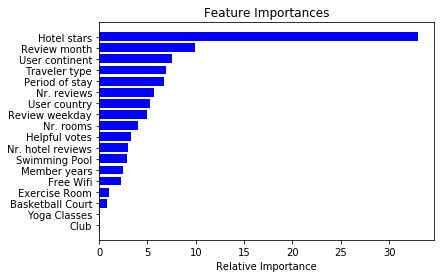

In [319]:
features = X.columns
importances = a
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), 
         importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()